# Launch QtLab

In [1]:
#%matplotlib qt5
from qsweepy import *
from qsweepy.ponyfiles import *

# loading all modules from qsweepy.instrument_drivers
# omitting module's members which name starts with "__"
from qsweepy.instruments import *  

#import matplotlib.pyplot as plt
import numpy as np
#from matplotlib import interactive
#interactive(True)
from importlib import reload

sample_name = '1906-002_4_down'

Failed loading module Keysight_M3102A:  No module named 'keysightSD1'
Failed loading module Keysight_M3202A:  No module named 'keysightSD1'
[WinError 126] The specified module could not be found
Failed loading module Signal_Hound_SA:  name 'signal_hound_dll' is not defined


# initialize hardware in pulsed mode

In [2]:
from qsweepy.tunable_coupling_transmons.Misis_two_qubit_August_2019_setup \
import device_settings, pulsed_settings, hardware_setup
hardware = hardware_setup(device_settings, pulsed_settings)
hardware.open_devices()
hardware.set_pulsed_mode()
hardware.coil.set_offset(0.0)

Discovered device `dev8108`: HDAWG8 with options MF.
Creating an API session for device `dev8108` on `127.0.0.1`, `8004` with apilevel `6`.
Trigger output is assigned to AWG Trigger 1, controlled by AWG sequencer commands.
Trigger output is assigned to AWG Trigger 2, controlled by AWG sequencer commands.
Trigger output is assigned to AWG Trigger 3, controlled by AWG sequencer commands.
Trigger output is assigned to AWG Trigger 4, controlled by AWG sequencer commands.
Output is assigned to Output 1 Marker 1.
Output is assigned to Output 1 Marker 2.
Output is assigned to Output 2 Marker 1.
Output is assigned to Output 2 Marker 2.
Compilation successful with no warnings, will upload the program to the instrument.
0 awgModule/progress: 0.00
1 awgModule/progress: 0.39
2 awgModule/progress: 0.98
3 awgModule/progress: 0.98
4 awgModule/progress: 1.00
Upload to the instrument successful.
Time:  1.020284788818688
Compilation successful with no warnings, will upload the program to the instrument.

D:\qtlab_replacement\qsweepy\config.py:65: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



Compilation successful with no warnings, will upload the program to the instrument.
0 awgModule/progress: 0.00
1 awgModule/progress: 0.00
2 awgModule/progress: 0.00
3 awgModule/progress: 0.00
4 awgModule/progress: 0.00
5 awgModule/progress: 0.00
6 awgModule/progress: 0.00
7 awgModule/progress: 0.00
8 awgModule/progress: 0.00
9 awgModule/progress: 0.00
10 awgModule/progress: 1.00
Upload to the instrument successful.
Time:  1.7435883639960004
Compilation successful with no warnings, will upload the program to the instrument.
0 awgModule/progress: 0.00
1 awgModule/progress: 0.00
2 awgModule/progress: 0.00
3 awgModule/progress: 0.00
4 awgModule/progress: 0.00
5 awgModule/progress: 0.00
6 awgModule/progress: 0.00
7 awgModule/progress: 0.00
8 awgModule/progress: 0.98
9 awgModule/progress: 0.98
10 awgModule/progress: 1.00
Upload to the instrument successful.
Time:  1.9301668706352153
Compilation successful with no warnings, will upload the program to the instrument.
0 awgModule/progress: 0.00

# Reload scripts and start measuring

In [64]:
reload(exdir_db)
reload(database)
reload(sweep_extras)
import imp
from qsweepy.qubit_calibrations import readout_passthrough
from qsweepy.fitters import exp_sin, fit_dataset
from qsweepy import readout_classifier
from qsweepy.qubit_calibrations import gauss_hd
from qsweepy import tomography
from qsweepy import pulses
reload(awg_digital)
reload(awg_iq_multi)
reload(data_reduce)
reload(fitting)
reload(plotting)
reload(tomography)
reload(sweep)
reload(pulses)
reload(awg_channel)
reload(awg_iq_multi)
reload(modem_readout)
reload(qubit_device)
reload(single_shot_readout)
reload(readout_passthrough)
reload(exp_sin)
reload(fit_dataset)
reload(exdir_db)
reload(database)
reload(sweep_extras)
reload(readout_classifier)

db = database.MyDatabase()
sweeper = sweep_extras.Sweeper(db, sample_name=sample_name)
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)

hardware.setup_iq_channel_connections(exdir_db_inst)
device = qubit_device.qubit_device(exdir_db_inst, sweeper, controls = {'coil':hardware.coil})
device.create_pulsed_interfaces(hardware.iq_devices, hardware.fast_controls,
                                extra_channels = {'ro_trg':hardware.ro_trg})
device.setup_modem_readout(hardware)

<class 'ValueError'> could not convert string to float: '(-0.0216892253456-0.104223004947j)'
<class 'ValueError'> could not convert string to float: '(-0.0215854626376+0.00136648464776j)'
<class 'ValueError'> could not convert string to float: '(-0.0437036899742-0.0208027605532j)'
reference: ('channel_calibration', 'iq_ro_q1') : 140
Got delay calibration: -3.05e-07


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  188688 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
reference: ('channel_calibration', 'iq_ro_q1') : 140
reference: calibration : 141
Validation measurement (delay): -9e-09
reference: delay_measurement : 142
reference: delay_measurement : 142
reference: delay_measurement : 142


In [65]:
from qsweepy.qubit_calibrations import excitation_pulse
from qsweepy.qubit_calibrations import readout_pulse
from qsweepy.qubit_calibrations import channel_amplitudes
from qsweepy.qubit_calibrations import Rabi
from qsweepy.qubit_calibrations import Ramsey
from qsweepy.qubit_calibrations import calibrated_readout
from qsweepy.qubit_calibrations import gauss_hd
from qsweepy.qubit_calibrations import state_tomography
reload(Ramsey)
from qsweepy.fitters import exp_sin
from qsweepy.fitters import fit_dataset
reload(fit_dataset)
reload(exp_sin)
reload(excitation_pulse)
reload(readout_pulse)
reload(Rabi)
reload(single_shot_readout)
reload(calibrated_readout)
reload(readout_passthrough)
reload(gauss_hd)
reload(state_tomography)
#Rabi.Rabi_rect_adaptive(device, '1', channel_amplitudes.channel_amplitudes(device, iq_ex1_q1=1.0))
#Rabi.Rabi_rect_adaptive(device, '3', channel_amplitudes.channel_amplitudes(device, iq_ex3_q3=1.0))

<module 'qsweepy.qubit_calibrations.state_tomography' from 'D:\\qtlab_replacement\\qsweepy\\qubit_calibrations\\state_tomography.py'>

In [10]:
#readout_passthrough.readout_passthrough(device=device, amplitudes=np.linspace(0, 1.0, 21), qubit_id='1', length=0.9e-6)
#readout_passthrough.readout_passthrough(device=device, amplitudes=np.linspace(0, 1.0, 21), qubit_id='3', length=0.9e-6)

## Rabi

In [11]:
Rabi.Rabi_rect_adaptive(device=device, qubit_id='1', 
    channel_amplitudes=channel_amplitudes.channel_amplitudes(device, iq_ex1_q1=1.0))
Rabi.Rabi_rect_adaptive(device=device, qubit_id='3', 
    channel_amplitudes=channel_amplitudes.channel_amplitudes(device, iq_ex3_q3=1.0))

Requested:  metadata: {'iq_ex1_q1': '1.0'} references: {('channel_calibration', 'iq_ex1_q1'): 272}
reference: ('channel_calibration', 'iq_ex1_q1') : 272
Obtained:  metadata: {'iq_ex1_q1': '1.0'} references: {'channel_calibration': 272}
0 1.0000000000000001e-07 1e-09
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 242
reference: ('readout_pulse', '1') : 243
reference: readout_pulse : 251
reference: delay_calibration : 142
initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError
D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  197696 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
iq1


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI lengt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning:

Number of calls to function has reached maxfev = 200.



first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq1


D:\qtlab_replacement\qsweepy\fitters\exp_sin.py:33: RuntimeWarning:

overflow encountered in exp

D:\qtlab_replacement\qsweepy\fitters\exp_sin.py:70: RuntimeWarning:

overflow encountered in square



first_point:  197448 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197448 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197448 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197448 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197448 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq1
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197408 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197408 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq1
first_point:  197408 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI l

reference: fidelity_scan : 245
reference: ('readout_pulse', '3') : 246
reference: readout_pulse : 254
reference: delay_calibration : 142
initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197696 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  197696 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197496 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197488 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600

iq3
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  197456 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197456 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197456 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197456 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197456 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197416 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  197400 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197400 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
Waiting to join deferred threads:
load time:  0.030980348587036133
pre_trace_time:  0.0
trace 0 time:  0.010992765426635742

The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\ProgramData\Anaconda3
    C:\ProgramData\Anaconda3\Library\mingw-w64\bin
    C:\ProgramData\Anaconda3\Library\usr\bin
    C:\ProgramData\Anaconda3\Library\bin
    C:\ProgramData\Anaconda3\Scripts
    C:\ProgramData\Anaconda3\bin
    C:\ProgramData\Anaco

start: 2019-08-13 07:35:27.808213, started/done/total sweeps: 0/100/100, 
Measured data: 
'iq3': parameters: Excitation length (s),:[0.0, 9.9e-08] (100 points) with setter
data: [  6026.   6282.   4717.   6898.   7834.   7965.   8483.  10108.  11393.
  12479.  13257.  14086.  15023.  15378.  15330.  15336.  14944.  14423.
  13851.  12570.  11639.  10448.   9448.   8007.   7066.   6365.   5567.
   5235.   5069.   5110.   5461.   6299.   7229.   8552.   9209.  10396.
  11595.  12777.  13538.  14603.  14882.  15436.  15465.  15332.  14957.
  14079.  13561.  12429.  11593.  10067.   8928.   8602.   7164.   5853.
   5691.   4995.   4923.   4688.   5318.   5873.   6654.   8035.   8950.
  10384.  11793.  12984.  13452.  14167.  14856.  15251.  15336.  15237.
  14951.  14560.  13181.  12927.  12158.  10849.   9824.   8204.   7471.
   6678.   6497.   5970.   6092.   6211.   6901.   7498.   7722.   8811.
   9985.  11244.  11940.  13310.  13766.  14964.  15143.  15577.  15769.
  15443.]

In [11]:
Rabi.calibrate_all_single_channel_Rabi(device)

Requested:  metadata: {'iq_ex1_q1': '1.0'} references: {('channel_calibration', 'iq_ex1_q1'): 209}
reference: ('channel_calibration', 'iq_ex1_q1') : 209
Obtained:  metadata: {'iq_ex1_q1': '1.0'} references: {'channel_calibration': 209}
good Rabi fits: [212]
trying  212
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-12\000212-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-12\000211-Rabi_rect-1906-002_4_down
reference: channel_amplitudes : 210
reference: Rabi_rect : 211
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-12\000210-channel_amplitudes-1906-002_4_down
Requested:  metadata: {'iq_ex3_q3': '1.0'} references: {('channel_calibration', 'iq_ex3_q3'): 88}
reference: ('channel_calibration', 'iq_ex3_q3') : 88
Obtained:  metadata: {'iq_ex3_q3': '1.0'} references: {'channel_calibration': 88}
good Rabi fits: [159]
trying  159
Ex

## Testing simultaneous readout of two qubits (doesn't work =()

In [29]:
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, device.get_qubit_list(), force_recalibration=True)
calibrated_readout.calibrate_preparation_and_readout_confusion(device, qubit_readout_pulse, readout_device, pause_length=50e-9)
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, ['1'], force_recalibration=True)
calibrated_readout.calibrate_preparation_and_readout_confusion(device, qubit_readout_pulse, readout_device, pause_length=50e-9)
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, ['3'], force_recalibration=True)
calibrated_readout.calibrate_preparation_and_readout_confusion(device, qubit_readout_pulse, readout_device, pause_length=50e-9)

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 611
reference: ('readout_pulse', '1') : 612
reference: ('readout_pulse', '3') : 629
None


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 66, in get_calibrated_measurer
    raise ValueError('Forcing recalibration')
ValueError: Forcing recalibration


reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 19

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.24684643745422363
pre_trace_time:  0.0009989738464355469
trace 0 time:  0.014991998672485352
trace 1 time:  0.028981447219848633
trace 2 time:  0.04297351837158203
trace 3 time:  0.056964874267578125
trace 4 time:  0.06995797157287598
trace 5 time:  0.08394789695739746
trace 6 time:  0.09793972969055176
trace 7 time:  0.1109304428100586
trace 8 time:  0.1249234676361084
trace 9 time:  0.1389145851135254
trace 10 time:  0.15290522575378418
trace 11 time:  0.16689777374267578
trace 12 time:  0.19288134574890137

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




trace 13 time:  0.2098705768585205


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 66, in get_calibrated_measurer
    raise ValueError('Forcing recalibration')
ValueError: Forcing recalibration


None
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.25284361839294434
pre_trace_time:  0.00099945068359375
trace 0 time:  0.016989707946777344
trace 1 time:  0.029981374740600586
trace 2 time:  0.04497170448303223
trace 3 time:  0.05896329879760742
trace 4 time:  0.07295489311218262
trace 5 time:  0.08694601058959961
trace 6 time:  0.1009373664855957
trace 7 time:  0.1149282455444336
trace 8 time:  0.128920316696167
trace 9 time:  0.14291119575500488
trace 10 time:  0.15690255165100098
trace 11 time:  0.17089390754699707
trace 12 time: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



 0.19687795639038086
trace 13 time:  0.2118685245513916
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ leng

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 66, in get_calibrated_measurer
    raise ValueError('Forcing recalibration')
ValueError: Forcing recalibration


reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.24485039710998535
pre_trace_time:  0.0009992122650146484
trace 0 time:  0.01598954200744629
trace 1 time:  0.028981447219848633
trace 2 time:  0.042972564697265625
trace 3 time:  0.05696368217468262
trace 4 time:  0.06995701789855957
trace 5 time:  0.08494758605957031
trace 6 time:  0.09793949127197266
trace 7 time:  0.11192941665649414
trace 8 time:  0.12592053413391113
trace 9 time:  0.13991355895996094
trace 10 time:  0.15290427207946777
trace 11 time:  0.16689658164978027
trace 12 time:  0.1938800811767578


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



trace 13 time:  0.21086883544921875
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
load time:  0.043973684310913086
pre_trace_time:  0.0009989738464355469
trace 0 time:  0.024984359741210938
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 611
reference: ('readout_pulse', '3') : 629
None


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 66, in get_calibrated_measurer
    raise ValueError('Forcing recalibration')
ValueError: Forcing recalibration


reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.24484729766845703
pre_trace_time:  0.0009996891021728516
trace 0 time:  0.015990018844604492
trace 1 time:  0.029980897903442383
trace 2 time:  0.043973684310913086
trace 3 time:  0.05796337127685547
trace 4 time:  0.07195472717285156
trace 5 time:  0.08594608306884766
trace 6 time:  0.09993767738342285
trace 7 time:  0.1129307746887207
trace 8 time:  0.1269221305847168
trace 9 time:  0.13991284370422363
trace 10 time:  0.15490317344665527
trace 11 time:  0.16789531707763672
trace 12 time:  0.19488024711608887


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



trace 13 time:  0.2118685245513916
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
load time:  0.04297232627868652
pre_trace_time:  0.0010004043579101562
trace 0 time:  0.028980731964111328


start: 2019-08-16 12:14:30.184375, started/done/total sweeps: 0/2/2, 
Measured data: 
'resultnumbers': parameters: Target state (),:[0, 1] (2 points) with setter
State (),:[0, 1] (2 points) without setter
data: [[7864. 2136.]
 [1803. 8197.]]

## Ramsey

In [13]:
#Ramsey.calibrate_all_T2(device)

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000270-fit_dataset_1d-1906-002_4_down
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 245
reference: ('readout_pulse', '3') : 246
reference: readout_pulse : 254
reference: delay_calibration : 142
good Rabi fits: [293]
trying  293
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000293-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000292-Rabi_rect-1906-002_4_down
reference: channel_amplitudes : 279
reference: Rabi_rect : 292
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000279-channel_amplitudes-1906-002_4_down
good Rabi fits: [293]
trying  293
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000293-fit_dataset_1d-1906-002_4_d

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError
D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  197432 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 23, in exp_sin_fit
    raise ValueError
ValueError


first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning:

Number of calls to function has reached maxfev = 200.



first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
first_point:  197480 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2096 pre_delay 197304 pre_delay_reg 24663
iq3
first_point:  197472 last_point:  197504 waveformI length (199600,) waveformQ length (199600,) markerI length 199600

KeyboardInterrupt: 

In [24]:
Ramsey.Ramsey_adaptive(device=device, qubit_id='1')
Ramsey.Ramsey_adaptive(device=device, qubit_id='3')

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: ('readout_pulse', '1') : 612
reference: readout_pulse : 613
reference: delay_calibration : 142
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([8.58322198e-06]), 'T': array([0.00514537]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([7.77397267e-07]), 'f': array([1.01727269e+08]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.52197941]), 'num_periods_decay': array([523424.88431438]), 'num_periods_scan': array([0.40690907]), 'phi': array([-3.20510173]), 'points_per_period': array([9.83020593])}
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([2.28013565e-05]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_leng

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:449: RuntimeWarning:

Number of calls to function has reached maxfev = 200.



first_point:  196624 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00010808]), 'T': array([7.79119412e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.0115515]), 'f': array([1.02111514e+08]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.49218501]), 'num_periods_decay': array([79.55706275]), 'num_periods_scan': array([0.91900363]), 'phi': array([-3.22885448]), 'points_per_period': array([9.79321489])}
first_point:  196624 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.0001237]), 'T': array([0.03963163]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': ar

first_point:  196608 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00021385]), 'T': array([3.57941046e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00642564]), 'f': array([1.00037265e+08]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.50493426]), 'num_periods_decay': array([358.07443366]), 'num_periods_scan': array([2.3008571]), 'phi': array([-3.16238006]), 'points_per_period': array([9.99627487])}
first_point:  196608 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00021518]), 'T': array([2.24306617e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_lengt

first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.0002126]), 'T': array([3.28293716e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.0112704]), 'f': array([1.00007708e+08]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.50573671]), 'num_periods_decay': array([328.31902008]), 'num_periods_scan': array([3.70028519]), 'phi': array([-3.16164218]), 'points_per_period': array([9.99922927])}
first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00022682]), 'T': array([5.08377494e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length

D:\qtlab_replacement\qsweepy\fitters\exp_sin.py:85: RuntimeWarning:

overflow encountered in square



first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00029324]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00033657]), 'T': array([3.16956122e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.01388205]), 'f': array([1.00045255e+08]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.50550331]), 'num_periods_decay': array([317.09956181]), 'num_periods_scan': array([4.40199124]), 'phi': array([-3.16428996]), 'points_per_period': array([9.99547651])

first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00054357]), 'T': array([3.66566029e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.01582252]), 'f': array([99986559.39174366]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.50291092]), 'num_periods_decay': array([366.51676031]), 'num_periods_scan': array([5.79922044]), 'phi': array([-3.15856824]), 'points_per_period': array([10.00134424])}
first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00053211]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=in

iq1
{'MSE_rel': array([0.00147643]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196560 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00193074]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196560 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00214735]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196552 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

iq1
{'MSE_rel': array([0.00310144]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00319336]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.00318797]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196624 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([5.80205623e-07]), 'T': array([0.13210833]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3.0278181e-07]), 'f': array([10261958.31440604]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.36637664]), 'num_periods_decay': array([1355690.19826447]), 'num_periods_scan': array([0.41047833]), 'phi': array([-3.21276779]), 'points_per_period': array([9.74472873])}
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([0.0001496]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dty

iq1
{'MSE_rel': array([0.00027811]), 'T': array([0.87317432]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.94691936e-07]), 'f': array([9999160.33784541]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.35429057]), 'num_periods_decay': array([8731010.0741072]), 'num_periods_scan': array([1.69985726]), 'phi': array([-3.16298719]), 'points_per_period': array([10.00083973])}
first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.0002747]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg

first_point:  196312 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00035363]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196304 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00042523]), 'T': array([1.25842026e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.02622335]), 'f': array([9993532.21941925]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.34165722]), 'num_periods_decay': array([125.76063396]), 'num_periods_scan': array([3.29786563]), 'phi': array([-3.15864146]), 'points_per_period': array([10.0064719

first_point:  196160 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00044663]), 'T': array([1.27032524e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.0369984]), 'f': array([9995835.58774639]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.34120174]), 'num_periods_decay': array([126.9796221]), 'num_periods_scan': array([4.69804273]), 'phi': array([-3.16043932]), 'points_per_period': array([10.00416615])}
first_point:  196152 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00045443]), 'T': array([1.28943408e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_len

iq1
{'MSE_rel': array([0.00042273]), 'T': array([1.20830439e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.05131157]), 'f': array([9996561.36974725]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.33990124]), 'num_periods_decay': array([120.78889031]), 'num_periods_scan': array([6.19786805]), 'phi': array([-3.16103178]), 'points_per_period': array([10.00343981])}
first_point:  196000 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00042159]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195992 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg

D:\qtlab_replacement\qsweepy\fitters\exp_sin.py:39: RuntimeWarning:

overflow encountered in multiply



first_point:  195864 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00053007]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195856 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00053129]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195840 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00052372]), 'decay_goodness_test': array(

first_point:  195664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00062844]), 'T': array([1.11014831e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.08737571]), 'f': array([9992152.72792111]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.33801547]), 'num_periods_decay': array([110.92771424]), 'num_periods_scan': array([9.69238815]), 'phi': array([-3.15550979]), 'points_per_period': array([10.00785343])}
first_point:  195656 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([0.00063117]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=i

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00019738]), 'T': array([1.87297798]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.13563643e-07]), 'f': array([1046260.70900331]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.4107152]), 'num_periods_decay': array([1959623.26730854]), 'num_periods_scan': array([0.41850428]), 'phi': array([-3.24084852]), 'points_per_period': array([9.55784721])}
first_point:  196136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00029553]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=i

iq1
{'MSE_rel': array([0.00044756]), 'T': array([1.83431376e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10358097]), 'f': array([1002815.58512261]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.36160588]), 'num_periods_decay': array([18.39478427]), 'num_periods_scan': array([1.90534961]), 'phi': array([-3.18587356]), 'points_per_period': array([9.9719232])}
first_point:  194632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([0.00041433]), 'T': array([1.83339814e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10908705]), 'f': array([1002817.28465249]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.36157065]), 'num_periods_decay': array([18.38563348]), 'num_periods_scan': array([2.00563457

iq1
{'MSE_rel': array([0.00070384]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  193136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([0.0006726]), 'T': array([2.15789816e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.16219486]), 'f': array([1003850.55191934]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.37817225]), 'num_periods_decay': array([21.66207262]), 'num_periods_scan': array([3.51347693]), 'phi': array([-3.18652484]), 'points_per_period': array([9.96164218])}
first_point:  193032 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23

iq1
{'MSE_rel': array([0.00092479]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  191536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([0.00097598]), 'T': array([2.53769763e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.20096957]), 'f': array([1002867.05319911]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.39567735]), 'num_periods_decay': array([25.44973344]), 'num_periods_scan': array([5.11462197]), 'phi': array([-3.17809141]), 'points_per_period': array([9.97141143])}
first_point:  191432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 2

iq1
{'MSE_rel': array([0.00140797]), 'T': array([2.7168661e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.24660766]), 'f': array([1001357.50105885]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.40414109]), 'num_periods_decay': array([27.20554251]), 'num_periods_scan': array([6.70909526]), 'phi': array([-3.16106031]), 'points_per_period': array([9.98644339])}
first_point:  189832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq1
{'MSE_rel': array([0.00319]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  189736 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 220

first_point:  187936 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq1
{'MSE_rel': array([0.00388962]), 'T': array([2.26232288e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.38456049]), 'f': array([998014.21554812]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.37280124]), 'num_periods_decay': array([22.57830397]), 'num_periods_scan': array([8.68272368]), 'phi': array([-3.11590132]), 'points_per_period': array([10.01989736])}
first_point:  187832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq1
{'MSE_rel': array([0.00393134]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=i

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  195632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  194632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  193632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  192632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([0.00017632]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([105948.45316762]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.84852318]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.42379381]), 'phi': array([-3.06782893]), 'points_per_period': array([9.43855215])}
first_point:  191632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq1
{'MSE_rel': array([0.00050614]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([93931.

first_point:  177632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq1
{'MSE_rel': array([0.00249666]), 'T': array([1.99352756e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([0.95308439]), 'f': array([95953.14926127]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.36975576]), 'num_periods_decay': array([1.91285248]), 'num_periods_scan': array([1.82310984]), 'phi': array([-3.09154605]), 'points_per_period': array([10.42175278])}
first_point:  176632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.00249348]), 'T': array([1.99791177e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': 

first_point:  159632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.01109774]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  158632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.01360617]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  157632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.01437953]), 'decay_goodness_test': array([1], dtype=int64), 'f

iq1
{'MSE_rel': array([0.0364611]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  139632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.03728644]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  138632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.03897634]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  137632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 19

first_point:  121632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.04747801]), 'T': array([2.08289183e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([3.60076309]), 'f': array([97954.58004589]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.43638856]), 'num_periods_decay': array([2.04028794]), 'num_periods_scan': array([7.3465935]), 'phi': array([-3.18002224]), 'points_per_period': array([10.2088131])}
first_point:  120632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.04814126]), 'T': array([2.07861767e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([3.6

first_point:  106632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.05153291]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  105632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.05166173]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  104632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.05173839]), 'decay_goodness_test': array([1], dtype=int64), 'f

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': 

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([1.5507022e-05]), 'T': array([0.01941733]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.06001538e-07]), 'f': array([99715340.48520514]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.79140516]), 'num_periods_decay': array([1936205.75189418]), 'num_periods_scan': array([0.39886136]), 'phi': array([-3.15577669]), 'points_per_period': array([10.02854721])}
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.00527304]), 'T': array([0.00010333]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00013549]), 'f': array([1.03701214e+08]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.71031175]), 'num_periods_decay': array([10715.326422]), 'num_periods_scan': array([1.45181699]), 'phi': array([-3.27438939]), 'points_per_period': array([9.6430887])}
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 w

iq3
{'MSE_rel': array([0.01086645]), 'T': array([0.00065366]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3.82460025e-05]), 'f': array([1.00459935e+08]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.63460389]), 'num_periods_decay': array([65666.95098317]), 'num_periods_scan': array([2.51149837]), 'phi': array([-3.16887266]), 'points_per_period': array([9.95421709])}
first_point:  196608 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196608 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01110535]), 'T': array([0.00139123]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length

first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01231326]), 'T': array([0.00027593]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00013047]), 'f': array([99841130.22740982]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.64742243]), 'num_periods_decay': array([27549.11796318]), 'num_periods_scan': array([3.59428069]), 'phi': array([-3.13738892]), 'points_per_period': array([10.01591226])}
first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

iq3
{'MSE_rel': array([0.01292897]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01321563]), 'T': array([4.11618234e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.01141835]), 'f': array([99656100.49828228]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.64202126]), 'num_periods_decay': array([410.20268139]), 'num_periods_scan': array([4.68383672]), 'phi': array([-3.11919802]), 'points_per_period': array([10.034508

first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01326639]), 'T': array([9.93023782e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.05740044]), 'f': array([99746412.01967195]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.62042329]), 'num_periods_decay': array([99.0505593]), 'num_periods_scan': array([5.68554549]), 'phi': array([-3.12816276]), 'points_per_period': array([10.02542327])}
first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

iq3
{'MSE_rel': array([0.0147526]), 'T': array([4.46851689e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.14993789]), 'f': array([99960337.89240481]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.57959593]), 'num_periods_decay': array([44.66744579]), 'num_periods_scan': array([6.69734264]), 'phi': array([-3.15249495]), 'points_per_period': array([10.00396778])}
first_point:  196568 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196568 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01491297]), 'T': array([4.50787341e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_le

first_point:  196552 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196552 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.01900628]), 'T': array([3.52595423e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.22121671]), 'f': array([99929110.70741065]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.55863636]), 'num_periods_decay': array([35.23454709]), 'num_periods_scan': array([7.79447064]), 'phi': array([-3.14324554]), 'points_per_period': array([10.00709396])}
first_point:  196552 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

iq3
{'MSE_rel': array([0.02326946]), 'T': array([3.45354697e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.25481049]), 'f': array([99887938.22467306]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.56094194]), 'num_periods_decay': array([34.49676868]), 'num_periods_scan': array([8.79013856]), 'phi': array([-3.13394438]), 'points_per_period': array([10.01121875])}
first_point:  196544 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196544 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.02381188]), 'T': array([3.76119978e-07]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_l

iq3
{'MSE_rel': array([0.02661]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
Waiting to join deferred threads:
load time:  0.036977529525756836
pre_trace_time:  0.0009996891021728516
trace 0 time:  0.013991594314575195
load time:  0.03797578811645508
pre_trace_time:  0.0
trace 0 time:  0.012992382049560547
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 611
reference: ('readout_pulse', '3') : 629
reference: readout_pulse : 733
reference: delay_calibration : 142
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitu

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196624 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196624 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([0.00052224]), 'T': array([0.01533903]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.60772729e-06]), 'f': array([9111537.45916955]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.8114706]), 'num_periods_decay': array([139762.12154712]), 'num_periods_scan': array([0.3644615]), 'phi': array([-3.12876975]), 'points_per_period': array([10.97509618])}
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length

iq3
{'MSE_rel': array([0.00174386]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([9963028.84489693]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.99321175]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([1.29519375]), 'phi': array([-3.16880241]), 'points_per_period': array([10.03710835])}
first_point:  196496 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196496 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00139304]), 'T': array([0.00159006]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([8.80471365e-05]),

iq3
{'MSE_rel': array([0.00252896]), 'T': array([2.35500845e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10191046]), 'f': array([9901161.5615174]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.92867702]), 'num_periods_decay': array([23.31731916]), 'num_periods_scan': array([2.37627877]), 'phi': array([-3.14132718]), 'points_per_period': array([10.09982509])}
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00288352]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64

first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00409288]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196264 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196264 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_del

iq3
{'MSE_rel': array([0.00611972]), 'T': array([3.69765132e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.12440329]), 'f': array([10017031.12845436]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.01368463]), 'num_periods_decay': array([37.03948834]), 'num_periods_scan': array([4.60783432]), 'phi': array([-3.23641116]), 'points_per_period': array([9.98299783])}
first_point:  196160 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196160 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00677767]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int6

iq3
{'MSE_rel': array([0.00631423]), 'T': array([5.13294889e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.11299548]), 'f': array([10001959.0087967]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.03974514]), 'num_periods_decay': array([51.33954439]), 'num_periods_scan': array([5.80113623]), 'phi': array([-3.22141505]), 'points_per_period': array([9.99804137])}
first_point:  196040 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196040 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.00625252]), 'T': array([5.07271587e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_l

first_point:  195936 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195936 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.00716983]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195920 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195920 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre

first_point:  195816 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195816 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.00724817]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195800 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195800 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre

iq3
{'MSE_rel': array([0.00769412]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195696 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195696 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.0076727]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195680 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195680 last_point:  196704 waveformI length (199600,)

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  195640 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.0001086]), 'T': array([0.14681992]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.72442592e-06]), 'f': array([915846.93175289]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.6130801]), 'num_periods_decay': array([134464.57486371]), 'num_periods_scan': array([0.36633877]), 'phi': array([-3.13927828]), 'points_per_period': array([10.91885516])}
first_point:  196136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

first_point:  195232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.10660606]), 'T': array([1.5570773e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.08991204]), 'f': array([984613.24396523]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.63761855]), 'num_periods_decay': array([15.33118927]), 'num_periods_scan': array([1.37845854]), 'phi': array([-2.97549556]), 'points_per_period': array([10.15627208])}
first_point:  195136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

first_point:  194232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194232 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.00348703]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  194136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre

first_point:  193136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193136 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.00485543]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  193032 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193032 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre

iq3
{'MSE_rel': array([0.00907889]), 'T': array([1.4134917e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.33250991]), 'f': array([967917.8969461]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.57523106]), 'num_periods_decay': array([13.68143909]), 'num_periods_scan': array([4.54921412]), 'phi': array([-3.20202944]), 'points_per_period': array([10.3314548])}
first_point:  191832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  191832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.00943113]), 'T': array([1.49736366e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_leng

first_point:  190832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  190832 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.01527464]), 'T': array([2.11501616e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.27422958]), 'f': array([974267.65368112]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.65498621]), 'num_periods_decay': array([20.60591827]), 'num_periods_scan': array([5.65075239]), 'phi': array([-3.30551028]), 'points_per_period': array([10.26411989])}
first_point:  190736 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

iq3
{'MSE_rel': array([0.01547959]), 'T': array([2.27472119e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.30333388]), 'f': array([975369.44797408]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.66870716]), 'num_periods_decay': array([22.18693555]), 'num_periods_scan': array([6.73004919]), 'phi': array([-3.32385906]), 'points_per_period': array([10.25252536])}
first_point:  189632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  189632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.01545573]), 'T': array([2.27510648e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan

iq3
{'MSE_rel': array([0.01540379]), 'T': array([2.28551787e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.35003008]), 'f': array([975637.33544972]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.66979381]), 'num_periods_decay': array([22.29836565]), 'num_periods_scan': array([7.80509868]), 'phi': array([-3.33041149]), 'points_per_period': array([10.24971025])}
first_point:  188536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  188536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.01531071]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=i

first_point:  187432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  187432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.01439145]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  187336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  187336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704

dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 3.12e-01-2.59e-01j	B: -67.55 G: -39.49, C:0.00[-39.48739624 -47.54412842 -67.55339813]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.87e-01-2.81e-01j	B: -64.51 G: -39.82, C:0.00[-39.81606293 -47.54448318 -64.51374054]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 1.75e-01-3.02e-01j	B: -56.33 G: -41.53, C:0.00[-41.52864456 -47.54247665 -56.33379364]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.

dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.90e-01-2.24e-01j	B: -77.90 G: -39.84, C:0.00[-39.83735657 -47.54832458 -77.89808655]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.93e-01-2.30e-01j	B: -78.47 G: -39.79, C:0.00[-39.79214478 -47.5489006  -78.47439575]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.90e-01-2.31e-01j	B: -78.51 G: -39.85, C:0.00[-39.8450737  -47.55014801 -78.51248932]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.

dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.91e-01-2.29e-01j	B: -78.73 G: -39.82, C:0.00[-39.82277298 -47.54065323 -78.73454285]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.91e-01-2.29e-01j	B: -78.72 G: -39.82, C:0.00[-39.8217926  -47.54049683 -78.72359467]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.37e-02-2.08e-02j	I:  4.00e-01	Q: 2.91e-01-2.29e-01j	B: -78.73 G: -39.82, C:0.00[-39.82263565 -47.54673004 -78.72692871]first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
dc: -4.

initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  0 last_point:  199600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 0 pre_delay 0 pre_delay_reg 0
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  195632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  194632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  193632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  192632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  192632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.00189262]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([116145.86119227]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.61426282]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.46458344]), 'phi': array([-3.2011539]), 'points_per_period': array([8.60986341])}
first_point:  191632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 1

first_point:  182632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  182632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.00754191]), 'T': array([2.06801539e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.67697755]), 'f': array([96084.2349084]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.81132054]), 'num_periods_decay': array([1.98703676]), 'num_periods_scan': array([1.34517929]), 'phi': array([-3.12695301]), 'points_per_period': array([10.40753461])}
first_point:  181632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

first_point:  172632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.01148659]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  171632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  171632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.01944737]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  170632 last_point:  196704 waveformI length (199600,) waveformQ length (1

first_point:  160632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  160632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.04106673]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  159632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  159632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_r

iq3
{'MSE_rel': array([0.05608327]), 'T': array([1.48732137e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3.22727831]), 'f': array([96189.34227809]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.72668919]), 'num_periods_decay': array([1.43064464]), 'num_periods_scan': array([4.61708843]), 'phi': array([-3.15993099]), 'points_per_period': array([10.39616216])}
first_point:  147632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  147632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.05632803]), 'T': array([1.48687649e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3

first_point:  134632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  134632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.06704733]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=int64)}
first_point:  133632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  133632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_r

first_point:  120632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.07156861]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=int64)}
first_point:  119632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  119632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.07167653]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=int64)}
first_point:  118632 last_point:  196704 waveformI length (199600,) waveformQ length (1

iq3
{'MSE_rel': array([0.07720857]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=int64)}
first_point:  105632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  105632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.07724457]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([0], dtype=int64)}
first_point:  104632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  104632 last_point:  196704 waveformI length (199600,) waveformQ length (1

Exception: Failed to calibrate Ramsey: frequency_goodness_test failed on qubit 3, measurement 810

## Gauss calibrations

In [ ]:
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, ['1'])
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, ['3'])

In [6]:
pulse = gauss_hd.gauss_hd_Rabi_amplitude_adaptive(device, '1', 2)
pulse = gauss_hd.gauss_hd_Rabi_amplitude_adaptive(device, '3', 2)
pulse = gauss_hd.gauss_hd_Rabi_amplitude_adaptive(device, '1', 4)
pulse = gauss_hd.gauss_hd_Rabi_amplitude_adaptive(device, '3', 4)

good Rabi fits: [353]
trying  353
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000353-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000352-Rabi_rect-1906-002_4_down
reference: channel_amplitudes : 351
reference: Rabi_rect : 352
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
getting other qubit excitition pulse with qubit_id 1 and channel iq_ex1_q1
Requested:  metadata: {'iq_ex1_q1': '1.0'} references: {('channel_calibration', 'iq_ex1_q1'): 336}
reference: ('channel_calibration', 'iq_ex1_q1') : 336
Obtained:  metadata: {'iq_ex1_q1': '1.0'} references: {'channel_calibration': 336}
good Rabi fits: [353]
trying  353
Exdir_db.select_measure

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  197000 last_point:  198600 waveformI length 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



(199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  197000 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196712 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
iq1
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq1
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_d

iq1
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq1
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq1
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq1
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq1
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI l

iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI l

iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI l

iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) marke

iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
Waiting to join deferred threads:
load time:  0.02698493003845215
pre_trace_time:  0.00099945068359375
trace 0 time:  0.009993314743041992

The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\ProgramData\Anaconda3
    C:\ProgramData\Anaconda3\Library\mingw-w64\bin
    C:\ProgramData\Anaconda3\Library\usr\bin
    C:\ProgramData\Anaconda3\Library\bin
    C:\ProgramData\Anaconda3\Scripts
    C:\ProgramData\Anaconda3\bin
   

reference: fidelity_scan : 441
reference: ('readout_pulse', '1') : 444
reference: readout_pulse : 450
reference: delay_calibration : 142
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_

iq1
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) m

reference: fidelity_scan : 442
reference: ('readout_pulse', '3') : 445
reference: readout_pulse : 453
reference: delay_calibration : 142
first_point:  197000 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  197000 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_d

iq3
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196736 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
Waiting to join deferred threads:
load time:  0.02797675132751465
pre_trace_time:  0.0009996891021728516
trace 0

iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000352-Rabi_rect-1906-002_4_down
reference: channel_amplitudes : 351
reference: Rabi_rect : 352
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
getting other qubit excitition pulse with qubit_id 1 and channel iq_ex1_q1
Requested:  metadata: {'iq_ex1_q1': '1.0'} references: {('channel_calibration', 'iq_ex1_q1'): 336}
reference: ('channel_calibration', 'iq_ex1_q1') : 336
Obtained:  metadata: {'iq_ex1_q1': '1.0'} references: {'channel_calibration': 336}
good Rabi fits: [353]
trying  353
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000353-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measure

iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI l

iq1
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq1
Waiting to join deferred threads:
load time:  0.0319821834564209
pre_trace_time:  0.00099945068359375
trace 0 time:  0.010992050170898438
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 441
reference: ('readout_pulse', '1') : 444
reference: readout_pulse : 450
reference: delay_calibration : 142
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq1
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 p

iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq1
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) marke

iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq1
first_point:  188608 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) m

good Rabi fits: [347]
trying  347
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000347-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000346-Rabi_rect-1906-002_4_down
reference: channel_amplitudes : 345
reference: Rabi_rect : 346
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
length:  1
sigma:  0.25
cutoff:  0.135335283237
erf_arg:  1.41421356237
erf result 0.977249868052
infinite length result:  0.626657068658
finite length result 0.551734383483
Rabi_freq 35998342.8282 pulse_amplitude 1.0
Non-rounded (rect):  1.3889528259292962e-08
Non-rounded (gauss_length_preferred): 2.51743024816e-08
gauss_length_preferred: 3.2e-08
length:  3.2e-08
s

iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2800 pre_delay 196600 pre_delay_reg 24575
iq3
first_point:  196672 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196544 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2800 pre_delay 196200 pre_delay_reg 24525
iq3
first_point:  196288 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 19

iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2800 pre_delay 194800 pre_delay_reg 24350
iq3
first_point:  195776 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  194752 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2800 pre_delay 190800 pre_delay_reg 23850
iq3
first_point:  192704 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI lengt

first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
first_point:  180416 last_point:  196800 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2800 pre_delay 176800 pre_delay_reg 22100
iq3
Waiting to join deferred threads:
load time:  0.025985240936279297
pre_trace_time:  0.0009992122650146484
trace 0 time:  0.008994817733764648


In [25]:
pulse1 = gauss_hd.get_excitation_pulse_from_gauss_hd_Rabi_amplitude(device, '1', np.pi, recalibrate=True)
pulse3 = gauss_hd.get_excitation_pulse_from_gauss_hd_Rabi_amplitude(device, '3', np.pi, recalibrate=True)
pulse2 = gauss_hd.get_excitation_pulse_from_gauss_hd_Rabi_amplitude(device, '1', np.pi/2., recalibrate=True)
pulse4 = gauss_hd.get_excitation_pulse_from_gauss_hd_Rabi_amplitude(device, '3', np.pi/2., recalibrate=True)

reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


## Readout fidelity scan, calibrated_readout, multiqubit confusion_matrix

In [7]:
calibrated_readout.readout_fidelity_scan(device=device, qubit_id='1',readout_pulse_lengths=[1.7e-6], readout_pulse_amplitudes=np.linspace(0.0, 0.5, 21))
calibrated_readout.readout_fidelity_scan(device=device, qubit_id='3',readout_pulse_lengths=[1.7e-6], readout_pulse_amplitudes=np.linspace(0.0, 0.5, 21))

reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  196992 last_point:  197200 waveformI length (199600,) waveformQ length (199600,) markerI length 19

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.33779168128967285
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.03597664833068848
trace 1 time:  0.06895828247070312
trace 2 time:  0.10493612289428711
trace 3 time:  0.1409139633178711
trace 4 time:  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



0.17489194869995117
trace 5 time:  0.21086955070495605
trace 6 time:  0.24684739112854004
trace 7 time:  0.282825231552124
trace 8 time:  0.31980371475219727
trace 9 time:  0.35378146171569824
trace 10 time:  0.3887603282928467
trace 11 time:  0.42673659324645996
trace 12 time:  0.4477248191833496
trace 13 time:  0.4877002239227295
trace 14 time:  0.5236783027648926
trace 15 time:  0.5446650981903076
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 24575
first_point:  196992 last_point:  197200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2400 pre_delay 196600 pre_delay_reg 24575
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

D:\qtlab_replacement\qsweepy\readout_classifier.py:222: RuntimeWarning:

invalid value encountered in true_divide



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

D:\qtlab_replacement\qsweepy\readout_classifier.py:222: RuntimeWarning:

invalid value encountered in true_divide



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196896 last_point:  198600 waveformI length 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



(199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 289

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



 196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.3527836799621582
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.03497910499572754
trace 1 time:  0.06795811653137207
trace 2 time:  0.10393619537353516
trace 3 time:  0.13991546630859375
trace 4 time:  0.17389416694641113


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



trace 5 time:  0.20987248420715332
trace 6 time:  0.2458479404449463
trace 7 time:  0.28082823753356934
trace 8 time:  0.31780385971069336
trace 9 time:  0.3527824878692627
trace 10 time:  0.38776063919067383
trace 11 time:  0.425739049911499
trace 12 time:  0.44672632217407227
trace 13 time:  0.4877009391784668
trace 14 time:  0.5226788520812988
trace 15 time:  0.5446643829345703


start: 2019-08-14 09:48:56.805723, started/done/total sweeps: 0/21/21, 
Measured data: 
'fidelity': parameters: length (s),:[1.7e-06, 1.7e-06] (1 points) with setter
amplitude (),:[0.0, 0.5] (21 points) with setter
data: [[0.49909995 0.50977496 0.54477494 0.57729978 0.62092489 0.65249994
  0.68332497 0.71089989 0.73197536 0.75492504 0.77799986 0.80305021
  0.77705011 0.73742488 0.7346746  0.71557429 0.73227499 0.71490225
  0.70787686 0.75767218 0.77585185]]
'avg_sample0': parameters: length (s),:[1.7e-06, 1.7e-06] (1 points) with setter
amplitude (),:[0.0, 0.5] (21 points) with setter
Time (s),:[0.0, 2.047e-06] (2048 points) without setter
data: [[[ -1.3705 +2.571200e+00j  -2.48425+6.286300e+00j
    -0.8531 -3.257000e+00j ...  -2.0072 -2.743500e+00j
     2.0685 +4.444000e-01j  -1.45715+1.758850e+00j]
  [ -3.0322 +4.216550e+00j  -0.40995+1.236600e+00j
     1.416  -3.204650e+00j ...  -4.73515-4.089450e+00j
     5.32225+1.979300e+00j  -2.63235+4.175850e+00j]
  [ -7.01085-3.457950e+00j  -7

In [ ]:
reload(calibrated_readout)
qubit_readout_pulse, readout_device, confusion_matrix = \
    calibrated_readout.get_confusion_matrix(device, 
            qubit_ids=device.get_qubit_list(), pause_length=50e-9, force_recalibration=True)

## State tomography

In [5]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy import multiqubit_tomography
reload(multiqubit_tomography)
reload(state_tomography)
qubit_ids = ['1']
state_tomography_inst = state_tomography.StateTomography(device, qubit_ids, pause_length=50e-9)

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: ('readout_pulse', '1') : 612
reference: readout_pulse : 613
reference: delay_calibration : 142
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: ('excitation_pulse', '1') : 534
reference: readout_pulse : 613
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: 

In [6]:
state_tomography_inst.set_prepare_seq([])
superposition_state_tomography = sweeper.sweep(state_tomography_inst, 
                                               measurement_type='state_tomography_ground')

first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  188600 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 1000 pre_delay 178600 pre_delay_reg 22325
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 ma

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [ ]:
state_tomography_inst.reconstruct(state_tomography_inst.measurement_results)

In [10]:
state_tomography_inst.set_prepare_seq(
    excitation_pulse.get_excitation_pulse(device=device, 
                                          qubit_id='1', rotation_angle=np.pi/2.).get_pulse_sequence(np.pi/2.)+
    excitation_pulse.get_excitation_pulse(device=device, 
                                          qubit_id='3', rotation_angle=np.pi/2.).get_pulse_sequence(np.pi/2.))
superposition_state_tomography = sweeper.sweep(state_tomography_inst, 
                                               measurement_type='state_tomography_superposition')

reference: channel_amplitudes : 8941
reference: gauss_hd_Rabi_amplitude_adaptive : 8978
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-08-05\008941-channel_amplitudes-1906-001_1_down
reference: channel_amplitudes : 8953
reference: gauss_hd_Rabi_amplitude_adaptive : 8980
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-08-05\008953-channel_amplitudes-1906-001_1_down


C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.

C:\qtlab_replacement\qsweepy\instrument_drivers\Tektronix_AWG5014.py:651: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  38344 last_point:  47648 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1952 pre_delay 27648 pre_delay_reg 3456
first_point:  38344 last_point:  47648 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1952 pre_delay 27648 pre_delay_reg 3456
first_point:  38248 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  38248 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  38248 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 n

first_point:  29048 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  29048 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  29048 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  29048 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 nop 49600 post_delay 1944 pre_delay 27656 pre_delay_reg 3457
first_point:  29048 last_point:  47656 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 20000 n

load time:  0.09892940521240234
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.03400874137878418
trace 1 time:  0.05999302864074707
trace 2 time:  0.0869607925415039
trace 3 time:  0.11394476890563965
trace 4 time:  0.14193129539489746


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [9]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy import multiqubit_tomography 
reload(multiqubit_tomography)
reload(state_tomography)
qubit_ids = ['1','3']
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq([])

tomography_1q = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_identity')

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 611
<class 'IndexError'> list index out of range
reference: ('readout_pulse', '1') : 612
reference: ('readout_pulse', '3') : 629
reference: readout_pulse : 630
reference: delay_calibration : 142
None


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\readout_pulse.py", line 60, in get_multi_qubit_readout_pulse
    multi_readout_pulse = qubit_readout_pulse(device.exdir_db.select_measurement(measurement_type='qubit_readout_pulse', references_that=references, metadata=metadata))
  File "D:\qtlab_replacement\qsweepy\ponyfiles\exdir_db.py", line 102, in select_measurement
    file_to_load = list(measurement_db_list.order_by(lambda d: desc(d.id)).limit(1))[0].filename
IndexError: list index out of range
Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 68, in get_calibrated_measurer
    references_that=references)
  File "D:\qtlab_replacement\qsweepy\ponyfiles\exdir_db.py", line 102, in select_measurement
    file_to_load = list(measurement_db_list.order_by(lambda d: desc(d.id)).limit(1))[0].filename
IndexError: list index out of range


reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.2558417320251465
pre_trace_time:  0.0009999275207519531
trace 0 time:  0.01598978042602539
trace 1 time:  0.029981374740600586
trace 2 time:  0.04497194290161133
trace 3 time:  0.059963226318359375
trace 4 time:  0.07395410537719727
trace 5 time:  0.08894515037536621
trace 6 time:  0.10293722152709961
trace 7 time:  0.1169281005859375
trace 8 time:  0.1309196949005127
trace 9 time:  0.14591026306152344
trace 10 time:  0.16090083122253418
trace 11 time:  0.17489266395568848
trace 12 time:  0.20287489891052246


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



trace 13 time:  0.21986675262451172
reference: readout_pulse : 630
reference: delay_calibration : 142
None


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\calibrated_readout.py", line 68, in get_calibrated_measurer
    references_that=references)
  File "D:\qtlab_replacement\qsweepy\ponyfiles\exdir_db.py", line 102, in select_measurement
    file_to_load = list(measurement_db_list.order_by(lambda d: desc(d.id)).limit(1))[0].filename
IndexError: list index out of range


reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

D:\qtlab_replacement\qsweepy\readout_classifier.py:222: RuntimeWarning:

invalid value encountered in true_divide



fidelity
avg_sample0
avg_sample1
hists
proba_points
feature
threshold
load time:  0.2618372440338135
pre_trace_time:  0.0010001659393310547
trace 0 time:  0.015990018844604492
trace 1 time:  0.02998185157775879
trace 2 time:  0.04397320747375488
trace 3 time:  0.05896306037902832
trace 4 time:  0.07295584678649902
trace 5 time:  0.08694696426391602
trace 6 time:  0.10193943977355957
trace 7 time:  0.1169271469116211
trace 8 time:  0.13191938400268555
trace 9 time:  0.14690852165222168
trace 10 time:  0.16090130805969238
trace 11 time:  0.17489314079284668
trace 12 time: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



 0.20287442207336426
trace 13 time:  0.2218620777130127
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: ('excitation_pulse', '1') : 534
reference: ('excitation_pulse', '3') : 537
reference: readout_pulse : 630
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by i

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196664 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
resultnumbers
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ leng

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196520 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196552 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  5.3112e+00  4.2994e+00  2e+03  6e-01  4e+01  5e-03
 2:  6.9277e+00  6.4511e+00  4e+02  3e-01  2e+01  2e-03
 3:  7.9376e+00  7.6368e+00  2e+02  2e-01  1e+01  2e-03
 4:  1.0531e+01  1.0368e+01  9e+01  1e-01  6e+00  9e-04
 5:  1.5625e+01  1.5555e+01  4e+01  4e-02  3e+00  6e-04
 6:  1.9272e+01  1.9234e+01  2e+01  2e-02  1e+00  9e-04
 7:  1.9233e+01  1.9193e+01  2e+01  3e-02  2e+00  1e-03
 8:  2.1319e+01  2.1303e+01  1e+01  1e-02  6e-01  6e-04
 9:  2.1362e+01  2.1344e+01  1e+01  1e-02  7e-01  1e-03
10:  2.1608e+01  2.1593e+01  1e+01  1e-02  6e-01  9e-04
11:  2.2610e+01  2.2607e+01  2e+00  2e-03  1e-01  2e-04
12:  2.2819e+01  2.2818e+01  7e-01  7e-04  4e-02  8e-05
13:  2.2904e+01  2.2904e+01  2e-01  2e-04  1e-02  2e-05
14:  2.2923e+01  2.2923e+01  5e-02  5e-05  3e-03  6e-06
15:  2.2930e+01  2.2930e+01  6e-03  7e-06  4e-04  8e-07
16:  2.2931e+01  2.2931e+01  2e-03  2e-06  1e-04  

+Y+X+X+Y-P0
+Y+X+X+Y-P1
+Y+X+X+Y-P2
+Y+X+X+Y-P3
+Y+X+X-Z-P0
+Y+X+X-Z-P1
+Y+X+X-Z-P2
+Y+X+X-Z-P3
+Y+X+X-X-P0
+Y+X+X-X-P1
+Y+X+X-X-P2
+Y+X+X-X-P3
+Y+X+X-Y-P0
+Y+X+X-Y-P1
+Y+X+X-Y-P2
+Y+X+X-Y-P3
+Y+X+Y+Z-P0
+Y+X+Y+Z-P1
+Y+X+Y+Z-P2
+Y+X+Y+Z-P3
+Y+X+Y+X-P0
+Y+X+Y+X-P1
+Y+X+Y+X-P2
+Y+X+Y+X-P3
+Y+X+Y+Y-P0
+Y+X+Y+Y-P1
+Y+X+Y+Y-P2
+Y+X+Y+Y-P3
+Y+X+Y-Z-P0
+Y+X+Y-Z-P1
+Y+X+Y-Z-P2
+Y+X+Y-Z-P3
+Y+X+Y-X-P0
+Y+X+Y-X-P1
+Y+X+Y-X-P2
+Y+X+Y-X-P3
+Y+X+Y-Y-P0
+Y+X+Y-Y-P1
+Y+X+Y-Y-P2
+Y+X+Y-Y-P3
+Y+X-Z+Z-P0
+Y+X-Z+Z-P1
+Y+X-Z+Z-P2
+Y+X-Z+Z-P3
+Y+X-Z+X-P0
+Y+X-Z+X-P1
+Y+X-Z+X-P2
+Y+X-Z+X-P3
+Y+X-Z+Y-P0
+Y+X-Z+Y-P1
+Y+X-Z+Y-P2
+Y+X-Z+Y-P3
+Y+X-Z-Z-P0
+Y+X-Z-Z-P1
+Y+X-Z-Z-P2
+Y+X-Z-Z-P3
+Y+X-Z-X-P0
+Y+X-Z-X-P1
+Y+X-Z-X-P2
+Y+X-Z-X-P3
+Y+X-Z-Y-P0
+Y+X-Z-Y-P1
+Y+X-Z-Y-P2
+Y+X-Z-Y-P3
+Y+X-X+Z-P0
+Y+X-X+Z-P1
+Y+X-X+Z-P2
+Y+X-X+Z-P3
+Y+X-X+X-P0
+Y+X-X+X-P1
+Y+X-X+X-P2
+Y+X-X+X-P3
+Y+X-X+Y-P0
+Y+X-X+Y-P1
+Y+X-X+Y-P2
+Y+X-X+Y-P3
+Y+X-X-Z-P0
+Y+X-X-Z-P1
+Y+X-X-Z-P2
+Y+X-X-Z-P3
+Y+X-X-X-P0
+Y+X-X-X-P1
+Y+X-X-X-P2
+Y+X

-Z-Y+Y+X-P2
-Z-Y+Y+X-P3
-Z-Y+Y+Y-P0
-Z-Y+Y+Y-P1
-Z-Y+Y+Y-P2
-Z-Y+Y+Y-P3
-Z-Y+Y-Z-P0
-Z-Y+Y-Z-P1
-Z-Y+Y-Z-P2
-Z-Y+Y-Z-P3
-Z-Y+Y-X-P0
-Z-Y+Y-X-P1
-Z-Y+Y-X-P2
-Z-Y+Y-X-P3
-Z-Y+Y-Y-P0
-Z-Y+Y-Y-P1
-Z-Y+Y-Y-P2
-Z-Y+Y-Y-P3
-Z-Y-Z+Z-P0
-Z-Y-Z+Z-P1
-Z-Y-Z+Z-P2
-Z-Y-Z+Z-P3
-Z-Y-Z+X-P0
-Z-Y-Z+X-P1
-Z-Y-Z+X-P2
-Z-Y-Z+X-P3
-Z-Y-Z+Y-P0
-Z-Y-Z+Y-P1
-Z-Y-Z+Y-P2
-Z-Y-Z+Y-P3
-Z-Y-Z-Z-P0
-Z-Y-Z-Z-P1
-Z-Y-Z-Z-P2
-Z-Y-Z-Z-P3
-Z-Y-Z-X-P0
-Z-Y-Z-X-P1
-Z-Y-Z-X-P2
-Z-Y-Z-X-P3
-Z-Y-Z-Y-P0
-Z-Y-Z-Y-P1
-Z-Y-Z-Y-P2
-Z-Y-Z-Y-P3
-Z-Y-X+Z-P0
-Z-Y-X+Z-P1
-Z-Y-X+Z-P2
-Z-Y-X+Z-P3
-Z-Y-X+X-P0
-Z-Y-X+X-P1
-Z-Y-X+X-P2
-Z-Y-X+X-P3
-Z-Y-X+Y-P0
-Z-Y-X+Y-P1
-Z-Y-X+Y-P2
-Z-Y-X+Y-P3
-Z-Y-X-Z-P0
-Z-Y-X-Z-P1
-Z-Y-X-Z-P2
-Z-Y-X-Z-P3
-Z-Y-X-X-P0
-Z-Y-X-X-P1
-Z-Y-X-X-P2
-Z-Y-X-X-P3
-Z-Y-X-Y-P0
-Z-Y-X-Y-P1
-Z-Y-X-Y-P2
-Z-Y-X-Y-P3
-Z-Y-Y+Z-P0
-Z-Y-Y+Z-P1
-Z-Y-Y+Z-P2
-Z-Y-Y+Z-P3
-Z-Y-Y+X-P0
-Z-Y-Y+X-P1
-Z-Y-Y+X-P2
-Z-Y-Y+X-P3
-Z-Y-Y+Y-P0
-Z-Y-Y+Y-P1
-Z-Y-Y+Y-P2
-Z-Y-Y+Y-P3
-Z-Y-Y-Z-P0
-Z-Y-Y-Z-P1
-Z-Y-Y-Z-P2
-Z-Y-Y-Z-P3
-Z-Y-Y-X-P0
-Z-Y

-Y-X-Y-X-P3
-Y-X-Y-Y-P0
-Y-X-Y-Y-P1
-Y-X-Y-Y-P2
-Y-X-Y-Y-P3
-Y-Y+Z+Z-P0
-Y-Y+Z+Z-P1
-Y-Y+Z+Z-P2
-Y-Y+Z+Z-P3
-Y-Y+Z+X-P0
-Y-Y+Z+X-P1
-Y-Y+Z+X-P2
-Y-Y+Z+X-P3
-Y-Y+Z+Y-P0
-Y-Y+Z+Y-P1
-Y-Y+Z+Y-P2
-Y-Y+Z+Y-P3
-Y-Y+Z-Z-P0
-Y-Y+Z-Z-P1
-Y-Y+Z-Z-P2
-Y-Y+Z-Z-P3
-Y-Y+Z-X-P0
-Y-Y+Z-X-P1
-Y-Y+Z-X-P2
-Y-Y+Z-X-P3
-Y-Y+Z-Y-P0
-Y-Y+Z-Y-P1
-Y-Y+Z-Y-P2
-Y-Y+Z-Y-P3
-Y-Y+X+Z-P0
-Y-Y+X+Z-P1
-Y-Y+X+Z-P2
-Y-Y+X+Z-P3
-Y-Y+X+X-P0
-Y-Y+X+X-P1
-Y-Y+X+X-P2
-Y-Y+X+X-P3
-Y-Y+X+Y-P0
-Y-Y+X+Y-P1
-Y-Y+X+Y-P2
-Y-Y+X+Y-P3
-Y-Y+X-Z-P0
-Y-Y+X-Z-P1
-Y-Y+X-Z-P2
-Y-Y+X-Z-P3
-Y-Y+X-X-P0
-Y-Y+X-X-P1
-Y-Y+X-X-P2
-Y-Y+X-X-P3
-Y-Y+X-Y-P0
-Y-Y+X-Y-P1
-Y-Y+X-Y-P2
-Y-Y+X-Y-P3
-Y-Y+Y+Z-P0
-Y-Y+Y+Z-P1
-Y-Y+Y+Z-P2
-Y-Y+Y+Z-P3
-Y-Y+Y+X-P0
-Y-Y+Y+X-P1
-Y-Y+Y+X-P2
-Y-Y+Y+X-P3
-Y-Y+Y+Y-P0
-Y-Y+Y+Y-P1
-Y-Y+Y+Y-P2
-Y-Y+Y+Y-P3
-Y-Y+Y-Z-P0
-Y-Y+Y-Z-P1
-Y-Y+Y-Z-P2
-Y-Y+Y-Z-P3
-Y-Y+Y-X-P0
-Y-Y+Y-X-P1
-Y-Y+Y-X-P2
-Y-Y+Y-X-P3
-Y-Y+Y-Y-P0
-Y-Y+Y-Y-P1
-Y-Y+Y-Y-P2
-Y-Y+Y-Y-P3
-Y-Y-Z+Z-P0
-Y-Y-Z+Z-P1
-Y-Y-Z+Z-P2
-Y-Y-Z+Z-P3
-Y-Y-Z+X-P0
-Y-Y-Z+X-P1
-Y-Y

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [65]:
tomography_1q = exdir_db_inst.select_measurement_by_id(634)

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000634-process_tomography_identity-1906-002_4_down


0.9468981823560152


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning:

Casting complex values to real discards the imaginary part



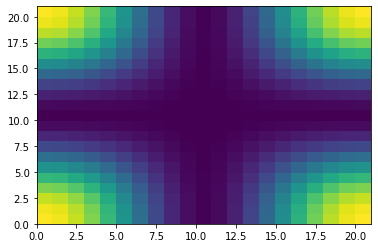

In [68]:
U_identity = np.identity(4)
fidelities = np.zeros((21,21))
for q1_id, q1_angle in enumerate(np.linspace(0, 2*np.pi, 21)):
    for q2_id, q2_angle in enumerate(np.linspace(0, 2*np.pi, 21)):
        U_angles = np.asarray([[1, 0, 0, 0], 
                               [0, np.exp(1j*q1_angle), 0, 0], 
                               [0, 0, np.exp(1j*q2_angle), 0], 
                               [0, 0, 0, np.exp(1j*(q1_angle+q2_angle))]])
#plt.pcolormesh((np.real(np.tensordot(np.asarray(U_iswap).ravel(), np.conj(np.asarray(U_iswap)).ravel()))))
        X_identity = np.reshape(np.transpose(np.reshape(np.kron(U_identity@U_angles, np.conj(U_identity@U_angles)), (4,4,4,4)),(0,2,1,3)), (16,16))
#figs, axes = plt.subplots(2,1)
#axes[0].pcolormesh(np.real(X_iswap))
#axes[1].pcolormesh(np.imag(X_iswap))
        fidelity = np.sum(X_identity*np.conj(tomography_1q.datasets['reconstruction'].data))/16
        fidelities[q1_id, q2_id] =fidelity
print (np.max(fidelities))
plt.pcolormesh(np.real(fidelities))

In [14]:
unitary_1q = [[1, 0, 0, 1], [0 ,0 ,0 ,0], [0, 0, 0, 0], [1, 0, 0, 1]]
unitary_2q = np.kron(unitary_1q, unitary_1q)
fidelity = np.sum(tomography_1q.datasets['reconstruction'].data*np.conj(unitary_2q))/4
fidelity

(0.9445057133335126+1.734723475976807e-18j)

## Benchmarking pi/2 pulses

In [ ]:
from qsweepy.qubit_calibrations import benchmarking
from qsweepy import interleaved_benchmarking 
from qsweepy import clifford
#from qsweepy import pulses
from qsweepy.qubit_calibrations import excitation_pulse
reload(clifford)
reload(interleaved_benchmarking)
reload(excitation_pulse)
reload(benchmarking)
reload(fit_dataset)
#reload(pulses)

not_pulse1_references = excitation_pulse.get_excitation_pulse(device=device, qubit_id='1', rotation_angle=np.pi)
not_pulse3_references = excitation_pulse.get_excitation_pulse(device=device, qubit_id='3', rotation_angle=np.pi)
h_pulse1_references = excitation_pulse.get_excitation_pulse(device=device, qubit_id='1', rotation_angle=np.pi/2.)
h_pulse3_references = excitation_pulse.get_excitation_pulse(device=device, qubit_id='3', rotation_angle=np.pi/2.)

not_pulse1 = excitation_pulse.get_not(device=device, qubit_id='1')
not_pulse3 = excitation_pulse.get_not(device=device, qubit_id='3')
h_pulse1 = excitation_pulse.get_hadamard(device=device, qubit_id='1')
h_pulse3 = excitation_pulse.get_hadamard(device=device, qubit_id='3')

not_pulse1_unitary = np.kron([[0, 1], [1, 0]], [[1, 0], [0, 1]])
not_pulse3_unitary = np.kron([[1, 0], [0, 1]], [[0, 1], [1, 0]])
h_pulse1_unitary = np.sqrt(0.5)*np.kron([[1, 1], [1, -1]], [[1, 0], [0, 1]])
h_pulse3_unitary = np.sqrt(0.5)*np.kron([[1, 0], [0, 1]], [[1, 1], [1, -1]])

not_pulse = np.asarray([[0,1],[1,0]])
h_unitary = np.sqrt(0.5)*np.asarray(([1,1],[1,-1]))

qubits = 1

bench_gates = {'not1': {'references':{'ex_pulse': not_pulse1_references.id}, 
                        'pulses': not_pulse1,
                        'unitary': not_pulse1_unitary if qubits==2 else not_pulse},
               'not3': {'references':{'ex_pulse': not_pulse3_references.id},
                        'pulses': not_pulse3,
                        'unitary': not_pulse3_unitary if qubits==2 else not_pulse},
               'h1':   {'references':{'ex_pulse': h_pulse1_references.id},
                        'pulses': h_pulse1,
                        'unitary': h_pulse1_unitary if qubits==2 else h_unitary},
               'h3':   {'references':{'ex_pulse': h_pulse3_references.id},
                        'pulses': h_pulse3,
                        'unitary': h_pulse3_unitary if qubits==2 else h_unitary}
               }

benchmarking.benchmarking_pi2_multi(device=device, 
                                    pause_length=20e-9, 
                                    qubit_ids=['1'],
                                    interleaver=None,
                                    random_sequence_num=1,
                                    seq_lengths_num=500)


benchmarking.benchmarking_pi2_multi(device=device, 
                                    pause_length=20e-9, 
                                    qubit_ids=['3'],
                                    interleaver=None,
                                    random_sequence_num=1,
                                    seq_lengths_num=500)


In [50]:
exdir_db_inst.select_measurement_by_id(573).datasets.keys()

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000573-fit_dataset_1d-1906-002_4_down


dict_keys(['A', 'resultnumbers'])

In [32]:
from qsweepy.qubit_calibrations.benchmarking import fit_benchmarking
from qsweepy.qubit_calibrations import benchmarking
from qsweepy.fitters import exp
reload(benchmarking)
reload(exp)
fit_benchmarking(0, meas)

ImportError: cannot import name 'fit_benchmarking'

## Process tomography of single-qubit gates 

In [59]:
from qsweepy.qubit_calibrations import state_tomography
reload(state_tomography)
qubit_ids = ['1', '3']
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)

process_tomography_inst.set_prepare_seq(excitation_pulse.get_not(device=device, qubit_id='1'))
tomography = sweeper.sweep(process_tomography_inst, 
                           measurement_type='process_tomography_not1',
                          references={'confusion_matrix': process_tomography_inst.confusion_matrix_id})
process_tomography_inst.set_prepare_seq(excitation_pulse.get_not(device=device, qubit_id='3'))
tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_not3',
                          references={'confusion_matrix': process_tomography_inst.confusion_matrix_id})
process_tomography_inst.set_prepare_seq(excitation_pulse.get_hadamard(device=device, qubit_id='1'))
tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_h1',
                          references={'confusion_matrix': process_tomography_inst.confusion_matrix_id})
process_tomography_inst.set_prepare_seq(excitation_pulse.get_hadamard(device=device, qubit_id='3'))
tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_h3',
                          references={'confusion_matrix': process_tomography_inst.confusion_matrix_id})

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 535
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 538
reference: ('readout_pulse', '1') : 539
reference: ('readout_pulse', '3') : 540
reference: readout_pulse : 541
reference: delay_calibration : 142
reference: readout_pulse : 541
reference: delay_calibration : 142
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 514
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: ('excitation_pulse', '1') : 534
reference: ('excitation_pulse', '3') : 537
reference: readout_pulse : 541
reference: channel

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196712 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  172104 last_point:  196784 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5632 pre_delay 0 pre_delay_reg 0
first_point:  196680 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196680 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196680 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ lengt

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2912 pre_delay 196488 pre_delay_reg 24561
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2912 pre_delay 196488 pre_delay_reg 24561
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2912 pre_delay 196488 pre_delay_reg 24561
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2912 pre_delay 196488 pre_delay_reg 24561
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196688 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2912 pre_delay 196488 pre_delay_reg 24561
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196648 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196680 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196648 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196584 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196720 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2880 pre_delay 196520 pre_delay_reg 24565
first_point:  196616 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

TypeError: __init__() got an unexpected keyword argument 'complex'

## Calibrating parametric iSWAP gate

In [ ]:
measurement_qubit = '1'
qubit_readout_pulse_, measurer = calibrated_readout.get_calibrated_measurer(device=device, 
                                        qubit_ids=['1', '3'])
lengths = np.linspace(0, 1e-6, 26)
amplitude = 0.65
frequency = 17.7e6

ex_pulse_q1 = excitation_pulse.get_excitation_pulse(device=device, qubit_id='1', rotation_angle=np.pi)
ex_pulse_q3 = excitation_pulse.get_excitation_pulse(device=device, qubit_id='3', rotation_angle=np.pi)
def set_parametric_length (x):
    pulse = [{k:amplitude*v \
              for k,v in device.pg.p('coil_f13_2', x, device.pg.rect, 1.0).items()}]
    device.pg.set_seq(#ex_pulse_q1.get_pulse_sequence(0)+\
                      ex_pulse_q3.get_pulse_sequence(0)+\
                      [device.pg.pmulti(50e-9)]+\
                      pulse+\
                      [device.pg.pmulti(50e-9)]+\
                      device.trigger_readout_seq+\
                      qubit_readout_pulse_.get_pulse_sequence())
    
sweeper.sweep(measurer, 
              (lengths, set_parametric_length, 'Length', 's'), 
              measurement_type='parametric_01_10',
              metadata = {'measurement_qubit':measurement_qubit,
                          'amplitude':amplitude, 
                          'frequency': frequency})

In [31]:
measurement_qubit = '1'
qubit_readout_pulse_, measurer = calibrated_readout.get_calibrated_measurer(device=device, 
                                        qubit_ids=['1', '3'])
lengths = np.linspace(0, 5e-6, 51)

amplitude = 0.65
#frequencies = np.linspace(17.0e6, 18.5e6, 31)
frequencies = [17.70e6]

ex_pulse_q1 = excitation_pulse.get_excitation_pulse(device=device, qubit_id='1', rotation_angle=np.pi)
ex_pulse_q3 = excitation_pulse.get_excitation_pulse(device=device, qubit_id='3', rotation_angle=np.pi)

class controller:
    def __init__(self):
        self.length = 0
        self.frequency = 0

ctrl = controller()

def set_parametric_length (x):
    ctrl.length = x
    pulse = [{k:amplitude*v \
              for k,v in device.pg.p('coil_f13_2', ctrl.length, device.pg.rect, 1.0).items()}]
    device.pg.set_seq(#ex_pulse_q1.get_pulse_sequence(0)+\
                      ex_pulse_q3.get_pulse_sequence(0)+\
                      [device.pg.pmulti(50e-9)]+\
                      pulse+\
                      [device.pg.pmulti(50e-9)]+\
                      device.trigger_readout_seq+\
                      qubit_readout_pulse_.get_pulse_sequence())

def set_parametric_frequency (x):
    ctrl.frequency = x
    pulse = [{k:amplitude*v \
              for k,v in device.pg.p('coil_f13_2', ctrl.length, device.pg.rect, 1.0).items()}]
    device.pg.set_seq(#ex_pulse_q1.get_pulse_sequence(0)+\
                      ex_pulse_q3.get_pulse_sequence(0)+\
                      [device.pg.pmulti(50e-9)]+\
                      pulse+\
                      [device.pg.pmulti(50e-9)]+\
                      device.trigger_readout_seq+\
                      qubit_readout_pulse_.get_pulse_sequence())
    
sweeper.sweep(measurer, 
              (frequencies, set_parametric_frequency, 'Frequency', 'Hz'), 
              (lengths, set_parametric_length, 'Length', 's'),
              measurement_type='parametric_01_10_2dscan',
              metadata = {'measurement_qubit':measurement_qubit,
                          'amplitude':amplitude, 
                          'excitation':'q3_pi'
                          #'length': length
                         })

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:573: FutureWarning:

ask is deprecated and will be removed in 1.10, use query instead.



reference: frequency_controls : 9700
reference: channel_calibration : 9671
reference: fidelity_scan : 9843
reference: frequency_controls : 9706
reference: channel_calibration : 9672
reference: fidelity_scan : 9846
reference: ('readout_pulse', '1') : 9847
reference: ('readout_pulse', '3') : 9848
reference: readout_pulse : 9849
reference: delay_calibration : 9768
reference: readout_pulse : 9849
reference: delay_calibration : 9768
reference: channel_amplitudes : 9741
reference: gauss_hd_Rabi_amplitude_adaptive : 9818
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-08-08\009741-channel_amplitudes-1906-001_1_down
reference: channel_amplitudes : 9755
reference: gauss_hd_Rabi_amplitude_adaptive : 9826
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-08-08\009755-channel_amplitudes-1906-001_1_down


C:\qtlab_replacement\qsweepy\instrument_drivers\Tektronix_AWG5014.py:651: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  47296 last_point:  47400 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 2200 pre_delay 47200 pre_delay_reg 5900
first_point:  47296 last_point:  47400 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 2200 pre_delay 47200 pre_delay_reg 5900
resultnumbers
first_point:  47200 last_point:  47400 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 2200 pre_delay 47200 pre_delay_reg 5900
first_point:  47200 last_point:  47304 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 2296 pre_delay 47104 pre_delay_reg 5888
resultnumbers
first_point:  47096 last_point:  47304 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600

resultnumbers
first_point:  45400 last_point:  45600 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 4000 pre_delay 45400 pre_delay_reg 5675
first_point:  45400 last_point:  45504 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 4096 pre_delay 45304 pre_delay_reg 5663
resultnumbers
first_point:  45296 last_point:  45504 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 600 nop 49600 post_delay 4096 pre_delay 44904 pre_delay_reg 5613
first_point:  45296 last_point:  45400 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 4200 pre_delay 45200 pre_delay_reg 5650
resultnumbers
first_point:  45200 last_point:  45400 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 marker

resultnumbers
first_point:  43496 last_point:  43704 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 600 nop 49600 post_delay 5896 pre_delay 43104 pre_delay_reg 5388
first_point:  43496 last_point:  43600 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 6000 pre_delay 43400 pre_delay_reg 5425
resultnumbers
first_point:  43400 last_point:  43600 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 6000 pre_delay 43400 pre_delay_reg 5425
first_point:  43400 last_point:  43504 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 markerQ length 49600 wave_length 200 nop 49600 post_delay 6096 pre_delay 43304 pre_delay_reg 5413
resultnumbers
first_point:  43296 last_point:  43504 waveformI length (49600,) waveformQ length (49600,) markerI length 49600 marker

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:335: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



start: 2019-08-09 09:23:25.493645, started/done/total sweeps: 0/51/51, 
Measured data: 
'resultnumbers': parameters: Frequency (Hz),:[17700000.0, 17700000.0] (1 points) with setter
Length (s),:[0.0, 5e-06] (51 points) with setter
State (),:[0, 3] (4 points) without setter
data: [[[5018. 2585. 7735. 4662.]
  [5591. 3425. 6654. 4330.]
  [5270. 4321. 5662. 4747.]
  [5231. 4900. 4856. 5013.]
  [5297. 4283. 5772. 4648.]
  [5268. 3114. 6960. 4658.]
  [4835. 2766. 7755. 4644.]
  [5060. 3572. 6607. 4761.]
  [5084. 4565. 5449. 4902.]
  [5265. 4835. 5112. 4788.]
  [5248. 4342. 5721. 4689.]
  [5179. 3244. 7055. 4522.]
  [4984. 3013. 7385. 4618.]
  [5049. 3778. 6358. 4815.]
  [5464. 4506. 5648. 4382.]
  [5303. 4943. 4968. 4786.]
  [5428. 3947. 6151. 4474.]
  [5167. 3405. 6982. 4446.]
  [5381. 3274. 6951. 4394.]
  [5376. 3663. 6407. 4554.]
  [5348. 4568. 5350. 4734.]
  [5388. 4663. 5315. 4634.]
  [5476. 4017. 6056. 4451.]
  [5380. 3399. 6792. 4429.]
  [5302. 3360. 6812. 4526.]
  [5420. 3798. 6315. 

In [35]:
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(Rabi)
reload(Ramsey)
parametric_two_qubit_gate.iswap_frequency_scan(device, device.get_two_qubit_gates()['iSWAP(1,3)'])

Requested:  metadata: {'coil_f13_2': '0.81'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.81'} references: {}
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: ('readout_pulse', '1') : 612
reference: readout_pulse : 613
reference: delay_calibration : 188
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  195992 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00032012]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([88000590.2763932]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.10190212]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.35200236]), 'phi': array([-3.20471167]), 'points_per_period': array([11.36356014])}
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196496 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 1

first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.0003148]), 'T': array([5.90821623e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00270809]), 'f': array([99539658.90830432]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.29816558]), 'num_periods_decay': array([588.10182782]), 'num_periods_scan': array([1.59263454]), 'phi': array([-3.32061215]), 'points_per_period': array([10.046247])}
first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196488 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 19

first_point:  196448 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([0.00094851]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00092019]), 'T': array([1.47582962e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.02032755]), 'f': array([99089820.61315688]), 'frequency_g

first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00087918]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196464 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.0008809]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196432 last_point:  196704 waveformI length (199600,) wa

iq1
{'MSE_rel': array([0.00098126]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196416 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00099721]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196416 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196440 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00098522]), 'decay_goodness_test': array([0]

iq1
{'MSE_rel': array([0.00099728]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196400 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00097231]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196392 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196424 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00097755]), 'decay_goodness_test': array([0]

iq1
{'MSE_rel': array([0.00098324]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq1
{'MSE_rel': array([0.00096866]), 'T': array([2.21984579e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.04054336]), 'f': array([99264795.86694548]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.2760395]), 'num_periods_decay': array([220.35253876]), 'num_periods_scan': array([8.93383163]), 'phi': array([-3.32471327]), 'points_per_period': array([10.07406494])}
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 2

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196464 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196496 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196488 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196464 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([3.67402709e-05]), 'T': array([0.03023662]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.32289923e-06]), 'f': array([8423427.02911936]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.15125597]), 'num_periods_decay': array([254695.954466]), 'num_periods_scan': array([0.33693708]), 'phi': array([-3.25580656]), 'points_per_period': array([11.87165267])}
first_point:  196424 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ le

first_point:  196336 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196368 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00440801]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([9299570.60782516]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.41872821]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([1.30193989]), 'phi': array([-3.31539001]), 'points_per_period': array([10.75318466])}
first_point:  196320 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 1

iq1
{'MSE_rel': array([0.00737002]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196224 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196256 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00737489]), 'T': array([2.3919371e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.1045178]), 'f': array([9187892.01087705]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.42741453]), 'num_periods_decay': array([21.97685981]), 'num_periods_scan': array([2.296973]), 'phi': array([-3.26484021]), 'points_per_period': array([10.88388935])}


first_point:  196112 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196144 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00735706]), 'T': array([3.48266296e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10336918]), 'f': array([9172440.54973109]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.45253634]), 'num_periods_decay': array([31.94451893]), 'num_periods_scan': array([3.3020786]), 'phi': array([-3.2530844]), 'points_per_period': array([10.90222384])}
first_point:  196104 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199

iq1
{'MSE_rel': array([0.00716447]), 'T': array([4.22732543e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10881585]), 'f': array([9203692.82964797]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.46525551]), 'num_periods_decay': array([38.90700478]), 'num_periods_scan': array([4.2336987]), 'phi': array([-3.27857601]), 'points_per_period': array([10.86520398])}
first_point:  196000 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196032 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.00717823]), 'T': array([4.19350777e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_l

first_point:  195896 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195928 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.00743972]), 'T': array([4.38627023e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.1322308]), 'f': array([9224109.16416035]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.46777442]), 'num_periods_decay': array([40.4594354]), 'num_periods_scan': array([5.34998332]), 'phi': array([-3.30186102]), 'points_per_period': array([10.84115531])}
first_point:  195880 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

iq1
{'MSE_rel': array([0.00845314]), 'T': array([4.31810711e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.15747641]), 'f': array([9250013.88244524]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.46659351]), 'num_periods_decay': array([39.94255071]), 'num_periods_scan': array([6.29000944]), 'phi': array([-3.337524]), 'points_per_period': array([10.81079459])}
first_point:  195784 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195816 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.00861236]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int6

first_point:  195680 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195712 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.00973382]), 'T': array([3.56435654e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.22163888]), 'f': array([9268183.61171604]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.4573696]), 'num_periods_decay': array([33.03511084]), 'num_periods_scan': array([7.32186505]), 'phi': array([-3.36228217]), 'points_per_period': array([10.78960066])}
first_point:  195672 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

first_point:  195576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195608 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.01205986]), 'T': array([3.82886748e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.23505645]), 'f': array([9293317.14738703]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.46571041]), 'num_periods_decay': array([35.58287978]), 'num_periods_scan': array([8.36398543]), 'phi': array([-3.39875285]), 'points_per_period': array([10.76042046])}
first_point:  195560 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length

load time:  0.04097485542297363
pre_trace_time:  0.001998424530029297
trace 0 time:  0.01299285888671875
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 610
reference: ('readout_pulse', '1') : 612
reference: readout_pulse : 613
reference: delay_calibration : 188
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
initial_axes_order [(2, 0)]


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196408 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196304 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196208 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
iq1
{'MSE_rel': array([0.00083909]), 'T': array([0.00189399]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00021119]), 'f': array([287614.7164404]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([0.57175948]), 'num_periods_decay': array([544.73814598]), 'num_periods_scan': array([0.11504589]), 'phi': array([-6.26192163]), 'points_per_period': array([34.76873549])}
first_point:  195976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 19960

first_point:  195072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([0.00855874]), 'T': array([6.18631895e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.22630582]), 'f': array([1044126.21920873]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.43556336]), 'num_periods_decay': array([6.45929782]), 'num_periods_scan': array([1.46177671]), 'phi': array([-3.57999673]), 'points_per_period': array([9.57738616])}
first_point:  194976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

first_point:  194072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([0.03135576]), 'T': array([1.21138891e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.19811969]), 'f': array([992863.43510116]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.48389636]), 'num_periods_decay': array([12.02743759]), 'num_periods_scan': array([2.38287224]), 'phi': array([-3.38620859]), 'points_per_period': array([10.07187862])}
first_point:  193976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

iq1
{'MSE_rel': array([0.02651736]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  192976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193008 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([0.0255842]), 'T': array([1.13828037e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.30748136]), 'f': array([993743.96902439]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.487982]), 'num_periods_decay': array([11.31159253]), 'num_periods_scan': array([3.47810389]), 'phi': array([-3.38427363]), 'points_per_period': array([10.06295415])

iq1
{'MSE_rel': array([0.03039149]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  191872 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  191904 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([0.02948505]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  191776 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  191808 last_point:  196672 waveformI length (199600,

first_point:  190776 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  190808 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([0.02961265]), 'T': array([1.29280735e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.44090096]), 'f': array([988065.97107317]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.49816939]), 'num_periods_decay': array([12.77378949]), 'num_periods_scan': array([5.63197604]), 'phi': array([-3.35442959]), 'points_per_period': array([10.1207817])}
first_point:  190672 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

first_point:  189608 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
iq1
{'MSE_rel': array([0.02955818]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  189472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  189504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
iq1
{'MSE_rel': array([0.02940134]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  189376 last_point:  196704 waveformI length (1996

iq1
{'MSE_rel': array([0.02888385]), 'T': array([1.53030978e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.52276997]), 'f': array([987004.14237811]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.53499061]), 'num_periods_decay': array([15.10422089]), 'num_periods_scan': array([7.89603314]), 'phi': array([-3.34161252]), 'points_per_period': array([10.13166974])}
first_point:  188376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  188408 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
iq1
{'MSE_rel': array([0.02854811]), 'T': array([1.53239743e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan

first_point:  187072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  187104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
iq1
{'MSE_rel': array([0.02895634]), 'T': array([1.55493289e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.6045277]), 'f': array([986954.17346408]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.53766802]), 'num_periods_decay': array([15.346475]), 'num_periods_scan': array([9.27736923]), 'phi': array([-3.34109734]), 'points_per_period': array([10.1321827])}
first_point:  186976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 19

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  195472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  194472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  193472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  192472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  192504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
iq1
{'MSE_rel': array([0.04695501]), 'T': array([6.28447093]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([6.36489538e-07]), 'f': array([117026.51151279]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.23828775]), 'num_periods_decay': array([735449.7097525]), 'num_periods_scan': array([0.46810605]), 'phi': array([-3.20627697]), 'points_per_period': array([8.54507228])}
first_point:  191472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ lengt

first_point:  181472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  181504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
iq1
{'MSE_rel': array([0.03067305]), 'T': array([1.42712778e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.05106216]), 'f': array([98834.90052779]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.45417779]), 'num_periods_decay': array([1.41050032]), 'num_periods_scan': array([1.48252351]), 'phi': array([-3.25425807]), 'points_per_period': array([10.11788341])}
first_point:  180472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

first_point:  171504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.03448583]), 'T': array([1.58445147e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([1.57783312]), 'f': array([98916.15745499]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.46695299]), 'num_periods_decay': array([1.56727851]), 'num_periods_scan': array([2.47290394]), 'phi': array([-3.26308393]), 'points_per_period': array([10.10957184])}
first_point:  170472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  170504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_leng

first_point:  158472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  158504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.03962577]), 'T': array([1.60449671e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([2.36834391]), 'f': array([98992.22559498]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.45436121]), 'num_periods_decay': array([1.588327]), 'num_periods_scan': array([3.76170457]), 'phi': array([-3.27473274]), 'points_per_period': array([10.10180339])}
first_point:  157472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length

first_point:  147472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  147504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.04384358]), 'T': array([1.60430271e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([3.05428644]), 'f': array([99312.16786516]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.44433181]), 'num_periods_decay': array([1.5932678]), 'num_periods_scan': array([4.86629623]), 'phi': array([-3.28866404]), 'points_per_period': array([10.0692596])}
first_point:  146472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length

iq1
{'MSE_rel': array([0.04687011]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  134472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  134504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.04723496]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  133472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  133504 last_point:  196672 waveformI length (199600,) waveformQ length (1

first_point:  121504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.04998431]), 'T': array([1.60663336e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([4.66814658]), 'f': array([99380.61368341]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([1.44116451]), 'num_periods_decay': array([1.59668209]), 'num_periods_scan': array([7.45354603]), 'phi': array([-3.29211579]), 'points_per_period': array([10.06232466])}
first_point:  120472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  120504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_leng

iq1
{'MSE_rel': array([0.05256811]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  106472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  106504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
iq1
{'MSE_rel': array([0.05368449]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  105472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  105504 last_point:  196672 waveformI length (199600,) waveformQ length (1

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196896 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.0007552]), 'T': array([0.00027729]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.44250914e-05]), 'f': array([70746391.39653122]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([1.38677376]), 'num_periods_decay': array([19617.59256199]), 'num_periods_scan': array([0.28298557]), 'phi': array([-3.19648381]), 'points_per_period': array([14.13499657])}
first_point:  196496 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ lengt

iq3
{'MSE_rel': array([0.00537842]), 'T': array([0.02888461]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([4.15446139e-07]), 'f': array([99474259.72893496]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.27431552]), 'num_periods_decay': array([2873275.27207124]), 'num_periods_scan': array([1.19369112]), 'phi': array([-3.34863594]), 'points_per_period': array([10.05285189])}
first_point:  196464 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196464 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00631377]), 'T': array([0.3140818]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_l

first_point:  196480 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196448 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196448 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00578118]), 'T': array([0.00116532]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.88789911e-05]), 'f': array([99464736.96496643]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.21702853]), 'num_periods_decay': array([115907.90023418]), 'num_periods_scan': ar

first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.0057671]), 'T': array([0.00143728]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.15685143e-05]), 'f': array([99404383.78146064]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.12527188]), 'num_periods_decay': array([142871.95918844]), 'num_periods_scan': array([3.0815359]), 'phi': array([-3.36072905]), 'points_per_period': array([10.05991851])}
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ lengt

iq3
{'MSE_rel': array([0.0055342]), 'T': array([0.78077254]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([4.99505272e-08]), 'f': array([99171848.33074427]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.1352828]), 'num_periods_decay': array([77430655.93545617]), 'num_periods_scan': array([3.86770208]), 'phi': array([-3.34497217]), 'points_per_period': array([10.08350673])}
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00532866]), 'T': array([0.01786223]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_l

iq3
{'MSE_rel': array([0.00506436]), 'T': array([0.0009643]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([5.28878638e-05]), 'f': array([99246999.45417646]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.13909564]), 'num_periods_decay': array([95704.31870089]), 'num_periods_scan': array([5.06159697]), 'phi': array([-3.35090559]), 'points_per_period': array([10.07587137])}
first_point:  196456 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196424 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196424 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ lengt

first_point:  196440 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196408 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196408 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00582961]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196408 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_del

first_point:  196432 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196400 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196400 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00648815]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196400 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_del

first_point:  196416 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196384 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00675151]), 'T': array([1.18102055e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.0736651]), 'f': array([99406481.22155575]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.09754761]), 'num_periods_decay': array([117.40109696]), 'num_periods_scan': array(

first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.006723]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196408 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196496 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196464 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196464 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196488 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196456 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196472 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196440 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196464 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196432 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.00285598]), 'T': array([0.05347963]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([7.47948378e-07]), 'f': array([12341235.92434838]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([3.10134812]), 'num_periods_decay': array([660004.68908593]), 'num_periods_scan': ar

first_point:  196384 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196352 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196352 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.01274098]), 'T': array([0.00536245]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([2.23778195e-05]), 'f': array([9073299.10031287]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.23797273]), 'num_periods_decay': array([48655.13773916]), 'num_periods_scan': arra

first_point:  196304 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.01799435]), 'T': array([1.46601712e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.13642405]), 'f': array([9382818.00661272]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.16789008]), 'num_periods_decay': array([13.75537183]), 'num_periods_scan': array([

first_point:  196192 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196192 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.01559649]), 'T': array([1.54981273e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.18066699]), 'f': array([9344424.60273579]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.15883753]), 'num_periods_decay': array([14.48210821]), 'num_periods_scan': array([2.61643889]), 'phi': array([-3.33085981]), 'points_per_period': array([10.7015685])}
first_point:  196216 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 19

first_point:  196104 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196104 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([0.01550359]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196128 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196096 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_de

iq3
{'MSE_rel': array([0.02051095]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196024 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195992 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195992 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.02002344]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  196016 last_point:  196672 waveformI length (199600,

iq3
{'MSE_rel': array([0.0199831]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195928 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195896 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195896 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.01946089]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195912 last_point:  196672 waveformI length (199600,)

first_point:  195800 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195800 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.02111736]), 'T': array([0.01416968]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([4.72840703e-05]), 'f': array([9349129.77628191]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.3072429]), 'num_periods_decay': array([132474.14844653]), 'num_periods_scan': array([6.26391695]), 'phi': array([-3.3314282]), 'points_per_period': array([10.69618268])}
first_point:  195824 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ leng

iq3
{'MSE_rel': array([0.02818401]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195744 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195712 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195712 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.02784831]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195736 last_point:  196672 waveformI length (199600,

first_point:  195648 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.03449002]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195632 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre

first_point:  195552 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195520 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195520 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.03396281]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  195544 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  195480 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arr

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196408 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196304 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196208 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
first_point:  196176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': arra

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2928 pre_delay 196072 pre_delay_reg 24509
first_point:  196072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  196072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.00013006]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([1097886.13667472]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.31336537]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.43915445]), 'phi': arra

first_point:  195304 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([0.02549166]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([976107.69080101]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.41871984]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([1.17132923]), 'phi': arra

iq3
{'MSE_rel': array([0.02633833]), 'T': array([0.05234146]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3.63000924e-05]), 'f': array([986046.65960355]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.39730353]), 'num_periods_decay': array([51611.12626248]), 'num_periods_scan': array([1.87348865]), 'phi': array([-3.21383711]), 'points_per_period': array([10.14150791])}
first_point:  194504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  194472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ leng

iq3
{'MSE_rel': array([0.03151094]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  193704 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  193672 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193672 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.03412663]), 'T': array([1.41661374e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.19765444]), 'f': array([1001959.69932197]), 'frequency

iq3
{'MSE_rel': array([0.03863505]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  192808 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  192776 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  192776 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.03880591]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  192704 last_point:  196672 waveformI length (199600,

iq3
{'MSE_rel': array([0.03945927]), 'T': array([2.82031039e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.15955691]), 'f': array([1011470.58131823]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.28933824]), 'num_periods_decay': array([28.52660985]), 'num_periods_scan': array([4.55161762]), 'phi': array([-3.37262447]), 'points_per_period': array([9.88659501])}
first_point:  191904 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  191872 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  191872 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 

iq3
{'MSE_rel': array([0.04713021]), 'T': array([4.15133608e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.1300786]), 'f': array([1009250.86623509]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.30321944]), 'num_periods_decay': array([41.89739532]), 'num_periods_scan': array([5.44995468]), 'phi': array([-3.35914346]), 'points_per_period': array([9.90833928])}
first_point:  191008 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  190976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  190976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 1

iq3
{'MSE_rel': array([0.04697886]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  190104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
first_point:  190072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  190072 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.04675511]), 'T': array([2.70952073e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.23620413]), 'f': array([1010233.37672727]), 'freque

first_point:  189208 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
first_point:  189176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  189176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.04569676]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  189104 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672

first_point:  188272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  188272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.04568521]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  188208 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
first_point:  188176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704

first_point:  187376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  187376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.045534]), 'decay_goodness_test': array([0], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  187304 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
first_point:  187272 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 p

iq3
{'MSE_rel': array([0.04626741]), 'T': array([2.25044478e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.43991304]), 'f': array([1008957.30440025]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.20951186]), 'num_periods_decay': array([22.70602698]), 'num_periods_scan': array([9.98867731]), 'phi': array([-3.35151461]), 'points_per_period': array([9.91122217])}
Waiting to join deferred threads:
load time:  0.04197382926940918
pre_trace_time:  0.0009984970092773438
trace 0 time:  0.0159914493560791
load time:  0.09694027900695801
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.01698923110961914
reference: frequency_controls : 114
reference: channel_calibration : 91
reference: fidelity_scan : 611
reference: ('readout_pulse', '3') : 629
reference: readout_pulse : 733
reference: delay_calibration : 188
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_i

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2928 pre_delay 196472 pre_delay_reg 24559
first_point:  186576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  196472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': ar

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  195504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2928 pre_delay 194672 pre_delay_reg 24334
first_point:  195472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
first_point:  195472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': a

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  194504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  194472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  194472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': a

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  193504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  193472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  193472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([nan]), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': a

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  192504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2928 pre_delay 190672 pre_delay_reg 23834
first_point:  192472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
first_point:  192472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
iq3
{'MSE_rel': array([0.01837092]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([15810.52169195]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([0.22467466]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.06324209]), 'phi': array

first_point:  184504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2928 pre_delay 176672 pre_delay_reg 22084
first_point:  184472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
first_point:  184472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
iq3
{'MSE_rel': array([0.08131379]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([110576.17141208]), 'frequency_goodness_test': array([0], dtype=int64), 'inf': array([2.91024195]), 'num_periods_decay': array([inf]), 'num_periods_scan': array([1.32691406]), 'phi': a

first_point:  176504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  176472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  176472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.03854745]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  175504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point

first_point:  168472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.04835893]), 'T': array([1.88222368e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([1.48760215]), 'f': array([110359.22943845]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.4035354]), 'num_periods_decay': array([2.07720755]), 'num_periods_scan': array([3.09005842]), 'phi': array([-3.34759594]), 'points_per_period': array([9.06131735])}
first_point:  167504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  167472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_lengt

first_point:  159504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  159472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  159472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.06569295]), 'T': array([1.68249171e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([2.1991193]), 'f': array([110991.66015974]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.28910279]), 'num_periods_decay': array([1.86742549]), 'num_periods_scan': array([4.10669143]), 'phi': 

first_point:  151472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.06705049]), 'T': array([1.68023238e-05]), 'decay_goodness_test': array([1], dtype=int64), 'decays_in_scan_length': array([2.67820098]), 'f': array([111016.60112293]), 'frequency_goodness_test': array([1], dtype=int64), 'inf': array([2.28687911]), 'num_periods_decay': array([1.86533688]), 'num_periods_scan': array([4.99574705]), 'phi': array([-3.38498487]), 'points_per_period': array([9.00766183])}
first_point:  150504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  150472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_leng

first_point:  141472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.06977782]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  140504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  140472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  140472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_r

first_point:  130472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  130472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.07352937]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  129504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  129472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point

first_point:  119504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  119472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  119472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.07717069]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  118504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point

iq3
{'MSE_rel': array([0.08148267]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  108504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  108472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  108472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.08229858]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  107504 last_point:  196672 waveformI length (199600,) waveformQ length (1

first_point:  98472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': array([0.0901635]), 'decay_goodness_test': array([1], dtype=int64), 'frequency_goodness_test': array([1], dtype=int64)}
first_point:  97504 last_point:  196672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5856 pre_delay 0 pre_delay_reg 0
first_point:  97472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
first_point:  97472 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 199600 nop 199600 post_delay 5792 pre_delay 0 pre_delay_reg 0
iq3
{'MSE_rel': 

(start: 2019-08-16 14:22:53.396000, started/done/total sweeps: 0/0/0, 
 Measured data: 
 'A': parameters: 
 data: 3172.617652288257
 'MSE_rel': parameters: 
 data: [0.05493958]
 'T': parameters: 
 data: [1.60341582e-05]
 'decay_goodness_test': parameters: 
 data: [1]
 'decays_in_scan_length': parameters: 
 data: [6.17431853]
 'f': parameters: 
 data: [99400.92482914]
 'frequency_goodness_test': parameters: 
 data: [1]
 'inf': parameters: 
 data: [1.43949563]
 'iq1': parameters: Delay (s),:[0.0, 9.9e-05] (501 points) with setter
 data: [7702.97158289 7699.38551849 7648.16163353 7551.24248669 7411.21945855
  7231.27744158 7015.13183671 6766.95900411 6491.32138737 6193.08858198
  5877.35564959 5549.35998974 5214.39807083 4877.74329255 4544.56620339
  4219.85823152 3908.36000532 3614.49524365 3342.31108729 3095.42562348
  2876.98322766 2689.61821205 2535.42713229 2415.94996298 2332.16021229
  2284.4639086  2272.70725773 2296.19264294 2353.70252023 2443.53065222
  2563.52002592 2711.1067134

In [20]:
sweeper.ignore_callback_errors = False

In [55]:
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(Rabi)
reload(Ramsey)
reload(exp_sin)
parametric_two_qubit_gate.calibrate_parametric_iswap(device, device.get_two_qubit_gates()['iSWAP(1,3)'])

AttributeError: module 'qsweepy.qubit_calibrations.parametric_two_qubit_gate' has no attribute 'calibrate_parametric_iswap'

In [70]:
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(Rabi)
reload(Ramsey)
reload(exp_sin)
reload(excitation_pulse)
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
#parametric_two_qubit_gate.calibrate_iswap_phase_single_pulse(device, iswap, 1)

Requested:  metadata: {'coil_f13_2': '0.795'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.795'} references: {}
reference: long_process : 937
reference: fit_source : 945
reference: long_process : 937
reference: fit_source : 953
frequency_delta_q1:  -946902.0049376575
frequency_delta_q2:  -611238.7075737879
frequency_shift:  -335663.2973638696
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: long_process : 937
reference:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range


 fit_source : 945
reference: long_process : 937
reference: fit_source : 953
frequency_delta_q1:  -946902.0049376575
frequency_delta_q2:  -611238.7075737879
frequency_shift:  -335663.2973638696
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Requested:  metadata: {'coil_f13_2': '0.795'} references: {}
Obtained:  metadata: {'coi

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196616 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2984 pre_delay 196416 pre_delay_reg 24552
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196616 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2984 pre_delay 196416 pre_delay_reg 24552
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00019388]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([69263708.03053544]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.27705483]), 'phi': array([-4.01834595]), 'points_per_period': array([14.4375753])}
first_point:  196584 last_point:  196616 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2

first_point:  196568 last_point:  196608 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2992 pre_delay 196408 pre_delay_reg 24551
first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00026316]), 'T': array([0.00027487]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([5.09336955e-05]), 'f': array([81147686.78582905]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([22304.83382945]), 'num_periods_scan': array([1.13606762]), 'phi': array([-4.02410395]), 'points_per_period': array([12.32321018])}
first_point:  196568 last_point:  196608 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_len

first_point:  196560 last_point:  196600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3000 pre_delay 196400 pre_delay_reg 24550
first_point:  196592 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00040948]), 'T': array([5.68071129e-09]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([4.22482305]), 'f': array([86292967.87736689]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([0.49020544]), 'num_periods_scan': array([2.07103123]), 'phi': array([-4.32285606]), 'points_per_period': array([11.58842979])}
first_point:  196560 last_point:  196600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00051295]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([26275581.01469774]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.89336975]), 'phi': array([-4.51895177]), 'points_per_period': array([38.05814986])}
first_point:  196552 last_point:  196584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 

first_point:  196544 last_point:  196576 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3024 pre_delay 196376 pre_delay_reg 24547
first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.0004767]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([10258121.92053521]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.45135736]), 'phi': array([-3.21949449]), 'points_per_period': array([97.48373121])}
first_point:  196544 last_point:  196576 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3

first_point:  196528 last_point:  196568 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3032 pre_delay 196368 pre_delay_reg 24546
first_point:  196560 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00066436]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([6409865.6282379]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.34613274]), 'phi': array([-2.99124121]), 'points_per_period': array([156.00951065])}
first_point:  196528 last_point:  196568 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3

first_point:  196520 last_point:  196560 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3040 pre_delay 196360 pre_delay_reg 24545
first_point:  196552 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00068083]), 'T': array([3.88140358e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00164889]), 'f': array([9931387.37714631]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([385.47722562]), 'num_periods_scan': array([0.63560879]), 'phi': array([-3.95127423]), 'points_per_period': array([100.69086644])}
first_point:  196520 last_point:  196560 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_lengt

first_point:  196512 last_point:  196552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3048 pre_delay 196352 pre_delay_reg 24544
first_point:  196544 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00067691]), 'T': array([1.41726799e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00522131]), 'f': array([4422879.62513074]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([62.6840571]), 'num_periods_scan': array([0.32729309]), 'phi': array([-3.59166986]), 'points_per_period': array([226.09704192])}
first_point:  196512 last_point:  196544 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  196504 last_point:  196536 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3064 pre_delay 196336 pre_delay_reg 24542
first_point:  196536 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00064898]), 'T': array([9.67889056e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00086787]), 'f': array([4610613.37176552]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([446.25622246]), 'num_periods_scan': array([0.38729152]), 'phi': array([-3.619683]), 'points_per_period': array([216.89088183])}
first_point:  196504 last_point:  196536 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  196488 last_point:  196528 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3072 pre_delay 196328 pre_delay_reg 24541
first_point:  196520 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00064012]), 'T': array([1.62002157e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.05802392]), 'f': array([5022100.57443635]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([8.13591124]), 'num_periods_scan': array([0.47207745]), 'phi': array([-0.57320029]), 'points_per_period': array([199.11986731])}
first_point:  196488 last_point:  196528 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196576 last_point:  196616 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2984 pre_delay 196416 pre_delay_reg 24552
first_point:  196608 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196568 last_point:  196600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3000 pre_delay 196400 pre_delay_reg 24550
first_point:  196600 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196552 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3008 pre_delay 196392 pre_delay_reg 24549
first_point:  196584 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196544 last_point:  196584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3016 pre_delay 196384 pre_delay_reg 24548
first_point:  196576 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([0.00033834]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([1.10640805e+09]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([44.25632213]), 'phi': array([-2.18985476]), 'points_per_period': array([0.09038257])}
first_point:  196536 last_point:  196576 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 302

first_point:  196448 last_point:  196480 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3120 pre_delay 196280 pre_delay_reg 24535
first_point:  196480 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([0.00058665]), 'T': array([3.99566026e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.0035038]), 'f': array([1816159.5563586]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([72.56756568]), 'num_periods_scan': array([0.25426234]), 'phi': array([-3.18198305]), 'points_per_period': array([55.06124154])}
first_point:  196432 last_point:  196472 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20

first_point:  196344 last_point:  196384 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3216 pre_delay 196184 pre_delay_reg 24523
first_point:  196376 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([0.00076111]), 'T': array([6.73593615e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.00356298]), 'f': array([1119057.62691422]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([75.37900723]), 'num_periods_scan': array([0.26857383]), 'phi': array([-3.06268239]), 'points_per_period': array([89.36090296])}
first_point:  196336 last_point:  196376 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  196248 last_point:  196280 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3320 pre_delay 196080 pre_delay_reg 24510
first_point:  196280 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([0.00113622]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([1141442.86415892]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.38809057]), 'phi': array([-3.05332255]), 'points_per_period': array([87.60841488])}
first_point:  196232 last_point:  196272 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3

first_point:  196144 last_point:  196184 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3416 pre_delay 195984 pre_delay_reg 24498
first_point:  196176 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([0.00165004]), 'T': array([inf]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.]), 'f': array([1085436.23806871]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([inf]), 'num_periods_scan': array([0.47759194]), 'phi': array([-3.01418519]), 'points_per_period': array([92.12885704])}
first_point:  196136 last_point:  196176 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3

first_point:  196048 last_point:  196080 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3520 pre_delay 195880 pre_delay_reg 24485
first_point:  196080 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.00152604]), 'T': array([1.50212396e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.35949097]), 'f': array([1025484.21097612]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([1.5404044]), 'num_periods_scan': array([0.55376147]), 'phi': array([-3.13822175]), 'points_per_period': array([97.51490947])}
first_point:  196032 last_point:  196072 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2

first_point:  195944 last_point:  195984 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3616 pre_delay 195784 pre_delay_reg 24473
first_point:  195976 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.00180336]), 'T': array([2.57762828e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.24829026]), 'f': array([1021883.67050294]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([2.63403625]), 'num_periods_scan': array([0.65400555]), 'phi': array([-3.06340885]), 'points_per_period': array([97.8584969])}
first_point:  195936 last_point:  195976 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2

first_point:  195848 last_point:  195880 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3720 pre_delay 195680 pre_delay_reg 24460
first_point:  195880 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.00216332]), 'T': array([4.96825684e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.1489456]), 'f': array([1010371.05564682]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([5.01978291]), 'num_periods_scan': array([0.74767458]), 'phi': array([-2.99937608]), 'points_per_period': array([98.97353991])}
first_point:  195832 last_point:  195872 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2

first_point:  195744 last_point:  195784 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3816 pre_delay 195584 pre_delay_reg 24448
first_point:  195776 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.00263062]), 'T': array([7.81417649e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.10749693]), 'f': array([1005097.93933072]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([7.85401269]), 'num_periods_scan': array([0.84428227]), 'phi': array([-2.97391556]), 'points_per_period': array([99.49279178])}
first_point:  195736 last_point:  195776 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  195648 last_point:  195680 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3920 pre_delay 195480 pre_delay_reg 24435
first_point:  195680 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.00307835]), 'T': array([7.81417649e-06]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.12029419]), 'f': array([1005097.93933072]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([7.85401269]), 'num_periods_scan': array([0.94479206]), 'phi': array([-2.97391556]), 'points_per_period': array([99.49279178])}
first_point:  195632 last_point:  195672 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196616 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196488 last_point:  196520 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3080 pre_delay 196320 pre_delay_reg 24540
first_point:  196520 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2896 pre_delay 196504 pre_delay_reg 24563
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196384 last_point:  196424 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3176 pre_delay 196224 pre_delay_reg 24528
first_point:  196416 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196288 last_point:  196320 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3280 pre_delay 196120 pre_delay_reg 24515
first_point:  196320 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([nan]), 'T': array([nan]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([nan]), 'f': array([nan]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([nan]), 'num_periods_scan': array([nan]), 'phi': array([nan]), 'points_per_period': array([nan])}


Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\qubit_calibrations\parametric_two_qubit_gate.py", line 129, in get_gate_calibration
    fit_m1 = device.exdir_db.select_measurement_by_id(fit_id[0])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\qtlab_replacement\qsweepy\fitters\exp_sin.py", line 24, in exp_sin_fit
    raise IndexError
IndexError


first_point:  196184 last_point:  196224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3376 pre_delay 196024 pre_delay_reg 24503
first_point:  196216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2896 pre_delay 196104 pre_delay_reg 24513
resultnumbers
{'MSE_rel': array([0.00034405]), 'T': array([0.12298113]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([3.25253163e-06]), 'f': array([1030913.38676304]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([126782.88824184]), 'num_periods_scan': array([0.41236535]), 'phi': array([-3.02574379]), 'points_per_period': array([9.70013595])}
first_point:  196088 last_point:  196120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_leng

first_point:  195184 last_point:  195224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4376 pre_delay 195024 pre_delay_reg 24378
first_point:  195216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2896 pre_delay 194704 pre_delay_reg 24338
resultnumbers
{'MSE_rel': array([0.0179758]), 'T': array([0.12298113]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.13838607e-05]), 'f': array([1030913.38676304]), 'frequency_goodness_test': array([0], dtype=int64), 'num_periods_decay': array([126782.88824184]), 'num_periods_scan': array([1.44327874]), 'phi': array([-3.02574379]), 'points_per_period': array([9.70013595])}
first_point:  195088 last_point:  195120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_leng

first_point:  194184 last_point:  194224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 5376 pre_delay 194024 pre_delay_reg 24253
first_point:  194216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
resultnumbers
{'MSE_rel': array([0.04383807]), 'T': array([0.12298113]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([1.95151898e-05]), 'f': array([1030913.38676304]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([126782.88824184]), 'num_periods_scan': array([2.47419213]), 'phi': array([-3.02574379]), 'points_per_period': array([9.70013595])}
first_point:  194088 last_point:  194120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_len

first_point:  193184 last_point:  193224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 6376 pre_delay 193024 pre_delay_reg 24128
first_point:  193216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
resultnumbers
{'MSE_rel': array([0.02069515]), 'T': array([2.36194893e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.14394892]), 'f': array([1018132.15091685]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([24.04776141]), 'num_periods_scan': array([3.46164931]), 'phi': array([-3.02652828]), 'points_per_period': array([9.82190769])}
first_point:  193088 last_point:  193120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  192184 last_point:  192224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 7376 pre_delay 192024 pre_delay_reg 24003
first_point:  192216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
resultnumbers
{'MSE_rel': array([0.02432386]), 'T': array([1.53939498e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.28582658]), 'f': array([1015857.64053699]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([15.63806153]), 'num_periods_scan': array([4.46977362]), 'phi': array([-3.02242132]), 'points_per_period': array([9.84389899])}
first_point:  192088 last_point:  192120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  191184 last_point:  191224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 8376 pre_delay 191024 pre_delay_reg 23878
first_point:  191216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 6000 nop 199600 post_delay 2896 pre_delay 190704 pre_delay_reg 23838
resultnumbers
{'MSE_rel': array([0.03249255]), 'T': array([1.72066066e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.31383294]), 'f': array([1015163.48993406]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([17.46751882]), 'num_periods_scan': array([5.48188285]), 'phi': array([-3.01519184]), 'points_per_period': array([9.85063007])}
first_point:  191088 last_point:  191120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  190184 last_point:  190224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 9376 pre_delay 190024 pre_delay_reg 23753
first_point:  190216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
resultnumbers
{'MSE_rel': array([0.0378543]), 'T': array([2.90480337e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.22032472]), 'f': array([1014379.82047228]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([29.46573924]), 'num_periods_scan': array([6.49203085]), 'phi': array([-3.01224461]), 'points_per_period': array([9.85824027])}
first_point:  190088 last_point:  190120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  189184 last_point:  189224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 10376 pre_delay 189024 pre_delay_reg 23628
first_point:  189216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
resultnumbers
{'MSE_rel': array([0.0400152]), 'T': array([1.70619429e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.43371379]), 'f': array([1014610.67651713]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([17.31122946]), 'num_periods_scan': array([7.50811901]), 'phi': array([-3.01206598]), 'points_per_period': array([9.85599721])}
first_point:  189088 last_point:  189120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length

first_point:  188184 last_point:  188224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 11376 pre_delay 188024 pre_delay_reg 23503
first_point:  188216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
resultnumbers
{'MSE_rel': array([0.04731862]), 'T': array([1.76526364e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.4758496]), 'f': array([1013238.76167193]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([17.88633544]), 'num_periods_scan': array([8.5112056]), 'phi': array([-2.99557894]), 'points_per_period': array([9.86934213])}
first_point:  188088 last_point:  188120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 

first_point:  187184 last_point:  187224 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 12376 pre_delay 187024 pre_delay_reg 23378
first_point:  187216 last_point:  196704 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 20000 nop 199600 post_delay 2896 pre_delay 176704 pre_delay_reg 22088
resultnumbers
{'MSE_rel': array([0.05673898]), 'T': array([1.75169244e-05]), 'decay_goodness_test': array([0], dtype=int64), 'decays_in_scan_length': array([0.53662388]), 'f': array([1014709.89473387]), 'frequency_goodness_test': array([1], dtype=int64), 'num_periods_decay': array([17.77459649]), 'num_periods_scan': array([9.53827301]), 'phi': array([-3.01672284]), 'points_per_period': array([9.85503349])}
first_point:  187088 last_point:  187120 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_lengt

ValueError: fp and xp are not of the same length.

In [61]:
parametric_two_qubit_gate.get_long_process_vf(device, device.get_two_qubit_gates()['iSWAP(1,3)'])

reference: long_process : 813
reference: fit_source : 908
reference: long_process : 813
reference: fit_source : 916
frequency_delta_q1:  -2253281.5119655584
frequency_delta_q2:  -630144.9069054591
frequency_shift:  -1623136.6050600992
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down


[{'iq_ex1_q1': <qsweepy.pulses.vf at 0x165049bbda0>,
  'iq_ro_q1': array([], dtype=complex128),
  'iq_ex3_q3': array([], dtype=complex128),
  'iq_ro_q3': array([], dtype=complex128),
  'coil': array([], dtype=complex128),
  'coil_f13_2': <qsweepy.pulses.vz at 0x1650907ab38>,
  'ro_trg': array([], dtype=complex128)},
 {'iq_ex1_q1': array([], dtype=complex128),
  'iq_ro_q1': array([], dtype=complex128),
  'iq_ex3_q3': <qsweepy.pulses.vf at 0x16518449160>,
  'iq_ro_q3': array([], dtype=complex128),
  'coil': array([], dtype=complex128),
  'coil_f13_2': <qsweepy.pulses.vz at 0x165184492b0>,
  'ro_trg': array([], dtype=complex128)}]

In [22]:
iswap_gate_parameters = {'amplitude':0.65,  'length':0.3e-6, 'frequency':17.7e6}
iswap_gate_sequence = [device.pg.p('coil_f13_2', 
                                    iswap_gate_parameters['length'], 
                                    device.pg.rect, 
                                    iswap_gate_parameters['amplitude'])]
iswap_gate_unitary = [[1, 0, 0, 0], [0, 0, 1j, 0], [0, 1j, 0, 0], [0, 0, 0, 1]]

## Benchmarking  of iSWAP

In [23]:
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
from qsweepy.qubit_calibrations import benchmarking
from qsweepy import interleaved_benchmarking 
from qsweepy import clifford
reload(clifford)
reload(interleaved_benchmarking)
reload(benchmarking)
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
benchmarking.benchmarking_pi2_multi(device=device, 
                                    pause_length=100e-9, 
                                    two_qubit_gate = {'pulses': iswap.get_pulse_sequence(0.0),
                                                      'unitary': np.asarray([[1,0,0,0],[0,0,1j,0],[0,1j,0,0],[0,0,0,1]])},
                                    qubit_ids=['1', '3'])

Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000713-two_photon_parametric_iSWAP_calibration-1906-002_4_down
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: process : 720
reference: process : 720
reference: fit_source : 749
reference: fit_source : 751
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 52

576 H_1 H_3 CZ I_1 I_3
577 H_1 H_3 CZ I_1 Z/2_3 H_3 Z_3
578 H_1 H_3 CZ I_1 Z_3 H_3 -Z/2_3
579 H_1 H_3 CZ Z/2_1 H_1 Z_1 I_3
580 H_1 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
581 H_1 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
582 H_1 H_3 CZ Z_1 H_1 -Z/2_1 I_3
583 H_1 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
584 H_1 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
585 H_1 Z_3 CZ I_1 I_3
586 H_1 Z_3 CZ I_1 Z/2_3 H_3 Z_3
587 H_1 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
588 H_1 Z_3 CZ Z/2_1 H_1 Z_1 I_3
589 H_1 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
590 H_1 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
591 H_1 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
592 H_1 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
593 H_1 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
594 H_1 Z/2_3 CZ I_1 I_3
595 H_1 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
596 H_1 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
597 H_1 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
598 H_1 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
599 H_1 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
600 H_1 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
601 H_1 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
602 H_1 Z/2_3 CZ Z_1 H_1 -Z/2_

850 Z_1 Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
851 Z_1 Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
852 Z_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
853 Z_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
854 Z_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
855 Z_1 -Z/2_3 H_3 CZ I_1 I_3
856 Z_1 -Z/2_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
857 Z_1 -Z/2_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
858 Z_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
859 Z_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
860 Z_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
861 Z_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
862 Z_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
863 Z_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
864 Z_1 H_3 Z_3 CZ I_1 I_3
865 Z_1 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
866 Z_1 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
867 Z_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
868 Z_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
869 Z_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
870 Z_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
871 Z_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
872 Z_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z

1149 Z/2_1 -Z/2_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
1150 Z/2_1 -Z/2_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1151 Z/2_1 -Z/2_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1152 Z/2_1 H_3 Z/2_3 CZ I_1 I_3
1153 Z/2_1 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
1154 Z/2_1 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
1155 Z/2_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
1156 Z/2_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1157 Z/2_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1158 Z/2_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
1159 Z/2_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1160 Z/2_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1161 Z/2_1 Z_3 H_3 Z/2_3 CZ I_1 I_3
1162 Z/2_1 Z_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
1163 Z/2_1 Z_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
1164 Z/2_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
1165 Z/2_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1166 Z/2_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1167 Z/2_1 Z_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
1168 Z/2_1 Z_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1169 Z/2_1 Z_3 H_

1433 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
1434 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
1435 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1436 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1437 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
1438 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1439 -Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1440 I_1 H_3 CZ I_1 I_3
1441 I_1 H_3 CZ I_1 Z/2_3 H_3 Z_3
1442 I_1 H_3 CZ I_1 Z_3 H_3 -Z/2_3
1443 I_1 H_3 CZ Z/2_1 H_1 Z_1 I_3
1444 I_1 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1445 I_1 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1446 I_1 H_3 CZ Z_1 H_1 -Z/2_1 I_3
1447 I_1 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1448 I_1 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1449 I_1 Z_3 CZ I_1 I_3
1450 I_1 Z_3 CZ I_1 Z/2_3 H_3 Z_3
1451 I_1 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
1452 I_1 Z_3 CZ Z/2_1 H_1 Z_1 I_3
1453 I_1 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1454 I_1 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1455 I_1 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
1456

1716 Z_1 H_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
1717 Z_1 H_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1718 Z_1 H_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1719 Z_1 H_1 -Z/2_3 H_3 CZ I_1 I_3
1720 Z_1 H_1 -Z/2_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
1721 Z_1 H_1 -Z/2_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
1722 Z_1 H_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
1723 Z_1 H_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1724 Z_1 H_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1725 Z_1 H_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
1726 Z_1 H_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1727 Z_1 H_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1728 Z_1 H_1 H_3 Z_3 CZ I_1 I_3
1729 Z_1 H_1 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
1730 Z_1 H_1 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
1731 Z_1 H_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
1732 Z_1 H_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1733 Z_1 H_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1734 Z_1 H_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
1735 Z_1 H_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1736 Z_1 H_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 

1968 Z/2_1 H_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
1969 Z/2_1 H_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1970 Z/2_1 H_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1971 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ I_1 I_3
1972 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
1973 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
1974 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
1975 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1976 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1977 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
1978 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
1979 Z/2_1 H_1 Z_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
1980 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ I_1 I_3
1981 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
1982 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
1983 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
1984 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
1985 Z/2_1 H_1 Z/2_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
1986 Z/2_1 H_1 Z

2231 -Z/2_1 H_1 -Z/2_3 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2232 -Z/2_1 H_1 H_3 Z/2_3 CZ I_1 I_3
2233 -Z/2_1 H_1 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2234 -Z/2_1 H_1 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2235 -Z/2_1 H_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2236 -Z/2_1 H_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2237 -Z/2_1 H_1 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2238 -Z/2_1 H_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2239 -Z/2_1 H_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2240 -Z/2_1 H_1 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2241 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ I_1 I_3
2242 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2243 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2244 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2245 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2246 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2247 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2248 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2249 -Z/2_1 H_1 Z_3 H_3 Z/2_3 CZ Z_1 H_1 

2476 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2477 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2478 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2479 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2480 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2481 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2482 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2483 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2484 H_1 Z_1 H_3 -Z/2_3 CZ I_1 I_3
2485 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2486 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2487 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2488 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2489 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2490 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2491 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2492 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2493 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
2494 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2495 H_1 Z_1 Z_3 

2687 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2688 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2689 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2690 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2691 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 I_3
2692 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2693 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2694 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2695 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2696 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2697 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2698 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2699 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2700 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 I_3
2701 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2702 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2703 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2704 H_1 Z_1 H_1 H_3 -Z/2_3 CZ 

2911 Z_1 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2912 Z_1 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2913 Z_1 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2914 Z_1 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2915 Z_1 H_1 Z_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2916 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 I_3
2917 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2918 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2919 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
2920 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
2921 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
2922 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
2923 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
2924 Z_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
2925 Z_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
2926 Z_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
2927 Z_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
2928 Z_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3


3130 Z_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3131 Z_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3132 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 I_3
3133 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3134 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3135 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3136 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3137 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3138 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3139 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3140 Z_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3141 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
3142 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3143 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3144 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3145 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3146 Z_1 H_1 Z_1 H_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3

3350 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3351 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3352 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3353 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3354 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3355 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3356 Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3357 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
3358 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3359 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3360 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3361 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3362 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3363 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3364 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3365 Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3366 Z/2_1 H_1 Z_1 Z/2_3 H_3 -Z/2_3 CZ I_1 I_3
3367 Z/2_1 H_1 Z_1 

3547 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3548 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3549 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3550 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3551 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3552 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3553 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3554 Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3555 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 I_3
3556 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3557 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3558 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3559 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3560 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3561 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3562 Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 

3781 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3782 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3783 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3784 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3785 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3786 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3787 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3788 -Z/2_1 H_1 Z_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3789 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
3790 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3791 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3792 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3793 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3794 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3795 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3796 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3797 -Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_

3982 -Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3983 -Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3984 -Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3985 -Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3986 -Z/2_1 H_1 Z_1 H_1 Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3987 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 I_3
3988 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
3989 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
3990 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
3991 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
3992 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
3993 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
3994 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
3995 -Z/2_1 H_1 Z_1 H_1 -Z/2_3 H_3 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
3996 -Z/2_1 H_1 Z_1 H_1 H_3 -Z/2_3 CZ I_1 I_3
3997 -Z/2_

4220 H_1 Z/2_1 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4221 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ I_1 I_3
4222 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
4223 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4224 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4225 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4226 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4227 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4228 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4229 H_1 Z/2_1 Z_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4230 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 I_3
4231 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
4232 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4233 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4234 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4235 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4236 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4237 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_

4446 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 I_3
4447 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
4448 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4449 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4450 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4451 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4452 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4453 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4454 Z_1 H_1 Z/2_1 Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4455 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ I_1 I_3
4456 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
4457 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4458 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4459 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4460 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4461 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4462 Z_1 H_1 Z/2_1 -Z/2_3 H_3 -Z

4700 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4701 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4702 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4703 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4704 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4705 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4706 -Z/2_1 H_1 Z/2_1 Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4707 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ I_1 I_3
4708 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ I_1 Z/2_3 H_3 Z_3
4709 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ I_1 Z_3 H_3 -Z/2_3
4710 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z/2_1 H_1 Z_1 I_3
4711 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4712 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4713 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z_1 H_1 -Z/2_1 I_3
4714 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4715 -Z/2_1 H_1 Z/2_1 -Z/2_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4716 -Z/2_1 H_1 Z/2_1 I_3 CZ I_1 I_3
4717 -Z/2_1 H_1 Z/2_1 I_3 CZ I_1 Z/2_3 H_3 Z_3
4718 -Z/2_1 H_1 Z/2_1 I_3 CZ I_1 Z_3 H_3 

4944 H_1 -Z/2_1 Z_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
4945 H_1 -Z/2_1 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4946 H_1 -Z/2_1 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4947 H_1 -Z/2_1 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
4948 H_1 -Z/2_1 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4949 H_1 -Z/2_1 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4950 H_1 -Z/2_1 Z/2_3 H_3 CZ I_1 I_3
4951 H_1 -Z/2_1 Z/2_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
4952 H_1 -Z/2_1 Z/2_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
4953 H_1 -Z/2_1 Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
4954 H_1 -Z/2_1 Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
4955 H_1 -Z/2_1 Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
4956 H_1 -Z/2_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
4957 H_1 -Z/2_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
4958 H_1 -Z/2_1 Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
4959 H_1 -Z/2_1 -Z/2_3 H_3 CZ I_1 I_3
4960 H_1 -Z/2_1 -Z/2_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
4961 H_1 -Z/2_1 -Z/2_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
4962 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
4963 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1

5178 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
5179 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
5180 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
5181 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
5182 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5183 Z_1 H_1 -Z/2_1 -Z/2_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5184 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ I_1 I_3
5185 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
5186 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
5187 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
5188 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
5189 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
5190 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
5191 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5192 Z_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5193 Z_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 I_3
5194 Z_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
5195 Z_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
5196 Z_1 H_1 -Z/

5411 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
5412 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
5413 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
5414 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
5415 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
5416 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5417 Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5418 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 I_3
5419 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
5420 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
5421 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
5422 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
5423 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
5424 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
5425 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5426 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5427 Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 H_3 

5622 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 I_3
5623 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5624 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5625 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 I_3
5626 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 Z/2_3 H_3 Z_3
5627 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ I_1 Z_3 H_3 -Z/2_3
5628 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 I_3
5629 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3
5630 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z/2_1 H_1 Z_1 Z_3 H_3 -Z/2_3
5631 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 I_3
5632 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z/2_3 H_3 Z_3
5633 -Z/2_1 H_1 -Z/2_1 H_3 Z_3 H_3 CZ Z_1 H_1 -Z/2_1 Z_3 H_3 -Z/2_3
5634 -Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 I_3
5635 -Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 Z/2_3 H_3 Z_3
5636 -Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ I_1 Z_3 H_3 -Z/2_3
5637 -Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 I_3
5638 -Z/2_1 H_1 -Z/2_1 Z_3 H_3 Z_3 CZ Z/2_1 H_1 Z_1 Z/2_3 H_3 Z_3

UnboundLocalError: local variable 'iswap' referenced before assignment

## Process tomography of iSWAP

In [12]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(state_tomography)
qubit_ids = ['1', '3']
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq(iswap.get_pulse_sequence(0.0))

tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_iswap')

Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000713-two_photon_parametric_iSWAP_calibration-1906-002_4_down
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: process : 720
reference: process : 720
reference: fit_source : 749
reference: fit_source : 751
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: 

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196128 last_point:  196552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3048 pre_delay 195952 pre_delay_reg 24494
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196064 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  7.8025e+00  6.7848e+00  2e+03  7e-01  4e+01  5e-03
 2:  1.1153e+01  1.0671e+01  4e+02  3e-01  2e+01  3e-03
 3:  1.4054e+01  1.3754e+01  2e+02  2e-01  1e+01  2e-03
 4:  2.0570e+01  2.0409e+01  1e+02  1e-01  6e+00  2e-03
 5:  3.0388e+01  3.0296e+01  7e+01  6e-02  3e+00  4e-03
 6:  3.1624e+01  3.1536e+01  7e+01  6e-02  3e+00  4e-03
 7:  3.6992e+01  3.6958e+01  3e+01  2e-02  1e+00  2e-03
 8:  3.9418e+01  3.9402e+01  1e+01  1e-02  6e-01  1e-03
 9:  4.1156e+01  4.1154e+01  2e+00  2e-03  9e-02  2e-04
10:  4.1446e+01  4.1446e+01  2e-01  2e-04  9e-03  2e-05
11:  4.1476e+01  4.1476e+01  2e-02  2e-05  9e-04  2e-06
12:  4.1478e+01  4.1478e+01  6e-03  4e-06  2e-04  6e-07
13:  4.1479e+01  4.1479e+01  1e-03  9e-07  5e-05  1e-07
14:  4.1479e+01  4.1479e+01  2e-04  2e-07  1e-05  3e-08
15:  4.1479e+01  4.1479e+01  2e-05  2e-08  1e-06  3e-09
16:  4.1479e+01  4.1479e+01  7e-07  6e-10  3e-08  

+Y+Z+X+X-P3
+Y+Z+X+Y-P0
+Y+Z+X+Y-P1
+Y+Z+X+Y-P2
+Y+Z+X+Y-P3
+Y+Z+X-Z-P0
+Y+Z+X-Z-P1
+Y+Z+X-Z-P2
+Y+Z+X-Z-P3
+Y+Z+X-X-P0
+Y+Z+X-X-P1
+Y+Z+X-X-P2
+Y+Z+X-X-P3
+Y+Z+X-Y-P0
+Y+Z+X-Y-P1
+Y+Z+X-Y-P2
+Y+Z+X-Y-P3
+Y+Z+Y+Z-P0
+Y+Z+Y+Z-P1
+Y+Z+Y+Z-P2
+Y+Z+Y+Z-P3
+Y+Z+Y+X-P0
+Y+Z+Y+X-P1
+Y+Z+Y+X-P2
+Y+Z+Y+X-P3
+Y+Z+Y+Y-P0
+Y+Z+Y+Y-P1
+Y+Z+Y+Y-P2
+Y+Z+Y+Y-P3
+Y+Z+Y-Z-P0
+Y+Z+Y-Z-P1
+Y+Z+Y-Z-P2
+Y+Z+Y-Z-P3
+Y+Z+Y-X-P0
+Y+Z+Y-X-P1
+Y+Z+Y-X-P2
+Y+Z+Y-X-P3
+Y+Z+Y-Y-P0
+Y+Z+Y-Y-P1
+Y+Z+Y-Y-P2
+Y+Z+Y-Y-P3
+Y+Z-Z+Z-P0
+Y+Z-Z+Z-P1
+Y+Z-Z+Z-P2
+Y+Z-Z+Z-P3
+Y+Z-Z+X-P0
+Y+Z-Z+X-P1
+Y+Z-Z+X-P2
+Y+Z-Z+X-P3
+Y+Z-Z+Y-P0
+Y+Z-Z+Y-P1
+Y+Z-Z+Y-P2
+Y+Z-Z+Y-P3
+Y+Z-Z-Z-P0
+Y+Z-Z-Z-P1
+Y+Z-Z-Z-P2
+Y+Z-Z-Z-P3
+Y+Z-Z-X-P0
+Y+Z-Z-X-P1
+Y+Z-Z-X-P2
+Y+Z-Z-X-P3
+Y+Z-Z-Y-P0
+Y+Z-Z-Y-P1
+Y+Z-Z-Y-P2
+Y+Z-Z-Y-P3
+Y+Z-X+Z-P0
+Y+Z-X+Z-P1
+Y+Z-X+Z-P2
+Y+Z-X+Z-P3
+Y+Z-X+X-P0
+Y+Z-X+X-P1
+Y+Z-X+X-P2
+Y+Z-X+X-P3
+Y+Z-X+Y-P0
+Y+Z-X+Y-P1
+Y+Z-X+Y-P2
+Y+Z-X+Y-P3
+Y+Z-X-Z-P0
+Y+Z-X-Z-P1
+Y+Z-X-Z-P2
+Y+Z-X-Z-P3
+Y+Z-X-X-P0
+Y+Z-X-X-P1
+Y+Z

-Z-Y+Y+Z-P2
-Z-Y+Y+Z-P3
-Z-Y+Y+X-P0
-Z-Y+Y+X-P1
-Z-Y+Y+X-P2
-Z-Y+Y+X-P3
-Z-Y+Y+Y-P0
-Z-Y+Y+Y-P1
-Z-Y+Y+Y-P2
-Z-Y+Y+Y-P3
-Z-Y+Y-Z-P0
-Z-Y+Y-Z-P1
-Z-Y+Y-Z-P2
-Z-Y+Y-Z-P3
-Z-Y+Y-X-P0
-Z-Y+Y-X-P1
-Z-Y+Y-X-P2
-Z-Y+Y-X-P3
-Z-Y+Y-Y-P0
-Z-Y+Y-Y-P1
-Z-Y+Y-Y-P2
-Z-Y+Y-Y-P3
-Z-Y-Z+Z-P0
-Z-Y-Z+Z-P1
-Z-Y-Z+Z-P2
-Z-Y-Z+Z-P3
-Z-Y-Z+X-P0
-Z-Y-Z+X-P1
-Z-Y-Z+X-P2
-Z-Y-Z+X-P3
-Z-Y-Z+Y-P0
-Z-Y-Z+Y-P1
-Z-Y-Z+Y-P2
-Z-Y-Z+Y-P3
-Z-Y-Z-Z-P0
-Z-Y-Z-Z-P1
-Z-Y-Z-Z-P2
-Z-Y-Z-Z-P3
-Z-Y-Z-X-P0
-Z-Y-Z-X-P1
-Z-Y-Z-X-P2
-Z-Y-Z-X-P3
-Z-Y-Z-Y-P0
-Z-Y-Z-Y-P1
-Z-Y-Z-Y-P2
-Z-Y-Z-Y-P3
-Z-Y-X+Z-P0
-Z-Y-X+Z-P1
-Z-Y-X+Z-P2
-Z-Y-X+Z-P3
-Z-Y-X+X-P0
-Z-Y-X+X-P1
-Z-Y-X+X-P2
-Z-Y-X+X-P3
-Z-Y-X+Y-P0
-Z-Y-X+Y-P1
-Z-Y-X+Y-P2
-Z-Y-X+Y-P3
-Z-Y-X-Z-P0
-Z-Y-X-Z-P1
-Z-Y-X-Z-P2
-Z-Y-X-Z-P3
-Z-Y-X-X-P0
-Z-Y-X-X-P1
-Z-Y-X-X-P2
-Z-Y-X-X-P3
-Z-Y-X-Y-P0
-Z-Y-X-Y-P1
-Z-Y-X-Y-P2
-Z-Y-X-Y-P3
-Z-Y-Y+Z-P0
-Z-Y-Y+Z-P1
-Z-Y-Y+Z-P2
-Z-Y-Y+Z-P3
-Z-Y-Y+X-P0
-Z-Y-Y+X-P1
-Z-Y-Y+X-P2
-Z-Y-Y+X-P3
-Z-Y-Y+Y-P0
-Z-Y-Y+Y-P1
-Z-Y-Y+Y-P2
-Z-Y-Y+Y-P3
-Z-Y-Y-Z-P0
-Z-Y

load time:  0.09993743896484375
pre_trace_time:  0.0010001659393310547
trace 0 time:  0.04597067832946777
trace 1 time:  0.07095575332641602
trace 2 time:  0.0949409008026123
trace 3 time:  0.11992621421813965
trace 4 time:  0.14391064643859863


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [11]:
# constructing cnot from iswaps
cnot_pulse_sequence = excitation_pulse.get_excitation_pulse(device, qubit_id='1', rotation_angle=np.pi/2.).get_pulse_sequence(0) + \
                      excitation_pulse.get_s(device, qubit_id='1', phase=np.pi/2.) + \
                      excitation_pulse.get_s(device, qubit_id='3', phase=-np.pi/2.) + \
                      iswap.get_pulse_sequence(0.0)+\
                      excitation_pulse.get_excitation_pulse(device, qubit_id='3', rotation_angle=np.pi/2.).get_pulse_sequence(0) + \
                      iswap.get_pulse_sequence(0.0)+\
                      excitation_pulse.get_s(device, qubit_id='1', phase=np.pi/2.)
process_tomography_inst.set_prepare_seq(cnot_pulse_sequence)
tomography_cnot = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_cnot')      

reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_R

first_point:  195512 last_point:  195584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4016 pre_delay 195384 pre_delay_reg 24423
first_point:  195512 last_point:  195584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4016 pre_delay 195384 pre_delay_reg 24423
first_point:  195512 last_point:  195584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4016 pre_delay 195384 pre_delay_reg 24423
first_point:  195544 last_point:  195584 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4016 pre_delay 195384 pre_delay_reg 24423
first_point:  195480 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195512 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3496 pre_delay 194104 pre_delay_reg 24263
first_point:  195448 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195512 last_point:  196488 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 3112 pre_delay 194488 pre_delay_reg 24311
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195512 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195544 last_point:  196520 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195512 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195512 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  195552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 4048 pre_delay 195352 pre_delay_reg 24419
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195480 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195416 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  195448 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  1.0160e+01  9.1373e+00  2e+03  7e-01  4e+01  5e-03
 2:  1.5213e+01  1.4739e+01  4e+02  3e-01  2e+01  4e-03
 3:  2.0749e+01  2.0469e+01  2e+02  2e-01  1e+01  3e-03
 4:  3.2275e+01  3.2139e+01  1e+02  9e-02  5e+00  2e-03
 5:  4.3598e+01  4.3516e+01  7e+01  6e-02  3e+00  4e-03
 6:  5.0321e+01  5.0296e+01  2e+01  2e-02  1e+00  1e-03
 7:  5.1857e+01  5.1842e+01  1e+01  1e-02  6e-01  1e-03
 8:  5.3809e+01  5.3807e+01  2e+00  1e-03  6e-02  1e-04
 9:  5.4044e+01  5.4044e+01  1e-01  9e-05  5e-03  1e-05
10:  5.4063e+01  5.4063e+01  5e-03  4e-06  2e-04  5e-07
11:  5.4063e+01  5.4063e+01  4e-04  3e-07  2e-05  4e-08
12:  5.4063e+01  5.4063e+01  3e-05  2e-08  1e-06  3e-09
13:  5.4063e+01  5.4063e+01  6e-06  4e-09  2e-07  6e-10
14:  5.4063e+01  5.4063e+01  2e-06  1e-09  2e-07  2e-10
15:  5.4063e+01  5.4063e+01  7e-07  5e-08  6e-06  9e-11
16:  5.4063e+01  5.4064e+01  1e-07  6e-07  1e-04  

+Y+Z-X-Y-P3
+Y+Z-Y+Z-P0
+Y+Z-Y+Z-P1
+Y+Z-Y+Z-P2
+Y+Z-Y+Z-P3
+Y+Z-Y+X-P0
+Y+Z-Y+X-P1
+Y+Z-Y+X-P2
+Y+Z-Y+X-P3
+Y+Z-Y+Y-P0
+Y+Z-Y+Y-P1
+Y+Z-Y+Y-P2
+Y+Z-Y+Y-P3
+Y+Z-Y-Z-P0
+Y+Z-Y-Z-P1
+Y+Z-Y-Z-P2
+Y+Z-Y-Z-P3
+Y+Z-Y-X-P0
+Y+Z-Y-X-P1
+Y+Z-Y-X-P2
+Y+Z-Y-X-P3
+Y+Z-Y-Y-P0
+Y+Z-Y-Y-P1
+Y+Z-Y-Y-P2
+Y+Z-Y-Y-P3
+Y+X+Z+Z-P0
+Y+X+Z+Z-P1
+Y+X+Z+Z-P2
+Y+X+Z+Z-P3
+Y+X+Z+X-P0
+Y+X+Z+X-P1
+Y+X+Z+X-P2
+Y+X+Z+X-P3
+Y+X+Z+Y-P0
+Y+X+Z+Y-P1
+Y+X+Z+Y-P2
+Y+X+Z+Y-P3
+Y+X+Z-Z-P0
+Y+X+Z-Z-P1
+Y+X+Z-Z-P2
+Y+X+Z-Z-P3
+Y+X+Z-X-P0
+Y+X+Z-X-P1
+Y+X+Z-X-P2
+Y+X+Z-X-P3
+Y+X+Z-Y-P0
+Y+X+Z-Y-P1
+Y+X+Z-Y-P2
+Y+X+Z-Y-P3
+Y+X+X+Z-P0
+Y+X+X+Z-P1
+Y+X+X+Z-P2
+Y+X+X+Z-P3
+Y+X+X+X-P0
+Y+X+X+X-P1
+Y+X+X+X-P2
+Y+X+X+X-P3
+Y+X+X+Y-P0
+Y+X+X+Y-P1
+Y+X+X+Y-P2
+Y+X+X+Y-P3
+Y+X+X-Z-P0
+Y+X+X-Z-P1
+Y+X+X-Z-P2
+Y+X+X-Z-P3
+Y+X+X-X-P0
+Y+X+X-X-P1
+Y+X+X-X-P2
+Y+X+X-X-P3
+Y+X+X-Y-P0
+Y+X+X-Y-P1
+Y+X+X-Y-P2
+Y+X+X-Y-P3
+Y+X+Y+Z-P0
+Y+X+Y+Z-P1
+Y+X+Y+Z-P2
+Y+X+Y+Z-P3
+Y+X+Y+X-P0
+Y+X+Y+X-P1
+Y+X+Y+X-P2
+Y+X+Y+X-P3
+Y+X+Y+Y-P0
+Y+X+Y+Y-P1
+Y+X

-X+Z-Z+Y-P3
-X+Z-Z-Z-P0
-X+Z-Z-Z-P1
-X+Z-Z-Z-P2
-X+Z-Z-Z-P3
-X+Z-Z-X-P0
-X+Z-Z-X-P1
-X+Z-Z-X-P2
-X+Z-Z-X-P3
-X+Z-Z-Y-P0
-X+Z-Z-Y-P1
-X+Z-Z-Y-P2
-X+Z-Z-Y-P3
-X+Z-X+Z-P0
-X+Z-X+Z-P1
-X+Z-X+Z-P2
-X+Z-X+Z-P3
-X+Z-X+X-P0
-X+Z-X+X-P1
-X+Z-X+X-P2
-X+Z-X+X-P3
-X+Z-X+Y-P0
-X+Z-X+Y-P1
-X+Z-X+Y-P2
-X+Z-X+Y-P3
-X+Z-X-Z-P0
-X+Z-X-Z-P1
-X+Z-X-Z-P2
-X+Z-X-Z-P3
-X+Z-X-X-P0
-X+Z-X-X-P1
-X+Z-X-X-P2
-X+Z-X-X-P3
-X+Z-X-Y-P0
-X+Z-X-Y-P1
-X+Z-X-Y-P2
-X+Z-X-Y-P3
-X+Z-Y+Z-P0
-X+Z-Y+Z-P1
-X+Z-Y+Z-P2
-X+Z-Y+Z-P3
-X+Z-Y+X-P0
-X+Z-Y+X-P1
-X+Z-Y+X-P2
-X+Z-Y+X-P3
-X+Z-Y+Y-P0
-X+Z-Y+Y-P1
-X+Z-Y+Y-P2
-X+Z-Y+Y-P3
-X+Z-Y-Z-P0
-X+Z-Y-Z-P1
-X+Z-Y-Z-P2
-X+Z-Y-Z-P3
-X+Z-Y-X-P0
-X+Z-Y-X-P1
-X+Z-Y-X-P2
-X+Z-Y-X-P3
-X+Z-Y-Y-P0
-X+Z-Y-Y-P1
-X+Z-Y-Y-P2
-X+Z-Y-Y-P3
-X+X+Z+Z-P0
-X+X+Z+Z-P1
-X+X+Z+Z-P2
-X+X+Z+Z-P3
-X+X+Z+X-P0
-X+X+Z+X-P1
-X+X+Z+X-P2
-X+X+Z+X-P3
-X+X+Z+Y-P0
-X+X+Z+Y-P1
-X+X+Z+Y-P2
-X+X+Z+Y-P3
-X+X+Z-Z-P0
-X+X+Z-Z-P1
-X+X+Z-Z-P2
-X+X+Z-Z-P3
-X+X+Z-X-P0
-X+X+Z-X-P1
-X+X+Z-X-P2
-X+X+Z-X-P3
-X+X+Z-Y-P0
-X+X+Z-Y-P1
-X+X

load time:  0.1009376049041748
pre_trace_time:  0.00099945068359375
trace 0 time:  0.046970367431640625
trace 1 time:  0.07195520401000977
trace 2 time:  0.0969400405883789
trace 3 time:  0.12292313575744629
trace 4 time:  0.14690876007080078


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [13]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(state_tomography)
qubit_ids = ['1', '3']
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq(excitation_pulse.get_s(device, '1', np.pi/2.)+\
                                        iswap.get_pulse_sequence(0.0)+\
                                        excitation_pulse.get_s(device, '1', -np.pi/2.))

tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_iswap_pihalf_q1')
tomography

Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000713-two_photon_parametric_iSWAP_calibration-1906-002_4_down
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: process : 720
reference: process : 720
reference: fit_source : 749
reference: fit_source : 751
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: 

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196128 last_point:  196552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3048 pre_delay 195952 pre_delay_reg 24494
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196064 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  9.7755e+00  8.7541e+00  2e+03  7e-01  4e+01  5e-03
 2:  1.4336e+01  1.3851e+01  5e+02  3e-01  2e+01  4e-03
 3:  1.8784e+01  1.8475e+01  3e+02  2e-01  1e+01  3e-03
 4:  2.9228e+01  2.9081e+01  1e+02  1e-01  5e+00  1e-03
 5:  4.1986e+01  4.1914e+01  6e+01  5e-02  3e+00  3e-03
 6:  4.2707e+01  4.2631e+01  7e+01  5e-02  3e+00  4e-03
 7:  4.8748e+01  4.8724e+01  2e+01  2e-02  9e-01  1e-03
 8:  5.0279e+01  5.0265e+01  1e+01  1e-02  6e-01  1e-03
 9:  5.2074e+01  5.2073e+01  2e+00  1e-03  6e-02  1e-04
10:  5.2307e+01  5.2307e+01  1e-01  8e-05  4e-03  9e-06
11:  5.2322e+01  5.2322e+01  9e-03  7e-06  4e-04  9e-07
12:  5.2324e+01  5.2324e+01  9e-04  6e-07  3e-05  8e-08
13:  5.2324e+01  5.2324e+01  9e-05  7e-08  4e-06  1e-08
14:  5.2324e+01  5.2324e+01  6e-06  4e-09  2e-07  6e-10
15:  5.2324e+01  5.2324e+01  9e-07  7e-10  4e-08  1e-10
Optimal solution found.
+Z+Z+Z+Z-P0
+Z+Z+Z+Z-P1
+Z

+X-Y-Z-Y-P2
+X-Y-Z-Y-P3
+X-Y-X+Z-P0
+X-Y-X+Z-P1
+X-Y-X+Z-P2
+X-Y-X+Z-P3
+X-Y-X+X-P0
+X-Y-X+X-P1
+X-Y-X+X-P2
+X-Y-X+X-P3
+X-Y-X+Y-P0
+X-Y-X+Y-P1
+X-Y-X+Y-P2
+X-Y-X+Y-P3
+X-Y-X-Z-P0
+X-Y-X-Z-P1
+X-Y-X-Z-P2
+X-Y-X-Z-P3
+X-Y-X-X-P0
+X-Y-X-X-P1
+X-Y-X-X-P2
+X-Y-X-X-P3
+X-Y-X-Y-P0
+X-Y-X-Y-P1
+X-Y-X-Y-P2
+X-Y-X-Y-P3
+X-Y-Y+Z-P0
+X-Y-Y+Z-P1
+X-Y-Y+Z-P2
+X-Y-Y+Z-P3
+X-Y-Y+X-P0
+X-Y-Y+X-P1
+X-Y-Y+X-P2
+X-Y-Y+X-P3
+X-Y-Y+Y-P0
+X-Y-Y+Y-P1
+X-Y-Y+Y-P2
+X-Y-Y+Y-P3
+X-Y-Y-Z-P0
+X-Y-Y-Z-P1
+X-Y-Y-Z-P2
+X-Y-Y-Z-P3
+X-Y-Y-X-P0
+X-Y-Y-X-P1
+X-Y-Y-X-P2
+X-Y-Y-X-P3
+X-Y-Y-Y-P0
+X-Y-Y-Y-P1
+X-Y-Y-Y-P2
+X-Y-Y-Y-P3
+Y+Z+Z+Z-P0
+Y+Z+Z+Z-P1
+Y+Z+Z+Z-P2
+Y+Z+Z+Z-P3
+Y+Z+Z+X-P0
+Y+Z+Z+X-P1
+Y+Z+Z+X-P2
+Y+Z+Z+X-P3
+Y+Z+Z+Y-P0
+Y+Z+Z+Y-P1
+Y+Z+Z+Y-P2
+Y+Z+Z+Y-P3
+Y+Z+Z-Z-P0
+Y+Z+Z-Z-P1
+Y+Z+Z-Z-P2
+Y+Z+Z-Z-P3
+Y+Z+Z-X-P0
+Y+Z+Z-X-P1
+Y+Z+Z-X-P2
+Y+Z+Z-X-P3
+Y+Z+Z-Y-P0
+Y+Z+Z-Y-P1
+Y+Z+Z-Y-P2
+Y+Z+Z-Y-P3
+Y+Z+X+Z-P0
+Y+Z+X+Z-P1
+Y+Z+X+Z-P2
+Y+Z+X+Z-P3
+Y+Z+X+X-P0
+Y+Z+X+X-P1
+Y+Z+X+X-P2
+Y+Z+X+X-P3
+Y+Z+X+Y-P0
+Y+Z

-Z-Z-Y+X-P0
-Z-Z-Y+X-P1
-Z-Z-Y+X-P2
-Z-Z-Y+X-P3
-Z-Z-Y+Y-P0
-Z-Z-Y+Y-P1
-Z-Z-Y+Y-P2
-Z-Z-Y+Y-P3
-Z-Z-Y-Z-P0
-Z-Z-Y-Z-P1
-Z-Z-Y-Z-P2
-Z-Z-Y-Z-P3
-Z-Z-Y-X-P0
-Z-Z-Y-X-P1
-Z-Z-Y-X-P2
-Z-Z-Y-X-P3
-Z-Z-Y-Y-P0
-Z-Z-Y-Y-P1
-Z-Z-Y-Y-P2
-Z-Z-Y-Y-P3
-Z-X+Z+Z-P0
-Z-X+Z+Z-P1
-Z-X+Z+Z-P2
-Z-X+Z+Z-P3
-Z-X+Z+X-P0
-Z-X+Z+X-P1
-Z-X+Z+X-P2
-Z-X+Z+X-P3
-Z-X+Z+Y-P0
-Z-X+Z+Y-P1
-Z-X+Z+Y-P2
-Z-X+Z+Y-P3
-Z-X+Z-Z-P0
-Z-X+Z-Z-P1
-Z-X+Z-Z-P2
-Z-X+Z-Z-P3
-Z-X+Z-X-P0
-Z-X+Z-X-P1
-Z-X+Z-X-P2
-Z-X+Z-X-P3
-Z-X+Z-Y-P0
-Z-X+Z-Y-P1
-Z-X+Z-Y-P2
-Z-X+Z-Y-P3
-Z-X+X+Z-P0
-Z-X+X+Z-P1
-Z-X+X+Z-P2
-Z-X+X+Z-P3
-Z-X+X+X-P0
-Z-X+X+X-P1
-Z-X+X+X-P2
-Z-X+X+X-P3
-Z-X+X+Y-P0
-Z-X+X+Y-P1
-Z-X+X+Y-P2
-Z-X+X+Y-P3
-Z-X+X-Z-P0
-Z-X+X-Z-P1
-Z-X+X-Z-P2
-Z-X+X-Z-P3
-Z-X+X-X-P0
-Z-X+X-X-P1
-Z-X+X-X-P2
-Z-X+X-X-P3
-Z-X+X-Y-P0
-Z-X+X-Y-P1
-Z-X+X-Y-P2
-Z-X+X-Y-P3
-Z-X+Y+Z-P0
-Z-X+Y+Z-P1
-Z-X+Y+Z-P2
-Z-X+Y+Z-P3
-Z-X+Y+X-P0
-Z-X+Y+X-P1
-Z-X+Y+X-P2
-Z-X+Y+X-P3
-Z-X+Y+Y-P0
-Z-X+Y+Y-P1
-Z-X+Y+Y-P2
-Z-X+Y+Y-P3
-Z-X+Y-Z-P0
-Z-X+Y-Z-P1
-Z-X+Y-Z-P2
-Z-X

-X-X-X-Y-P0
-X-X-X-Y-P1
-X-X-X-Y-P2
-X-X-X-Y-P3
-X-X-Y+Z-P0
-X-X-Y+Z-P1
-X-X-Y+Z-P2
-X-X-Y+Z-P3
-X-X-Y+X-P0
-X-X-Y+X-P1
-X-X-Y+X-P2
-X-X-Y+X-P3
-X-X-Y+Y-P0
-X-X-Y+Y-P1
-X-X-Y+Y-P2
-X-X-Y+Y-P3
-X-X-Y-Z-P0
-X-X-Y-Z-P1
-X-X-Y-Z-P2
-X-X-Y-Z-P3
-X-X-Y-X-P0
-X-X-Y-X-P1
-X-X-Y-X-P2
-X-X-Y-X-P3
-X-X-Y-Y-P0
-X-X-Y-Y-P1
-X-X-Y-Y-P2
-X-X-Y-Y-P3
-X-Y+Z+Z-P0
-X-Y+Z+Z-P1
-X-Y+Z+Z-P2
-X-Y+Z+Z-P3
-X-Y+Z+X-P0
-X-Y+Z+X-P1
-X-Y+Z+X-P2
-X-Y+Z+X-P3
-X-Y+Z+Y-P0
-X-Y+Z+Y-P1
-X-Y+Z+Y-P2
-X-Y+Z+Y-P3
-X-Y+Z-Z-P0
-X-Y+Z-Z-P1
-X-Y+Z-Z-P2
-X-Y+Z-Z-P3
-X-Y+Z-X-P0
-X-Y+Z-X-P1
-X-Y+Z-X-P2
-X-Y+Z-X-P3
-X-Y+Z-Y-P0
-X-Y+Z-Y-P1
-X-Y+Z-Y-P2
-X-Y+Z-Y-P3
-X-Y+X+Z-P0
-X-Y+X+Z-P1
-X-Y+X+Z-P2
-X-Y+X+Z-P3
-X-Y+X+X-P0
-X-Y+X+X-P1
-X-Y+X+X-P2
-X-Y+X+X-P3
-X-Y+X+Y-P0
-X-Y+X+Y-P1
-X-Y+X+Y-P2
-X-Y+X+Y-P3
-X-Y+X-Z-P0
-X-Y+X-Z-P1
-X-Y+X-Z-P2
-X-Y+X-Z-P3
-X-Y+X-X-P0
-X-Y+X-X-P1
-X-Y+X-X-P2
-X-Y+X-X-P3
-X-Y+X-Y-P0
-X-Y+X-Y-P1
-X-Y+X-Y-P2
-X-Y+X-Y-P3
-X-Y+Y+Z-P0
-X-Y+Y+Z-P1
-X-Y+Y+Z-P2
-X-Y+Y+Z-P3
-X-Y+Y+X-P0
-X-Y+Y+X-P1
-X-Y+Y+X-P2
-X-Y

load time:  0.12392473220825195
pre_trace_time:  0.007996559143066406
trace 0 time:  0.11892342567443848
trace 1 time:  0.14890503883361816
trace 2 time: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



 0.17688727378845215
trace 3 time:  0.20387005805969238
trace 4 time:  0.23485064506530762


start: 2019-08-16 09:01:44.908595, started/done/total sweeps: 0/1/1.0, 
Measured data: 
'measurement': parameters: ax0 (projection),:[0, 5] (6 points) without setter
ax1 (projection),:[0, 5] (6 points) without setter
ax2 (projection),:[0, 5] (6 points) without setter
ax3 (projection),:[0, 5] (6 points) without setter
ax4 (projection),:[0, 3] (4 points) without setter
data: [[[[[6532. 1440. 1685.  343.]
    [3560. 4218.  986. 1236.]
    [3659. 3984. 1126. 1231.]
    [ 914. 6488.  291. 2307.]
    [3412. 3683. 1412. 1493.]
    [3792. 4274.  868. 1066.]]

   [[4019. 1019. 3944. 1018.]
    [2190. 2642. 2255. 2913.]
    [2096. 2666. 2310. 2928.]
    [ 681. 4342.  646. 4331.]
    [2442. 2535. 2330. 2693.]
    [2339. 2549. 2460. 2652.]]

   [[4302.  963. 3823.  912.]
    [2066. 2491. 2456. 2987.]
    [2548. 2857. 2156. 2439.]
    [ 695. 4693.  551. 4061.]
    [2574. 2699. 2222. 2505.]
    [2443. 2770. 2204. 2583.]]

   [[1456.  398. 6407. 1739.]
    [ 846. 1035. 3658. 4461.]
    [ 935. 1190. 3

In [6]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(state_tomography)
qubit_ids = ['1', '3']
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq(excitation_pulse.get_s(device, '3', np.pi/2.)+\
                                        iswap.get_pulse_sequence(0.0)+\
                                        excitation_pulse.get_s(device, '3', -np.pi/2.))

tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_iswap_pihalf_q3')
tomography

Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000713-two_photon_parametric_iSWAP_calibration-1906-002_4_down
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: process : 720
reference: process : 720
reference: fit_source : 749
reference: fit_source : 751
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: 

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196128 last_point:  196552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3048 pre_delay 195952 pre_delay_reg 24494
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196064 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  1.1602e+01  1.0576e+01  2e+03  7e-01  4e+01  5e-03
 2:  1.7533e+01  1.7074e+01  4e+02  3e-01  2e+01  5e-03
 3:  2.4564e+01  2.4300e+01  2e+02  2e-01  1e+01  3e-03
 4:  4.0898e+01  4.0783e+01  1e+02  8e-02  4e+00  3e-03
 5:  5.1806e+01  5.1742e+01  6e+01  4e-02  2e+00  3e-03
 6:  5.7096e+01  5.7058e+01  4e+01  3e-02  2e+00  3e-03
 7:  6.1562e+01  6.1554e+01  9e+00  6e-03  3e-01  7e-04
 8:  6.2765e+01  6.2765e+01  7e-01  4e-04  2e-02  7e-05
 9:  6.2869e+01  6.2869e+01  5e-02  3e-05  2e-03  6e-06
10:  6.2877e+01  6.2877e+01  5e-03  3e-06  2e-04  6e-07
11:  6.2878e+01  6.2878e+01  4e-04  2e-07  1e-05  5e-08
12:  6.2878e+01  6.2878e+01  5e-05  3e-08  2e-06  7e-09
13:  6.2878e+01  6.2878e+01  9e-06  5e-09  3e-07  1e-09
14:  6.2878e+01  6.2878e+01  1e-06  8e-10  5e-08  2e-10
Optimal solution found.
+Z+Z+Z+Z-P0
+Z+Z+Z+Z-P1
+Z+Z+Z+Z-P2
+Z+Z+Z+Z-P3
+Z+Z+Z+X-P0
+Z+Z+Z+X-P1
+Z+Z+Z+X-P

+Y+X+X-Y-P0
+Y+X+X-Y-P1
+Y+X+X-Y-P2
+Y+X+X-Y-P3
+Y+X+Y+Z-P0
+Y+X+Y+Z-P1
+Y+X+Y+Z-P2
+Y+X+Y+Z-P3
+Y+X+Y+X-P0
+Y+X+Y+X-P1
+Y+X+Y+X-P2
+Y+X+Y+X-P3
+Y+X+Y+Y-P0
+Y+X+Y+Y-P1
+Y+X+Y+Y-P2
+Y+X+Y+Y-P3
+Y+X+Y-Z-P0
+Y+X+Y-Z-P1
+Y+X+Y-Z-P2
+Y+X+Y-Z-P3
+Y+X+Y-X-P0
+Y+X+Y-X-P1
+Y+X+Y-X-P2
+Y+X+Y-X-P3
+Y+X+Y-Y-P0
+Y+X+Y-Y-P1
+Y+X+Y-Y-P2
+Y+X+Y-Y-P3
+Y+X-Z+Z-P0
+Y+X-Z+Z-P1
+Y+X-Z+Z-P2
+Y+X-Z+Z-P3
+Y+X-Z+X-P0
+Y+X-Z+X-P1
+Y+X-Z+X-P2
+Y+X-Z+X-P3
+Y+X-Z+Y-P0
+Y+X-Z+Y-P1
+Y+X-Z+Y-P2
+Y+X-Z+Y-P3
+Y+X-Z-Z-P0
+Y+X-Z-Z-P1
+Y+X-Z-Z-P2
+Y+X-Z-Z-P3
+Y+X-Z-X-P0
+Y+X-Z-X-P1
+Y+X-Z-X-P2
+Y+X-Z-X-P3
+Y+X-Z-Y-P0
+Y+X-Z-Y-P1
+Y+X-Z-Y-P2
+Y+X-Z-Y-P3
+Y+X-X+Z-P0
+Y+X-X+Z-P1
+Y+X-X+Z-P2
+Y+X-X+Z-P3
+Y+X-X+X-P0
+Y+X-X+X-P1
+Y+X-X+X-P2
+Y+X-X+X-P3
+Y+X-X+Y-P0
+Y+X-X+Y-P1
+Y+X-X+Y-P2
+Y+X-X+Y-P3
+Y+X-X-Z-P0
+Y+X-X-Z-P1
+Y+X-X-Z-P2
+Y+X-X-Z-P3
+Y+X-X-X-P0
+Y+X-X-X-P1
+Y+X-X-X-P2
+Y+X-X-X-P3
+Y+X-X-Y-P0
+Y+X-X-Y-P1
+Y+X-X-Y-P2
+Y+X-X-Y-P3
+Y+X-Y+Z-P0
+Y+X-Y+Z-P1
+Y+X-Y+Z-P2
+Y+X-Y+Z-P3
+Y+X-Y+X-P0
+Y+X-Y+X-P1
+Y+X-Y+X-P2
+Y+X

-X+X-Y+X-P3
-X+X-Y+Y-P0
-X+X-Y+Y-P1
-X+X-Y+Y-P2
-X+X-Y+Y-P3
-X+X-Y-Z-P0
-X+X-Y-Z-P1
-X+X-Y-Z-P2
-X+X-Y-Z-P3
-X+X-Y-X-P0
-X+X-Y-X-P1
-X+X-Y-X-P2
-X+X-Y-X-P3
-X+X-Y-Y-P0
-X+X-Y-Y-P1
-X+X-Y-Y-P2
-X+X-Y-Y-P3
-X+Y+Z+Z-P0
-X+Y+Z+Z-P1
-X+Y+Z+Z-P2
-X+Y+Z+Z-P3
-X+Y+Z+X-P0
-X+Y+Z+X-P1
-X+Y+Z+X-P2
-X+Y+Z+X-P3
-X+Y+Z+Y-P0
-X+Y+Z+Y-P1
-X+Y+Z+Y-P2
-X+Y+Z+Y-P3
-X+Y+Z-Z-P0
-X+Y+Z-Z-P1
-X+Y+Z-Z-P2
-X+Y+Z-Z-P3
-X+Y+Z-X-P0
-X+Y+Z-X-P1
-X+Y+Z-X-P2
-X+Y+Z-X-P3
-X+Y+Z-Y-P0
-X+Y+Z-Y-P1
-X+Y+Z-Y-P2
-X+Y+Z-Y-P3
-X+Y+X+Z-P0
-X+Y+X+Z-P1
-X+Y+X+Z-P2
-X+Y+X+Z-P3
-X+Y+X+X-P0
-X+Y+X+X-P1
-X+Y+X+X-P2
-X+Y+X+X-P3
-X+Y+X+Y-P0
-X+Y+X+Y-P1
-X+Y+X+Y-P2
-X+Y+X+Y-P3
-X+Y+X-Z-P0
-X+Y+X-Z-P1
-X+Y+X-Z-P2
-X+Y+X-Z-P3
-X+Y+X-X-P0
-X+Y+X-X-P1
-X+Y+X-X-P2
-X+Y+X-X-P3
-X+Y+X-Y-P0
-X+Y+X-Y-P1
-X+Y+X-Y-P2
-X+Y+X-Y-P3
-X+Y+Y+Z-P0
-X+Y+Y+Z-P1
-X+Y+Y+Z-P2
-X+Y+Y+Z-P3
-X+Y+Y+X-P0
-X+Y+Y+X-P1
-X+Y+Y+X-P2
-X+Y+Y+X-P3
-X+Y+Y+Y-P0
-X+Y+Y+Y-P1
-X+Y+Y+Y-P2
-X+Y+Y+Y-P3
-X+Y+Y-Z-P0
-X+Y+Y-Z-P1
-X+Y+Y-Z-P2
-X+Y+Y-Z-P3
-X+Y+Y-X-P0
-X+Y+Y-X-P1
-X+Y

load time:  0.1069333553314209
pre_trace_time:  0.0009999275207519531
trace 0 time:  0.04996919631958008
trace 1 time:  0.07595348358154297
trace 2 time:  0.10193729400634766
trace 3 time:  0.12792277336120605
trace 4 time:  0.15590572357177734


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



start: 2019-08-15 20:05:46.375871, started/done/total sweeps: 0/1/1.0, 
Measured data: 
'measurement': parameters: ax0 (projection),:[0, 5] (6 points) without setter
ax1 (projection),:[0, 5] (6 points) without setter
ax2 (projection),:[0, 5] (6 points) without setter
ax3 (projection),:[0, 5] (6 points) without setter
ax4 (projection),:[0, 3] (4 points) without setter
data: [[[[[6859. 1306. 1554.  281.]
    [3843. 4248.  992.  917.]
    [4018. 4017.  989.  976.]
    [1291. 6812.  333. 1564.]
    [4251. 3919. 1006.  824.]
    [4171. 4048.  984.  797.]]

   [[4379.  569. 4495.  557.]
    [2417. 2569. 2510. 2504.]
    [2670. 2372. 2629. 2329.]
    [ 845. 4473.  777. 3905.]
    [2334. 2331. 2799. 2536.]
    [2225. 2461. 2607. 2707.]]

   [[3706.  717. 4812.  765.]
    [2098. 2369. 2661. 2872.]
    [2442. 2326. 2664. 2568.]
    [ 714. 4012.  799. 4475.]
    [2423. 2411. 2678. 2488.]
    [2096. 2239. 2770. 2895.]]

   [[1500.  347. 6862. 1291.]
    [ 821.  981. 3994. 4204.]
    [ 855.  929. 4

0.7024969127786589

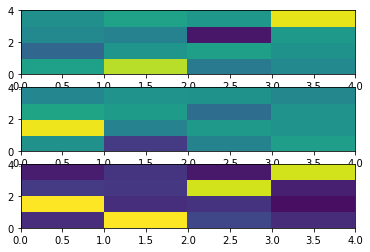

In [57]:
values, vectors = np.linalg.eigh(tomography_cnot.datasets['reconstruction'].data)
figs, axes = plt.subplots(3,1)
axes[0].pcolormesh(np.real(np.reshape(vectors[:,-1]*2, (4,4))), vmin=-1, vmax=1)
axes[1].pcolormesh(np.imag(np.reshape(vectors[:,-1]*2, (4,4))), vmin=-1, vmax=1)
axes[2].pcolormesh(np.abs(np.reshape(vectors[:,-1]*2, (4,4))), vmin=0, vmax=1)
np.max(values)/4

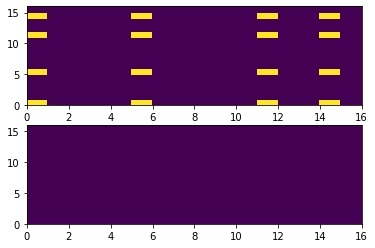

In [41]:
q1_angle = 0
q2_angle = 0
U_iswap = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
U_angles = np.asarray([[1, 0, 0, 0], 
                       [0, np.exp(1j*q1_angle), 0, 0], 
                       [0, 0, np.exp(1j*q2_angle), 0], 
                       [0, 0, 0, np.exp(1j*(q1_angle+q2_angle))]])
#X_iswap = np.reshape(np.transpose(np.reshape(np.kron(U_iswap@U_angles, np.conj(U_iswap@U_angles)), (4,4,4,4)),(0,2,1,3)), (16,16))
X_iswap = np.reshape(U_iswap@U_angles, (-1, 1))*np.reshape(np.conj(U_iswap@U_angles), (-1,))
figs, axes = plt.subplots(2,1)
axes[0].pcolormesh(np.real(X_iswap))
axes[1].pcolormesh(np.imag(X_iswap))

In [7]:
from qsweepy.qubit_calibrations import state_tomography
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(state_tomography)
qubit_ids = ['1', '3']
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq(iswap.get_pulse_sequence(0))

tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_iswap')

Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000713-two_photon_parametric_iSWAP_calibration-1906-002_4_down
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: process : 720
reference: process : 720
reference: fit_source : 749
reference: fit_source : 751
reference: channel_amplitudes : 708
reference: Rabi_rect : 713
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000708-channel_amplitudes-1906-002_4_down
reference: frequency_controls : 113
reference: channel_calibration : 140
reference: 

first_point:  196200 last_point:  196232 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3368 pre_delay 196032 pre_delay_reg 24504
first_point:  196200 last_point:  196232 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3368 pre_delay 196032 pre_delay_reg 24504
first_point:  196168 last_point:  196232 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3368 pre_delay 196032 pre_delay_reg 24504
first_point:  196200 last_point:  196232 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3368 pre_delay 196032 pre_delay_reg 24504
first_point:  196200 last_point:  196232 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196200 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196168 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196136 last_point:  196168 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3432 pre_delay 195968 pre_delay_reg 24496
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196168 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196136 last_point:  196168 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3432 pre_delay 195968 pre_delay_reg 24496
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196168 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3008 pre_delay 195992 pre_delay_reg 24499
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2976 pre_delay 196424 pre_delay_reg 24553
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196168 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196168 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3008 pre_delay 195992 pre_delay_reg 24499
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196584 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196168 last_point:  196200 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3400 pre_delay 196000 pre_delay_reg 24500
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196168 last_point:  196592 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3008 pre_delay 195992 pre_delay_reg 24499
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196136 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  6.7348e+00  5.7184e+00  2e+03  6e-01  4e+01  5e-03
 2:  9.5289e+00  9.0616e+00  4e+02  3e-01  2e+01  3e-03
 3:  1.1598e+01  1.1300e+01  2e+02  2e-01  1e+01  2e-03
 4:  1.5944e+01  1.5772e+01  1e+02  1e-01  6e+00  1e-03
 5:  2.4549e+01  2.4474e+01  5e+01  5e-02  3e+00  2e-03
 6:  2.7035e+01  2.6977e+01  4e+01  4e-02  2e+00  3e-03
 7:  3.0694e+01  3.0676e+01  1e+01  1e-02  7e-01  9e-04
 8:  3.1042e+01  3.1028e+01  1e+01  9e-03  6e-01  1e-03
 9:  3.2045e+01  3.2040e+01  4e+00  3e-03  2e-01  3e-04
10:  3.2179e+01  3.2176e+01  3e+00  2e-03  1e-01  3e-04
11:  3.2472e+01  3.2471e+01  6e-01  5e-04  3e-02  7e-05
12:  3.2531e+01  3.2531e+01  2e-01  2e-04  1e-02  3e-05
13:  3.2559e+01  3.2559e+01  5e-02  4e-05  2e-03  6e-06
14:  3.2566e+01  3.2566e+01  7e-03  6e-06  4e-04  1e-06
15:  3.2567e+01  3.2567e+01  7e-04  6e-07  3e-05  1e-07
16:  3.2567e+01  3.2567e+01  6e-05  6e-08  3e-06  

+Y+X-X+Y-P3
+Y+X-X-Z-P0
+Y+X-X-Z-P1
+Y+X-X-Z-P2
+Y+X-X-Z-P3
+Y+X-X-X-P0
+Y+X-X-X-P1
+Y+X-X-X-P2
+Y+X-X-X-P3
+Y+X-X-Y-P0
+Y+X-X-Y-P1
+Y+X-X-Y-P2
+Y+X-X-Y-P3
+Y+X-Y+Z-P0
+Y+X-Y+Z-P1
+Y+X-Y+Z-P2
+Y+X-Y+Z-P3
+Y+X-Y+X-P0
+Y+X-Y+X-P1
+Y+X-Y+X-P2
+Y+X-Y+X-P3
+Y+X-Y+Y-P0
+Y+X-Y+Y-P1
+Y+X-Y+Y-P2
+Y+X-Y+Y-P3
+Y+X-Y-Z-P0
+Y+X-Y-Z-P1
+Y+X-Y-Z-P2
+Y+X-Y-Z-P3
+Y+X-Y-X-P0
+Y+X-Y-X-P1
+Y+X-Y-X-P2
+Y+X-Y-X-P3
+Y+X-Y-Y-P0
+Y+X-Y-Y-P1
+Y+X-Y-Y-P2
+Y+X-Y-Y-P3
+Y+Y+Z+Z-P0
+Y+Y+Z+Z-P1
+Y+Y+Z+Z-P2
+Y+Y+Z+Z-P3
+Y+Y+Z+X-P0
+Y+Y+Z+X-P1
+Y+Y+Z+X-P2
+Y+Y+Z+X-P3
+Y+Y+Z+Y-P0
+Y+Y+Z+Y-P1
+Y+Y+Z+Y-P2
+Y+Y+Z+Y-P3
+Y+Y+Z-Z-P0
+Y+Y+Z-Z-P1
+Y+Y+Z-Z-P2
+Y+Y+Z-Z-P3
+Y+Y+Z-X-P0
+Y+Y+Z-X-P1
+Y+Y+Z-X-P2
+Y+Y+Z-X-P3
+Y+Y+Z-Y-P0
+Y+Y+Z-Y-P1
+Y+Y+Z-Y-P2
+Y+Y+Z-Y-P3
+Y+Y+X+Z-P0
+Y+Y+X+Z-P1
+Y+Y+X+Z-P2
+Y+Y+X+Z-P3
+Y+Y+X+X-P0
+Y+Y+X+X-P1
+Y+Y+X+X-P2
+Y+Y+X+X-P3
+Y+Y+X+Y-P0
+Y+Y+X+Y-P1
+Y+Y+X+Y-P2
+Y+Y+X+Y-P3
+Y+Y+X-Z-P0
+Y+Y+X-Z-P1
+Y+Y+X-Z-P2
+Y+Y+X-Z-P3
+Y+Y+X-X-P0
+Y+Y+X-X-P1
+Y+Y+X-X-P2
+Y+Y+X-X-P3
+Y+Y+X-Y-P0
+Y+Y+X-Y-P1
+Y+Y

-X+Z+Z-Y-P3
-X+Z+X+Z-P0
-X+Z+X+Z-P1
-X+Z+X+Z-P2
-X+Z+X+Z-P3
-X+Z+X+X-P0
-X+Z+X+X-P1
-X+Z+X+X-P2
-X+Z+X+X-P3
-X+Z+X+Y-P0
-X+Z+X+Y-P1
-X+Z+X+Y-P2
-X+Z+X+Y-P3
-X+Z+X-Z-P0
-X+Z+X-Z-P1
-X+Z+X-Z-P2
-X+Z+X-Z-P3
-X+Z+X-X-P0
-X+Z+X-X-P1
-X+Z+X-X-P2
-X+Z+X-X-P3
-X+Z+X-Y-P0
-X+Z+X-Y-P1
-X+Z+X-Y-P2
-X+Z+X-Y-P3
-X+Z+Y+Z-P0
-X+Z+Y+Z-P1
-X+Z+Y+Z-P2
-X+Z+Y+Z-P3
-X+Z+Y+X-P0
-X+Z+Y+X-P1
-X+Z+Y+X-P2
-X+Z+Y+X-P3
-X+Z+Y+Y-P0
-X+Z+Y+Y-P1
-X+Z+Y+Y-P2
-X+Z+Y+Y-P3
-X+Z+Y-Z-P0
-X+Z+Y-Z-P1
-X+Z+Y-Z-P2
-X+Z+Y-Z-P3
-X+Z+Y-X-P0
-X+Z+Y-X-P1
-X+Z+Y-X-P2
-X+Z+Y-X-P3
-X+Z+Y-Y-P0
-X+Z+Y-Y-P1
-X+Z+Y-Y-P2
-X+Z+Y-Y-P3
-X+Z-Z+Z-P0
-X+Z-Z+Z-P1
-X+Z-Z+Z-P2
-X+Z-Z+Z-P3
-X+Z-Z+X-P0
-X+Z-Z+X-P1
-X+Z-Z+X-P2
-X+Z-Z+X-P3
-X+Z-Z+Y-P0
-X+Z-Z+Y-P1
-X+Z-Z+Y-P2
-X+Z-Z+Y-P3
-X+Z-Z-Z-P0
-X+Z-Z-Z-P1
-X+Z-Z-Z-P2
-X+Z-Z-Z-P3
-X+Z-Z-X-P0
-X+Z-Z-X-P1
-X+Z-Z-X-P2
-X+Z-Z-X-P3
-X+Z-Z-Y-P0
-X+Z-Z-Y-P1
-X+Z-Z-Y-P2
-X+Z-Z-Y-P3
-X+Z-X+Z-P0
-X+Z-X+Z-P1
-X+Z-X+Z-P2
-X+Z-X+Z-P3
-X+Z-X+X-P0
-X+Z-X+X-P1
-X+Z-X+X-P2
-X+Z-X+X-P3
-X+Z-X+Y-P0
-X+Z-X+Y-P1
-X+Z

-Y-Y-Y-Z-P0
-Y-Y-Y-Z-P1
-Y-Y-Y-Z-P2
-Y-Y-Y-Z-P3
-Y-Y-Y-X-P0
-Y-Y-Y-X-P1
-Y-Y-Y-X-P2
-Y-Y-Y-X-P3
-Y-Y-Y-Y-P0
-Y-Y-Y-Y-P1
-Y-Y-Y-Y-P2
-Y-Y-Y-Y-P3
measurement
reconstruction
load time:  0.10593461990356445
pre_trace_time:  0.0009987354278564453
trace 0 time:  0.04797077178955078
trace 1 time:  0.07495403289794922
trace 2 time:  0.10293698310852051
trace 3 time:  0.1289207935333252
trace 4 time:  0.15490484237670898


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [14]:
np.sum(tomography.datasets['reconstruction'].data*np.conj(X_iswap))/16

(0.8006389712219047+3.469446951953614e-18j)

In [113]:
vz_compensation_pulses = excitation_pulse.get_s(device, qubit_id='1', phase=q1_angle)+\
excitation_pulse.get_s(device, qubit_id='3', phase=q2_angle)

from qsweepy.qubit_calibrations import state_tomography
from qsweepy.qubit_calibrations import parametric_two_qubit_gate
reload(parametric_two_qubit_gate)
reload(state_tomography)
qubit_ids = ['1', '3']
iswap = parametric_two_qubit_gate.get_gate_calibration(device, device.get_two_qubit_gates()['iSWAP(1,3)'])
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq(iswap.get_pulse_sequence(0)+vz_compensation_pulses+[device.pg.pmulti(100e-9)])

tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_iswap_compensated_inverse')

reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 345
reference: gauss_hd_Rabi_amplitude_adaptive : 532
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000345-channel_amplitudes-1906-002_4_down
Requested:  metadata: {'coil_f13_2': '0.82'} references: {}
Obtained:  metadata: {'coil_f13_2': '0.82'} references: {}
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-14\000714-fit_dataset_1d-1906-002_4_down
Exdir_db.select_measurement_

D:\qtlab_replacement\qsweepy\instrument_drivers\HDAWG_1808_new.py:607: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  196128 last_point:  196552 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 3048 pre_delay 195952 pre_delay_reg 24494
first_point:  196104 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196096 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3464 pre_delay 195936 pre_delay_reg 24492
first_point:  196064 last_point:  196136 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2944 pre_delay 196056 pre_delay_reg 24507
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 600 nop 199600 post_delay 2976 pre_delay 196024 pre_delay_reg 24503
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ

first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196064 last_point:  196104 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 3496 pre_delay 195904 pre_delay_reg 24488
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196064 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marker

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2944 pre_delay 196456 pre_delay_reg 24557
first_point:  196032 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mark

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196616 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196000 last_point:  196624 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2976 pre_delay 194624 pre_delay_reg 24328
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 2944 pre_delay 194656 pre_delay_reg 24332
first_point:  196032 last_point:  196656 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 mar

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:661: RuntimeWarning:

overflow encountered in long_scalars

C:\ProgramData\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:662: RuntimeWarning:

overflow encountered in long_scalars



     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  7e+03  1e+00  7e+01  1e+00
 1:  7.8358e+00  6.8184e+00  2e+03  7e-01  4e+01  5e-03
 2:  1.1212e+01  1.0749e+01  4e+02  3e-01  2e+01  3e-03
 3:  1.4176e+01  1.3893e+01  2e+02  2e-01  1e+01  2e-03
 4:  2.0994e+01  2.0847e+01  1e+02  1e-01  5e+00  1e-03
 5:  2.8660e+01  2.8556e+01  8e+01  7e-02  4e+00  3e-03
 6:  3.4287e+01  3.4240e+01  4e+01  3e-02  2e+00  2e-03
 7:  3.6491e+01  3.6456e+01  3e+01  2e-02  1e+00  2e-03
 8:  3.9057e+01  3.9046e+01  9e+00  8e-03  4e-01  7e-04
 9:  3.9093e+01  3.9082e+01  9e+00  7e-03  4e-01  9e-04
10:  4.0201e+01  4.0199e+01  1e+00  1e-03  6e-02  1e-04
11:  4.0256e+01  4.0255e+01  1e+00  8e-04  4e-02  1e-04
12:  4.0404e+01  4.0404e+01  7e-02  6e-05  3e-03  7e-06
13:  4.0412e+01  4.0412e+01  2e-02  1e-05  8e-04  2e-06
14:  4.0415e+01  4.0415e+01  2e-03  2e-06  1e-04  3e-07
15:  4.0415e+01  4.0415e+01  6e-04  5e-07  3e-05  8e-08
16:  4.0415e+01  4.0415e+01  1e-04  9e-08  5e-06  

+Y+X+X+Z-P1
+Y+X+X+Z-P2
+Y+X+X+Z-P3
+Y+X+X+X-P0
+Y+X+X+X-P1
+Y+X+X+X-P2
+Y+X+X+X-P3
+Y+X+X+Y-P0
+Y+X+X+Y-P1
+Y+X+X+Y-P2
+Y+X+X+Y-P3
+Y+X+X-Z-P0
+Y+X+X-Z-P1
+Y+X+X-Z-P2
+Y+X+X-Z-P3
+Y+X+X-X-P0
+Y+X+X-X-P1
+Y+X+X-X-P2
+Y+X+X-X-P3
+Y+X+X-Y-P0
+Y+X+X-Y-P1
+Y+X+X-Y-P2
+Y+X+X-Y-P3
+Y+X+Y+Z-P0
+Y+X+Y+Z-P1
+Y+X+Y+Z-P2
+Y+X+Y+Z-P3
+Y+X+Y+X-P0
+Y+X+Y+X-P1
+Y+X+Y+X-P2
+Y+X+Y+X-P3
+Y+X+Y+Y-P0
+Y+X+Y+Y-P1
+Y+X+Y+Y-P2
+Y+X+Y+Y-P3
+Y+X+Y-Z-P0
+Y+X+Y-Z-P1
+Y+X+Y-Z-P2
+Y+X+Y-Z-P3
+Y+X+Y-X-P0
+Y+X+Y-X-P1
+Y+X+Y-X-P2
+Y+X+Y-X-P3
+Y+X+Y-Y-P0
+Y+X+Y-Y-P1
+Y+X+Y-Y-P2
+Y+X+Y-Y-P3
+Y+X-Z+Z-P0
+Y+X-Z+Z-P1
+Y+X-Z+Z-P2
+Y+X-Z+Z-P3
+Y+X-Z+X-P0
+Y+X-Z+X-P1
+Y+X-Z+X-P2
+Y+X-Z+X-P3
+Y+X-Z+Y-P0
+Y+X-Z+Y-P1
+Y+X-Z+Y-P2
+Y+X-Z+Y-P3
+Y+X-Z-Z-P0
+Y+X-Z-Z-P1
+Y+X-Z-Z-P2
+Y+X-Z-Z-P3
+Y+X-Z-X-P0
+Y+X-Z-X-P1
+Y+X-Z-X-P2
+Y+X-Z-X-P3
+Y+X-Z-Y-P0
+Y+X-Z-Y-P1
+Y+X-Z-Y-P2
+Y+X-Z-Y-P3
+Y+X-X+Z-P0
+Y+X-X+Z-P1
+Y+X-X+Z-P2
+Y+X-X+Z-P3
+Y+X-X+X-P0
+Y+X-X+X-P1
+Y+X-X+X-P2
+Y+X-X+X-P3
+Y+X-X+Y-P0
+Y+X-X+Y-P1
+Y+X-X+Y-P2
+Y+X-X+Y-P3
+Y+X

-Z-Y-Y-Y-P0
-Z-Y-Y-Y-P1
-Z-Y-Y-Y-P2
-Z-Y-Y-Y-P3
-X+Z+Z+Z-P0
-X+Z+Z+Z-P1
-X+Z+Z+Z-P2
-X+Z+Z+Z-P3
-X+Z+Z+X-P0
-X+Z+Z+X-P1
-X+Z+Z+X-P2
-X+Z+Z+X-P3
-X+Z+Z+Y-P0
-X+Z+Z+Y-P1
-X+Z+Z+Y-P2
-X+Z+Z+Y-P3
-X+Z+Z-Z-P0
-X+Z+Z-Z-P1
-X+Z+Z-Z-P2
-X+Z+Z-Z-P3
-X+Z+Z-X-P0
-X+Z+Z-X-P1
-X+Z+Z-X-P2
-X+Z+Z-X-P3
-X+Z+Z-Y-P0
-X+Z+Z-Y-P1
-X+Z+Z-Y-P2
-X+Z+Z-Y-P3
-X+Z+X+Z-P0
-X+Z+X+Z-P1
-X+Z+X+Z-P2
-X+Z+X+Z-P3
-X+Z+X+X-P0
-X+Z+X+X-P1
-X+Z+X+X-P2
-X+Z+X+X-P3
-X+Z+X+Y-P0
-X+Z+X+Y-P1
-X+Z+X+Y-P2
-X+Z+X+Y-P3
-X+Z+X-Z-P0
-X+Z+X-Z-P1
-X+Z+X-Z-P2
-X+Z+X-Z-P3
-X+Z+X-X-P0
-X+Z+X-X-P1
-X+Z+X-X-P2
-X+Z+X-X-P3
-X+Z+X-Y-P0
-X+Z+X-Y-P1
-X+Z+X-Y-P2
-X+Z+X-Y-P3
-X+Z+Y+Z-P0
-X+Z+Y+Z-P1
-X+Z+Y+Z-P2
-X+Z+Y+Z-P3
-X+Z+Y+X-P0
-X+Z+Y+X-P1
-X+Z+Y+X-P2
-X+Z+Y+X-P3
-X+Z+Y+Y-P0
-X+Z+Y+Y-P1
-X+Z+Y+Y-P2
-X+Z+Y+Y-P3
-X+Z+Y-Z-P0
-X+Z+Y-Z-P1
-X+Z+Y-Z-P2
-X+Z+Y-Z-P3
-X+Z+Y-X-P0
-X+Z+Y-X-P1
-X+Z+Y-X-P2
-X+Z+Y-X-P3
-X+Z+Y-Y-P0
-X+Z+Y-Y-P1
-X+Z+Y-Y-P2
-X+Z+Y-Y-P3
-X+Z-Z+Z-P0
-X+Z-Z+Z-P1
-X+Z-Z+Z-P2
-X+Z-Z+Z-P3
-X+Z-Z+X-P0
-X+Z-Z+X-P1
-X+Z-Z+X-P2
-X+Z

load time:  0.1069340705871582
pre_trace_time:  0.0019989013671875
trace 0 time:  0.04996967315673828
trace 1 time:  0.07695579528808594
trace 2 time:  0.10493707656860352
trace 3 time:  0.13192033767700195
trace 4 time:  0.15790462493896484


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\memmap.py:331: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning:

Casting complex values to real discards the imaginary part



0.7839151521124441 1953 (38, 15)
4.775220833456486 1.884955592153876


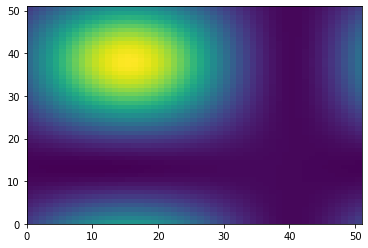

In [15]:
U_iswap = [[1, 0, 0, 0], [0, 0, 1j, 0], [0, 1j, 0, 0], [0, 0, 0, 1]]
fidelities = np.zeros((51,51))
for q1_id, q1_angle in enumerate(np.linspace(0, 2*np.pi, 51)):
    for q2_id, q2_angle in enumerate(np.linspace(0, 2*np.pi, 51)):
        U_angles = np.asarray([[1, 0, 0, 0], 
                               [0, np.exp(1j*q1_angle), 0, 0], 
                               [0, 0, np.exp(1j*q2_angle), 0], 
                               [0, 0, 0, np.exp(1j*(q1_angle+q2_angle))]])
#plt.pcolormesh((np.real(np.tensordot(np.asarray(U_iswap).ravel(), np.conj(np.asarray(U_iswap)).ravel()))))
        X_iswap = np.reshape(np.transpose(np.reshape(np.kron(U_iswap@U_angles, np.conj(U_iswap@U_angles)), (4,4,4,4)),(0,2,1,3)), (16,16))
#figs, axes = plt.subplots(2,1)
#axes[0].pcolormesh(np.real(X_iswap))
#axes[1].pcolormesh(np.imag(X_iswap))
        fidelity = np.sum(X_iswap*np.conj(tomography.datasets['reconstruction'].data))/16
        fidelities[q1_id, q2_id] =fidelity
print (np.max(fidelities.ravel()), 
       np.argmax(fidelities.ravel()), 
       np.unravel_index(np.argmax(fidelities.ravel()), fidelities.shape))
q1_angle = np.linspace(0, 2*np.pi, 51)[np.unravel_index(np.argmax(fidelities.ravel()), fidelities.shape)[0]]
q2_angle = np.linspace(0, 2*np.pi, 51)[np.unravel_index(np.argmax(fidelities.ravel()), fidelities.shape)[1]]
print (q1_angle, q2_angle)
plt.pcolormesh(np.real(fidelities))

(array([ 0.05963048+0.00441459j,  0.03167051+0.00587463j,
        -0.06526532-0.12528449j,  0.11570335-0.07486403j,
         0.00553962+0.01073033j, -0.02504412-0.05668975j,
         0.09169304+0.31728776j, -0.24149892-0.11505781j,
         0.37985674-0.09985282j, -0.02625337-0.08068906j,
        -0.25869297+0.00035187j, -0.45643697-0.21693117j,
        -0.07219275-0.09407795j,  0.09628519-0.0938921j ,
         0.06295884-0.0191949j ,  0.47194233+0.16977943j]), 3.1666822615095462)

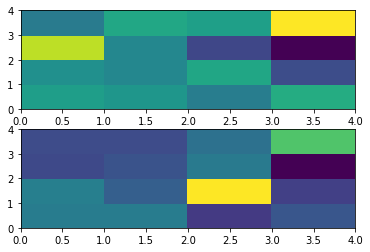

In [20]:
values, vectors = np.linalg.eigh(tomography.datasets['reconstruction'].data)
fig, axes = plt.subplots(2,1)
axes[0].pcolormesh(np.reshape(np.real(vectors[-1]), (4,4)))
axes[1].pcolormesh(np.reshape(np.imag(vectors[-1]), (4,4)))
vectors[-1], values[-1]

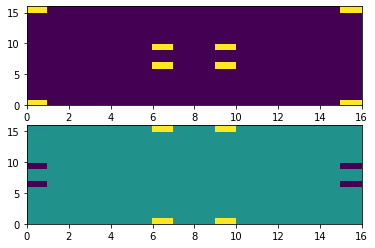

In [10]:
q1_angle = np.pi
q2_angle = np.pi
U_iswap = [[1, 0, 0, 0], [0, 0, 1j, 0], [0, 1j, 0, 0], [0, 0, 0, 1]]
U_angles = np.asarray([[1, 0, 0, 0], 
                       [0, np.exp(1j*q1_angle), 0, 0], 
                       [0, 0, np.exp(1j*q2_angle), 0], 
                       [0, 0, 0, np.exp(1j*(q1_angle+q2_angle))]])
X_iswap = np.reshape(np.transpose(np.reshape(np.kron(U_iswap@U_angles, np.conj(U_iswap@U_angles)), (4,4,4,4)),(0,2,1,3)), (16,16))
figs, axes = plt.subplots(2,1)
axes[0].pcolormesh(np.real(X_iswap))
axes[1].pcolormesh(np.imag(X_iswap))

In [74]:
np.unravel_index?

In [20]:
from qsweepy.qubit_calibrations import state_tomography
reload(state_tomography)
qubit_ids = ['1']
process_tomography_inst = state_tomography.ProcessTomography(device, qubit_ids, pause_length=50e-9)
process_tomography_inst.set_prepare_seq([])
tomography = sweeper.sweep(process_tomography_inst, measurement_type='process_tomography_identity')

reference: frequency_controls : 113
reference: channel_calibration : 140
reference: fidelity_scan : 594
reference: ('readout_pulse', '1') : 596
reference: readout_pulse : 597
reference: delay_calibration : 142
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 504
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: ('excitation_pulse', '1') : 534
reference: readout_pulse : 597
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: gauss_hd_Rabi_amplitude_adaptive : 523
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  d:\data\2019-08-13\000351-channel_amplitudes-1906-002_4_down
reference: channel_amplitudes : 351
reference: 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



first_point:  197000 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  197000 last_point:  198600 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 2000 nop 199600 post_delay 1000 pre_delay 196600 pre_delay_reg 24575
first_point:  196712 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196712 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 markerQ length 199600 wave_length 200 nop 199600 post_delay 2848 pre_delay 196552 pre_delay_reg 24569
first_point:  196712 last_point:  196752 waveformI length (199600,) waveformQ length (199600,) markerI length 199600 marke

TypeError: 'NoneType' object is not iterable

In [43]:
def process_matrix(process, process_type='chi', plot=False, plot_name=''):
    import numpy as np
    import itertools
    operators_1Q = { 'I': np.matrix([[1,0],[0,1]]),
                     'X': np.matrix([[0,1],[1,0]]),
                     'Y': np.matrix([[0,-1j],[1j,0]]),
                     'Z': np.matrix([[1,0],[0,-1]])}
    operators_2Q=dict()
    for i,j in operators_1Q.items():
        for k,l in operators_1Q.items():
            operators_2Q[i+k]=np.kron(j,l)
    if process_type=='chi':
        process_tensor = np.reshape(process, (4,4,4,4))
    matrix={}
    for ind1,op1 in operators_2Q.items():
        for ind2,op2 in operators_2Q.items():
            if process_type=='chi':
                matrix[ind1,ind2]=0.25*np.einsum('ijkl,ij,kl->', process_tensor, op1, op2)
            else:
                matrix[ind1,ind2]=(0.25*np.trace(op1@process@op2@np.conj(process.T)))
                
    basis = ['I','X','Y','Z']
    double_basis = [i+j for i,j in itertools.product(basis, basis)]
    double_basis
    matrix_np = np.zeros((16,16))
    for i,f in itertools.product(double_basis, double_basis):
        i_id = double_basis.index(i)
        f_id = double_basis.index(f)
        matrix_np[i_id, f_id] = matrix[(i,f)]
    if plot:
        plt.figure()
        plt.pcolormesh(np.rot90(matrix_np),cmap='RdBu',vmax=1,vmin=-1)
        plt.xticks(np.arange(len(double_basis))+0.5,double_basis)
        plt.yticks(np.arange(len(double_basis))+0.5,double_basis[::-1])
        plt.colorbar()
        plt.grid()
        fig = plt.gcf()
        fig.canvas.set_window_title('Pauli transfer matrix '+plot_name)
    return matrix_np

In [32]:
chi = np.transpose(np.reshape(tomography.datasets['reconstruction'].data, (4,4,4,4)), (0, 3, 1, 2))
process_matrix(chi, plot=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: ComplexWarning:

Casting complex values to real discards the imaginary part



array([[ 5.05136028e-01, -5.29652659e-02, -4.60033543e-02,
         3.83556476e-01,  2.93946468e-03,  7.67843477e-02,
         2.28219364e-03, -1.04680350e-02, -3.10673205e-02,
        -5.76058246e-02,  9.98113071e-02,  3.81951306e-02,
         4.19551176e-01, -4.13012404e-02, -2.31722119e-02,
         9.15894391e-02],
       [-5.29652659e-02,  4.31865352e-02,  2.46398563e-01,
        -3.08522224e-02,  3.73369501e-02,  2.44303759e-02,
        -2.41788626e-02,  1.39394092e-01,  9.07498918e-02,
         1.53523447e-02,  2.05994912e-02,  2.73350755e-01,
         1.38465466e-03,  1.65802634e-02,  1.38569555e-01,
        -1.03862482e-02],
       [ 4.60033543e-02, -2.46398563e-01, -1.81260434e-01,
         2.44985499e-02, -1.58220532e-01, -2.44979328e-02,
         2.28287613e-02, -2.83259500e-01, -1.43864267e-02,
        -1.88820988e-02, -2.41130565e-02,  1.40999725e-01,
         1.40171768e-02, -1.39021620e-01, -1.73468685e-01,
         1.93522404e-02],
       [ 3.83556476e-01, -3.08522224e

## ZZ-crosstalk calibration

In [ ]:
Ramsey.calibrate_all_crosstalks(device)

## Cross-channel Ramsey

In [ ]:
cross_ramsey_data = Ramsey.calibrate_all_cross_Ramsey(device)

In [ ]:
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, device.get_qubit_list())
confusion_matrix = calibrated_readout.calibrate_preparation_and_readout_confusion(device, qubit_readout_pulse, readout_device)

In [ ]:
confusion_matrix.datasets['resultnumbers'].parameters

# Default settings

In [67]:
two_qubit_gates = {
    'iSWAP(1,3)':{'q1':'1',
                  'q2':'3',
                  'logic_type':'iSWAP',
                  'physical_type':'two_photon_parametric_iSWAP',
                  'pulse_type':'parametric',
                  'control':'coil',
                  'transition_q1':'01',
                  'transition_q2':'01',
                  'carrier_harmonic':0.5,
                  'carrier_name':'coil_f13_2',
                  'tail_length':40e-9,
                  'amplitude':0.795,
                  'rotation_angle':np.pi}}
device.set_two_qubit_gates_from_dict(two_qubit_gates)

## qubit settings

In [7]:
qubits = {
          '1':{'r':{'Fr': 6.403e9, # qubit readout frequency
                    'P':-25, # 
                    'iq_devices':{'iq_ro_q1': 'iq_ro'}}, # channel name : device name
               'q': {'iq_devices':{'iq_ex1_q1': 'iq_ex1', 
                                   #'iq_ex2_q3': 'iq_ex2', 
                                   #'iq_ex3_q1': 'iq_ex3'
                                  },
                     'F': 
                    {'F01_min': 3.620375e9}},                     
               'main_iq_device': 'iq_ex1_q1'},
          '3':{'r':{'Fr': 6.2106e9, 
                    'P':-25, 
                    'iq_devices':{'iq_ro_q3': 'iq_ro'}},
               'q': {'iq_devices':{#'iq_ex1_q3': 'iq_ex1', 
                                   #'iq_ex2_q3': 'iq_ex2', 
                                   'iq_ex3_q3': 'iq_ex3'
                                  },
                     'F': {'F01_min': 3.451295e9},},   
               'main_iq_device': 'iq_ex3_q3'},
}

    
reload(qubit_device)
reload(exdir_db)
reload(database)
reload(sweep_extras)


# setting pony 
db = database.MyDatabase()
sweeper = sweep_extras.Sweeper(db, sample_name=sample_name)
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)
device = qubit_device.qubit_device(exdir_db_inst, sweeper, controls={'coil':hardware.coil})
device.set_frequency_controls(qubit_id='1', controls=['coil'])
device.set_frequency_controls(qubit_id='3', controls=['coil'])
device.set_qubits_from_dict(qubits)

 <class 'AssertionError'>
 <class 'AssertionError'>


## sample globals (scan ranges etc.)

In [52]:
sample_globals={
            'readout_passthrough_points':21,
            'readout_passthrough_amplitude':1.0,
    'readout_length': 1.7e-6,
    'readout_background_nums': 10000,
    'Rabi_rect_length': 400e-9,
    'Rabi_rect_step': 2e-9,
    'Ramsey_length': 10e-6,
    'Ramsey_step': 100e-9,
    'adaptive_Rabi_min_step':1e-9,
    'adaptive_Rabi_scan_points': 100,
    'adaptive_Rabi_range':10,
    'adaptive_Rabi_max_scan_length':20e-6,
    'adaptive_Ramsey_max_scan_length':100e-6,
    'adaptive_Ramsey_points_per_oscillation':10,
    'frequency_rounding':5e3,
    'amplitude_default':1.0,
    'cross_Ramsey_initial_delay':0e-9, ## fix the fitter!!
    'max_parasitic_Rabi_ratio': 0.1, ## maximum Ω_R/Δ for non-target qubits that is 
                ## used to choose the excitation amplitude for the target qubit
    'max_Rabi_freq': 50e9, ## maximum Rabi frequency for target qubit
    'pulse_length_alignment': 32e-9,
    'sigmas_in_gauss': 4,
    'adaptive_Rabi_amplitude_scan_points': 20,
    'adaptive_Rabi_amplitude_range':2,
    'delay_calibration_sequence_length': 10000,
    'uncalibrated_readout_nums': 50000,
    'calibrated_readout_nums': 10000,
    'delay_calibration_nums': 200,
    'delay_calibration_nop': 32768,
    'readout_adc_points': 2048,
    'process_phase_scan_points': 50,
    'two_qubit_pulse_post_pause': 100e-9,
    'parametric_frequency_shift_calibration_frequency_offset': 5e6,
}

reload(exdir_db)
reload(database)
reload(sweep_extras)
db = database.MyDatabase()
sweeper = sweep_extras.Sweeper(db, sample_name=sample_name)
exdir_db_inst = exdir_db.Exdir_db(db=db, sample_name=sample_name)
device = qubit_device.qubit_device(exdir_db_inst, sweeper)
device.set_sample_globals(sample_globals)

sample_name

'1906-002_4_down'

# Shamil's little playground

In [ ]:
### SHAMIL'S LITTLE PLAYGROUND
data_records = list(device.exdir_db.select_measurements_db(measurement_type="qubit_readout_channel_list",
                                                           metadata={"qubit_id":'1'}).limit(5))
record_idx = 0
data_record = data_records[record_idx]
metadata = list(data_record.metadata)
ref_this = list(data_record.reference_one)
ref_that = list(data_record.reference_two)
display(data_record.measurement_type,
        data_record.filename,
        metadata,
        ref_this,
        ref_that)
metadata[0]

In [93]:
# 8348 - unit process tomography
# 8376 - also unit process tomography but with strange matrix
# 8374 - iswap process tomography

import pickle as pkl
import os

for uid in [8348,8376,8374]:
    data = device.exdir_db.select_measurement_by_id(uid)
    with open(os.path.join(r"C:\Users\cryopxi\Downloads\exchange temp",
                           str(uid) + ".pkl"),"wb") as pkl_file:
        for key in data.datasets.keys():
            custom_dict[key] = np.array(data.datasets[key].data)
            print(custom_dict[key].shape)
        pkl.dump(custom_dict, pkl_file)

Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-07-30\008348-process_tomography_identity-1906-001_1_down
(6, 6, 6, 6, 4)
(16, 16)
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-07-30\008376-process_tomography_identity-1906-001_1_down
(6, 6, 2)
(4, 4)
Exdir_db.select_measurement_by_id: trying to load measurement state by id:  c:\data\2019-07-30\008374-process_tomography_iswap-1906-001_1_down
(6, 6, 6, 6, 4)
(16, 16)


In [ ]:
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, ['1'])

# Импульсы

### Загружаем импульсные скрипты всякие

### Калибровка миксеров

In [ ]:
from qsweepy.qubit_calibrations import excitation_pulse
from qsweepy.qubit_calibrations import readout_pulse
from qsweepy.qubit_calibrations import channel_amplitudes
from qsweepy.qubit_calibrations import Rabi
from qsweepy.qubit_calibrations import Ramsey
imp.reload(Ramsey)
from qsweepy.fitters import exp_sin
from qsweepy.fitters import fit_dataset
imp.reload(fit_dataset)
imp.reload(exp_sin)
imp.reload(excitation_pulse)
imp.reload(readout_pulse)
imp.reload(Rabi)
#Rabi.Rabi_rect_adaptive(device, '1', channel_amplitudes.channel_amplitudes(device, iq_ex1_q1=1.0))
#Rabi.Rabi_rect_adaptive(device, '1', channel_amplitudes.channel_amplitudes(device, iq_ex3_q1=1.0))
#Rabi.Rabi_rect_adaptive(device, '3', channel_amplitudes.channel_amplitudes(device, iq_ex1_q3=1.0))
#Rabi.Rabi_rect_adaptive(device, '3', channel_amplitudes.channel_amplitudes(device, iq_ex3_q3=1.0))
Rabi.calibrate_all_single_channel_Rabi(device)

In [ ]:
from qsweepy.qubit_calibrations import excitation_pulse
from qsweepy.qubit_calibrations import channel_amplitudes
imp.reload(excitation_pulse)
pi_half1_ch1 = excitation_pulse.get_excitation_pulse(device, 
                                                     '1', 
                                                     np.pi/2., 
    channel_amplitudes_override=channel_amplitudes.channel_amplitudes(device, iq_ex1_q1=1.0))

pi_half1_ch3 = excitation_pulse.get_excitation_pulse(device, 
                                                     '1', 
                                                     np.pi/2., 
    channel_amplitudes_override=channel_amplitudes.channel_amplitudes(device, iq_ex3_q1=1.0))

pi_half3_ch1 = excitation_pulse.get_excitation_pulse(device, 
                                                     '3', 
                                                     np.pi/2., 
    channel_amplitudes_override=channel_amplitudes.channel_amplitudes(device, iq_ex1_q3=1.0))

pi_half3_ch3 = excitation_pulse.get_excitation_pulse(device, 
                                                     '3', 
                                                     np.pi/2., 
    channel_amplitudes_override=channel_amplitudes.channel_amplitudes(device, iq_ex3_q3=1.0))

In [ ]:
from qsweepy.qubit_calibrations import Ramsey
from qsweepy.qubit_calibrations import channel_amplitudes
imp.reload(Ramsey)
Ramsey.Ramsey(device, 
              '1', 
              lengths=np.linspace(0, 10e-6, 100e-9), 
              target_freq_offset=1e6,
              channel_amplitudes1=channel_amplitudes.channel_amplitudes(device, iq_ex1_q1=1.0),
              channel_amplitudes2=channel_amplitudes.channel_amplitudes(device, iq_ex3_q1=1.0))

In [ ]:
Ramsey.Ramsey(device, 
              '3', 
              lengths=np.linspace(0, 10e-6, 100e-9), 
              target_freq_offset=1e6,
              channel_amplitudes1=channel_amplitudes.channel_amplitudes(device, iq_ex1_q3=1.0),
              channel_amplitudes2=channel_amplitudes.channel_amplitudes(device, iq_ex3_q3=1.0))

In [ ]:
pi_half1.metadata, pi_half3.metadata,

In [ ]:
pi_half1.get_pulse_sequence(phase=np.pi/2.)

In [ ]:
[(r.this, r.that, r.ref_type) for i in device.exdir_db.select_measurements_db(measurement_type='Rabi_rect') for r in i.reference_two if r.this.id==3142]

In [ ]:
device.exdir_db.select_measurement(measurement_type='Rabi_rect', references_this={'fit_source':3142})

### Настройка демодуляций на железке СашиКоли

In [ ]:
#from qsweepy.qubit_calibrations import readout_passthrough
from qsweepy.qubit_calibrations import readout_pulse
imp.reload(readout_pulse)
readout_pulse_q1 = readout_pulse.get_qubit_readout_pulse(device, '1')
measurer_q1 = readout_pulse.get_uncalibrated_measurer(device, '1', readout_pulse_q1)
readout_pulse_q3 = readout_pulse.get_qubit_readout_pulse(device, '3')
measurer_q3 = readout_pulse.get_uncalibrated_measurer(device, '3', readout_pulse_q3)
#readout_pulse.get_readout_background_calibration(device, readout_pulse.get_qubit_readout_pulse(device, '3'))
#device.get_qubit_readout_pulse('3')
#imp.reload(readout_passthrough)
#readout_amplitudes = np.linspace(0.00, 0.5, 21)

#readout_passthrough.readout_passthrough(amplitudes=readout_amplitudes, length= readout_length, device=device, qubit_id='1')

In [ ]:
from qsweepy.qubit_calibrations import Rabi
imp.reload(Rabi)
import qsweepy.fitters.exp_sin
import qsweepy.fitters.fit_dataset
imp.reload(qsweepy.fitters.exp_sin)
imp.reload(qsweepy.fitters.fit_dataset)
#Rabi.Rabi_rect(device, '1', 'iq_ex1_q1')
#lengths = np.linspace(0, 50e-9, 51)
amplitudes = Rabi.channel_amplitudes(device, iq_ex1_q1=1.0)
rabi_rect_meas_q1 = Rabi.Rabi_rect(device, '1', amplitudes)
amplitudes = Rabi.channel_amplitudes(device, iq_ex3_q3=1.0)
rabi_rect_meas_q3 = Rabi.Rabi_rect(device, '3', amplitudes)

In [ ]:
fit_loaded = save_exdir.load_exdir(rabi_rect_meas_q1.fit.filename, db=db)
fit_loaded.datasets['iq1'].data.shape, fit_loaded.datasets['iq1'].parameters[0].values.shape, fit_loaded.datasets['iq1'].parameters[1].values.shape

In [ ]:
from qsweepy.qubit_calibrations import Rabi
import qsweepy.fitters.exp_sin
imp.reload(qsweepy.fitters.exp_sin)
dataset = rabi_rect_meas_q1.datasets['iq1']
data = [np.real(rabi_rect_meas_q1.datasets['iq1'].data), np.imag(rabi_rect_meas_q1.datasets['iq1'].data)]
x_fit, y_fit, fitresults = qsweepy.fitters.exp_sin.exp_sin_fit(rabi_rect_meas_q1.datasets['iq1'].parameters[0].values, data)
fitresults
#imp.reload(Rabi)
#dataset, metadata = Rabi.fit_1d_fd(rabi_rect_meas_q1.datasets['iq1'])

In [ ]:
import qsweepy.fitters.exp_sin
import qsweepy.fitters.fit_dataset
imp.reload(qsweepy.fitters.exp_sin)
imp.reload(qsweepy.fitters.fit_dataset)


fit_measurement =  qsweepy.fitters.fit_dataset.fit_dataset(rabi_rect_meas_q1, 'iq1', qsweepy.fitters.exp_sin.exp_sin_fitter(), sweep_parameter_ids=[0])
#rabi_rect_meas_q1.update_fit(rabi_rect_meas_q1, None)
fit_measurement

In [ ]:
hardware.adc.get_nums()

In [ ]:
from matplotlib import pyplot as plt
%matplotlib qt5
plt.figure()
#plt.plot(dataset.parameters[0].values, dataset.data)
#plt.plot(rabi_rect_meas_q1.datasets['iq1'].parameters[0].values, rabi_rect_meas_q1.datasets['iq1'].data)
#plt.figure()
#plt.plot(dataset.parameters[0].values, np.imag(dataset.data))
#plt.plot(rabi_rect_meas_q1.datasets['iq1'].parameters[0].values, np.imag(rabi_rect_meas_q1.datasets['iq1'].data))
fit_x = rabi_rect_meas_q1.fit.datasets['iq1'].parameters[1].values
fit_y = rabi_rect_meas_q1.fit.datasets['iq1'].data[0,:]
plt.plot(rabi_rect_meas_q1.datasets['iq1'].parameters[1].values, np.real(rabi_rect_meas_q1.datasets['iq1'].data[0,:]))
plt.plot(fit_x, np.real(fit_y))

plt.figure()
plt.plot(rabi_rect_meas_q1.datasets['iq1'].parameters[1].values, np.imag(rabi_rect_meas_q1.datasets['iq1'].data[0,:]))
plt.plot(fit_x, np.imag(fit_y))

## Прохождение считывающих импульсов разной амплитуды

In [ ]:
#%%mprun -f sweep.sweep
imp.reload(sweep)
imp.reload(plotting)
for _qubit_id in ['1', '3']:
    #for coil_channel_id, channel_voltage in qubits[_qubit_id]['q']['P']['Fmin_coil_currents'].items():
    #    dac.set_voltage(channel_voltage, channel=nndac_channel_id)
    #    coil_device.set_offset(channel_voltage, channel=coil_channel_id)
    mean_sample = data_reduce.data_reduce(hardware.adc)
    #print (dir(mean_sample))
    #del mean_sample.measure_deferred_result
    mean_sample.filters['Mean_Voltage_AC'] = data_reduce.mean_reducer_noavg(hardware.adc, 'Voltage', 0)

    mean_sample.filters['S21p'] = data_reduce.mean_reducer_freq(hardware.adc, 'Voltage', 0, hardware.iq_devices['iq_ro'].carriers['iq_ro_q{}'.format(_qubit_id)].get_if())
    mean_sample.filters['S21m'] = data_reduce.mean_reducer_freq(hardware.adc, 'Voltage', 0, -hardware.iq_devices['iq_ro'].carriers['iq_ro_q{}'.format(_qubit_id)].get_if())
    # # Этот измеритель мы как правило используем когда точек не слишком много и все результаты его жизнедеятельности как правило 
    # # выглядят как ломаные. Чтобы было красиво, давайте лучше сделаем точки (а кривые потом получим фитованые)
    mean_sample.extra_opts['scatter'] = True

    #awg.check_cached = True

    mean_sample.filters['Std_Voltage_AC'] = data_reduce.std_reducer_noavg(hardware.adc, 'Voltage', 0, 1)
    def set_pulse_amplitude(x):
        #awg_tek.set_nop(awg_tek.get_clock()/rep_rate)
        device.pg.set_seq(device.trigger_readout_seq+[device.pg.p('iq_ro_q{}'.format(_qubit_id), readout_length, device.pg.rect, x)])
        #awg_tek.run()
    measurement = sweeper.sweep(mean_sample, 
                            (np.linspace(0.00, 0.1, 21), set_pulse_amplitude, 'dac_amp'), 
                            measurement_type='readout_passthrough',
                            metadata={'qubit_id':_qubit_id})
    del mean_sample.filters['Std_Voltage_AC']

In [ ]:
zero_response = measurement['Mean_Voltage_AC'][2][0,:]
drive_amplitudes = measurement['Mean_Voltage_AC'][1][0][1:]
signal = measurement['Mean_Voltage_AC'][2][1:,:]
noise = measurement['Std_Voltage_AC'][2][1:,:]
error = noise/np.sqrt(adc.get_nums())
signal_overlap = np.sum(np.conj(signal[0,:])*signal[1:,:], axis=1)/drive_amplitudes[1:]
signal_overlap_estimate = np.real(signal_overlap[0])
signal_overlap_error = 0.5*np.sqrt(np.sum((np.abs(signal[1:,:])*error[0,:])**2, axis=1)+np.sum((np.abs(signal[0,:])*error[1:,:])**2,axis=1))/drive_amplitudes[1:]
#signal_overlap_estimate = (np.sum(np.abs(signal[0,:])**2) - np.sum(error[0,:]*np.abs(signal[0,:]))-np.sum(np.abs(error[0,:])**2))/drive_amplitudes[0]
#plt.figure()
#plt.plot(np.real(signal_overlap))
#plt.plot(np.sum(noise**2, axis=1)/adc.get_nums())
#plt.plot(signal_overlap_error)
compression = 10*np.log10(np.real(signal_overlap)/np.real(signal_overlap_estimate))
db_compression_point = np.argmax(10*np.log10(np.real(signal_overlap)/np.real(signal_overlap_estimate))<-1+10*np.log10(1-signal_overlap_error/signal_overlap_estimate))
#10*np.log10(np.real(signal_overlap)/np.real(signal_overlap_estimate)),-1+10*np.log10(1-signal_overlap_error/signal_overlap_estimate)
#10*np.log10(np.real(signal_overlap)/np.real(signal_overlap_estimate))<-1+10*np.log10(1-signal_overlap_error/signal_overlap_estimate)
if np.any(db_compression_point):
    ro_amplitude = drive_amplitudes[db_compression_point+1]
else:
    ro_amplitude = drive_amplitudes[-1]
print("Readout amplitude:",ro_amplitude)    

In [ ]:
plt.figure('Компрессия считывающего импульса')
plt.plot(drive_amplitudes[1:], compression)
plt.xlabel('Амплитуда считывания')
plt.ylabel('Компрессия, дБ')

In [ ]:
ro_amplitude = 0.015


In [ ]:
ro_parameters = {"adc_len":ro_adc_length,'dac_len': ro_dac_length,'amp': ro_amplitude,'adc nums':adc.get_nums(),
                'trg_length':trg_length}
qjson.dump("setups","readout",ro_parameters)

In [ ]:
readout_pulse = [   pg.pmulti(ro_dac_length, 
                            ('iq_ro_q1', pg.rect, ro_amplitude),
#                             ('iq_ro_q2', pg.rect, ro_amplitude), 
                            ('iq_ro_q3', pg.rect, ro_amplitude),
                  #          ('dc_coil', pg.rect, 0.86)
                           ),]

# Раби+Рамзи

In [ ]:
#working_point = [0.494, 0.30, -0.525]
#working_point = [0.504, 0, -0.440]
#working_point = [0.504,0.125,-0.502]
#coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+working_point)
#for coil_id, coil_voltage in enumerate(coil_voltages):
 #   coil_device.set_voltage(coil_voltage, channel=coil_control_channels[coil_id])
#dac.set_voltage(0, channel=23)
#awg_tek.set_offset(-0.86, channel=3)
awg_tek.set_offset(0, channel=4)

In [ ]:
imp.reload(qsweepy)
from qsweepy import*

In [ ]:
import qsweepy.qjson as pqjson
imp.reload(two_level)
imp.reload(sweep_extras)
imp.reload(sweep)
import qsweepy.two_level as dyn
imp.reload(dyn)
imp.reload(qjson)
imp.reload(data_reduce)
imp.reload(plotting)
imp.reload(fitting)
imp.reload(sweep)
imp.reload(pulses)
imp.reload(diff_readout)

In [ ]:
class qubit_device:
    def __init__(self):
        pass
#    def set_global_readout_pulse()
#        #self.trigger_readout_seq = trigger_readout_seq
qubit_device_inst = qubit_device()
qubit_device_inst.trigger_readout_seq = trigger_readout_seq
qubit_device_inst.pulses = pg
qubit_device_inst.global_readout_pulse = (trigger_readout_seq+readout_pulse)
qubit_device_inst.sample_name = sample_name
#qubit_device_inst.exdir_db = exdir_db_inst

In [ ]:
#class rect_multiplexed_readout_pulse:
#    def __init__(self, settings, exdir_db):
#        pass
#    def select(self):
#        
#        settings = {''}
#        pass

In [ ]:
class single_transmon:
    def __init__(self, ro_devices_and_channels, name, parent, exdir_db):#sample_name, readout_pulse, exdir_db):
        self.ro_devices_and_channels = ro_devices_and_channels
        self.name = name
        self.parent = parent
        #self.sample_name = sample_name
        self.exdir_db = exdir_db
        #self.readout_pulse = readout_pulse
        #self.
    def calibrate_ro_bg(self, num_averages=10):
        ro_bgs = []
        result = {}
        for ro_device_and_channels in self.ro_devices_and_channels:
            ro_device = ro_device_and_channels['device']
            ro_channels = ro_device_and_channels['channels']
            for take_id in range(num_averages):
                ro_bgs.append(ro_device.measure())

            for ro_channel in ro_channels:
                result['ro_bg_mean_'+ro_channel] = np.mean([i[ro_channel] for i in ro_bgs])
                result['ro_bg_std_'+ro_channel] = np.std([i[ro_channel] for i in ro_bgs])
                result['ro_bg_error_'+ro_channel] = np.std([i[ro_channel] for i in ro_bgs])/np.sqrt(num_averages-2)

        result['qubit_id'] = self.name
                
        self.exdir_db.save(sample_name=self.parent.sample_name, 
                           measurement_type='single_transmon_homodyne_ro_bg',
                           metadata=result)
        
        
    def measure_Rabi(self, ampitudes, lengths):
		readout_begin = np.max(lengths)
		pg = self.pulse_sequencer
		sequence = []
		def set_ex_length(length): 
			nonlocal sequence
			if tail_length > 0:
				channel_pulses = [(c, pg.rect_cos, a, tail_length) for c, a in zip(self.ex_channels, self.ex_amplitudes)]
			else:
				channel_pulses = [(c, pg.rect, a) for c, a in zip(self.ex_channels, self.ex_amplitudes)]
			sequence = pre_pulse_seq+[pg.pmulti(length+2*tail_length, *tuple(channel_pulses))]+self.ro_sequence
			if not hasattr(self.readout_device, 'diff_setter'): # if this is a sifferential measurer
				set_seq()
		def set_seq():
			pg.set_seq(sequence)
		if hasattr(self.readout_device, 'diff_setter'): # if this is a sifferential measurer
			self.readout_device.diff_setter = set_seq # set the measurer's diff setter
			self.readout_device.zero_setter = self.set_zero_sequence # for diff_readout
		state = self.sweeper.sweep(self.readout_device, 
							  (lengths, set_ex_length, 'Rabi pulse length','s'), 
							  measurement_type='Rabi', 
							  sample_name=self.sample_name, 
							  comment=self.comment, 
							  metadata={'ex_amplitudes': str(self.ex_amplitudes), 'qubit_id': str(self.qubit_id)})
		#return
		fitted_data, fitted_parameters = fitting.exp_sin_fit(np.asarray(np.memmap.tolist(state.datasets['avg_cov1'].parameters[0].values)), 
															[np.asarray(np.memmap.tolist(state.datasets['avg_cov1'].data))])
		print('fitted params: ', fitted_parameters)
		state.datasets['avg_cov1_fit'] = measurement_dataset(parameters = [measurement_parameter(fitted_data[0], '', 'Rabi pulse length','s')], data = fitted_data[1][0])
		state.metadata.update({'Frequency': str(fitted_parameters['freq']), 'Decay': str(fitted_parameters['decay']), 'Phase': str(fitted_parameters['phase']), 
										'Amplitude': str(fitted_parameters['amplitudes']), 'Excitation channels': str(self.ex_channels), 'Readout channel': str(self.ro_channel)})
		#state_fitted.datasets['avg_cov1'].parameters[0].values = fitted_data[0]
		#state_fitted.datasets['avg_cov1'].data = fitted_data[1]
		#for dataset in state_fitted.datasets.keys():
		#	state_fitted.datasets[dataset].data = fitted_data
		save_exdir(state)
		#db.create_in_database(state_fitted)		
		print(state.id)
		
		
		self.Rabi_rect_result['rabi_rect_initial_points']=fitted_parameters['initial_points']
		self.Rabi_rect_result['rabi_rect_phase']=fitted_parameters['phase']
		self.Rabi_rect_result['rabi_rect_amplitudes']=fitted_parameters['amplitudes']
		self.Rabi_rect_result['rabi_rect_freq']=fitted_parameters['freq']
		self.Rabi_rect_result['rabi_rect_decay']=fitted_parameters['decay']
		self.Rabi_rect_result['rabi_carriers']=[pg.channels[c].get_frequency() for c in self.ex_channels]
		self.Rabi_rect_result['rabi_ro_freq']=pg.channels[self.ro_channel].get_frequency()
		self.Rabi_rect_result['rabi_ex_amplitudes']=self.ex_amplitudes
		self.Rabi_rect_result['rabi_tail_length']=tail_length
		self.Rabi_rect_result['qubit_id']=self.qubit_id
		
		qjson.dump(type='two-level-rabi-rect',name = self.build_calibration_filename(), params=self.Rabi_rect_result)	
		
		#del measurement, measurement_fitted, set_ex_length, set_seq
		return self.Rabi_rect_result
    def measure_Ramsey(self, delays, frequency_offsets):
        pass

In [ ]:
q1 = single_transmon(ro_devices_and_channels=({'device':adc_reducer, 
                 'channels':('avg_cov0', 'avg_cov1')},),
                name='1',
                parent=qubit_device_inst,
                exdir_db=exdir_db_inst)
q1.calibrate_ro_bg()

In [ ]:
def fit_nd(dataset, parameters_nonlinear, parameters_linear = []):
	'''
		Perform fitting over an n=d dataset. For example:
			1) we have a single-tone spectrum as a function of coil current and an additional dimension for real/imag. We want to fit a two-dimensional array (real and imag) at every current point.
			parameters_nonlinear would be frequency, 
			parameters_linear would scattering_parameter (0 for real part, 1 for imag part)
	'''
	parameters_nonlinear_axes = {p:-1 for p in parameters_nonlinear}
	parameters_linear_axes = {p:-1 for p in parameters_linear}
	
	for parameter_id, parameter in dataset.parameters:
		if parameter.name in parameters_nonlinear:
			parameters_nonlinear_axes[parameter.name] = parameter_id
		elif parameter.name in parameters_linear:
			parameters_linear_axes[parameter.name] = parameter_id
	
	parameters_free = [p.name for p in data.parameters if p.name not in parameters_nonlinear and p.name not in parameters_linear]
	for k,v in parameters_linear_axes.items():
		if v == -1:
			raise ValueError ('Axis {} not found in dataset'.format(k))
	for k,v in parameters_nonlinear_axes.items():
		if v == -1:
			raise ValueError ('Axis {} not found in dataset'.format(k))	
	
	# append an index to all linear axes to the end and set all others to singleton
	newshape = [d if axis_id not in parameters_linear_axes.values else 1 for axis_id,d in enumerate(data.shape)]+[np.prod(parameters_linear_axes.values)]
	data_with_one_linear_parameter_axis = np.reshape(dataset.data, newshape)
	
	spectrum = np.nditer([dataset.data], op_axes=[[i for i in range(len(spectrum.parameters)) if i != axis_id]], flags=["multi_index"])

In [ ]:
imp.reload(two_level)
calibrated_qubits = ['1','3']
rf_coils = ['1','3']
main_rf_coils = {'1':1,'3':3}

qubit_coil_tld = {}
qubit_coil_tld_weak = {}
fitters = {}
import qsweepy.two_level as dyn
for q_id in calibrated_qubits:
    qubit_coil_tld[q_id] = {}
    qubit_coil_tld_weak[q_id] = {}
    ro_meas_name = 'avg_cov{}'.format(int(q_id))
    fitters[q_id] = lambda x,y,ro_meas_name=ro_meas_name: fitting.fit1d(x,y,ro_meas_name)
    for rf_coil in rf_coils:
        qubit_coil_tld[q_id][rf_coil] = dyn.quantum_two_level_dynamics(pg,
                                               adc_reducer, #adc_reducers_chan[ex_channel],
                                               ex_channel='iq_ex{}_q{}_F01_min'.format(rf_coil, q_id),
                                               ro_channel='iq_ro_q{}'.format(q_id),
                                               ro_sequence=(trigger_readout_seq+readout_pulse),
                                               ex_amplitude=1.0,
                                               fitter=fitters[q_id], 
                                               shuffle=False,
                                               readout_measurement_name=ro_meas_name,      
                                               qubit_id=q_id,
                                               sample_name=sample_name,
                                               exdir_db = exdir_db.exdir_db(db,sample_name=sample_name))#sweeper=sweeper)
#        qubit_coil_tld[q_id][rf_coil] = dyn.quantum_two_level_dynamics(pg,
#                                               adc_reducer, #adc_reducers_chan[ex_channel],
#                                               ex_channel='govno_channel'.format(rf_coil, q_id),
#                                               ro_channel='iq_ro_q{}'.format(q_id),
#                                               ro_sequence=(trigger_readout_seq+readout_pulse),
#                                               ex_amplitude=1,
#                                               fitter=fitters[q_id], 
#                                               shuffle=False,
#                                               readout_measurement_name=ro_meas_name,
#                                               qubit_id=q_id,
#                                               sample_name=sample_name,
#                                               db = db)#sweeper=sweeper)
        try:
            qubit_coil_tld[q_id][rf_coil].load_calibration()
        except:
            pass
        try:
            qubit_coil_tld_weak[q_id][rf_coil].load_calibration()
        except:
            pass

In [ ]:
Rabi_lengths = np.arange(0,200e-9, 2e-9)
Rabi_lengths_long = np.arange(0, 1000e-9, 10e-9)
delaysT2 = np.arange(0, 1000e-9, 10e-9)
delaysT2_coherence = np.arange(0, 7000e-9, 50e-9)
target_freq_offset = -20e6
target_freq_offset_coherence = -2e6
delaysT1 = np.arange(0, 25e-6,0.1e-6)
amplitudes = np.arange(0.0, 1.0, 0.01)
Rabi_amplitude_length = 100e-9
Rabi_freq_limiter = 50e6

In [ ]:
#diff_adc_reducer = diff_readout.diff_readout(adc_reducer)

In [ ]:
adc.set_nums(10000)

## Rabi + Ramsey for RF coupling matrix

In [ ]:
Rabi_results = {qubit_id:{coil_id:None for coil_id in rf_coils} for qubit_id in calibrated_qubits}

In [ ]:
# for qubit_id in calibrated_qubits:
for coil_id,qubit_id in zip(['1', '3', '1', '3'],['1', '1', '3', '3']):
    Rabi_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Rabi(Rabi_lengths)
    #qubit_coil_tld[qubit_id][coil_id].decay(delaysT1)#, shuffle=True)
    #qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2_coherence, target_freq_offset)#, shuffle=True)

    #rabi_freq_ratio = Rabi_freq_limiter/qubit_coil_tld[qubit_id][coil_id].Rabi_rect_result['rabi_rect_freq']
    #if rabi_freq_ratio<1:
    #    qubit_coil_tld[qubit_id][coil_id].ex_amplitudes = (np.asarray(
    #        qubit_coil_tld[qubit_id][coil_id].ex_amplitudes)*rabi_freq_ratio).tolist()
    #qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)

In [ ]:
Ramsey_results = {qubit_id:{coil_id:None for coil_id in rf_coils} for qubit_id in calibrated_qubits}

In [ ]:
awg_tek.get_offset(channel=4)

In [ ]:
db

In [ ]:
for qubit_id in ['1', '3']:
    coil_id=str(main_rf_coils[qubit_id])
    #Ramsey_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2,-10e6)
    Ramsey_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2_coherence,
                                                                                 target_freq_offset_coherence)

In [ ]:
(10-9989862/1e6)/1e3

In [ ]:
T1_results = {qubit_id:{coil_id for coil_id in rf_coils} for qubit_id in calibrated_qubits}

In [ ]:
for qubit_id in ["3"]:
    for coil_id in ['3']:
        T1_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].decay(delaysT1)

In [ ]:
sample_id='1'
pna.set_nop(1)
pna.set_centerfreq(qubits[sample_id]['r']['Fr'])
pna.set_frequency(qubits[sample_id]['r']['Fr'])
pna.set_bandwidth(100)
iq_ro.ignore_calibration_drift = True
qubit_coil_tld['1']['1'].two_tone(np.linspace(0.05, 1, 10), 
                                   np.arange(3.0e9, 3.3e9, 2e6), 
                                   ex_ch = iq_ex1.carriers['iq_ex1_q1_F01_min'])
                                   #iq_ex.carriers['iq_ex_00-1-10'], lo_freq)#iq_ex.carriers['iq_ex_00-1-10'].get_frequency())

In [ ]:
Rabi_results = {qubit_id:{} for qubit_id in calibrated_qubits}

for qubit_id in calibrated_qubits:
    #for coil_id in ['1']:
    coil_id = main_rf_coils[qubit_id]
        #Rabi_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)
        #qubit_coil_tld[qubit_id][coil_id].decay(delaysT1)#, shuffle=True)
    qubit_coil_tld[qubit_id][str(coil_id)].Ramsey(delaysT2, target_freq_offset)#, shuffle=True)
         
        #rabi_freq_ratio = Rabi_freq_limiter/qubit_coil_tld[qubit_id][coil_id].Rabi_rect_result['rabi_rect_freq']
        #if rabi_freq_ratio<1:
        #    qubit_coil_tld[qubit_id][coil_id].ex_amplitudes = (np.asarray(
        #        qubit_coil_tld[qubit_id][coil_id].ex_amplitudes)*rabi_freq_ratio).tolist()
        #qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)

In [ ]:
#dac.set_voltage(0, channel=2)
for qubit_id in calibrated_qubits:#['1']:
#calibrated_qubits:
    coil_id = str(main_rf_coils[qubit_id])
        #Rabi_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)
        
    qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2_coherence, target_freq_offset_coherence)#, shuffle=True)
        #qubit_coil_tld[qubit_id][coil_id].decay(delaysT1)#, shuffle=True)
        #rabi_freq_ratio = Rabi_freq_limiter/qubit_coil_tld[qubit_id][coil_id].Rabi_rect_result['rabi_rect_freq']
        #if rabi_freq_ratio<1:
        #    qubit_coil_tld[qubit_id][coil_id].ex_amplitudes = (np.asarray(
        #        qubit_coil_tld[qubit_id][coil_id].ex_amplitudes)*rabi_freq_ratio).tolist()
        #qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)

In [ ]:
voltage_range = np.linspace(-0.6, 0.6, 51)
awg_tek.set_offset(0, channel=4)
for qubit_id in ['1']:
    #for coil_id in ['2']:
    coil_id = str(main_rf_coils[qubit_id])
    ramsey_voltage_scan = qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2, -10e6,
                (voltage_range, lambda x: awg_tek.set_offset(x, channel=4),  'Coupler voltage', 'V'))
awg_tek.set_offset(0, channel=4)
        #rabi_freq_ratio = Rabi_freq_limiter/qubit_coil_tld[qubit_id][coil_id].Rabi_rect_result['rabi_rect_freq']
        #if rabi_freq_ratio<1:
        #    qubit_coil_tld[qubit_id][coil_id].ex_amplitudes = (np.asarray(
        #        qubit_coil_tld[qubit_id][coil_id].ex_amplitudes)*rabi_freq_ratio).tolist()
        #qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)

In [ ]:
#voltage_range = np.linspace(-3, 3, 121)
for qubit_id in calibrated_qubits:
    coil_id = str(main_rf_coils[qubit_id])
    control_qubit = '1' if qubit_id == '3' else '3'
    pre_pulse_seq=qubit_coil_tld[control_qubit][str(main_rf_coils[control_qubit])].get_pi_pulse_sequence(0, max_rabi_freq=50e6)
    ramsey_voltage_scan = qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2, target_freq_offset,
                (voltage_range, lambda x: dac.set_voltage(x, channel=23),  'Coupler voltage', 'V'),
                                                                      pre_pulse_seq=pre_pulse_seq)
        
        #rabi_freq_ratio = Rabi_freq_limiter/qubit_coil_tld[qubit_id][coil_id].Rabi_rect_result['rabi_rect_freq']
        #if rabi_freq_ratio<1:
        #    qubit_coil_tld[qubit_id][coil_id].ex_amplitudes = (np.asarray(
        #        qubit_coil_tld[qubit_id][coil_id].ex_amplitudes)*rabi_freq_ratio).tolist()
        #qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)

In [ ]:
for working_point_id, working_point_flux in enumerate(working_points_flux):
    for qubit_id in calibrated_qubits:
            #squid_id = int(qubit_id)-1
            #squid_id = 1
            for squid_id in [2]:
                coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+np.asarray(working_point_flux))
                for coil_id, coil_voltage in enumerate(coil_voltages):
                    coil_device.set_offset(coil_voltage, channel=coil_control_channels[coil_id])
            
                flux_range = flux_deltas+working_point_flux[squid_id]
            
                def squid_flux_setter(flux):
                    fluxes = np.asarray(working_point_flux)
                    fluxes[squid_id] = flux
                    coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+fluxes) 
                    awg_tek.stop()
                    for coil_id, coil in enumerate(coil_control_channels):
                        coil_device.set_offset(coil_voltages[coil_id], channel=coil)
                    awg_tek.run()
            
                qubit_coil_tld[qubit_id][str(main_rf_coils[qubit_id])].measurement_name_comment = ''
                #qubit_coil_tld[qubit_id][main_rf_coils[qubit_id]].measurement_name_comment = 'WP: {:5.4f}, {:5.4f}, {:5.4f}'.format(*tuple(coil_voltages))
                qubit_coil_tld[qubit_id][str(main_rf_coils[qubit_id])].Ramsey(np.arange(0, 1e-6, 50e-9), 0,
                        (flux_range, squid_flux_setter,  'SQUID #{} flux'.format(squid_id)))
    plt.close('all')

In [ ]:
for qubit_id in calibrated_qubits:
    coil_id = str(main_rf_coils[qubit_id])
    Rabi_results[qubit_id][coil_id] = qubit_coil_tld[qubit_id][coil_id].Rabi_rect(Rabi_lengths)
    for control_qubit_id in calibrated_qubits:
        if control_qubit_id != qubit_id:
            control_coil_id = str(main_rf_coils[control_qubit_id])
            qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2, 
                                                     target_freq_offset, 
                        pre_pulse_seq=qubit_coil_tld[control_qubit_id][control_coil_id].get_pi_pulse_sequence(0, max_rabi_freq=10e6))
    qubit_coil_tld[qubit_id][coil_id].Ramsey(delaysT2, target_freq_offset)
    

In [ ]:
control_target_tld = {}

for q_id in calibrated_qubits:
    control_target_tld[q_id] = {}
    ro_meas_name = 'avg_cov{}'.format(int(q_id)-1)
    for qc_id in calibrated_qubits:
        control_target_tld[q_id][qc_id] = dyn.quantum_two_level_dynamics(pg,
                                               adc_reducer, #adc_reducers_chan[ex_channel],
                                               ex_channel='iq_ex{}_q{}_F01_min'.format(main_rf_coils[qc_id], q_id),
                                               ro_channel='iq_ro_q{}'.format(q_id),
                                               ro_sequence=(trigger_readout_seq+readout_pulse),
                                               ex_amplitude=0.5,
                                               fitter=fitters[q_id], 
                                               shuffle=False,
                                               readout_measurement_name=ro_meas_name,
                                               qubit_id=q_id)
        control_target_tld[q_id][qc_id].load_calibration()

## Compensating the NOT out of CNOTS

### Sweep over relative phase of two TLDs 

In [ ]:
max_rabi_freq = 50e6
tail_length = 20e-9
def tld_phase_scan(tld1, tld2, phase_range, amplitude_range, ramsey_periods, measurement_name, measurement_type='rabi', interleaved_pulse_seq = [], pre_seq=[], post_seq=[]):
    if measurement_type=='rabi':
        rabi_freq1 = tld1.Rabi_rect_result['rabi_rect_freq']
    elif measurement_type=='rabi-echo':
        rabi_freq1 = tld1.Rabi_echo_rect_result['rabi_rect_freq']
    rabi_freq2 = tld2.Rabi_rect_result['rabi_rect_freq']

    ex_channels = list(set([c for c in tld1.ex_channels]+[c for c in tld2.ex_channels]))
    ex_amplitudes_tld1_dict = {c:a for c,a in zip(tld1.ex_channels, tld1.ex_amplitudes)}
    ex_amplitudes_tld2_dict = {c:a for c,a in zip(tld2.ex_channels, tld2.ex_amplitudes)}
    
    min_rabi_freq = np.min([rabi_freq1, rabi_freq2, max_rabi_freq])
    print (rabi_freq1, rabi_freq2, max_rabi_freq)
    amplitude1 = min_rabi_freq/rabi_freq1
    amplitude2 = min_rabi_freq/rabi_freq2
    
    current_phase = 0
    current_amplitude = 1
    
    def set_phase(phase):
        nonlocal current_phase
        current_phase = phase
        reset_pulse()
    def set_amplitude(amplitude):
        nonlocal current_amplitude
        current_amplitude = amplitude
        reset_pulse()
        
    def reset_pulse():
        ex_amplitudes_dict = {c:0 for c in ex_channels}
        for c, a in ex_amplitudes_tld1_dict.items():
            ex_amplitudes_dict[c]+=amplitude1*a
        for c, a in ex_amplitudes_tld2_dict.items():
            ex_amplitudes_dict[c]+=amplitude2*a*np.exp(1j*current_phase)*current_amplitude
        print (ex_amplitudes_dict)
        pulse_length = ramsey_period_num/min_rabi_freq/12
        if pulse_length < 50e-9:
            pulse = tuple([(c, pg.rect, a) for c,a in ex_amplitudes_dict.items()])
            pulse_inverse = tuple([(c, pg.rect, -a) for c,a in ex_amplitudes_dict.items()])
        else:
            pulse = tuple([(c, pg.rect_cos, a, tail_length) for c,a in ex_amplitudes_dict.items()])
            pulse_inverse = tuple([(c, pg.rect_cos, -a, tail_length) for c,a in ex_amplitudes_dict.items()])
        if measurement_type=='rabi':
            seq = pre_seq+[pg.pmulti(ramsey_period_num/min_rabi_freq/8,
                            *pulse)]+post_seq+trigger_readout_seq+readout_pulse
        elif measurement_type=='rabi-echo':
            seq = pre_seq+[pg.pmulti(ramsey_period_num/min_rabi_freq/8, *pulse)]+\
                    interleaved_pulse_seq+\
                  [pg.pmulti(ramsey_period_num/min_rabi_freq/8, *pulse_inverse)]+post_seq+trigger_readout_seq+readout_pulse
        print ('Pulse length:', ramsey_period_num/min_rabi_freq/8)
        pg.set_seq(seq)
    
    if len(phase_range)>1 and len(amplitude_range)>1: scan_type = 'Compensation phase and amp'
    elif len(phase_range)>1: scan_type = 'Compensation phase'
    elif len(amplitude_range)>1: scan_type = 'Compensation amp'
    else: scan_type='compensation'
    filename = scan_type+' channels '+','.join(ex_channels)
    
    measurement = sweep.sweep(adc_reducer, 
                              (phase_range, set_phase, 'Phase'),
                              (amplitude_range, set_amplitude, 'Amplitude'),
                              filename=filename)[measurement_name]
    return measurement

In [ ]:
pre_cr_seq = [pg.pmulti(5e-9),
           pg.pmulti(0, ('iq_ex1_q1_F01_min', pulses.vf, qubits['1']['q']['dF']['F01_min_p1']),
                        ('iq_ex2_q1_F01_min', pulses.vf, qubits['1']['q']['dF']['F01_min_p1']),
                        ('iq_ex3_q1_F01_min', pulses.vf, qubits['1']['q']['dF']['F01_min_p1']),
                        ('iq_ex1_q3_F01_min', pulses.vf, qubits['3']['q']['dF']['F01_min_p1']),
                        ('iq_ex2_q3_F01_min', pulses.vf, qubits['3']['q']['dF']['F01_min_p1']),
                        ('iq_ex3_q3_F01_min', pulses.vf, qubits['3']['q']['dF']['F01_min_p1']),
                        ('dc_coil', pulses.offset, -0.87)),
           pg.pmulti(120e-9)]

post_cr_seq = [pg.pmulti(5e-9),
           pg.pmulti(0, ('iq_ex1_q1_F01_min', pulses.vf, 0),
                        ('iq_ex2_q1_F01_min', pulses.vf, 0),
                        ('iq_ex3_q1_F01_min', pulses.vf, 0),
                        ('iq_ex1_q3_F01_min', pulses.vf, 0),
                        ('iq_ex2_q3_F01_min', pulses.vf, 0),
                        ('iq_ex3_q3_F01_min', pulses.vf, 0),
                        ('dc_coil', pulses.offset, 0.0)),
           pg.pmulti(120e-9)]

#pre_cr_seq = []
#post_cr_seq = []

In [ ]:
qubit_coil_tld['1']['1'].Ramsey_result

In [ ]:
d = np.arange(0, 2.0e-6, 10e-9)
for qubit_id in calibrated_qubits:
    coil_id = main_rf_coils[qubit_id]
    qubit_coil_tld[qubit_id][str(coil_id)].comment = ''
    
    qubit_coil_tld[qubit_id][str(coil_id)].Ramsey(d, -15e6, pre_pulse_seq=pre_cr_seq, post_pulse_seq=post_cr_seq)#, shuffle=True)
         

In [ ]:
compensation_tld.Ramsey_result['ramsey_decay']=2e-6

### initial guesses for rabi frequencies

In [ ]:
#ramsey_period_nums=np.asarray([1,2,4,8,16,32])
phase_scan_points = 12

for _q_id, q_id in enumerate(['3']):
    compensation_tld = control_target_tld[q_id][q_id]
    compensation_tld_rabi_freq = compensation_tld.Rabi_rect_result['rabi_rect_freq']
    compensation_tld_ramsey_decay = compensation_tld.Ramsey_result['ramsey_decay']
    measurement_name = ro_meas_name = 'avg_cov{}'.format(int(q_id)-1)
    thermal_state_readout_result = np.complex(*tuple(compensation_tld.Rabi_rect_result['rabi_rect_initial_points']))
    for _qc_id, qc_id in enumerate(calibrated_qubits):
        if q_id == qc_id:
            continue
        control_tld = control_target_tld[q_id][qc_id]
        control_tld_rabi_freq = control_tld.Rabi_rect_result['rabi_rect_freq']
        print (control_target_tld[q_id][qc_id].ex_channels,
               control_target_tld[q_id][qc_id].ex_amplitudes)
        phase_guess = 0
        amplitude_guess = 1
        ramsey_pulse_length = 0.25/np.min([np.abs(compensation_tld_rabi_freq), np.abs(control_tld_rabi_freq), max_rabi_freq])
        #ramsey_period_nums=np.asarray([1,2,4,8,16,32])
        print ('compensation_tld_ramsey_decay: ', compensation_tld_ramsey_decay)
        print ('ramsey_pulse_length:', ramsey_pulse_length)
        ramsey_period_nums_max = compensation_tld_ramsey_decay/ramsey_pulse_length # maximum pulse number
        max_pulse_len_log = np.ceil(np.log(ramsey_period_nums_max)/np.log(2))+1
        ramsey_period_nums = 2**np.arange(0, max_pulse_len_log)
        
        
        for ramsey_period_num_id, ramsey_period_num in enumerate(ramsey_period_nums):
            ## doing a phase scan
            phase_range = np.arange(-0.5,0.5,1/phase_scan_points)*2*np.pi/ramsey_period_num+phase_guess
            measurement = tld_phase_scan(control_tld, compensation_tld, phase_range, [amplitude_guess], ramsey_period_num, measurement_name, pre_seq=pre_cr_seq, post_seq=post_cr_seq)
            phase_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
            amplitude_range = np.exp(np.log(np.arange(0.3,3.0,1/phase_scan_points))/ramsey_period_num)*amplitude_guess
            measurement = tld_phase_scan(control_tld, compensation_tld, [phase_guess], amplitude_range, ramsey_period_num, measurement_name, pre_seq=pre_cr_seq, post_seq=post_cr_seq)
            amplitude_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
        ## scan over tld2 amplitude
        
        # control_tld old
        ex_amplitudes_dict = {}
        min_rabi_freq = np.min([compensation_tld_rabi_freq, control_tld_rabi_freq, max_rabi_freq])
        for c,a in zip(control_tld.ex_channels, control_tld.ex_amplitudes):
            ex_amplitudes_dict[c] = a*min_rabi_freq/control_tld_rabi_freq
        for c,a in zip(compensation_tld.ex_channels, compensation_tld.ex_amplitudes):
        # updating with phase
            if c in ex_amplitudes_dict:
                ex_amplitudes_dict[c] += amplitude_guess*a*np.exp(1j*phase_guess)*min_rabi_freq/compensation_tld_rabi_freq
            else:
                ex_amplitudes_dict[c] =  amplitude_guess*a*np.exp(1j*phase_guess)*min_rabi_freq/compensation_tld_rabi_freq
        control_tld.ex_amplitudes = []
        control_tld.ex_channels = []
        for c,a in ex_amplitudes_dict.items():
            control_tld.ex_amplitudes.append(a)
            control_tld.ex_channels.append(c)
        print (control_target_tld[q_id][qc_id].ex_channels,
               control_target_tld[q_id][qc_id].ex_amplitudes)

In [ ]:
cr_channel_amplitudes = {}

for q_id in calibrated_qubits:
    cr_channel_amplitudes[q_id] = {}
    for qc_id in calibrated_qubits:
        cr_channel_amplitudes[q_id][qc_id] = {c:a for c,a in zip(control_target_tld[q_id][qc_id].ex_channels,
                                                                 control_target_tld[q_id][qc_id].ex_amplitudes)}
        
pqjson.dump(type="CR-channel-amplitudes",name='CR-amplitudes',params = cr_channel_amplitudes)

In [ ]:
cr_channel_amplitudes = pqjson.load(type="CR-channel-amplitudes",name='CR-amplitudes')
for q_id in calibrated_qubits:
    for qc_id in calibrated_qubits:
        if qc_id in cr_channel_amplitudes[q_id]:
            control_target_tld[q_id][qc_id].ex_channels = []
            control_target_tld[q_id][qc_id].ex_amplitudes = []
            for c,a in cr_channel_amplitudes[q_id][qc_id].items():
                control_target_tld[q_id][qc_id].ex_channels.append(c)
                control_target_tld[q_id][qc_id].ex_amplitudes.append(a)
            try:
                
                control_target_tld[q_id][qc_id].load_calibration()
            except:
                if qc_id != q_id:
                    control_target_tld[q_id][qc_id].Rabi_rect(
                        Rabi_lengths_long, 
                        pre_pulse_seq=control_target_tld[qc_id][qc_id].get_pi_pulse_sequence(0)+pre_cr_seq,
                        post_pulse_seq=post_cr_seq)
                else: 
                    control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths_long)

## Тестирование CR-импульсов (с пи и без пи) и калибровка длительности и фазы

In [ ]:
control_target_tld['3']['1'].ex_amplitudes

In [ ]:
control_target_tld['1']['3'].ex_amplitudes[1] = 0.51
control_target_tld['1']['3'].ex_amplitudes[0] = -0.047+0.100j

In [ ]:
control_target_tld['3']['1'].ex_amplitudes = [0.5, (0.05302048627058763+0.1453641527908896j)]

In [ ]:
control_target_tld['3']['1'].ex_amplitudes[0] = 0.5
control_target_tld['3']['1'].ex_amplitudes[1] = 0.053+0.1435j

In [ ]:
pi_pulse_amplitude=1.0
CR_pulses = {#'CR13':{'control':'1', 'target':'3'},
             #   'CR31':{'control':'3', 'target':'1'},
                 'CR13':{'control':'1', 'target':'3'},
            } # не тратим время не неработающую фигню 

In [ ]:
Rabi_lengths_long = np.arange(0, 1e-6, 50e-9)

In [ ]:
#cr_pulse_lengths = np.arange(0, 3e-6, 20e-9)
for CR_pulse_name, CR_pulse in CR_pulses.items():
    for CR_state in [0.0, 0.5]:
        target = CR_pulse['target']
        control = CR_pulse['control']
        #control_Rabi_freq = control_target_tld[control][control].Rabi_rect_result['rabi_rect_freq']
        #channels_control = control_target_tld[control][control].ex_channels
        #amplitudes_control = control_target_tld[control][control].ex_amplitudes
        #control_pulse_length = CR_state/(control_Rabi_freq*pi_pulse_amplitude)
        #control_pulse = [(c, pg.rect, a*pi_pulse_amplitude) for c,a in zip(channels_control, amplitudes_control)]
        if CR_state==0.5:
            pre_pulse_seq = control_target_tld[control][control].get_pi_pulse_sequence(0, max_rabi_freq=10e6)+pre_cr_seq
        else: 
            pre_pulse_seq = pre_cr_seq
        post_pulse_seq = post_cr_seq    
        
        #print (pre_pulse_seq)
        #pre_pulse_seq = [pg.pmulti(control_pulse_length, *tuple(control_pulse))]
        control_target_tld[target][control].Rabi_rect(Rabi_lengths_long, tail_length=15e-9, pre_pulse_seq=pre_pulse_seq, post_pulse_seq=post_pulse_seq)
        #if CR_state == 0.5:
        #    control_target_tld[target][control].Ramsey(delaysT2, target_freq_offset, cross_ex_device=control_target_tld[target][target])

In [ ]:
CR_pulses

## Compensating the CNOT out of NOTs
Стратегия: 
- Меряем Раби с пи и без пи по всем возможным контрольным кубитам.
- Для этого делаем Раби в сторону +, потом пи-импульс по контрольной линии, и затем Раби в минус.
- Получится Раби-частота синота по этой линии.

- компенсируем по аналогии с той штукой что была на шаг раньше, с помощью синотов по соответствующей линии.
- подстраиваем амплитуды по соответствующим линиям.

In [ ]:
max_rabi_freq = 50e6 # Beyond this rabi frequency (excitation amplitude), things start to go wrong. 
max_control_rabi_freq = 5e6
phase_scan_points = 8
# This is Rabi frequency limit.
    
for CR_pulse_name, CR_pulse in CR_pulses.items():
    tld_target = control_target_tld[CR_pulse['target']][CR_pulse['target']]
    tld_control = control_target_tld[CR_pulse['control']][CR_pulse['control']]
    CR_tld = control_target_tld[CR_pulse['target']][CR_pulse['control']]
    
    measurement_name = 'S21_r'+str(CR_pulse['target'])

    if tld_control.Rabi_rect_result['rabi_rect_freq']<max_control_rabi_freq:
        control_amplitude = 1.0
    else:
        control_amplitude = max_control_rabi_freq/tld_control.Rabi_rect_result['rabi_rect_freq']
    if tld_target.Rabi_rect_result['rabi_rect_freq']<max_rabi_freq:
        target_amplitude = 1.0
    else:
        target_amplitude = max_rabi_freq/tld_target.Rabi_rect_result['rabi_rect_freq']
        
    control_pulse = [(c, pg.rect, a*control_amplitude) for c, a in zip(tld_control.ex_channels, tld_target.ex_amplitudes)]
    control_pulse_length = 0.5/tld_control.Rabi_rect_result['rabi_rect_freq']/control_amplitude
    control_pulse_seq = [pg.pmulti(control_pulse_length, *tuple(control_pulse))]
    tld_target.ex_amplitudes = (np.asarray(tld_target.ex_amplitudes)*target_amplitude).tolist()
    
    try:        
        tld_target.Rabi_echo_rect(Rabi_lengths_long, interleaved_pulse_seq = control_pulse_seq)
        control_tld = tld_target
#        if tld_target.Rabi_echo_rect_result['rabi_rect_freq'] > 0.5*tld_target.Rabi_rect_result['rabi_rect_freq']:
#            compensation_tld = 
        compensation_tld = CR_tld
        print (tld_target.ex_channels, tld_target.ex_amplitudes)
        compensation_tld_rabi_freq = CR_tld.Rabi_rect_result['rabi_rect_freq']
        control_tld_rabi_freq = tld_target.Rabi_echo_rect_result['rabi_rect_freq']
        compensation_tld_ramsey_decay = tld_target.Rabi_echo_rect_result['rabi_rect_decay']
        print (compensation_tld_rabi_freq)
        
        thermal_state_readout_result = np.complex(*tuple(compensation_tld.Rabi_rect_result['rabi_rect_initial_points']))
        
        phase_guess = 0
        amplitude_guess = 1
        ramsey_pulse_length = 0.125/np.min([compensation_tld_rabi_freq, control_tld_rabi_freq])
        #ramsey_period_nums=np.asarray([1,2,4,8,16,32])
        ramsey_period_nums_max = compensation_tld_ramsey_decay/ramsey_pulse_length # maximum pulse number
        max_pulse_len_log = np.ceil(np.log(ramsey_period_nums_max)/np.log(2))
        print ('compensation_tld_rabi_freq: ', compensation_tld_rabi_freq)
        print ('ramsey_pulse_length: ', ramsey_pulse_length)
        print (max_pulse_len_log)
        ramsey_period_nums = 2**np.arange(0, max_pulse_len_log)
        #ramsey_period_nums = [1, 2]
        print (ramsey_period_nums)
        
        for ramsey_period_num_id, ramsey_period_num in enumerate(ramsey_period_nums):
            ## doing a phase scan
            phase_range = np.arange(-0.5,0.5,1/phase_scan_points)*2*np.pi/ramsey_period_num+phase_guess
            measurement = tld_phase_scan(control_tld, 
                                         compensation_tld, 
                                         phase_range, 
                                         [amplitude_guess], 
                                         ramsey_period_num, 
                                         measurement_name, 
                                         measurement_type='rabi-echo',
                                         interleaved_pulse_seq=control_pulse_seq)
            
            phase_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
            amplitude_range = np.exp(np.log(np.arange(0.5,1.5,1.0/phase_scan_points))/ramsey_period_num)*amplitude_guess
            measurement = tld_phase_scan(control_tld, 
                                         compensation_tld, 
                                         [phase_guess], 
                                         amplitude_range,
                                         ramsey_period_num, 
                                         measurement_name, 
                                         measurement_type='rabi-echo',
                                         interleaved_pulse_seq=control_pulse_seq)
            amplitude_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
        ## scan over tld2 amplitude
        
        # control_tld old
        ex_amplitudes_dict = {}
        min_rabi_freq = np.min([compensation_tld_rabi_freq, control_tld_rabi_freq])
        for c,a in zip(control_tld.ex_channels, control_tld.ex_amplitudes):
            ex_amplitudes_dict[c] = a*min_rabi_freq/control_tld_rabi_freq
        for c,a in zip(compensation_tld.ex_channels, compensation_tld.ex_amplitudes):
        # updating with phase
            if c in ex_amplitudes_dict:
                ex_amplitudes_dict[c] += amplitude_guess*a*np.exp(1j*phase_guess)*min_rabi_freq/compensation_tld_rabi_freq
            else:
                ex_amplitudes_dict[c] =  amplitude_guess*a*np.exp(1j*phase_guess)*min_rabi_freq/compensation_tld_rabi_freq
        control_tld.ex_amplitudes = []
        control_tld.ex_channels = []
        for c,a in ex_amplitudes_dict.items():
            control_tld.ex_amplitudes.append(a)
            control_tld.ex_channels.append(c)
        #print (control_target_tld[q_id][qc_id].ex_channels,
        #       control_target_tld[q_id][qc_id].ex_amplitudes)
        print (tld_target.ex_channels, tld_target.ex_amplitudes)
    except Exception as e:
        print (str(e))
        tld_target.ex_amplitudes = (np.asarray(tld_target.ex_amplitudes)/target_amplitude).tolist()
    finally:
        tld_target.Rabi_rect(Rabi_lengths)
        tld_target.Rabi_echo_rect(Rabi_lengths_long, interleaved_pulse_seq = control_pulse_seq)
        pass
#        
    # now that we know the parasitic CNOT rabi frequency, we can correct for it using CR_tld.
    # need scan over phase& amplitude

In [ ]:
cr_channel_amplitudes = {}

for q_id in calibrated_qubits:
    cr_channel_amplitudes[q_id] = {}
    for qc_id in calibrated_qubits:
        cr_channel_amplitudes[q_id][qc_id] = {c:a for c,a in zip(control_target_tld[q_id][qc_id].ex_channels,
                                                                 control_target_tld[q_id][qc_id].ex_amplitudes)}
        
pqjson.dump(type="CR-channel-amplitudes",name='refine-not',params = cr_channel_amplitudes)

In [ ]:
cr_channel_amplitudes = pqjson.load(type="CR-channel-amplitudes",name='refine-not')
for q_id in calibrated_qubits:
    for qc_id in calibrated_qubits:
        if qc_id in cr_channel_amplitudes[q_id]:
            control_target_tld[q_id][qc_id].ex_channels = []
            control_target_tld[q_id][qc_id].ex_amplitudes = []
            for c,a in cr_channel_amplitudes[q_id][qc_id].items():
                control_target_tld[q_id][qc_id].ex_channels.append(c)
                control_target_tld[q_id][qc_id].ex_amplitudes.append(a)
            try:
                control_target_tld[q_id][qc_id].load_calibration()
            except:
                if qc_id != q_id:
                    control_target_tld[q_id][qc_id].Rabi_rect(
                        Rabi_lengths, pre_pulse_seq=control_target_tld[qc_id][qc_id].get_pi_pulse_sequence(0.0))
                else: 
                    control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths)

## Correcting the phase of the CR pulse for CX

In [ ]:
phases = np.linspace(-np.pi, np.pi, 32)
for CR_pulse_name, CR_pulse in CR_pulses.items():
    thermal_state_readout_result = np.complex(*tuple(tld_control.Rabi_rect_result['rabi_rect_initial_points']))
    tld_target = control_target_tld[CR_pulse['target']][CR_pulse['target']]
    tld_control = control_target_tld[CR_pulse['control']][CR_pulse['control']]
    CR_tld = control_target_tld[CR_pulse['target']][CR_pulse['control']]
    
    measurement_name = 'S21_r'+str(CR_pulse['target'])
    
    def set_cr_phase(phase):
        seq = tld_control.get_pi_pulse_sequence(0.0)+\
               tld_target.get_pi2_pulse_sequence(0.0)+\
                   CR_tld.get_rotation_pulse_sequence(np.pi/4, phase)+\
               tld_target.ro_sequence
        pg.set_seq(seq)
    
    cr_phase_scan = sweep.sweep(tld_target.readout_device, 
                   (phases, set_cr_phase, 'CR phase'), filename='Cross-resonance '+CR_pulse_name+' phase scan')[tld_target.readout_measurement_name]
    
    phase_guess = -cr_phase_scan[1][0][np.argmin(np.abs(cr_phase_scan[2]-thermal_state_readout_result))]
    CR_tld.ex_amplitudes = [a*np.exp(1j*phase_guess) for a in CR_tld.ex_amplitudes]
    #pre_pulse_sequence
    #control_target_tld[q_id][qc_id].Rabi_rect(
    #                    Rabi_lengths, pre_pulse_seq=control_target_tld[qc_id][qc_id].get_pi_pulse_sequence())
    

In [ ]:
cr_channel_amplitudes = {}

for q_id in calibrated_qubits:
    cr_channel_amplitudes[q_id] = {}
    for qc_id in calibrated_qubits:
        cr_channel_amplitudes[q_id][qc_id] = {c:a for c,a in zip(control_target_tld[q_id][qc_id].ex_channels,
                                                                 control_target_tld[q_id][qc_id].ex_amplitudes)}
        
pqjson.dump(type="CR-channel-amplitudes",name='cnot-angle-corrected',params = cr_channel_amplitudes)

In [ ]:
cr_channel_amplitudes = pqjson.load(type="CR-channel-amplitudes",name='cnot-angle-corrected')
for q_id in calibrated_qubits:
    for qc_id in calibrated_qubits:
        if qc_id in cr_channel_amplitudes[q_id]:
            control_target_tld[q_id][qc_id].ex_channels = []
            control_target_tld[q_id][qc_id].ex_amplitudes = []
            for c,a in cr_channel_amplitudes[q_id][qc_id].items():
                control_target_tld[q_id][qc_id].ex_channels.append(c)
                control_target_tld[q_id][qc_id].ex_amplitudes.append(a)
            try:
                control_target_tld[q_id][qc_id].load_calibration()
            except:
                if qc_id != q_id:
                    control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths_long, tail_length=15e-9)
                    control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths_long, tail_length=15e-9,
                        pre_pulse_seq=control_target_tld[qc_id][qc_id].get_pi_pulse_sequence(0.0, max_rabi_freq=10e6))
                else: 
                    control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths)

In [ ]:
#tld_target.Rabi_rect_result['rabi_rect_freq']
#tld_target.Rabi_rect(Rabi_lengths_long)
#for q_id in calibrated_qubits:
#    for qc_id in calibrated_qubits:
#        if qc_id != q_id:
#            continue
#        control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths)
        
#for q_id in calibrated_qubits:
#    for qc_id in calibrated_qubits:
#        if qc_id == q_id:        
#            continue
#        control_target_tld[q_id][qc_id].Rabi_rect(
#                Rabi_lengths_long, pre_pulse_seq=control_target_tld[qc_id][qc_id].get_pi_pulse_sequence(0))

# Working point optimization by Ramsey

In [ ]:
working_points_flux = [#[0.493,0.0,-0.527],
                       #[0.504,0.125,-0.502],
                       #[0.493,0.25,-0.526],
                       #[0.505,0.375,-0.502],
                     #[0.494,0.30,-0.525]
                        [0.494,0.50,-0.525]
                      ]
#working_point_flux = [0.504,0.0,-0.502]
flux_deltas = np.linspace(-0.01, 0.01, 21)

In [ ]:
np.dot(np.linalg.inv(L_mat), np.asarray(working_points_flux).T)

In [ ]:
for working_point_id, working_point_flux in enumerate(working_points_flux):
    for qubit_id in ['3']:#calibrated_qubits:
            #squid_id = int(qubit_id)-1
            #squid_id = 1
            for squid_id in [2]:
                coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+np.asarray(working_point_flux))
                for coil_id, coil_voltage in enumerate(coil_voltages):
                    coil_device.set_offset(coil_voltage, channel=coil_control_channels[coil_id])
            
                flux_range = flux_deltas+working_point_flux[squid_id]
            
                def squid_flux_setter(flux):
                    fluxes = np.asarray(working_point_flux)
                    fluxes[squid_id] = flux
                    coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+fluxes) 
                    awg_tek.stop()
                    for coil_id, coil in enumerate(coil_control_channels):
                        coil_device.set_offset(coil_voltages[coil_id], channel=coil)
                    awg_tek.run()
            
                qubit_coil_tld[qubit_id][str(main_rf_coils[qubit_id])].measurement_name_comment = ''
                #qubit_coil_tld[qubit_id][main_rf_coils[qubit_id]].measurement_name_comment = 'WP: {:5.4f}, {:5.4f}, {:5.4f}'.format(*tuple(coil_voltages))
                qubit_coil_tld[qubit_id][str(main_rf_coils[qubit_id])].Ramsey(np.arange(0, 1e-6, 50e-9), 0,
                        (flux_range, squid_flux_setter,  'SQUID #{} flux'.format(squid_id)))
    plt.close('all')

In [ ]:
## need fitting routine for 2D Ramsey

# Readout calibration

In [ ]:
imp.reload(single_shot_readout)
imp.reload(readout_classifier)
imp.reload(data_reduce)

In [ ]:
#%%timeit
qubits_to_calibrate = ['1', '3']

adc.set_nums(5000)

prepare_excited_seqs = {'1': control_target_tld['3']['3'].get_pi2_pulse_sequence(0, max_rabi_freq =20e6)+\
                             control_target_tld['1']['1'].get_pi_pulse_sequence(0, max_rabi_freq =20e6)+[pg.p(None,10e-9)],
                        '3': control_target_tld['1']['1'].get_pi2_pulse_sequence(0, max_rabi_freq =20e6)+\
                             control_target_tld['3']['3'].get_pi_pulse_sequence(0, max_rabi_freq =20e6)+[pg.p(None,10e-9)]}
#downsampled_adc = data_reduce.data_reduce(adc)
#downsampled_adc.filters['1'] = data_reduce.downsample_reducer(adc, 
#                                                               'Voltage', 
#                                                               1, 
#                                                               iq_ro.carriers['iq_ro_q1'].get_if(), 
#                                                               iq=True, 
#                                                                downsample=64)
#downsampled_adc.filters['3'] = data_reduce.downsample_reducer(adc, 
#                                                               'Voltage', 
#                                                               1, 
#                                                               iq_ro.carriers['iq_ro_q3'].get_if(), 
#                                                               iq=True, 
#                                                               downsample=64)

ro_seq = trigger_readout_seq+ [ pg.pmulti(0.15e-6),
                  #pg.pmulti(0.01e-6, ('dc_coil', pg.rect, 0.86)),
                  pg.pmulti(0.40e-6,#ro_dac_length, 
                            ('iq_ro_q1', pg.rect, 0.15),
                            #('iq_ro_q2', pg.rect, 0.25), 
                            ('iq_ro_q3', pg.rect, 0.05),
                            ('pa', pg.rect, 0.0),
                  #          ('dc_coil', pg.rect, 0.86)
                           ),
                  pg.pmulti(0.9e-6, 
                            ('pa', pg.rect, 0.0),
                  #          ('dc_coil', pg.rect, 0.86)
                           ),]

single_shot_readouts = {}

for _it in range(1):
    for qubit_id in qubits_to_calibrate:

        single_shot_readouts[qubit_id] = single_shot_readout.single_shot_readout(adc=adc, 
                                    #adc=downsampled_adc,
                                    prepare_seqs = [[], prepare_excited_seqs[qubit_id]],
                                    ro_seq = ro_seq, 
                                    pulse_generator = pg,
                                    ro_delay_seq = None,
                                    #adc_measurement_name = qubit_id
                                    adc_measurement_name = 'Voltage'
                                                                                )
        single_shot_readouts[qubit_id].readout_classifier.cov_mode = 'equal'
        single_shot_readouts[qubit_id].repeat_samples = 2
        
        #single_shot_readouts[qubit_id].save_last_samples = True
        print (qubit_id, single_shot_readouts[qubit_id].measure())

adc.set_nums(5000)

In [ ]:
plt.figure('Qubit 1 class averages real')
plt.plot(np.real(single_shot_readouts['1'].readout_classifier.class_averages[0]))
plt.plot(np.real(single_shot_readouts['1'].readout_classifier.class_averages[1]))

plt.figure('Qubit 3 class averages real')
plt.plot(np.real(single_shot_readouts['3'].readout_classifier.class_averages[0]))
plt.plot(np.real(single_shot_readouts['3'].readout_classifier.class_averages[1]))

plt.figure('Qubit 1 class averages imag')
plt.plot(np.imag(single_shot_readouts['1'].readout_classifier.class_averages[0]))
plt.plot(np.imag(single_shot_readouts['1'].readout_classifier.class_averages[1]))

plt.figure('Qubit 3 class averages imag')
plt.plot(np.imag(single_shot_readouts['3'].readout_classifier.class_averages[0]))
plt.plot(np.imag(single_shot_readouts['3'].readout_classifier.class_averages[1]))

In [ ]:
multiqubit_single_shot = data_reduce.data_reduce(adc)
multiqubit_single_shot.filters['1'] = single_shot_readouts['1'].filter_binary
multiqubit_single_shot.filters['3'] = single_shot_readouts['3'].filter_binary

multiqubit_state_probabilities = data_reduce.data_reduce(multiqubit_single_shot)
multiqubit_state_probabilities.filters['00'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 0), ('3', 0))
multiqubit_state_probabilities.filters['01'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 1), ('3', 0))
multiqubit_state_probabilities.filters['10'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 0), ('3', 1))
multiqubit_state_probabilities.filters['11'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 1), ('3', 1))

In [ ]:
print(single_shot_readouts['1'].confusion_matrix)
print(single_shot_readouts['3'].confusion_matrix)

In [ ]:
plt.figure('Qubit 3 readout hist')
plt.plot(single_shot_readouts['3'].readout_classifier.hists[0,:])
plt.plot(single_shot_readouts['3'].readout_classifier.hists[1,:])

In [ ]:
plt.figure('Qubit 1 readout hist')
plt.plot(single_shot_readouts['1'].readout_classifier.hists[0,:])
plt.plot(single_shot_readouts['1'].readout_classifier.hists[1,:])

In [ ]:
confusion_matrix_nd = np.reshape(
np.reshape(single_shot_readouts['1'].confusion_matrix, (2,1,2,1))*\
np.reshape(single_shot_readouts['3'].confusion_matrix, (1,2,1,2)), (4,4))
print (confusion_matrix_nd)

In [ ]:
readout_result_order = ['00', '01', '10', '11']
preparation_sequences = {'00':ro_seq,
                         '10':control_target_tld['3']['3'].get_pi_pulse_sequence(0)+ro_seq,
                         '01':control_target_tld['1']['1'].get_pi_pulse_sequence(0)+ro_seq,
                         '11':control_target_tld['1']['1'].get_pi_pulse_sequence(0)+\
                              control_target_tld['3']['3'].get_pi_pulse_sequence(0)+ro_seq}
confusion_matrix_elements = np.zeros((4,4))

for target_state_id, target_state in enumerate(readout_result_order):
    pg.set_seq(preparation_sequences[target_state])
    multiqubit_measurement = multiqubit_state_probabilities.measure()
    for readout_state_id, readout_state in enumerate(readout_result_order):
        confusion_matrix_elements[target_state_id, readout_state_id] = multiqubit_measurement[readout_state]
print (confusion_matrix_elements)

In [ ]:
# To calibrate we need a pi-pulse. Two choices are available, either we use a rectangular pulse or a gaussian pulse.
# The pulse is used to excite the qubit with high probability.

prepare_excited_seqs = {'1': control_target_tld['3']['3'].get_pi2_pulse_sequence(0, max_rabi_freq =10e6)+\
                             control_target_tld['1']['1'].get_pi_pulse_sequence(0, max_rabi_freq =10e6)+[pg.p(None,10e-9)],
                        '3': control_target_tld['1']['1'].get_pi2_pulse_sequence(0, max_rabi_freq =10e6)+\
                             control_target_tld['3']['3'].get_pi_pulse_sequence(0, max_rabi_freq =10e6)+[pg.p(None,10e-9)]}
downsampled_adc = data_reduce.data_reduce(adc)
downsampled_adc.filters['1'] = data_reduce.downsample_reducer(adc, 
                                                               'Voltage', 
                                                               1, 
                                                               iq_ro.carriers['iq_ro_q1'].get_if(), 
                                                               iq=True, 
                                                                downsample=64)
downsampled_adc.filters['3'] = data_reduce.downsample_reducer(adc, 
                                                               'Voltage', 
                                                               1, 
                                                               iq_ro.carriers['iq_ro_q3'].get_if(), 
                                                               iq=True, 
                                                               downsample=64)

ro_seq = trigger_readout_seq+[ pg.pmulti(ro_dac_length*2.5, 
                        ('iq_ro_q1', pg.rect, 0.07),
                        ('iq_ro_q3', pg.rect, 0.04)
                    ) ]
qubit_id = '1'
single_shot_readouts[qubit_id] = single_shot_readout.single_shot_readout(#adc=adc, 
                                    adc=downsampled_adc,
                                    prepare_seqs = [[], prepare_excited_seqs[qubit_id]],
                                    ro_seq = ro_seq, 
                                    pulse_generator = pg,
                                    ro_delay_seq = None,
                                    adc_measurement_name = qubit_id
                                    #adc_measurement_name = 'Voltage'
                                                                                )
single_shot_readouts[qubit_id].readout_classifier.cov_mode = 'equal'
single_shot_readouts[qubit_id].repeat_samples = 2

target_min = lambda: 1-single_shot_readouts[qubit_id].measure()['probability_aware_fidelity']

class ro_pulse_generator:
    def __init__(self, adc_sz, ro_dac_amplitude, ro_dac_length):
        self.ro_dac_amplitude = ro_dac_amplitude
        self.ro_dac_length = ro_dac_length
        self.adc_sz = adc_sz
    def make_ro_seq(self):
        pl = self.ro_dac_length
        self.adc_sz.ro_seq = [pg.p(None, 2e-09),
            pg.p('ro_trg', trg_length, pg.rect, 1), 
                pg.p('iq_ro_q1', pl, pg.rect, self.ro_dac_amplitude)]
    def set_ro_length(self, ro_dac_length):
        self.ro_dac_length = ro_dac_length
        self.make_ro_seq()
    def set_ro_amplitude(self, ro_amplitude):
        self.ro_dac_amplitude = ro_amplitude
        self.make_ro_seq()

ro_dac_lengths = np.linspace(0.0e-6, 1.0e-6, 21)
ro_dac_amplitudes = np.linspace(0.0,0.2, 21)
rel_amps = np.linspace(0.4, 0.6, 21)
#ro_dac_length = 300e-9

ro_pulse_generator_inst = ro_pulse_generator(single_shot_readouts[qubit_id], 0.07, ro_dac_length*2.5)
#solution, score = sweep.optimize(target_min, (ro_pulse_generator_inst.set_ro_length, ro_dac_length), 
#                                             (ro_pulse_generator_inst.set_ro_amplitude, 0.07), maxfun=30)
sweep.sweep(single_shot_readouts[qubit_id], (ro_dac_lengths, ro_pulse_generator_inst.set_ro_length, 'Readout pulse length', 's'),
               (ro_dac_amplitudes, ro_pulse_generator_inst.set_ro_amplitude, 'Readout pulse amplitude'),
           filename='Readout fidelity qubit1')

#ro_dac_length = solution[0]
#ro_dac_amplitude = solution[1]

# Single-qubit calibration

## Define drags

In [ ]:
from qsweepy import gauss_hd_calibration
imp.reload(gauss_hd_calibration)

In [ ]:
drag_hds_short = {'1':gauss_hd_calibration.gauss_hd_calibration(control_target_tld['1']['1'], 
                                     sigma=4e-9, 
                                     length=20e-9,
                                     alpha=0.0, 
                                     anharmonicity=250e6),
            '3':gauss_hd_calibration.gauss_hd_calibration(control_target_tld['3']['3'], 
                                      sigma=4e-9, 
                                      length=20e-9,
                                      alpha=0.0, 
                                      anharmonicity=250e6),
                 }

#rabi_amplitudes = np.linspace(0.0, 1.0, 21)
#num_pulses_ape = np.arange(0, 20, 1)
#num_pulses_rabi = 4
#num_pulses_calibration = 16

## Amplitude scan

In [ ]:
iters = 1
for _iter in range(iters):
    for q_id, gauss_calib in drag_hds_short.items():
        #if q_id == '1':
            gauss_calib.calibrate_amplitude(max_angle=np.pi/2.)
            gauss_calib.save_calibration()

## Single-qubit randomized benchmarking

In [ ]:
imp.reload(tomography)
iters = 1
for _iter in range(iters):
    for q_id, gauss_calib in drag_hds_short.items():
        gauss_calib.randomized_clifford_benchmarking(single_shot_readouts[q_id], np.arange(0,100,2))

## Randomized benchmarking over alpha

In [ ]:
imp.reload(tomography)
from qsweepy import clifford
imp.reload(clifford)
iters = 1
for _iter in range(iters):
    for q_id, gauss_calib in drag_hds_short.items():
        alpha_range = np.linspace(-1.5, 1.5, 30)
        def alpha_setter(x):
            gauss_calib.alpha = x
            pi2 = {'X/2': {'pulses':gauss_calib.get_pulse_seq(np.pi/2., np.pi),
                           'unitary': np.sqrt(0.5)*np.asarray([[1, -1j],  [-1j, 1]])},
                   'Y/2': {'pulses':gauss_calib.get_pulse_seq(np.pi/2., np.pi/2.),
                           'unitary': np.sqrt(0.5)*np.asarray([[1, -1],    [1, 1]])},
                   '-X/2':{'pulses':gauss_calib.get_pulse_seq(np.pi/2., 0),
                           'unitary': np.sqrt(0.5)*np.asarray([[1, 1j],   [1j, 1]])},
                   '-Y/2':{'pulses':gauss_calib.get_pulse_seq(np.pi/2., -np.pi/2.),
                           'unitary': np.sqrt(0.5)*np.asarray([[1, 1],   [-1, 1]])},
                   'I':   {'pulses':[], 'unitary':np.asarray([[1, 0], [0,1]])}
			}
            clifford_group = clifford.generate_group(pi2)
            gauss_calib.pi2_bench.interleavers = clifford_group
            
        gauss_calib.randomized_clifford_benchmarking(single_shot_readouts[q_id], [60], 
                                                     (alpha_range, alpha_setter, 'DRAG HD alpha'))

In [ ]:
imp.reload(tomography)
from qsweepy import clifford
imp.reload(clifford)
iters = 1
for _iter in range(iters):
    for q_id, gauss_calib in drag_hds_short.items():
        gauss_calib.alpha=0.0

# Сингл-шот однокубитный и двухкубитный

In [ ]:
multiqubit_single_shot = data_reduce.data_reduce(downsampled_adc)
multiqubit_single_shot.filters['1'] = single_shot_readouts['1'].filter_binary
multiqubit_single_shot.filters['3'] = single_shot_readouts['3'].filter_binary

qubit_state_probabilities={}
qubit_state_probabilities['1'] = data_reduce.data_reduce(multiqubit_single_shot)
qubit_state_probabilities['1'].filters['0'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 0))
qubit_state_probabilities['1'].filters['1'] = data_reduce.hist_filter(multiqubit_single_shot, ('1', 1))
qubit_state_probabilities['3'] = data_reduce.data_reduce(multiqubit_single_shot)
qubit_state_probabilities['3'].filters['0'] = data_reduce.hist_filter(multiqubit_single_shot, ('3', 0))
qubit_state_probabilities['3'].filters['1'] = data_reduce.hist_filter(multiqubit_single_shot, ('3', 1))

In [ ]:
def get_pi_half(qubit, phase):
    return drag_hds_short[qubit].get_pulse_seq(np.pi/2., phase)
def get_pi(qubit, phase=0.):
    #return drag_hds_long[qubit_id].get_pulse_seq(np.pi, phase)
    return drag_hds_short[qubit].get_pulse_seq(np.pi/2., phase)+\
            drag_hds_short[qubit].get_pulse_seq(np.pi/2., phase)
def get_rotation(qubit, angle, phase):
    if angle>np.pi/2.:
        #_dict = drag_hds_long
        return drag_hds_short[qubit].get_pulse_seq(angle/2., phase)+\
                drag_hds_short[qubit].get_pulse_seq(angle/2., phase)
    else:
        return drag_hds_short[qubit].get_pulse_seq(angle, phase)
        #_dict = drag_hds_short
    
    #return _dict[qubit].get_pulse_seq(angle, phase)

# Z-pulse calibration

In [ ]:
#working_point_final = [0.494, 0.5, -0.525]
working_point_final = [0.494, 0.465, -0.510]
voltage_offset_final = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_final)-np.asarray(working_point))

In [ ]:
z_pulse_width = 100e-9
#z_pulse_sigma = 200e-9
tail_length = 15e-9
z_pulse_amplitudes = np.linspace(1.5, 2.5, 21)
z_pulse_amplitude = 2.0
z_pulse_lengths = np.arange(30e-9, 1000e-9, 20e-9)
#working_point_final = [0.494, 0.5, -0.525]
pause_length = 20e-9

working_point_final = [0.494, 0.465, -0.510]
voltage_offset_final = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_final)-np.asarray(working_point))

#voltage_offset_initial = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_initial)-np.asarray(working_point))
#voltage_offset_final = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_final)-np.asarray(working_point))
class z_pulse_settings:
    def set_z_pulse_amplitude(self, amplitude):
        self.z_pulse_amplitude = amplitude
        return [pg.p(None, pause_length),
        pg.pmulti(self.z_pulse_width, ('dc_coil1', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[0], tail_length),
                             ('dc_coil2', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[1], tail_length),
                             ('dc_coil3', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[2], tail_length)),
            pg.p(None, pause_length)]

    def set_z_pulse_length(self, length):
        if length < tail_length*2:
            length = tail_length*2
        print (length)
        self.z_pulse_width=length
        return [pg.p(None, pause_length),
            pg.pmulti(self.z_pulse_width, ('dc_coil1', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[0], tail_length),
                              ('dc_coil2', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[1], tail_length),
                              ('dc_coil3', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[2], tail_length)),
            pg.p(None, pause_length)]
    
    def set_z_pulse_params(self, amplitude, length):
        if length < tail_length*2:
            length = tail_length*2
        print (length)
        self.z_pulse_width=length
        self.z_pulse_amplitude = amplitude
        return [pg.p(None, pause_length),
            pg.pmulti(self.z_pulse_width, ('dc_coil1', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[0], tail_length),
                              ('dc_coil2', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[1], tail_length),
                              ('dc_coil3', pg.rect_cos, self.z_pulse_amplitude*voltage_offset_final[2], tail_length)),
            pg.p(None, pause_length)]
    
z_pulse_setter = z_pulse_settings()
z_pulse_setter.z_pulse_width=z_pulse_width
z_pulse_setter.z_pulse_amplitude=z_pulse_amplitude

for qc_id, q_id in [('3', '1')]:#[('3', '1'), ('1', '3')]:
    control_pulse = []
    control_target_tld[q_id][q_id].Ramsey_probe([],
                                                                z_pulse_setter.set_z_pulse_length,
                                                                [0.], 10e6,
                                                                #(z_pulse_amplitudes, z_pulse_setter.set_z_pulse_amplitude, 'Z-pulse amplitude'),
                                                                (z_pulse_lengths, z_pulse_setter.set_z_pulse_length, 'Z-pulse length')
                                                               )
    control_target_tld[q_id][q_id].Ramsey_probe(get_pi(qc_id),
                                                                z_pulse_setter.set_z_pulse_length,
                                                                [0.], 10e6,
                                                                #(z_pulse_amplitudes, z_pulse_setter.set_z_pulse_amplitude, 'Z-pulse amplitude'),
                                                                (z_pulse_lengths, z_pulse_setter.set_z_pulse_length, 'Z-pulse length')
                                                               )

## Final settings for CZ pulse

In [ ]:
pause_length = 15e-9
cz_pulse_length = 430e-9
cz_pulse_amplitude=2.0
cz_tail_length=15e-9
working_point_final = [0.494, 0.465, -0.510]
cz_pulse = [pg.p(None, pause_length),
        pg.pmulti(cz_pulse_length, ('dc_coil1', pg.rect_cos, cz_pulse_amplitude*voltage_offset_final[0], cz_tail_length),
                             ('dc_coil2', pg.rect_cos, cz_pulse_amplitude*voltage_offset_final[1], cz_tail_length),
                             ('dc_coil3', pg.rect_cos, cz_pulse_amplitude*voltage_offset_final[2], cz_tail_length)),
            pg.p(None, pause_length)]

## Response function 

In [ ]:
class pulse_setter:
    def __init__(self):
        self.max_length = 200
        self.frequency_offset = 0e6
        self.z_pulse_amplitude = 0.2
        self.z_pulse_length = 50e-9
        self.z_pulse_channel = 'dc_coil1'
    def set_microwave_delay(self, delay):
        # not a microwave delay, but a dc anti-delay
        self.microwave_delay = delay
        self.regenerate_pulse()
    def set_microwave_frequency(self, frequency):
        self.frequency_offset = frequency
        self.regenerate_pulse()
    def regenerate_pulse(self):
        pulse = {channel:np.zeros(self.max_length) for channel in pg.channels}
        microwave_pulse_length = len(self.microwave_pulse['ro_trg'])
        microwave_pulse_start = int(np.ceil((self.max_length-microwave_pulse_length)/2))
        microwave_pulse_end = int(np.ceil((self.max_length+microwave_pulse_length)/2))
        frequency_factor = np.exp(1j*np.arange(microwave_pulse_length)*2*np.pi*self.frequency_offset/pg.channels['ro_trg'].get_clock())
        for channel in pg.channels.keys():
            pulse[channel][microwave_pulse_start:microwave_pulse_end] = self.microwave_pulse[channel]*frequency_factor
        pulse[self.z_pulse_channel][microwave_pulse_start-int(self.microwave_delay*pg.channels[self.z_pulse_channel].get_clock()):\
                microwave_pulse_start+int((-self.microwave_delay+self.z_pulse_length)*pg.channels[self.z_pulse_channel].get_clock())] = self.z_pulse_amplitude
        pg.set_seq([pulse]+trigger_readout_seq+readout_pulse)
        #plt.plot(pulse[self.z_pulse_channel])
        #print((microwave_pulse_start-int(self.microwave_delay*pg.channels[self.z_pulse_channel].get_clock()),
        #        microwave_pulse_start+int((-self.microwave_delay+self.z_pulse_length)*pg.channels[self.z_pulse_channel].get_clock())))
        
for coil_id in ['dc_coil1', 'dc_coil2', 'dc_coil3']:
    for qubit_id in ['1', '3']:
        pulse_setter_inst = pulse_setter()
        pulse_setter_inst.z_pulse_channel = coil_id
        pulse_frequencies = np.arange(-100e6, 300e6, 10e6)
        pulse_delays = np.arange(-50e-9, 100e-9, 5e-9)
        pulse_setter.microwave_pulse = get_pi(qubit_id)[0]
        sweep.sweep(adc_reducer, (pulse_delays, pulse_setter_inst.set_microwave_delay, 'Excitation pulse delay', 's'),
                                 (pulse_frequencies, pulse_setter_inst.set_microwave_frequency, 'Excitation pulse frequency', 'Hz'),  
                                filename='Time-resolved spectroscopy coil {} qubit {}'.format(coil_id, qubit_id))
        

# $\sqrt{iSWAP}$ calibration

In [ ]:
iswap_pulse_width = 100e-9
#z_pulse_sigma = 200e-9
iswap_tail_length = 10e-9
#iswap_pulse_amplitudes = np.linspace(1.5, 2.5, 21)
iswap_pulse_amplitude = 2.0
iswap_pulse_lengths = np.arange(20e-9, 1000e-9, 50e-9)
#working_point_final = [0.494, 0.5, -0.525]
pause_length = 20e-9

#working_point_final = [0.494, 0.48, -0.505]
working_point_final = [0.494, 0.45, -0.510]
#working_point_final = [0.494, 0.42, -0.515]
voltage_offset_final = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_final)-np.asarray(working_point))

#voltage_offset_initial = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_initial)-np.asarray(working_point))
#voltage_offset_final = np.dot(np.linalg.inv(L_mat), np.asarray(working_point_final)-np.asarray(working_point))
class iswap_pulse_settings:
    def set_iswap_pulse_amplitude(self, amplitude):
        self.iswap_pulse_amplitude = amplitude
        return [pg.p(None, pause_length),
        pg.pmulti(self.iswap_pulse_width, ('dc_coil1', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[0], iswap_tail_length),
                             ('dc_coil2', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[1], iswap_tail_length),
                             ('dc_coil3', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[2], iswap_tail_length)),
            pg.p(None, pause_length)]

    def set_iswap_pulse_length(self, length):
        #if length < tail_length*2:
        #    length = tail_length*2
        #print (length)
        self.iswap_pulse_width=length
        #pulse = #[pg.p(None, pause_length),
        pulse = pg.pmulti(self.iswap_pulse_width, ('dc_coil1', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[0], iswap_tail_length),
                              ('dc_coil2', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[1], iswap_tail_length),
                              ('dc_coil3', pg.rect_cos, self.iswap_pulse_amplitude*voltage_offset_final[2], iswap_tail_length))
            #pg.p(None, pause_length)]
        carrier = np.sin(np.arange(len(pulse['dc_coil1']))*self.frequency/pg.channels['dc_coil1'].get_clock()*2*np.pi)
        #plt.plot(carrier)
        
        for channel in pulse.keys():
            pulse[channel] = pulse[channel]*carrier

        pulse_seq = [pg.p(None, pause_length), pulse, pg.p(None, pause_length)]
        
        pg.set_seq(get_pi(self.excite_qubit_id)+\
                   pulse_seq+\
                   trigger_readout_seq+readout_pulse)
        return pulse_seq
    
    def set_iswap_frequency(self, frequency):
        self.frequency = frequency
    
iswap_pulse_setter = iswap_pulse_settings()
iswap_pulse_setter.iswap_pulse_width=iswap_pulse_width
iswap_pulse_setter.iswap_pulse_amplitude=iswap_pulse_amplitude
iswap_pulse_setter.frequency = 148e6
iswap_pulse_setter.excite_qubit_id='1'

    #control_target_tld[q_id][q_id].Ramsey_probe([],
    #                                                            iswap_pulse_setter.set_iswap_pulse_length,
    #                                                            [0.], 10e6,
    #                                                            #(z_pulse_amplitudes, z_pulse_setter.set_z_pulse_amplitude, 'Z-pulse amplitude'),
    #                                                            (iswap_pulse_lengths, iswap_pulse_setter.set_iswap_pulse_length, 'Z-pulse length')
    #                                                           )
    #control_target_tld[q_id][q_id].Ramsey_probe(get_pi(qc_id),
    #                                                            iswap_pulse_setter.set_iswap_pulse_length,
    #                                                            [0.], 10e6,
    #                                                            #(z_pulse_amplitudes, z_pulse_setter.set_z_pulse_amplitude, 'Z-pulse amplitude'),
    #                                                            (iswap_pulse_lengths, iswap_pulse_setter.set_iswap_pulse_length, 'Z-pulse length')
    #                                                           )

In [ ]:
for qc_id, q_id in [('3', '1'), ('1', '3')]:
    control_pulse = []
    iswap_pulse_setter.excite_qubit_id=q_id
    sweep.sweep(adc_reducer, (iswap_pulse_lengths, iswap_pulse_setter.set_iswap_pulse_length, 'iSWAP pulse length', 's'),
                filename='iSWAP oscillations')

## Final settings for iSWAP pulse

In [ ]:
sqrtiswap_pulse_length = 133e-9
sqrt_iswap_pulse = iswap_pulse_setter.set_iswap_pulse_length(sqrtiswap_pulse_length)

# Tomographies

## single-qubit state tomography

In [ ]:
observables = { 'X': np.asarray( [[0, 1],   [1, 0]]),
                'Y': np.asarray( [[0, -1j], [1j, 0]]),
                '-X': np.asarray([[0, -1],  [-1, 0]]),
                '-Y': np.asarray([[0, 1j],  [-1j, 0]]),
				'Z': np.asarray( [[1, 0],   [0, -1]]),
                '-Z': np.asarray([[-1,0],   [0,  1]])}
proj_seq = {'Xo':{'pulses': get_pi_half('1', -np.pi/2.)+ro_seq, 
                 'operators': {'0': observables['X'], '1': observables['-X']}},
			'Yo':{'pulses': get_pi_half('1', 0)+ro_seq,
				 'operators': {'0': observables['Y'], '1': observables['-Y']}},
			'-Xo':{'pulses': get_pi_half('1', np.pi/2.)+ro_seq,
				 'operators': {'0': observables['-X'], '1': observables['X']}},
			'-Yo':{'pulses': get_pi_half('1', np.pi)+ro_seq,
				 'operators': {'0': observables['-Y'], '1': observables['Y']}},
			'Zo': {'pulses':ro_seq, 
                   'operators': {'0': observables['Z'], '1': observables['-Z']}},
            '-Zo':{'pulses': get_pi('3')+ro_seq,
				 'operators': {'0': observables['-Z'], '1': observables['Z']}}}
proj_seq_q3 = {'Xo':{'pulses': get_pi_half('3', -np.pi/2.)+ro_seq, 
                 'operators': {'0': observables['X'], '1': observables['-X']}},
			'Yo':{'pulses': get_pi_half('3', 0)+ro_seq,
				 'operators': {'0': observables['Y'], '1': observables['-Y']}},
			'-Xo':{'pulses': get_pi_half('3', np.pi/2.)+ro_seq,
				 'operators': {'0': observables['-X'], '1': observables['X']}},
			'-Yo':{'pulses': get_pi_half('3', np.pi)+ro_seq,
				 'operators': {'0': observables['-Y'], '1': observables['Y']}},
			'Zo': {'pulses':ro_seq, 
                   'operators': {'0': observables['Z'], '1': observables['-Z']}},
            '-Zo':{'pulses': get_pi('3')+ro_seq,
				 'operators': {'0': observables['-Z'], '1': observables['Z']}}}
#proj_seq={'Zo':proj_seq['Zo'], '-Zo':proj_seq['-Zo']}
reconstruction_basis={#'x':{'operator':observables['X']},
					  #'y':{'operator':observables['Y']},
					  #'z':{'operator':observables['Z']},
                        '00':{'operator':[[1,0],[0,0]]},
                        '01':{'operator':[[0,1],[0,0]]},
                        '10':{'operator':[[0,0],[1,0]]},
                        '11':{'operator':[[0,0],[0,1]]},}
							  
from qsweepy import multiqubit_tomography
imp.reload(multiqubit_tomography)
single_qubit_tomography = {}
single_qubit_tomography['1'] = multiqubit_tomography.multiqubit_tomography(qubit_state_probabilities['1'],
                                                                          pg, 
                                                                          proj_seq, 
                                                                          reconstruction_basis)
single_qubit_tomography['1'].confusion_matrix = single_shot_readouts['1'].confusion_matrix
single_qubit_tomography['3'] = multiqubit_tomography.multiqubit_tomography(qubit_state_probabilities['3'],
                                                                          pg, 
                                                                          proj_seq_q3, 
                                                                          reconstruction_basis)
single_qubit_tomography['3'].confusion_matrix = single_shot_readouts['3'].confusion_matrix

In [ ]:
single_qubit_tomography['1'].set_prepare_seq(drag_hds_short['1'].get_pulse_seq(np.pi/2., np.pi))
single_qubit_tomography['1'].measure()

In [ ]:
drag_hds_short['3']

In [ ]:
single_qubit_tomography['3'].set_prepare_seq(drag_hds_short['3'].get_pulse_seq(np.pi/2., np.pi))
single_qubit_tomography['3'].measure()

In [ ]:
single_qubit_tomography['1'].set_prepare_seq(drag_hds['1'].get_pulse_seq(np.pi/2., -np.pi/2.))
single_qubit_tomography['1'].measure()

## single qubit process tomography

In [ ]:
get_rotation()

In [ ]:
reconstruction_basis = {}
proj_seq = {}
import itertools

sigma_x = np.asarray([[0,1],  [1,0]])
sigma_y = np.asarray([[0,-1j],[1j,0]])
sigma_z = np.asarray([[1,0],  [0,-1]])
sigma_i = np.asarray([[1,0],  [0,1]])

cube_faces = {'+Z':(0.0, 0.0), 
              '+X':(np.pi/2., -np.pi/2.,),
              '+Y':(np.pi/2., 0.0),
              '-Z':(np.pi, 0.0),
              '-X':(np.pi/2., np.pi/2.),
              '-Y':(np.pi/2., np.pi)}

#cube_faces = {'+Z':(0.0, 0.0), '-Z':(np.pi, 0.0)}

cube_faces_unitaries = {k:    np.cos(v[0]/2)*sigma_i-\
                           1j*np.sin(v[0]/2)*np.cos(v[1])*sigma_x-\
                           1j*np.sin(v[0]/2)*np.sin(v[1])*sigma_y for k,v in cube_faces.items()}

#cube_faces_observable = {k:   np.dot(cube_faces_unitaries, )}

#for c1 in [(0., 0.), (np.pi/2., np.pi/2.), ()]
#for i,j in itertools.product([0,1], [0,1]):

initial_state = np.zeros((2,2))
initial_state[0,0] = 1.

#print (cube_faces_unitaries)
for q1_rotation_name, q1_rotation in cube_faces.items():
    for q1_pre_name, q1_pre in cube_faces.items():
        pulses_pre = get_rotation('1', *q1_pre)#+get_rotation('3', *q2_pre)
        pulses = get_rotation('1', *q1_rotation)+ro_seq#+get_rotation('3', *q2_rotation)
        #print(pulses)
        #print (pulses_pre)
        operators = {}
        for ri in [0,1]:
            _matrix = np.zeros((2,2), dtype=complex)
            _matrix[ri, ri] = 1
            readout_result = str(ri)
            unitary = cube_faces_unitaries[q1_rotation_name]
                    
            unitary_pre = cube_faces_unitaries[q1_pre_name]
            # state matrix of initial state
            initial = np.dot((unitary_pre), np.dot(initial_state, np.conj(unitary_pre).T)).ravel()
            # measurement operator
            projection = np.dot(np.conj(unitary.T), np.dot(_matrix, unitary)).T.ravel()
                    
            superoperator_projection = np.einsum('i,j->ij', projection, initial)
            
            #print (q1_pre_name,q1_rotation_name, ri, superoperator_projection, initial, projection)
            
            operators[readout_result] = superoperator_projection
        proj_seq[q1_pre_name+q1_rotation_name] = {'pre_pulses': pulses_pre, 'pulses':pulses, 'operators':operators}

                
single_qubit_bases = ['I', 'X', 'Y', 'Z']
single_qubit_bases_operators = {'I':sigma_i, 'X':sigma_x, 'Y':sigma_y, 'Z':sigma_z}

for i,j in itertools.product([0,1,2,3], [0,1,2,3]):
    matrix=np.zeros((4,4))
    matrix[i,j]=1.
    reconstruction_basis[str(i)+str(j)] = {'operator': np.reshape(matrix, (4,4))}


single_qubit_process_tomography = multiqubit_tomography.multiqubit_tomography(qubit_state_probabilities['1'],
                                                                          pg, 
                                                                          proj_seq,
                                                                          reconstruction_basis)
single_qubit_process_tomography.readout_names = ['0','1']#['00', '01', '01', '11']
single_qubit_process_tomography.confusion_matrix = single_shot_readouts['1'].confusion_matrix


In [ ]:
single_qubit_process_tomography.set_prepare_seq(get_rotation('1',np.pi/2.,np.pi/2.))
single_qubit_process_tomography_result = single_qubit_process_tomography.measure()

In [ ]:
single_qubit_process_tomography_result

In [ ]:
# single_qubit_bases
m=np.zeros((4,4),dtype=np.complex)
for left_state_id, left_state in enumerate(['0', '1', '2', '3']):
    for right_state_id, right_state in enumerate(['0', '1', '2', '3']):#single_qubit_bases):
        m[left_state_id, right_state_id] = single_qubit_process_tomography_result[left_state+right_state]
plt.figure()
plt.pcolormesh(np.rot90(np.real(m)),cmap='RdBu')
plt.xticks(np.arange(len(single_qubit_bases))+0.5,single_qubit_bases)
plt.yticks(np.arange(len(single_qubit_bases))+0.5,single_qubit_bases[::-1])
plt.colorbar()
plt.grid()

In [ ]:
def single_process_matrix(process, process_type='chi', plot=False):
    operators_1Q = { 'I': np.matrix([[1,0],[0,1]]),
                 'X': np.matrix([[0,1],[1,0]]),
                  'Y': np.matrix([[0,-1j],[1j,0]]),
                  'Z': np.matrix([[1,0],[0,-1]])}
    if process_type=='chi':
        process_tensor = np.reshape(process, (2,2,2,2))
    matrix={}
    for ind1,op1 in operators_1Q.items():
        for ind2,op2 in operators_1Q.items():
            if process_type=='chi':
                matrix[ind1,ind2]=0.5*np.einsum('jikl,ij,kl->', process_tensor, op1, op2)
            else:
                matrix[ind1,ind2]=(0.5*np.trace(op1*process*op2*np.conj(process.T)))
    basis=['I','X','Y','Z']
    matrix_np = np.zeros((4,4),dtype=np.complex)
    for i,f in itertools.product(basis, basis):
        i_id = basis.index(i)
        f_id = basis.index(f)
        matrix_np[i_id, f_id] = matrix[(i,f)]
    if plot:
        plt.figure()
        plt.pcolormesh(np.rot90(np.real(matrix_np)),cmap='RdBu',vmax=1,vmin=-1)
        plt.xticks(np.arange(len(basis))+0.5,basis)
        plt.yticks(np.arange(len(basis))+0.5,basis[::-1])
        plt.colorbar()
        plt.grid()
    return matrix_np

In [ ]:
single_process_matrix(m, plot=True)

In [ ]:
fidelity = (np.trace(single_process_matrix(m).T@single_process_matrix(cube_faces_unitaries['-X'], 'unitary')))/4
fidelity

In [ ]:
cube_state_prod = ['+X', '-X', '+Y', '-Y', '+Z', '-Z']
m0 = np.zeros((6,6))
m1 = np.zeros((6,6))

for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m0[left_state_id, right_state_id] = single_qubit_process_tomography_result[left_state+right_state+'-P0']
        m1[left_state_id, right_state_id] = single_qubit_process_tomography_result[left_state+right_state+'-P1']
        
figs, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].pcolormesh(m0)
axes[0].set_title('P(0)')
plt.xticks(np.arange(6), cube_state_prod)
plt.yticks(np.arange(6), cube_state_prod)
im2 = axes[1].pcolormesh(m1)
axes[1].set_title('P(1)')
plt.xticks(np.arange(6), cube_state_prod)
plt.yticks(np.arange(6), cube_state_prod)
plt.colorbar(im2)

## two qubit state tomography

In [ ]:
reconstruction_basis = {}
proj_seq = {}
import itertools

sigma_x = np.asarray([[0,1],  [1,0]])
sigma_y = np.asarray([[0,-1j],[1j,0]])
sigma_z = np.asarray([[1,0],  [0,-1]])
sigma_i = np.asarray([[1,0],  [0,1]])

cube_faces = {'+Z':(0.0, 0.0), 
              '+X':(np.pi/2., -np.pi/2.,),
              '+Y':(np.pi/2., 0.0),
              '-Z':(np.pi, 0.0),
              '-X':(np.pi/2., np.pi/2.),
              '-Y':(np.pi/2., np.pi)}

#cube_faces = {'+Z':(0.0, 0.0), '-Z':(np.pi, 0.0)}

cube_faces_unitaries = {k:    np.cos(v[0]/2)*sigma_i-\
                           1j*np.sin(v[0]/2)*np.cos(v[1])*sigma_x-\
                           1j*np.sin(v[0]/2)*np.sin(v[1])*sigma_y for k,v in cube_faces.items()}

#cube_faces_observable = {k:   np.dot(cube_faces_unitaries, )}

#for c1 in [(0., 0.), (np.pi/2., np.pi/2.), ()]
#for i,j in itertools.product([0,1], [0,1]):


#print (cube_faces_unitaries)
for q1_rotation_name, q1_rotation in cube_faces.items():
    for q2_rotation_name, q2_rotation in cube_faces.items():
        pulses = get_rotation('1', *q1_rotation)+get_rotation('3', *q2_rotation)+ro_seq
        operators = {}
        for ri,rj in itertools.product([0,1], [0,1]):
            _matrix = np.zeros((4,4), dtype=complex)
            _matrix[ri*2+rj, ri*2+rj] = 1
            readout_result = str(rj)+str(ri)
            q1_unitary = cube_faces_unitaries[q1_rotation_name]
            q2_unitary = cube_faces_unitaries[q2_rotation_name]
            unitary = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary, q2_unitary), (4,4)), np.complex)
            projection = np.dot(unitary, np.dot(_matrix, np.conj(unitary.T)))
            operators[readout_result] = projection
        proj_seq[q1_rotation_name+q2_rotation_name] = {'pulses':pulses, 'operators':operators}
            
for i,j,k,l in itertools.product([0,1], [0,1], [0,1], [0,1]):
    _matrix = np.zeros((4,4))
    _matrix[i*2+j, k*2+l] = 1
    reconstruction_basis[str(i)+str(j)+str(k)+str(l)] = {'operator': _matrix}

#print (reconstruction_basis)
#print (proj_seq)
    
two_qubit_tomography = multiqubit_tomography.multiqubit_tomography(multiqubit_state_probabilities,
                                                                          pg, 
                                                                          proj_seq,
                                                                          reconstruction_basis)
two_qubit_tomography.readout_names = readout_result_order#['00', '01', '01', '11']
two_qubit_tomography.confusion_matrix = confusion_matrix_elements

In [ ]:
two_qubit_tomography.set_prepare_seq([])
two_qubit_tomography_result = two_qubit_tomography.measure()

In [ ]:
two_qubit_tomography_result

In [ ]:
two_qubit_tomography.set_prepare_seq(drag_hds_short['3'].get_pulse_seq(np.pi/2, -np.pi)+\
                                     drag_hds_short['3'].get_pulse_seq(np.pi/2, -np.pi)+\
                                     drag_hds_short['1'].get_pulse_seq(np.pi/2, -np.pi)+\
                                     drag_hds_short['1'].get_pulse_seq(np.pi/2, -np.pi)+\
                                     control_target_tld['3']['1'].get_pi_pulse_sequence(-np.pi/4))
two_qubit_tomography_result = two_qubit_tomography.measure()

In [ ]:
two_qubit_tomography_result

In [ ]:
figs, axes = plt.subplots(1,2, figsize=(8,4))
rho = np.zeros((4,4), dtype=np.complex)
for _i1, i1 in enumerate(['00', '01', '10', '11']):
    for _i2, i2 in enumerate(['00', '01', '10', '11']):
        rho[_i1, _i2] = two_qubit_tomography_result[i1+i2]
image_r = axes[0].pcolormesh(np.real(rho))
figs.colorbar(image_r, ax=axes[0])
image_i = axes[1].pcolormesh(np.imag(rho))
figs.colorbar(image_i, ax=axes[1])

## two-qubit process tomography

In [ ]:
cy=np.asarray([[1,0,0,0],[0,1,0,0],[0,0,0,-1j],[0,0,1j,0]])
cx=np.asarray([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
def process_matrix(process, process_type='chi', plot=False, plot_name=''):
    import numpy as np
    import itertools
    operators_1Q = { 'I': np.matrix([[1,0],[0,1]]),
                 'X': np.matrix([[0,1],[1,0]]),
                  'Y': np.matrix([[0,-1j],[1j,0]]),
                  'Z': np.matrix([[1,0],[0,-1]])}
    operators_2Q=dict()
    for i,j in operators_1Q.items():
        for k,l in operators_1Q.items():
            operators_2Q[i+k]=np.kron(j,l)
    if process_type=='chi':
        process_tensor = np.reshape(process, (4,4,4,4))
    matrix={}
    for ind1,op1 in operators_2Q.items():
        for ind2,op2 in operators_2Q.items():
            if process_type=='chi':
                matrix[ind1,ind2]=0.25*np.einsum('ijkl,ij,kl->', process_tensor, op1, op2)
            else:
                matrix[ind1,ind2]=(0.25*np.trace(op1@process@op2@np.conj(process.T)))
                
    basis = ['I','X','Y','Z']
    double_basis = [i+j for i,j in itertools.product(basis, basis)]
    double_basis
    matrix_np = np.zeros((16,16))
    for i,f in itertools.product(double_basis, double_basis):
        i_id = double_basis.index(i)
        f_id = double_basis.index(f)
        matrix_np[i_id, f_id] = matrix[(i,f)]
    if plot:
        plt.figure()
        plt.pcolormesh(np.rot90(matrix_np),cmap='RdBu',vmax=1,vmin=-1)
        plt.xticks(np.arange(len(double_basis))+0.5,double_basis)
        plt.yticks(np.arange(len(double_basis))+0.5,double_basis[::-1])
        plt.colorbar()
        plt.grid()
        fig = plt.gcf()
        fig.canvas.set_window_title('Pauli transfer matrix '+plot_name)
    return matrix_np

In [ ]:
def process_tomography_measurement_results_to_chi_matrix(measurement_results):
    import cvxopt
    import cvxpy
    chi_dimension = 16
    initial_state = np.zeros((4,4))
    initial_state[0,0] = 1.
    initials = np.zeros((16, 6*6), dtype=np.complex)
    measurement_operators = np.zeros((6*6*4, 16), dtype=np.complex)
    measurement_results_np = np.zeros((6*6*4,6*6))
    projection_order = ['+Z', '+X', '+Y', '-Z', '-X', '-Y']
    for p3_id, p3 in enumerate(projection_order):
        for p4_id, p4 in enumerate(projection_order):
            for p1_id, p1 in enumerate(projection_order):
                for p2_id, p2 in enumerate(projection_order):
                    initial_id = p1_id*6+p2_id
                    for ri,rj in itertools.product([0,1], [0,1]):
                        projection_id = p3_id*4*6+p4_id*4+ri*2+rj
                        readout_result = str(rj)+str(ri)
                        measurement_results_np[projection_id, initial_id] = measurement_results[p1+p2+p3+p4+'-P'+readout_result]
                    
    for p3_id, p3 in enumerate(projection_order):
        for p4_id, p4 in enumerate(projection_order):
            for ri,rj in itertools.product([0,1], [0,1]):
                projection_id = p3_id*4*6+p4_id*4+ri*2+rj
                _matrix = np.zeros((4,4), dtype=complex)
                _matrix[ri*2+rj, ri*2+rj] = 1
                q1_unitary = cube_faces_unitaries[p3]
                q2_unitary = cube_faces_unitaries[p4]
                unitary = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary, q2_unitary), (4,4)), np.complex)
                projection = ((np.dot(np.conj(unitary.T), np.dot(_matrix, unitary))).T).ravel()
                measurement_operators[projection_id, :] = projection

    for p1_id, p1 in enumerate(projection_order):
        for p2_id, p2 in enumerate(projection_order):
            initial_id = p1_id*6+p2_id
            q1_unitary_pre = cube_faces_unitaries[p1]
            q2_unitary_pre = cube_faces_unitaries[p2]
            unitary_pre = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary_pre, q2_unitary_pre), (4,4)), np.complex)
            initial = np.dot(unitary_pre, np.dot(initial_state, np.conj(unitary_pre).T)).ravel()
                
            initials[:, initial_id] = initial
            
    x = cvxpy.Variable((chi_dimension,chi_dimension), complex=True)
    lstsq_objective = cvxpy.atoms.sum_squares(cvxpy.abs(measurement_operators@x@initials-measurement_results_np))
    
    #i_indeces = [int(_id/(4*4*4))+         ((_id)%4)*4 for _id in range(4*4*4*4)]
    #j_indeces = [(int(_id/(4))%4)+(int(_id/(4*4))%4)*4 for _id in range(4*4*4*4)]
    #i_indeces = [int(_id%(4))+         (int(_id/4/4)%4)*4 for _id in range(4*4*4*4)]
    #j_indeces = [(int(_id/(4))%4)+(int(_id/(4*4*4))%4)*4 for _id in range(4*4*4*4)]
    i_indeces = [int(_id/(4*4*4))+         (int(_id/4)%4)*4 for _id in range(4*4*4*4)]
    j_indeces = [(int(_id/(4*4))%4)+(int(_id%4)*4) for _id in range(4*4*4*4)]
    x_reshaped = cvxpy.reshape(x[i_indeces, j_indeces], (16,16))
    
    psd_constraint = x_reshaped>>0
    hermitian_constraint = x_reshaped.H==x_reshaped
    
    # Create two constraints.
    constraints = [psd_constraint, hermitian_constraint]
    
    # Form objective.
    obj = cvxpy.Minimize(lstsq_objective)
    # Form and solve problem.
    prob = cvxpy.Problem(obj, constraints)
    prob.solve(solver=cvxpy.CVXOPT, verbose=True)
    #print (x_reshaped.value)
    return x.value

In [ ]:
def chi_to_measurement_predictions(chi, measurement_results):
    import cvxopt
    import cvxpy
    chi_dimension = 16
    initial_state = np.zeros((4,4))
    initial_state[0,0] = 1.
    initials = np.zeros((16, 6*6), dtype=np.complex)
    measurement_operators = np.zeros((6*6*4, 16), dtype=np.complex)
    measurement_results_np = np.zeros((6*6*4, 6*6))
    projection_order = ['+Z', '+X', '+Y', '-Z', '-X', '-Y']
    for p3_id, p3 in enumerate(projection_order):
        for p4_id, p4 in enumerate(projection_order):
            for p1_id, p1 in enumerate(projection_order):
                for p2_id, p2 in enumerate(projection_order):
                    initial_id = p1_id*6+p2_id
                    for ri,rj in itertools.product([0,1], [0,1]):
                        projection_id = p3_id*4*6+p4_id*4+ri*2+rj
                        readout_result = str(rj)+str(ri)
                        measurement_results_np[projection_id, initial_id] = measurement_results[p1+p2+p3+p4+'-P'+readout_result]
                    
    for p3_id, p3 in enumerate(projection_order):
        for p4_id, p4 in enumerate(projection_order):
            for ri,rj in itertools.product([0,1], [0,1]):
                projection_id = p3_id*4*6+p4_id*4+ri*2+rj
                _matrix = np.zeros((4,4), dtype=complex)
                _matrix[ri*2+rj, ri*2+rj] = 1
                q1_unitary = cube_faces_unitaries[p3]
                q2_unitary = cube_faces_unitaries[p4]
                unitary = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary, q2_unitary), (4,4)), np.complex)
                projection = (np.dot(np.conj(unitary.T), np.dot(_matrix, unitary)).T).ravel()
                measurement_operators[ projection_id, :] = projection

    for p1_id, p1 in enumerate(projection_order):
        for p2_id, p2 in enumerate(projection_order):
            initial_id = p1_id*6+p2_id
            q1_unitary_pre = cube_faces_unitaries[p1]
            q2_unitary_pre = cube_faces_unitaries[p2]
            unitary_pre = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary_pre, q2_unitary_pre), (4,4)), np.complex)
            #initial = np.conj(np.dot(unitary_pre, np.dot(initial_state, np.conj(unitary_pre).T))).ravel()
            initial = np.dot(unitary_pre, np.dot(initial_state, np.conj(unitary_pre).T)).ravel()
            
            print('initial '+p1+p2+' min eigenval: ', np.min(np.linalg.eigh(np.reshape(initial,(4,4)))[0]))
            print('action on initial '+p1+p2+' min eigenval: ', np.min(np.linalg.eigh(np.reshape(chi@initial,(4,4)))[0]))
            
            initials[:, initial_id] = initial

    i_indeces = [int(_id/(4*4*4))+    ((int(_id/4)%4)*4) for _id in range(4*4*4*4)]
    j_indeces = [(int(_id/(4*4))%4)+   (int(_id%4   ))*4 for _id in range(4*4*4*4)]
    #x_reshaped = cvxpy.reshape(x[i_indeces, j_indeces], (16,16)
    
    return measurement_operators@chi@initials, measurement_results_np

In [ ]:
reconstruction_basis = {}
proj_seq = {}
import itertools

sigma_x = np.asarray([[0,1],  [1,0]])
sigma_y = np.asarray([[0,-1j],[1j,0]])
sigma_z = np.asarray([[1,0],  [0,-1]])
sigma_i = np.asarray([[1,0],  [0,1]])

cube_faces = {'+Z':(0.0, 0.0), 
              '+X':(np.pi/2., -np.pi/2.,),
              '+Y':(np.pi/2., 0.0),
              '-Z':(np.pi, 0.0),
              '-X':(np.pi/2., np.pi/2.),
              '-Y':(np.pi/2., np.pi)}

#cube_faces = {'+Z':(0.0, 0.0), '-Z':(np.pi, 0.0)}

cube_faces_unitaries = {k:    np.cos(v[0]/2)*sigma_i-\
                           1j*np.sin(v[0]/2)*np.cos(v[1])*sigma_x-\
                           1j*np.sin(v[0]/2)*np.sin(v[1])*sigma_y for k,v in cube_faces.items()}

#cube_faces_observable = {k:   np.dot(cube_faces_unitaries, )}

#for c1 in [(0., 0.), (np.pi/2., np.pi/2.), ()]
#for i,j in itertools.product([0,1], [0,1]):

initial_state = np.zeros((4,4))
initial_state[0,0] = 1.

#print (cube_faces_unitaries)
for q1_rotation_name, q1_rotation in cube_faces.items():
    for q2_rotation_name, q2_rotation in cube_faces.items():
        for q1_pre_name, q1_pre in cube_faces.items():
            for q2_pre_name, q2_pre in cube_faces.items():
                pulses_pre = get_rotation('1', *q1_pre)+get_rotation('3', *q2_pre)
                pulses = get_rotation('1', *q1_rotation)+get_rotation('3', *q2_rotation)+ro_seq
                operators = {}

                for ri,rj in itertools.product([0,1], [0,1]):
                    _matrix = np.zeros((4,4), dtype=complex)
                    _matrix[ri*2+rj, ri*2+rj] = 1
                    readout_result = str(rj)+str(ri)
                    q1_unitary = cube_faces_unitaries[q1_rotation_name]
                    q2_unitary = cube_faces_unitaries[q2_rotation_name]
                    unitary = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary, q2_unitary), (4,4)), np.complex)
                    
                    q1_unitary_pre = cube_faces_unitaries[q1_pre_name]
                    q2_unitary_pre = cube_faces_unitaries[q2_pre_name]
                    unitary_pre = np.asarray(np.reshape(np.einsum('ij,kl->ikjl', q1_unitary_pre, q2_unitary_pre), (4,4)), np.complex)
                    
                    initial = np.dot(unitary_pre, np.dot(initial_state, np.conj(unitary_pre).T)).ravel()
                    projection = np.dot(np.conj(unitary.T), np.dot(_matrix, unitary)).T.ravel()
                    
                    superoperator_projection = np.einsum('i,j->ij', projection, initial)
                    
                    operators[readout_result] = superoperator_projection
                proj_seq[q1_pre_name+q2_pre_name+q1_rotation_name+q2_rotation_name] = \
                    {'pre_pulses': pulses_pre, 'pulses':pulses, 'operators':operators}

single_qubit_chi_basis = np.arange(16)           
single_qubit_bases = ['I', 'X', 'Y', 'Z']
single_qubit_bases_operators = {'I':sigma_i, 'X':sigma_x, 'Y':sigma_y, 'Z':sigma_z}
for i,j in itertools.product(single_qubit_chi_basis, single_qubit_chi_basis):
    _matrix = np.zeros((16,16))
    _matrix[i,j]=1.
    reconstruction_basis[str(i)+','+str(j)] = {'operator': _matrix}


two_qubit_process_tomography = multiqubit_tomography.multiqubit_tomography(multiqubit_state_probabilities,
                                                                          pg, 
                                                                          proj_seq,
                                                                          reconstruction_basis)
two_qubit_process_tomography.readout_names = readout_result_order#['00', '01', '01', '11']
two_qubit_process_tomography.confusion_matrix = confusion_matrix_elements

### Identity

In [ ]:
two_qubit_process_tomography.set_prepare_seq([])
identity_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="identity-tomography",name='20190407',params = identity_tomography)

In [ ]:
identity_tomography = pqjson.load(type="identity-tomography",name='20181129',ignore_invalidation=True)

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = identity_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = identity_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = identity_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = identity_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements identity measured')

#### plot expected measurement results

In [ ]:
#rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl', [[0,1],[1,0]],np.identity(2)), (4,4))
rotation_matrix = np.identity(4)
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, identity_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements Identity')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements Identity')

#### reconstruct

In [ ]:
m_identity = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_identity[left_state_id, right_state_id] = identity_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_identity_sdp = process_tomography_measurement_results_to_chi_matrix(identity_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix identity measured')
axes[0].pcolormesh(np.rot90(np.real(m_identity)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])
axes[0].grid(True)

axes[1].pcolormesh(np.rot90(np.imag(m_identity)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
axes[1].grid(True)
#plt.colorbar()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP identity measured')
axes[0].pcolormesh(np.rot90(np.real(m_identity_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_identity_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
#rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl', [[0,1],[1,0]],np.identity(2)), (4,4))
rotation_matrix = np.identity(4)
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP identity expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
FI = np.trace(np.dot(rotation_matrix_process, m_identity_sdp))/16
FI

In [ ]:
i_indeces = [int(_id%(4))+         (int(_id/4/4)%4)*4 for _id in range(4*4*4*4)]
j_indeces = [(int(_id/(4))%4)+(int(_id/(4*4*4))%4)*4 for _id in range(4*4*4*4)]
#rotation_matrix_process_reshaped =np.reshape(np.transpose(np.reshape(rotation_matrix_process, (4,4,4,4)), (0,2,1,3)), (16,16))
rotation_matrix_process_reshaped =np.reshape(rotation_matrix_process[i_indeces, j_indeces], (16,16))
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP idenitity reshaped expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process_reshaped)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process_reshaped)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid() 

In [ ]:
np.linalg.eigh(rotation_matrix_process_reshaped)[0]

### NOT (1)

In [ ]:
two_qubit_process_tomography.set_prepare_seq(get_rotation('1', np.pi, 0.0))
not1_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="not1-tomography",name='20181129',params = not1_tomography)

In [ ]:
not1_tomography = pqjson.load(type="not1-tomography",name='20181129', ignore_invalidation=True)

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = not1_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = not1_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = not1_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = not1_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements NOT(1) measured')

#### plot expected measurement results

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl', [[0,1],[1,0]],np.identity(2)), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, not1_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements NOT(1) conj')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements NOT(1) conj')

#### reconstruct

In [ ]:
m_not1 = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_not1[left_state_id, right_state_id] = not1_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_not1_sdp = process_tomography_measurement_results_to_chi_matrix(not1_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix NOT(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_not1)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_not1)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP NOT(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_not1_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_not1_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl', [[0,1],[1,0]],np.identity(2)), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP CNOT(1,3) expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
np.trace(np.dot(rotation_matrix_process, m_not1_sdp))/16

In [ ]:
FNOT1 = ((np.trace(np.dot(rotation_matrix_process, m_not1_sdp))/16)/FI*4+1)/(4+1)
FNOT1

### $R_Y^{\pi/2}(1)$

In [ ]:
two_qubit_process_tomography.set_prepare_seq(get_rotation('1', np.pi/2, np.pi/2.))
R1Ypi2_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="R1Ypi2-tomography",name='20181129',params = R1Ypi2_tomography)

In [ ]:
with open(r'C:\Data\calibrations\R1Ypi2-tomography\20181129.txt') as f:
    R1Ypi2_tomography = json_tricks.load(f)

In [ ]:
import itertools

In [ ]:
#R1Ypi2_tomography = pqjson.load(type="R1Ypi2-tomography",name='20181129')

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = R1Ypi2_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = R1Ypi2_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = R1Ypi2_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = R1Ypi2_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements R1Ypi2(1) measured')

#### plot expected measurement results

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), np.asarray([[1,-1j],[1j,1]])/np.sqrt(2)), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, R1Ypi2_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements R1Ypi2(1)')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements R1Ypi2(1)')

#### reconstruct

In [ ]:
m_R1Ypi2 = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_R1Ypi2[left_state_id, right_state_id] = R1Ypi2_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_R1Ypi2_sdp = process_tomography_measurement_results_to_chi_matrix(R1Ypi2_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix R1Ypi2(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_R1Ypi2)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_R1Ypi2)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP R1Ypi2(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_R1Ypi2_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_R1Ypi2_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl', np.asarray([[1,-1],[1,1]])/np.sqrt(2), np.identity(2)), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP R1Ypi2(1) expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
np.linalg.eigh(rotation_matrix_process_reshaped)[0]

In [ ]:
np.imag(rotation_matrix),np.imag(np.asarray([[1,-1j],[1,1j]])/np.sqrt(2))

In [ ]:
np.sum(rotation_matrix_process*np.conj(m_R1Ypi2_sdp))/16

### $R_Y^{\pi}(1)$

In [ ]:
two_qubit_process_tomography.set_prepare_seq(get_rotation('1', np.pi, np.pi/2.))
R1Ypi_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="R1Ypi-tomography",name='20181129',params = R1Ypi_tomography)

In [ ]:
#R1Ypi_tomography = pqjson.load(type="R1Ypi-tomography",name='20181129')

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = R1Ypi_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = R1Ypi_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = R1Ypi_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = R1Ypi_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements R1Ypi measured')

#### plot expected measurement results

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), np.asarray([[1,-1j],[1j,1]])/np.sqrt(2)), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, R1Ypi_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements R1Ypi2(1)')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements R1Ypi2(1)')

#### reconstruct

In [ ]:
m_R1Ypi = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_R1Ypi[left_state_id, right_state_id] =R1Ypi_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_R1Ypi_sdp = process_tomography_measurement_results_to_chi_matrix(R1Ypi_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix R1Ypi(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_R1Ypi)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_R1Ypi)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP R1Ypi(1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_R1Ypi_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_R1Ypi_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), np.asarray([[0,-1j],[1j,0]])), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP R1Ypi(1) expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
np.trace(np.dot(rotation_matrix_process, m_R1Ypi_sdp))/16

### NOT (3)

In [ ]:
two_qubit_process_tomography.set_prepare_seq(get_rotation('3', np.pi, 0.0))
not3_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="not3-tomography",name='20181129',params = not3_tomography)

In [ ]:
#not3_tomography = pqjson.load(type="not3-tomography",name='20181129')

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = not3_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = not3_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = not3_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = not3_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements NOT(3) measured')

#### plot expected measurement results

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), [[0,1],[1,0]]), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, not3_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements NOT(3)')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements NOT(3)')

#### reconstruct

In [ ]:
m_not3 = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_not3[left_state_id, right_state_id] = not3_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_not3_sdp = process_tomography_measurement_results_to_chi_matrix(not3_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix NOT(3) measured')
axes[0].pcolormesh(np.rot90(np.real(m_not3)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_not3)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP NOT(3) measured')
axes[0].pcolormesh(np.rot90(np.real(m_not3_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_not3_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), [[0,1],[1,0]]), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP NOT(3) expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
np.trace(np.dot(rotation_matrix_process, m_not3_sdp))/16

### CNOT (1,3)

#### measure

In [ ]:
two_qubit_process_tomography.set_prepare_seq(control_target_tld['1']['3'].get_pi_pulse_sequence(0.0))
cnot13_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="cnot13-tomography",name='20181128',params = cnot13_tomography)

#### plot raw measurement result

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = cnot13_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = cnot13_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = cnot13_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = cnot13_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Raw measurements CNOT(1,3) measured')

#### plot expected measurement results

In [ ]:
angle = 0.0
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)), (1,0,3,2)), (4,4))
#rotation_matrix=np.identity(4)
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, cnot13_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
cube_state_prod_conj = [i1+i2 for i1, i2 in itertools.product(['-X', '+X', '-Y', '+Y', '+Z', '-Z'], 
                                    ['-X', '+X', '-Y', '+Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements CNOT(1,3) conj')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements CNOT(1,3) conj')

In [ ]:
state = [[1/2,0,-1j/2,0],[0,0,0,0],[-1j/2,0,1/2,0],[0,0,0,0]]
#np.linalg.eigh(rotation_matrix_process)
np.reshape(rotation_matrix_process@np.asarray(state).ravel(), (4,4))

#### reconstruct

In [ ]:
m = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m[left_state_id, right_state_id] = cnot13_tomography[str(left_state)+','+str(right_state)]

In [ ]:
m_sdp = process_tomography_measurement_results_to_chi_matrix(cnot13_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix CNOT(1,3) measured')
axes[0].pcolormesh(np.rot90(np.real(m)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP CNOT(1,3) measured')
axes[0].pcolormesh(np.rot90(np.real(m_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
angle = -np.pi/4.
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)), (1,0,3,2)), (4,4))
#rotation_matrix=np.identity(4)
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP CNOT(1,3) expected')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
np.linalg.eig(m)

#### plot Pauli transfer matrix

In [ ]:
#m_ptm = process_matrix(m, plot=True, plot_name='CNOT(1,3) measured')
#m_sdp_ptm = process_matrix(m_sdp, plot=True, plot_name='CNOT(1,3) SDP measured')
#cy2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cy, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cx2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cx, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CY(1,3) ideal')
cx_ideal_matrix = process_matrix(cx, 'unitary', plot=True, plot_name='CX(1,3) ideal')
cy_ideal_matrix = process_matrix(cy, 'unitary', plot=True, plot_name='CY(1,3) ideal')

In [ ]:
#np.sum(m_sdp_ptm*

#### Process matrix properties

In [ ]:
i_indeces = [int(_id/(4*4*4))+    ((int(_id/4)%4)*4) for _id in range(4*4*4*4)]
j_indeces = [(int(_id/(4*4))%4)+   (int(_id%4   ))*4 for _id in range(4*4*4*4)]
m_sdp_reshaped = np.reshape(np.conj(m_sdp.T)[i_indeces, j_indeces], (16,16))
np.linalg.eig(m_sdp_reshaped)[0]

In [ ]:
np.trace(m_sdp_reshaped/4),np.trace(m_sdp_reshaped@m_sdp_reshaped/16),2.4485529/4

In [ ]:
for angle in np.linspace(0,2*np.pi, 101):
    rotation_matrix = np.identity(4, dtype=np.complex)
    rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
    #rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)), (1,0,3,2)), (4,4))
    #rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(0,2,1,3)), (4,4))
    #cphi_ideal_matrix = process_matrix(np.cos(angle)*cx+np.sin(angle)*cy)
    cphi_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=False)
    print(angle, (np.sum(cphi_ideal_matrix*m_sdp_ptm)+4)/20)
    

In [ ]:
angle=5
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
cphi_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True)

### CNOT(3,1)

#### measure

In [ ]:
two_qubit_process_tomography.set_prepare_seq(control_target_tld['3']['1'].get_pi_pulse_sequence(np.pi/2.))
cnot31_tomography = two_qubit_process_tomography.measure()

In [ ]:
len(control_target_tld['3']['1'].get_pi_pulse_sequence(np.pi/2.)[0]['ro_trg'])

In [ ]:
pqjson.dump(type="cnot31-tomography",name='20181128',params = cnot31_tomography)

In [ ]:
cnot31_tomography = pqjson.load(type="cnot31-tomography",name='20181128')

#### plot raw measurement

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = cnot31_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = cnot31_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = cnot31_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = cnot31_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')
plt.show()

#### reconstruct

In [ ]:
m_cnot31 = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_cnot31[left_state_id, right_state_id] = cnot31_tomography[str(left_state)+','+str(right_state)]
        #m2[left_state_unscrambled, right_state_unscrambled] = inv_two_qubit_process_tomography_result[str(left_state)+','+str(right_state)]

In [ ]:
m_cnot31_sdp = process_tomography_measurement_results_to_chi_matrix(cnot31_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(11,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix CNOT(3,1) measured')
re_chi = np.rot90(np.real(m_cnot31))
image = axes[0].pcolormesh(re_chi, cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])
#axes[1].set_aspect('equal')
plt.colorbar(image, ax = axes[0])

image = axes[1].pcolormesh(np.rot90(np.imag(m_cnot31)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#axes[1].set_aspect('equal')
plt.colorbar(image, ax = axes[1])
plt.grid()

In [ ]:
np.shape(re_chi)

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP CNOT(3,1) measured')
axes[0].pcolormesh(np.rot90(np.real(m_cnot31_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_cnot31_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:

angle = 5.0
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
#rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4))
print(rotation_matrix)

#rotation_matrix=np.identity(4)
#rotation_matrix_process = np.reshape(np.einsum('ij,kl->jkil', np.conj(rotation_matrix),rotation_matrix), (16,16))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(11,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix ideal CNOT(3,1) measured')
image = axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])
plt.colorbar(image, ax = axes[0])
image = axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
plt.colorbar(image, ax = axes[1])
#plt.colorbar()
plt.grid()

#### Pauli transfer matrix

In [ ]:
m_cnot31_ptm = process_matrix(m_cnot31, plot=True, plot_name='CNOT(1,3) measured')
m_cnot31_sdp_ptm = process_matrix(m_cnot31_sdp, plot=True, plot_name='CNOT(1,3) SDP measured')
m_cnot31_expected_ptm = process_matrix(rotation_matrix_process, plot=True, plot_name='CNOT(1,3) SDP expected')
#cy2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cy, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cx2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cx, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CY(1,3) ideal')
#cx_ideal_matrix = process_matrix(cx, 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cy_ideal_matrix = process_matrix(cy, 'unitary', plot=True, plot_name='CY(1,3) ideal')
np.sum(m_cnot31_sdp_ptm*m_cnot31_expected_ptm)/16
#np.trace(np.conj(m_cnot31_sdp_ptm.T)@m_cnot31_expected_ptm)/16

In [ ]:
angles  = []
for angle in np.linspace(0,2*np.pi, 101):
    rotation_matrix = np.identity(4, dtype=np.complex)
    rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
    #rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4))
    #print(rotation_matrix)

    #rotation_matrix=np.identity(4)
    #rotation_matrix_process = np.reshape(np.einsum('ij,kl->jkil', np.conj(rotation_matrix),rotation_matrix), (16,16))
    cphi_ideal_matrix = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
    cphi_ideal_matrix = process_matrix(cphi_ideal_matrix, plot=False, plot_name='CNOT(1,3) SDP expected')
    angles.append((np.sum(cphi_ideal_matrix*m_cnot31_sdp_ptm))/16)
    

In [ ]:
plt.figure()
plt.plot(np.linspace(0,2*np.pi, 101), angles)

In [ ]:
cy_ideal_matrix = process_matrix(cy, 'unitary', plot=True, plot_name='CY(3,1) ideal')
cx_ideal_matrix = process_matrix(cx, 'unitary', plot=True, plot_name='CX(3,1) ideal')
m2_ptm = process_matrix(m_cnot31_sdp_ptm , plot=True, plot_name='CNOT(3,1) measurement')

In [ ]:
angle=5.0
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
cphi_ideal_matrix = process_matrix(rotation_matrix, 'unitary', plot=True)

In [ ]:
for angle in np.linspace(0,2*np.pi, 101):
    rotation_matrix = np.identity(4, dtype=np.complex)
    rotation_matrix[2:,2:] = (np.cos(angle)*sigma_x+np.sin(angle)*sigma_y)
    #cphi_ideal_matrix = process_matrix(np.cos(angle)*cx+np.sin(angle)*cy)
    cphi_ideal_matrix = process_matrix(rotation_matrix, 'unitary', plot=False)
    print(angle, (np.sum(cphi_ideal_matrix*m_cnot31_sdp)+4)/20)
    

In [ ]:
rotation_matrix

In [ ]:
#матрица для перехода в паули базис
ptm = 0.5*np.matrix([[1,0,0,-1],[1,0,0,1],[1,1,0,0],[1,-1,0,0],[1,0,-1,0],[1,0,1,0]])
ptm_reversed =(np.linalg.inv(ptm.T@ptm))@(ptm.T)
trans_matrix = np.kron(ptm_reversed,ptm_reversed)
trans_matrix_reversed = np.kron(ptm,ptm)
cx_experimental = trans_matrix@meas@trans_matrix_reversed # подставить сюда meas

In [ ]:
fidelity_cx= (np.trace(cx_ideal_matrix.T@m_ptm))/16

fidelity_cy= (np.trace(cy_ideal_matrix.T@m_ptm))/16
fidelity_cx, fidelity_cy

In [ ]:
len(control_target_tld['3']['1'].get_pi_pulse_sequence(0)[0]['ro_trg'])

In [ ]:
np.round(rho,3)

In [ ]:
np.round(rho,3)

### CZ

#### measure

In [ ]:
two_qubit_process_tomography.set_prepare_seq(cz_pulse)
cz_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="cz-tomography",name='20181130',params = cz_tomography)

In [ ]:
cz_tomography = pqjson.load(type="cz-tomography",name='20181130')

#### plot raw measurement

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = cz_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = cz_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = cz_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = cz_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')

#### plot expected measurement results

In [ ]:
rotation_matrix=np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), sigma_z), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, cz_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements CZ')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements CZ')

#### reconstruct

In [ ]:
m_cz = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_cz[left_state_id, right_state_id] = cz_tomography[str(left_state)+','+str(right_state)]
        #m2[left_state_unscrambled, right_state_unscrambled] = inv_two_qubit_process_tomography_result[str(left_state)+','+str(right_state)]

In [ ]:
m_cz_sdp = process_tomography_measurement_results_to_chi_matrix(cz_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix CZ measured')
axes[0].pcolormesh(np.rot90(np.real(m_cz)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_cz)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP CZ measured')
axes[0].pcolormesh(np.rot90(np.real(m_cz_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_cz_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

#### Pauli transfer matrix

In [ ]:
m_cz_ptm = process_matrix(m_cz, plot=True, plot_name='CZ measured')
m_cz_sdp_ptm = process_matrix(m_cz_sdp, plot=True, plot_name='CZ SDP measured')
m_cz_expected_ptm = process_matrix(rotation_matrix_process, plot=True, plot_name='CZ SDP expected')
#cy2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cy, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cx2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cx, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CY(1,3) ideal')
#cx_ideal_matrix = process_matrix(cx, 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cy_ideal_matrix = process_matrix(cy, 'unitary', plot=True, plot_name='CY(1,3) ideal')
np.sum(m_cz_sdp_ptm*m_cz_expected_ptm)/16

In [ ]:
angle1_range = np.linspace(0,2*np.pi, 101)
angle2_range = np.linspace(0,2*np.pi, 101)
fidelity = np.zeros((len(angle1_range), len(angle2_range)))
for angle1_id, angle1 in enumerate(angle1_range):
    for angle2_id, angle2 in enumerate(angle2_range):
        rotation_matrix = np.identity(4, dtype=np.complex)
        rotation_matrix[1,1] = np.exp(1j*angle1)
        rotation_matrix[2,2] = np.exp(1j*angle2)
        rotation_matrix[3,3] = -np.exp(1j*angle1)*np.exp(1j*angle2)
        #rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4))
        #print(rotation_matrix)
    
        #rotation_matrix=np.identity(4)
        #rotation_matrix_process = np.reshape(np.einsum('ij,kl->jkil', np.conj(rotation_matrix),rotation_matrix), (16,16))
        cphi_ideal_matrix = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
        cphi_ideal_matrix = process_matrix(cphi_ideal_matrix, plot=False, plot_name='CNOT(1,3) SDP expected')
        
        #print(angle1, angle2, (np.sum(cphi_ideal_matrix*m_cz_sdp_ptm)+4)/20)
        fidelity[angle1_id, angle2_id] = (np.sum(cphi_ideal_matrix*m_cz_sdp_ptm))/16

angle_id =np.unravel_index(np.argmax(fidelity.ravel()), fidelity.shape)
angle1 = angle1_range[angle_id[0]]
angle2 = angle2_range[angle_id[1]]
angle1, angle2
print(np.max(fidelity))

In [ ]:
rotation_matrix = np.diag(np.exp(1j*np.asarray([0, angle1, angle2, angle1+angle2+np.pi])))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))

fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix ideal CZ with single-qubit rotations')
axes[0].pcolormesh(np.rot90(np.real(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])
axes[0].grid()

axes[1].pcolormesh(np.rot90(np.imag(rotation_matrix_process)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
plt.figure()
plt.pcolormesh(angle1_range, angle2_range, fidelity)
plt.colorbar()

In [ ]:

#angle1 = angle1_range[np.argmax(fidelity, axis=0)]
#angle2_id = np.argmax(fidelity[np.argmax(fidelity, axis=0), :])
#angle1 = angle1[angle2_id]
#angle2 = angle2_range[angle2_id]

### $\sqrt{iSWAP}$

#### measure

In [ ]:
two_qubit_process_tomography.set_prepare_seq(sqrt_iswap_pulse)
sqrt_iswap_tomography = two_qubit_process_tomography.measure()

In [ ]:
pqjson.dump(type="sqrt-iswap-tomography",name='20181130',params = sqrt_iswap_tomography)

In [ ]:
sqrt_iswap_tomography = pqjson.load(type="sqrt-iswap-tomography",name='20181130')

#### plot raw measurement

In [ ]:
cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36))
m01 = np.zeros((36,36))
m10 = np.zeros((36,36))
m11 = np.zeros((36,36))
for left_state_id, left_state in enumerate(cube_state_prod):
    for right_state_id, right_state in enumerate(cube_state_prod):
        m00[left_state_id, right_state_id] = sqrt_iswap_tomography[left_state+right_state+'-P00']
        m01[left_state_id, right_state_id] = sqrt_iswap_tomography[left_state+right_state+'-P01']
        m10[left_state_id, right_state_id] = sqrt_iswap_tomography[left_state+right_state+'-P10']
        m11[left_state_id, right_state_id] = sqrt_iswap_tomography[left_state+right_state+'-P11']

figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00)
axes[0,0].set_title('P(00)')
axes[0,1].pcolormesh(m01)
axes[0,1].set_title('P(01)')
axes[1,0].pcolormesh(m10)
axes[1,0].set_title('P(10)')
axes[1,1].pcolormesh(m11)
axes[1,1].set_title('P(11)')

#### plot expected measurement results

In [ ]:
rotation_matrix=[[],[],[],[]]#np.reshape(np.einsum('ij,kl->ikjl',np.identity(2), sigma_z), (4,4))
rotation_matrix_process = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
measurement_predictions = chi_to_measurement_predictions(rotation_matrix_process, cz_tomography)

#measurement_predictions = chi_to_measurement_predictions(m, cnot13_tomography)

cube_state_prod = [i1+i2 for i1, i2 in itertools.product(['+X', '-X', '+Y', '-Y', '+Z', '-Z'], 
                                    ['+X', '-X', '+Y', '-Y', '+Z', '-Z'])]
m00 = np.zeros((36,36,2))
m01 = np.zeros((36,36,2))
m10 = np.zeros((36,36,2))
m11 = np.zeros((36,36,2))
for retres in [0,1]:
    left_state_id = 0
    for left_state_id, left_state in enumerate(cube_state_prod):
        right_state_id = 0
        for right_state_id, right_state in enumerate(cube_state_prod):
            m00[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id, left_state_id]
            m01[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+1, left_state_id]
            m10[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+2, left_state_id]
            m11[left_state_id, right_state_id, retres] = measurement_predictions[retres][right_state_id+3, left_state_id]
            right_state_id += 4
        left_state_id+=1

    figs, axes = plt.subplots(2,2, figsize=(10,10))
    axes[0,0].pcolormesh(m00[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,0].set_title('P(00)')
    axes[0,0].grid(True)
    axes[0,0].set_xticks(np.arange(36))
    axes[0,0].set_yticks(np.arange(36)[::-1])
    axes[0,1].pcolormesh(m01[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[0,1].set_title('P(01)')
    axes[0,1].grid(True)
    axes[0,1].set_xticks(np.arange(36))
    axes[0,1].set_yticks(np.arange(36)[::-1])
    axes[1,0].pcolormesh(m10[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,0].set_title('P(10)')
    axes[1,0].grid(True)
    axes[1,0].set_xticks(np.arange(36))
    axes[1,0].set_yticks(np.arange(36)[::-1])
    axes[1,1].pcolormesh(m11[:,:,retres], vmin=0, vmax=1, cmap='RdBu')
    axes[1,1].set_title('P(11)')
    axes[1,1].grid(True)
    axes[1,1].set_xticks(np.arange(36))
    axes[1,1].set_yticks(np.arange(36)[::-1])
    fig = plt.gcf()
    fig.canvas.set_window_title(('Expected' if retres ==0 else 'Measured')+' raw measurements CZ')
    
figs, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pcolormesh(m00[:,:,1]-m00[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,0].set_title('P(00)')
axes[0,0].grid(True)
axes[0,0].set_xticks(np.arange(36))
axes[0,0].set_yticks(np.arange(36)[::-1])
axes[0,1].pcolormesh(m01[:,:,1]-m01[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[0,1].set_title('P(01)')
axes[0,1].grid(True)
axes[0,1].set_xticks(np.arange(36))
axes[0,1].set_yticks(np.arange(36)[::-1])
axes[1,0].pcolormesh(m10[:,:,1]-m10[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,0].set_title('P(10)')
axes[1,0].grid(True)
axes[1,0].set_xticks(np.arange(36))
axes[1,0].set_yticks(np.arange(36)[::-1])
axes[1,1].pcolormesh(m11[:,:,1]-m11[:,:,0], vmin=-1, vmax=1, cmap='RdBu')
axes[1,1].set_title('P(11)')
axes[1,1].grid(True)
axes[1,1].set_xticks(np.arange(36))
axes[1,1].set_yticks(np.arange(36)[::-1])
fig = plt.gcf()
fig.canvas.set_window_title('Measured-expected raw measurements CZ')

#### reconstruct

In [ ]:
m_sqrt_iswap = np.zeros((16,16), dtype=np.complex)
for left_state_id, left_state in enumerate(np.arange(16)):
    for right_state_id, right_state in enumerate(np.arange(16)):
        #left_state_unscrambled = (left_state//4)+(left_state%4)*4
        #right_state_unscrambled = (right_state//4)+(right_state%4)*4
        m_sqrt_iswap[left_state_id, right_state_id] = sqrt_iswap_tomography[str(left_state)+','+str(right_state)]
        #m2[left_state_unscrambled, right_state_unscrambled] = inv_two_qubit_process_tomography_result[str(left_state)+','+str(right_state)]

In [ ]:
m_sqrt_iswap_sdp = process_tomography_measurement_results_to_chi_matrix(sqrt_iswap_tomography)

#### plot chi-matrix

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SQRT iSWAP measured')
axes[0].pcolormesh(np.rot90(np.real(m_sqrt_iswap)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_sqrt_iswap)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
fig = plt.gcf()
fig.canvas.set_window_title('Chi-matrix SDP SQRT iSWAP measured')
axes[0].pcolormesh(np.rot90(np.real(m_sqrt_iswap_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[0].set_xticks(np.arange(16))
axes[0].set_yticks(np.arange(16)[::-1])

axes[1].pcolormesh(np.rot90(np.imag(m_sqrt_iswap_sdp)),cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_xticks(np.arange(16))
axes[1].set_yticks(np.arange(16)[::-1])
#plt.colorbar()
plt.grid()

#### Pauli transfer matrix

In [ ]:
m_sqrt_iswap_ptm = process_matrix(m_sqrt_iswap, plot=True, plot_name='SQRT iSWAP')
m_sqrt_iswap_sdp_ptm = process_matrix(m_sqrt_iswap_sdp, plot=True, plot_name='SQRT iSWAP SDP')
#m_cz_expected_ptm = process_matrix(rotation_matrix_process, plot=True, plot_name='CZ SDP expected')
#cy2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cy, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cx2_ideal_matrix = process_matrix(np.reshape(np.transpose(np.reshape(cx, (2,2,2,2)),(1,0,3,2)), (4,4)), 'unitary', plot=True, plot_name='CY(1,3) ideal')
#cx_ideal_matrix = process_matrix(cx, 'unitary', plot=True, plot_name='CX(1,3) ideal')
#cy_ideal_matrix = process_matrix(cy, 'unitary', plot=True, plot_name='CY(1,3) ideal')
#np.sum(m_cz_sdp_ptm*m_cz_expected_ptm)/16

In [ ]:
angle1_range = np.linspace(0,2*np.pi, 48)
angle2_range = np.linspace(0,2*np.pi, 48)
angle3_range = np.linspace(0,2*np.pi, 48)
fidelity = np.zeros((len(angle1_range), len(angle2_range), len(angle3_range)))
for angle1_id, angle1 in enumerate(angle1_range):
    for angle2_id, angle2 in enumerate(angle2_range):
        for angle3_id, angle3 in enumerate(angle3_range):
            rotation_matrix = np.identity(4, dtype=np.complex)
            rotation_matrix[1,1] = np.exp(1j*angle1)
            rotation_matrix[2,2] = np.exp(1j*angle2)
            rotation_matrix[3,3] = np.exp(1j*angle1)*np.exp(1j*angle2)
            
            rotation_matrix_1d = np.identity(4, dtype=np.complex)
            rotation_matrix_1d[1:3,1:3] = np.asarray([[1, -1j*np.exp(1j*angle3)], 
                                                            [-1j*np.exp(-1j*angle3), 1]])/np.sqrt(2)
            rotation_matrix = rotation_matrix@rotation_matrix_1d
        
        #rotation_matrix = np.reshape(np.transpose(np.reshape(rotation_matrix, (2,2,2,2)),(1,0,3,2)), (4,4))
        #print(rotation_matrix)
    
        #rotation_matrix=np.identity(4)
        #rotation_matrix_process = np.reshape(np.einsum('ij,kl->jkil', np.conj(rotation_matrix),rotation_matrix), (16,16))
            cphi_ideal_matrix = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
            cphi_ideal_matrix = process_matrix(cphi_ideal_matrix, plot=False, plot_name='SQRT iSWAP SDP expected')

            #print(angle1, angle2, (np.sum(cphi_ideal_matrix*m_cz_sdp_ptm)+4)/20)
            fidelity[angle1_id, angle2_id, angle3_id] = (np.sum(cphi_ideal_matrix*m_sqrt_iswap_sdp_ptm))/16

angle_id =np.unravel_index(np.argmax(fidelity.ravel()), fidelity.shape)
angle1 = angle1_range[angle_id[0]]
angle2 = angle2_range[angle_id[1]]
angle3 = angle3_range[angle_id[2]]
print(angle1, angle2, angle3)
print(np.max(fidelity))

In [ ]:
rotation_matrix = np.identity(4, dtype=np.complex)
rotation_matrix[1,1] = np.exp(1j*angle1)
rotation_matrix[2,2] = np.exp(1j*angle2)
rotation_matrix[3,3] = np.exp(1j*angle1)*np.exp(1j*angle2)

rotation_matrix_1d = np.identity(4, dtype=np.complex)
rotation_matrix_1d[1:3,1:3] = np.asarray([[1, -1j*np.exp(1j*angle3)], 
                                                [-1j*np.exp(-1j*angle3), 1]])/np.sqrt(2)
rotation_matrix = rotation_matrix@rotation_matrix_1d

cphi_ideal_matrix = np.reshape(np.einsum('ij,kl->ikjl', np.conj(rotation_matrix),rotation_matrix), (16,16))
cphi_ideal_matrix = process_matrix(cphi_ideal_matrix, plot=True, plot_name='SQRT iSWAP SDP expected')
#fidelity[angle1_id, angle2_id, angle3_id] = (np.sum(cphi_ideal_matrix*m_sqrt_iswap_sdp_ptm))/16

## Всё что дальше не нужно (пока,но возможно никогда)

In [ ]:
num_pulses_HD = {'1':[90,80,70],
             '3':[30,25,20]}
alphas_HD = {'1':np.linspace(-1.5, 1.5,41),
             '3':np.linspace(-1.05, 1.05,21)}
alphas_HD = {'1':np.linspace(0, 0.5,41),
             '3':np.linspace(-1.05, 1.05,21)}
alphas_HD = {'1':np.linspace(0.16, 0.32,21),
             '3':np.linspace(-1.05, 1.05,21)}

In [ ]:
iters = 1
for _iter in range(iters):
    for q_id, gauss_calib in drag_hds.items():
        if q_id=='1':
            meas = gauss_calib.alpha_skan(num_pulses_array=[15,30],\
                                          alphas=np.linspace,y_sign='+',chid=int(q_id))
        #meas1 = gauss_calib.rabi_amplitudes(rabi_amplitudes,num_pulses_rabi)
#         gauss_calib.ape(y_sign='-',ape_phase=0.5*np.pi)
#         gauss_calib.ape(y_sign='+',ape_phase=0.5*np.pi)
        
        #if ex_channel == 'iq_ex3_q3_F01_min':
#        for nndac_channel_id, channel_voltage in working_points[ex_channel].items():
#                coil_device.set_offset(channel_voltage, channel=nndac_channel_id)
#             meas3 = gauss_calib.Rabi_amplitudes_calibration(num_pulses=num_pulses_calibration,\
#                                                           ex_amps=ex_amps_calib[q_id],chid=int(q_id))
        
        
               
#                                         )
#             meas2 = gauss_calib.ape(ex_amps_pi_2[q_id],num_pulses_array=num_pulses_ape,y_sign='+')
#        else :
#            continue

In [ ]:
gauss_calib.save_calibration()

In [ ]:
drag_hds['1'].load_calibration()
drag_hds['3'].load_calibration()

In [ ]:
drag_hds['1'].get_amplitude(np.pi/2),drag_hds['3'].get_amplitude(np.pi/2)

In [ ]:
ex_amps_calib={'1':np.linspace(0.03,0.500,51),
             '3':np.linspace(0.01,0.270,31)}
ex_amps_pi_2={'1':0.717,
             '3':np.linspace(0.01,0.270,31)}



In [ ]:
anharmonicities = {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):-175e6                          for q_id, q in qubits.items() }
ex_channels =    ['iq_ex{}_q{}_F01_min'.format(q_id, q_id)                                  for q_id, q in qubits.items()]
ex_ro_channels = {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):'iq_ro_q{}'.format(q_id)         for q_id, q in qubits.items() }
working_points = {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):q['q']['P']['Fmin_coil_currents'] for q_id, q in qubits.items()}
ro_amplitudes =  {'iq_ex1_q1_F01_min':0.14,
                  'iq_ex2_q2_F01_min':0.14,
                  'iq_ex3_q3_F01_min':0.14}

In [ ]:
#sigma =  {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):3e-9                                for q_id, q in qubits.items()}
length= {'iq_ex1_q1_F01_min':15e-9,#22
         'iq_ex2_q2_F01_min':68e-9,
         'iq_ex3_q3_F01_min':15e-9}
sigma= {'iq_ex1_q1_F01_min':5e-9,#5
         'iq_ex2_q2_F01_min':20e-9,
         'iq_ex3_q3_F01_min':5e-9}
rabi_amplitudes ={'iq_ex1_q1_F01_min':np.linspace(0.03, 0.9,101),
                 'iq_ex2_q2_F01_min':np.linspace(0.03, 0.8,31),
                 'iq_ex3_q3_F01_min':np.linspace(0.03, 0.9,31)}
num_pulses_rabi = {'iq_ex1_q1_F01_min':4,
             'iq_ex2_q2_F01_min': 1,
             'iq_ex3_q3_F01_min':4}
alpha =  {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):0                                for q_id, q in qubits.items()}
alphas_HD = {'iq_ex1_q1_F01_min':np.linspace(-1.05, -1,21),
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':np.linspace(-1.05, -0.95,21)}
num_pulses_ape ={'iq_ex1_q1_F01_min':np.arange(0, 60,2 ),
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':np.arange(0, 40, 2)}
num_pulses_HD = {'iq_ex1_q1_F01_min':[40,35,30],
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':[30,25,20]}
ex_amps_calib={'iq_ex1_q1_F01_min':np.linspace(0.01,0.300,31),
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':np.linspace(0.01,0.270,31)}
num_pulses_calibration = 16
# alpha=-1.023
#alpha=-0.98

In [ ]:
qubit_id='3'

In [ ]:
fitters={}
fitters[qubit_id] = lambda x,y,ro_meas_name='S21_r{}'.format(qubit_id): fitting.fit1d(x,y,ro_meas_name)


In [ ]:
calibs = {ex_channel:single_qubit_calibration(pg,
                                           adc_reducer,
                                           ex_channel=ex_channel,
                                           ro_channel=ex_ro_channels[ex_channel],
                                           ro_sequence=(trigger_readout_seq+readout_pulse),
                                           sigma=sigma[ex_channel],
                                           length=length[ex_channel],
                                           alpha = alpha[ex_channel],
                                           fitter=fitters[qubit_id], 
                                           shuffle=False,
                                           anharmonicity=anharmonicities[ex_channel],
                                           qubit_id=qubit_id) for ex_channel in ex_channels}

In [ ]:
calibs_diffs = calibs
iters = 1
for _iter in range(iters):
    for ex_channel, calib_diff in calibs_diffs.items():
        if ex_channel == 'iq_ex3_q3_F01_min':
            for nndac_channel_id, channel_voltage in working_points[ex_channel].items():
                coil_device.set_offset(channel_voltage, channel=nndac_channel_id)
#             meas3 = calib_diff.Rabi_amplitudes_calibration(num_pulses=num_pulses_calibration,\
#                                                           ex_amps=ex_amps_calib[ex_channel],chid=int(qubit_id))
            meas = calib_diff.alpha_skan(ex_amp=ex_amps_pi_2[ex_channel],
                                         num_pulses_array=num_pulses_HD[ex_channel],
                                         alphas=alphas_HD[ex_channel],chid=int(qubit_id))
# 
#             meas1 = calib_diff.rabi_amplitudes(rabi_amplitudes [ex_channel],num_pulses_rabi[ex_channel])
#             meas = calib_diff.ape(ex_amps_pi_2[ex_channel],num_pulses_array=num_pulses_ape[ex_channel],y_sign='+')
        else :
            continue

In [ ]:
from scipy.optimize import curve_fit
def fit_cal(data):
    x = [data[i][0] for i in range(len(data))]
    y = [data[i][1] for i in range(len(data))]
    func_for_fit_cal = lambda x,a,b,c : a*x**(5/3)+b*x**(4/3)+c
    popt = curve_fit(func_for_fit_cal,x,y)[0]
    angles = np.linspace(x[np.argmin(x)],x[np.argmax(x)],1000)
    amps = func_for_fit_cal(angles,popt[0],popt[1],popt[2])
    return lambda x:popt[0]*x**(5/3)+popt[1]*x**(4/3)+popt[2]
matrix_amps_for_qubit1=[[0.125, 0.10614969205681676],
 [0.25, 0.21446575821912406],
 [0.375, 0.32210569413073026],
 [0.5, 0.4306922123933179],
 [0.625, 0.5396844088063261],
 [0.75, 0.6501640917708765],
 [0.875, 0.761319904986128],
 [1.0, 0.8717995879506785]]

matrix_amps_for_qubit3=[[0.0625, 0.03400348568366324],
 [0.1875, 0.09980244695014422],
 [0.3125, 0.16386768401763385],
 [0.4375, 0.23115269459753596],
 [0.5625, 0.29406211553236467],
 [0.6875, 0.35820991089504434],
 [0.8125, 0.4202937488779724],
 [0.9375, 0.4836159612887514]]
amps1=fit_cal(matrix_amps_for_qubit1)
amps3=fit_cal(matrix_amps_for_qubit3)

In [ ]:
amps1(0.5),amps3(0.5),amps1(1),amps3(1)

### Tomo bench

In [ ]:
# import qsweepy.tomography_legacy as tomography_new
import qsweepy.interleaved_benchmarking as interleaved_benchmarking

In [ ]:
import qsweepy.tomography as tomography_new
import qsweepy.tomography_legacy as tomography
imp.reload(tomography_new)
imp.reload(interleaved_benchmarking)

In [ ]:
working_points = {'iq_ex{}_q{}_F01_min'.format(q_id, q_id):q['q']['P']['Fmin_coil_currents'] for q_id, q in qubits.items()}
for nndac_channel_id, channel_voltage in working_points[ex_channel].items():
                coil_device.set_offset(channel_voltage, channel=nndac_channel_id)

In [ ]:
anharmonicity=175e6 
#alpha = -alpha_dimensionless/(anharmonicity*2*np.pi)
length= {'iq_ex1_q1_F01_min':15e-9,
         'iq_ex2_q2_F01_min':0,
         'iq_ex3_q3_F01_min':15e-9}
sigma= {'iq_ex1_q1_F01_min':5e-9,
         'iq_ex2_q2_F01_min':0,
         'iq_ex3_q3_F01_min':5e-9}
alpha = {'iq_ex1_q1_F01_min':-1.023/(anharmonicity*2*np.pi),
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':-0.98/(anharmonicity*2*np.pi)}    
ex_amps_pi_2={'iq_ex1_q1_F01_min':0.43,
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':0.263}
ex_amps_pi={'iq_ex1_q1_F01_min':0.870,
             'iq_ex2_q2_F01_min': 0,
             'iq_ex3_q3_F01_min':0.510}

In [ ]:
# pqjson.dump(type="single_qubit_gates",name='Rabi+Ramsey-refined',params = [])

In [ ]:
# pi_pulse = 56e-9;
ex_channel == 'iq_ex1_q1_F01_min'
# ex_calib_seq = [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, ex_amps_pi[ex_channel],sigma[ex_channel],alpha[ex_channel])] # gaussian pulse
ro_seq = (trigger_readout_seq+readout_pulse)
# adc_sz = tomography.sz_measurer(adc_reducer, ex_calib_seq, ro_seq, pg.channels)
# adc.set_software_nums_multi(4)
# adc_sz.repeat_samples = 1
ro_seq

In [ ]:
# state_prep_seqs = {'|0>': [],
#                    '|+>': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, ex_amps_pi_2[ex_channel], sigma[ex_channel], alpha[ex_channel])],
#                    '|1>': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, ex_amps_pi[ex_channel], sigma[ex_channel], alpha[ex_channel])],
#                    '|->': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -ex_amps_pi_2[ex_channel], sigma[ex_channel], alpha[ex_channel])],
#                    '|i+>': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, 1j*ex_amps_pi_2[ex_channel], sigma[ex_channel], alpha[ex_channel])],
#                    '|i->': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -1j*ex_amps_pi_2[ex_channel], sigma[ex_channel], alpha[ex_channel])]}

# plt.figure('State readout histograms gaussian')
# sz_meas = {}
# for state_name, state_prep_seq in state_prep_seqs.items():
#     pg.set_seq(state_prep_seq+adc_sz.ro_seq)
#     sz_meas[state_name] = np.real(adc_sz.measure()['sz binary'])
#     hist, bin_edges = np.histogram(sz_meas[state_name], bins=adc_sz.calib_proba_points)
#     proba_points = (bin_edges[1:]+bin_edges[:-1])/2
#     plt.plot(proba_points, hist,label=state_name)
#     print ('{0} state sz mean: {1}, std: {2}'.format(state_name, np.mean(sz_meas[state_name]), np.std(sz_meas[state_name])))
    
# plt.legend()

In [ ]:
observables = { 'X': 0.5*np.asarray([[0, 1],   [1, 0]]),
                'Y': 0.5*np.asarray([[0, -1j],   [1j, 0]]),
                '-X': 0.5*np.asarray([[0, -1],   [-1, 0]]),
                '-Y': 0.5*np.asarray([[0, 1j],   [-1j, 0]]),
                'Z': 0.5*np.asarray([[1, 0],   [0, -1]])}
proj_seq = {'Xo':{'pulses': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -1j*ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])]+ro_seq, 
                 'operator': observables['X']},
            'Yo':{'pulses': [pg.p(ex_channel, length[ex_channel], pg.gauss_hd, ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])]+ro_seq,
                 'operator': observables['Y']},
            '-Xo':{'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, 1j*ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])]+ro_seq,
                 'operator': observables['-X']},
            '-Yo':{'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])]+ro_seq,
                 'operator': observables['-Y']},
            'Zo': {'pulses':ro_seq, 'operator':observables['Z']} }
reconstruction_basis={'x':{'operator':observables['X']},
                      'y':{'operator':observables['Y']},
                      'z':{'operator':observables['Z']}}
# tomo = tomography.tomography(adc_sz, pg, proj_seq, reconstruction_basis=reconstruction_basis)

In [ ]:
#multiqubit_single_shot.filter_binary = multiqubit_single_shot.filters['1']
proj_seq = {'Z': {'pulses':ro_seq, 'operator':observables['Z']}}
reconstruction_basis={'z':{'operator':observables['Z']}}
tomoz = tomography_new.tomography(single_shot_readouts['1'], pg, proj_seq, reconstruction_basis=reconstruction_basis)

In [ ]:
import qsweepy.clifford as clifford
imp.reload(clifford)

pi2 = {'X/2': {'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])],
               'unitary': np.sqrt(0.5)*np.asarray([[1, -1j],  [-1j, 1]])},
       'Y/2': {'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, 1j*ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])],
               'unitary': np.sqrt(0.5)*np.asarray([[1, -1],    [1, 1]])},
       '-X/2':{'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])],
              'unitary': np.sqrt(0.5)*np.asarray([[1, 1j],   [1j, 1]])},
       '-Y/2':{'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -1j*ex_amps_pi_2[ex_channel],sigma[ex_channel],alpha[ex_channel])],
               'unitary': np.sqrt(0.5)*np.asarray([[1, 1],   [-1, 1]])},
       'I':   {'pulses':[], 'unitary':np.asarray([[1, 0], [0,1]])},
       'X': {'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, -ex_amps_pi[ex_channel],sigma[ex_channel],alpha[ex_channel])],
               'unitary': np.asarray([[0, 1],  [1, 0]])},
       'Y': {'pulses':[pg.p(ex_channel, length[ex_channel], pg.gauss_hd, 1j*ex_amps_pi[ex_channel],sigma[ex_channel],alpha[ex_channel])],
               'unitary': 1j*np.asarray([[0, -1],  [1, 0]])}}
clifford_group = clifford.generate_group(pi2)
print(clifford_group.keys(), len(clifford_group))

In [ ]:
# imp.reload(interleaved_benchmarking)
# imp.reload(sweep)

adc.set_software_nums_multi(1)
bench = interleaved_benchmarking.interleaved_benchmarking(tomoz)

#unitaries = {0:np.sqrt(0.5)*np.asarray([[1, -1j],  [-1j, 1]]),\
#             1:np.sqrt(0.5)*np.asarray([[1, -1],    [1, 1]]),\
#             2:np.sqrt(0.5)*np.asarray([[1, 1j],   [1j, 1]]),\
#             3:np.sqrt(0.5)*np.asarray([[1, 1],   [-1, 1]])}
bench.interleavers = clifford_group
#bench.sequence_length = 10
bench.random_sequence_num = 20
#bench.prepare_random_interleaving_sequences()
#bench.get_points()
#bench.generate_interleaver_sequence_from_names()

In [ ]:
figs, axes= plt.subplots(4,2)

for column, device in enumerate([awg1, awg2]):
    for row in range(4):
        axes[row, column].plot(device.waveforms[row])

In [ ]:
#+
#ro_adc_length=0.2e-6 #ВНИМАНИЕ! я это удалю (закомментирую) тут, т.к. оно всё равно здесь ничего не делает, только мозги выносит
seq_lengths = np.arange(0,21, 1)
#seq_lengths = np.arange(0, 100, 10)
random_sequence_ids = np.arange(bench.random_sequence_num)
bench.prepare_random_interleaving_sequences()
clifford_bench = sweep.sweep(bench,
                             (seq_lengths, bench.set_sequence_length_and_regenerate, 'Gate number', ''), 
                             (random_sequence_ids, bench.set_interleaved_sequence, 'Random sequence id', ''))

In [ ]:
#+
plt.figure()
imp.reload(fitting)
plt.plot(clifford_bench['distance'][1][0], 
         1-clifford_bench['distance'][2], 
         marker='o', 
         color='black', 
         linestyle='')
#plt.plot(clifford_bench['distance'][1][0], np.mean(1-clifford_bench['distance'][2], axis=1))
clifford_fitresults, clifford_expfit = fitting.exp_fit1d(clifford_bench['distance'][1][0], 
                                                        np.reshape(np.mean(1-clifford_bench['distance'][2], axis=1), 
                                                                   (1, len(clifford_bench['distance'][1][0]))))

plt.plot(clifford_expfit[0].ravel(),
         clifford_expfit[1].ravel(),
         label='Clifford set')
plt.grid()
plt.xlabel('Number of gates')
plt.ylabel('Fidelity')
plt.legend()
print('Clifford fidelity: {0:6.3f}'.format(np.exp(-1/clifford_fitresults[0])))

In [ ]:
clifford_expfit

In [ ]:
plt.plot(clifford_bench['distance'][1][0],
         clifford_expfit[0],
         label='Clifford set')

## Неработающая Оффлайн-калибровка импульсов

In [ ]:
num_samples = 5
awg_device = awg2
sa_device = sa
lo_device = lo1
awg_channel_I = 2
awg_channel_Q = 3
calibration_sequence_length = 1600 
physical_delay = 400
calibration_sequence_margin = 600
random_sequence_num = 20
amplitudes = [0,0.2]

amplitude_small_id = 1
amplitude_zero_id = 0
#amplitude_negitive_id = 0
#amplitude_large_id = 4

sa.set_bandwidth(awg_device.get_clock()/repetition_period/2)
sa.set_bandwidth_video(10e3)
sa.set_detector('RMS')
repetition_period = calibration_sequence_length+physical_delay # in awg samples
sa.set_nop(repetition_period)
sa.set_centerfreq(lo_device.get_frequency()-awg_device.get_clock()/repetition_period/2.)
sa.set_span(awg_device.get_clock()*(repetition_period-1)/repetition_period)

# Perform background measurements
#c = np.asarray(measurement_matrix_sequence)
lo1.set_status(0)
incoherent_bg_samples = [10**(sa.measure()['Power']/10) for i in range(num_samples)]
incoherent_bg = np.mean(incoherent_bg_samples, axis=0)
incoherent_bg_error = np.std(incoherent_bg_samples)/np.sqrt(num_samples-2)
lo1.set_status(1)
awg_device.stop()
#awg_device.set_offset(0, channel=awg_channel_I)
#awg_device.set_offset(0, channel=awg_channel_Q)
awg_device.set_output(1, channel=awg_channel_I)
awg_device.set_output(1, channel=awg_channel_Q)
coherent_bg_samples = [10**(sa.measure()['Power']/10) for i in range(num_samples)]
coherent_bg = np.mean(coherent_bg_samples, axis=0)-incoherent_bg
coherent_bg_std = np.std(coherent_bg_samples)/np.sqrt(num_samples-2)

spectra = np.zeros((len(amplitudes), len(amplitudes), random_sequence_num, sa.get_nop()))
waveforms_I = np.zeros((random_sequence_num, repetition_period))
waveforms_Q = np.zeros((random_sequence_num, repetition_period))
awg_device.stop()
# measure random waveforms
for random_sequence_id in tqdm.tqdm(range(20)):
    seq_I = np.random.random(calibration_sequence_length)*2.-1.
    seq_Q = np.random.random(calibration_sequence_length)*2.-1.
    seq_I[:calibration_sequence_margin] = 0
    seq_I[-calibration_sequence_margin:]= 0
    seq_Q[:calibration_sequence_margin] = 0
    seq_Q[-calibration_sequence_margin:]= 0
    seq_I_full = np.asarray([0]*physical_delay+seq_I.tolist())
    seq_Q_full = np.asarray([0]*physical_delay+seq_Q.tolist())
    waveforms_I[random_sequence_id, :] = seq_I_full
    waveforms_Q[random_sequence_id, :] = seq_Q_full
    for amp_I_id, amp_I in enumerate(amplitudes):
        awg_device.set_waveform(seq_I*amplitudes[amp_I_id], channel=awg_channel_I)
        for amp_Q_id, amp_Q in enumerate(amplitudes):
            awg_device.set_waveform(seq_Q*amplitudes[amp_Q_id], channel=awg_channel_Q)
            awg_device.run()
            spectra[amp_I_id, amp_Q_id, random_sequence_id, :] = 10**(sa.measure()['Power']/10)
            awg_device.stop()


In [ ]:
model_I = np.fft.fftshift(np.fft.fft(np.fft.fftshift(waveforms_I, axes=1), axis=1, norm='ortho'), axes=1) # in Watts
model_Q = np.fft.fftshift(np.fft.fft(np.fft.fftshift(waveforms_Q, axes=1), axis=1, norm='ortho'), axes=1) # in Watts
iq_phase_diff = np.exp(1j*np.angle(model_I*np.conj(model_Q)))
model_I_psd = np.abs(model_I)**2
model_Q_psd = np.abs(model_Q)**2
model_IQp_psd = np.abs(model_I+1j*model_Q)**2
model_IQn_psd = np.abs(model_I-1j*model_Q)**2

mean_model_I_psd = np.mean(model_I_psd, axis=0)
mean_model_Q_psd = np.mean(model_Q_psd, axis=0)

mean_measurement_I_psd = np.mean(spectra[amplitude_small_id, amplitude_zero_id, :, :], axis=0)
mean_measurement_Q_psd = np.mean(spectra[amplitude_zero_id, amplitude_small_id, :, :], axis=0)

mean_measurement_I_abs = np.mean(np.sqrt(spectra[amplitude_small_id, amplitude_zero_id, :, :]), axis=0)
mean_measurement_Q_abs = np.mean(np.sqrt(spectra[amplitude_zero_id, amplitude_small_id, :, :]), axis=0)

response_function_I_abs = np.sqrt(mean_measurement_I_psd/(mean_model_I_psd*amplitudes[amplitude_small_id]**2))
response_function_Q_abs = np.sqrt(mean_measurement_Q_psd/(mean_model_Q_psd*amplitudes[amplitude_small_id]**2))

interference_term = (spectra[amplitude_small_id, amplitude_small_id, :, :]-\
                     spectra[amplitude_small_id, amplitude_zero_id, :, :]-\
                     spectra[amplitude_zero_id, amplitude_small_id, :, :])
theory_interference_term = 2*np.sqrt(spectra[amplitude_zero_id, amplitude_small_id, :, :]\
                          *spectra[amplitude_small_id, amplitude_zero_id, :, :])
                          
interference_term_response = interference_term/theory_interference_term
interference_term_exp = (interference_term_response+1j*np.sqrt(1-interference_term_response**2))*iq_phase_diff
interference_term_cexp = (interference_term_response-1j*np.sqrt(1-interference_term_response**2))*iq_phase_diff
interference_term_response[np.abs(theory_interference_term)<np.percentile(np.abs(theory_interference_term), 5)]=np.nan
interference_term_exp[np.abs(theory_interference_term)<np.percentile(np.abs(theory_interference_term), 5)]=np.nan
interference_term_cexp[np.abs(theory_interference_term)<np.percentile(np.abs(theory_interference_term), 5)]=np.nan

interference_term_response_mean = np.nanmean(interference_term_response*iq_phase_diff, axis=0)
interference_term_exp_mean = np.nanmean(interference_term_response, axis=0)
interference_term_cexp_mean = np.nanmean(interference_term_response, axis=0)

sorted_phases = np.sort(np.angle(np.vstack([interference_term_cexp, interference_term_exp])), axis=0)
response_phase = []
for frequency_id in range(sorted_phases.shape[1]):
    points_current = sorted_phases[:, frequency_id]
    points_current = points_current[np.logical_not(np.isnan(points_current))].tolist()
    num_point_initial = len(points_current)
    for removed_point_id in range(int(num_point_initial/2)+2):
        if np.median(points_current)-points_current[0]>points_current[-1]-np.median(points_current):
            del points_current[0]
        else:
            del points_current[-1]
    response_phase.append(np.mean(points_current))
response_phase = np.asarray(response_phase)

In [ ]:
linear_model = np.abs(amplitudes[amplitude_small_id]*\
                      (model_I*response_function_I_abs+model_Q*response_function_Q_abs*np.exp(1j*response_phase)))**2
measurement = spectra[amplitude_small_id, amplitude_small_id, :, :]
plt.figure()
plt.semilogy(linear_model[0,:])
plt.semilogy(measurement[0,:])

In [ ]:
plt.figure()
plt.plot(response_function_I_abs)
plt.plot(response_function_Q_abs)
plt.figure()
plt.plot(response_phase)
plt.figure()
plt.plot(np.nanmedian(np.angle(np.vstack([interference_term_cexp, interference_term_exp])), axis=0))

stat = np.angle(np.vstack([interference_term_cexp, interference_term_exp]))
stat[np.isnan(stat)]=0

hist = [np.histogram(stat[:, i], bins=np.linspace(-np.pi, np.pi, 40, endpoint=False))[0] for i in range(2000)]

plt.figure()
plt.pcolormesh(hist)x

plt.figure()
plt.plot(interference_term_cexp[0,:])
plt.plot(interference_term_exp[0,:])

plt.figure()
plt.plot((interference_term_response*iq_phase_diff).T)

plt.figure()
plt.plot(np.angle(interference_term_response_mean))
plt.plot(np.angle(interference_term_exp_mean))
plt.plot(np.angle(interference_term_cexp_mean))
#plt.plot(np.angle(interference_term_response_mean2))

# Стрёмная хрень

In [ ]:
ex_channels =    ['iq_ex{}_q{}_F01_min'.format(coil_id, q_id)                                  for q_id, q in qubits.items()  for coil_id in [1,2,3]]
ex_amplitudes =  {'iq_ex{}_q{}_F01_min'.format(coil_id, q_id):1                                for q_id, q in qubits.items()  for coil_id in [1,2,3]}
ex_ro_channels = {'iq_ex{}_q{}_F01_min'.format(coil_id, q_id):'iq_ro_q{}'.format(q_id)         for q_id, q in qubits.items()  for coil_id in [1,2,3]}
working_points = {'iq_ex{}_q{}_F01_min'.format(coil_id, q_id):q['q']['P']['Fmin_coil_currents'] for q_id, q in qubits.items() for coil_id in [1,2,3]}
ro_amplitudes =  {'iq_ex1_q1_F01_min':0.16,
                  'iq_ex1_q2_F01_min':0.16,
                  'iq_ex1_q3_F01_min':0.16,
                  'iq_ex2_q1_F01_min':0.16,
                  'iq_ex2_q2_F01_min':0.16,
                  'iq_ex2_q3_F01_min':0.16,
                  'iq_ex3_q1_F01_min':0.16,
                  'iq_ex3_q2_F01_min':0.16,
                  'iq_ex3_q3_F01_min':0.16}
#coils =          {'iq_ex_q1_F01_min':0,'iq_ex_q2_F01_min':2,'iq_ex_q3_F01_min':4}
coils =          {'iq_ex1_q1_F01_min':1,
                  'iq_ex1_q2_F01_min':2,
                  'iq_ex1_q3_F01_min':3,
                  'iq_ex2_q1_F01_min':1,
                  'iq_ex2_q2_F01_min':2,
                  'iq_ex2_q3_F01_min':3,
                  'iq_ex3_q1_F01_min':1,
                  'iq_ex3_q2_F01_min':2,
                  'iq_ex3_q3_F01_min':3,}

rabi_lengths =   {'iq_ex{}_q{}_F01_min'.format(coil_id, q_id):np.arange(0., 200e-9, 2e-9)      for q_id, q in qubits.items() for coil_id in [1,2,3]}
delaysT2_coherence = {'iq_ex{}_q{}_F01_min'.format(coil_id, q_id):np.arange(0., 3e-6, 10e-9)   for q_id, q in qubits.items() for coil_id in [1,2,3]}
#delaysT2_coherence = {'iq_ex_q{}_F01_min'.format(q_id):np.arange(0, 200e-9, 2e-9)   for q_id, q in qubits.items()}
fitters = {}
adc_reducers_chan = {}
for coil_id in [1,2,3]:
    for q_id, q in qubits.items():
        ro_meas_name = 'S21_r{}'.format(q_id)
        adc_reducers_chan['iq_ex{}_q{}_F01_min'.format(coil_id, q_id)] = adc_reducers[q_id]
        fitters['iq_ex{}_q{}_F01_min'.format(coil_id, q_id)] = lambda x,y,ro_meas_name=ro_meas_name: fitting.fit1d(x,y,ro_meas_name)

#rabi_lengths = np.arange(0., 2000e-9, 5e-9)
delaysT2 = np.arange(0, 400e-9, 4e-9)
target_freq_offset = -30e6
#delaysT2_coherence = np.arange(0, 5000e-9, 10e-9)
target_freq_offset_coherence = -5e6
delaysT1 = np.arange(0, 10e-6,0.1e-6)

In [ ]:
readout_pulse = [ pg.pmulti(ro_dac_length, ('iq_ro_q1', pg.rect, 0.16), ('iq_ro_q2', pg.rect, 0.16), ('iq_ro_q3', pg.rect, 0.16)) ]
twos = {ex_channel:dyn.quantum_two_level_dynamics(pg,
                                           adc_reducer, #adc_reducers_chan[ex_channel],
                                           ex_channel=ex_channel,
                                           ro_channel=ex_ro_channels[ex_channel],
                                           ro_sequence=(trigger_readout_seq+\
                            #[pg.p(ex_ro_channels[ex_channel], ro_dac_length, pg.rect, ro_amplitudes[ex_channel])]
                                                       readout_pulse),
                                           ex_amplitude=ex_amplitudes[ex_channel],
                                           fitter=fitters[ex_channel], 
                                           shuffle=False,
                                           qubit_id=qubit_id) for ex_channel in ex_channels}
#twos = {'iq_ex_q3_F01_min':dyn.quantum_two_level_dynamics(pg,
#                                           adc_reducer,
#                                           ex_channel='iq_ex_q3_F01_min',
#                                           ro_channel=ex_ro_channels['iq_ex_q3_F01_min'],
#                                           ro_sequence=(trigger_readout_seq+\
#                            [pg.p(ex_ro_channels['iq_ex_q3_F01_min'], ro_dac_length, pg.rect, ro_amplitudes['iq_ex_q3_F01_min'])]),
#                                           ex_amplitude=ex_amplitudes['iq_ex_q3_F01_min'],
#                                           fitter=fitters['iq_ex_q3_F01_min'], 
#                                           shuffle=True,
#                                           qubit_id=qubit_id)}

In [ ]:
#%%mprun -f two_diffs[0].Rabi_rect -f two_diffs[0].Ramsey -f two_diffs[0].decay -f two_diffs[0].spin_echo -f sweep.sweep -f diff_adc_reducer.measure
#dac.set_voltage(1.772, channel=0)

two_diffs = twos
imp.reload(plotting)
iters = 1
for _iter in range(iters):
    for ex_channel, two_diff in two_diffs.items():
        #dac = nndac('TCPIP0::10.20.61.12::1000::SOCKET')
        if ex_channel == 'iq_ex2_q2_F01_min':
            if (#ex_channel == 'iq_ex1_q1_F01_min' or 
                ex_channel == 'iq_ex2_q1_F01_min' or 
                ex_channel == 'iq_ex3_q1_F01_min'):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            if (ex_channel == 'iq_ex1_q2_F01_min' or 
                ex_channel == 'iq_ex2_q2_F01_min' or 
                ex_channel == 'iq_ex3_q2_F01_min'):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            if (ex_channel == 'iq_ex1_q3_F01_min' or 
                ex_channel == 'iq_ex2_q3_F01_min'
                ):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            for nndac_channel_id, channel_voltage in working_points[ex_channel].items():
                coil_device.set_offset(channel_voltage, channel=nndac_channel_id)
            coil = coils[ex_channel]
            #voltages = working_points[ex_channel][coil]+np.linspace(-0.010, 0.010, 11)
            #plt.close('all')

            two_diff.Rabi_rect(rabi_lengths[ex_channel])
        else:
            continue
            #two_diff.Ramsey(delaysT2, target_freq_offset)
        two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence)
        #two_diff.decay(delaysT1)
        #two_diff.spin_echo(delaysT2_coherence[ex_channel],target_freq_offset_coherence)
        #plt.close('all')
        
        def voltage_setter(x):
            awg_tek.stop()
            coil_device.set_offset(x, channel=coil)
            awg_tek.run()
        
        #two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (voltages, voltage_setter,  'Coil #{} voltage'.format(coil)))
        #two_diff.decay(delaysT1, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))
        #two_diff.spin_echo(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))

In [ ]:
#%%mprun -f two_diffs[0].Rabi_rect -f two_diffs[0].Ramsey -f two_diffs[0].decay -f two_diffs[0].spin_echo -f sweep.sweep -f diff_adc_reducer.measure
#dac.set_voltage(1.772, channel=0)

two_diffs = twos
imp.reload(plotting)
iters = 1
for _iter in range(iters):
    for ex_channel, two_diff in two_diffs.items():
        #dac = nndac('TCPIP0::10.20.61.12::1000::SOCKET')
        if ex_channel == 'iq_ex2_q2_F01_min':
            if (#ex_channel == 'iq_ex1_q1_F01_min' or 
                ex_channel == 'iq_ex2_q1_F01_min' or 
                ex_channel == 'iq_ex3_q1_F01_min'):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            if (ex_channel == 'iq_ex1_q2_F01_min' or 
                ex_channel == 'iq_ex2_q2_F01_min' or 
                ex_channel == 'iq_ex3_q2_F01_min'):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            if (ex_channel == 'iq_ex1_q3_F01_min' or 
                ex_channel == 'iq_ex2_q3_F01_min'
                ):# or ex_channel == 'iq_ex_q2_F01_min'):
                continue
            for nndac_channel_id, channel_voltage in working_points[ex_channel].items():
                coil_device.set_offset(channel_voltage, channel=nndac_channel_id)
            coil = coils[ex_channel]
            #voltages = working_points[ex_channel][coil]+np.linspace(-0.010, 0.010, 11)
            #plt.close('all')

            two_diff.Rabi_rect(rabi_lengths[ex_channel])
        else:
            continue
            #two_diff.Ramsey(delaysT2, target_freq_offset)
        two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence)
        #two_diff.decay(delaysT1)
        #two_diff.spin_echo(delaysT2_coherence[ex_channel],target_freq_offset_coherence)
        #plt.close('all')
        
        def voltage_setter(x):
            awg_tek.stop()
            coil_device.set_offset(x, channel=coil)
            awg_tek.run()
        
        #two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (voltages, voltage_setter,  'Coil #{} voltage'.format(coil)))
        #two_diff.decay(delaysT1, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))
        #two_diff.spin_echo(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))

In [ ]:
#%%mprun -f two_diffs[0].Rabi_rect -f two_diffs[0].Ramsey -f two_diffs[0].decay -f two_diffs[0].spin_echo -f sweep.sweep -f diff_adc_reducer.measure
#dac.set_voltage(1.772, channel=0)

two_diffs = twos
imp.reload(plotting)
ex_channels_opt = ['iq_ex1_q1_F01_min', 'iq_ex3_q3_F01_min']
squids = {'iq_ex1_q1_F01_min':1, 'iq_ex3_q3_F01_min':1}
flux_deltas = np.linspace(-0.01, 0.01, 11)
for working_point_id, working_point_flux in enumerate(working_points_flux):
    for ex_channel, two_diff in two_diffs.items():
        if ex_channel not in ex_channels_opt:
            continue
        two_diff.measurement_name_comment = 'WP2Q-{}'.format(working_point_flux[1])
        
        coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+np.asarray(working_point_flux))
        for coil_id, coil_voltage in enumerate(coil_voltages):
            coil_device.set_offset(coil_voltage, channel=coil_control_channels[coil_id])

        def principal_flux_setter(x):
            fluxes = np.asarray(working_point_flux)
            fluxes[squids[ex_channel]] = working_point_flux[squids[ex_channel]]+x
            coil_voltages = np.dot(np.linalg.inv(L_mat), -np.asarray(phi0_vec)+fluxes) 
            awg_tek.stop()
            for coil_id, coil in enumerate(coil_control_channels):
                coil_device.set_offset(coil_voltages[coil_id], channel=coil)
            awg_tek.run()

        two_diff.Rabi_rect(rabi_lengths[ex_channel])
        two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence)
            
        #two_diff.Ramsey(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (flux_deltas, principal_flux_setter,  'SQUID #{} voltage'.format(squids[ex_channel])))
        #two_diff.decay(delaysT1, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))
        #two_diff.spin_echo(delaysT2_coherence[ex_channel],target_freq_offset_coherence, 
        #            (voltages, lambda x: dac.set_voltage(x, channel=coil), 'Coil #{} voltage'.format(coil)))

In [ ]:
 def Rabi_amplitudes_calibration(self,num_pulses_array,ex_amps,chid):
        
        from scipy.optimize import curve_fit
        pg=self.pulse_sequencer
        sequence=[]
        def set_seq():
            pg.set_seq(sequence)
        if hasattr(self.readout_device, 'diff_setter'): # if this is a sifferential measurer
            self.readout_device.diff_setter = set_seq # set the measurer's diff setter
            self.readout_device.zero_setter = self.set_zero_sequence # for diff_readout
        def set_ex_amp(amp,num_pulses):
            nonlocal sequence
            sequence = [pg.p(self.ex_channel, self.length, pg.gauss_hd, amp, self.sigma, self.alpha)]*num_pulses+\
                        self.ro_sequence
            if not hasattr(self.readout_device, 'diff_setter'): # if this is a sifferential measurer
                set_seq()

        def func(x,a,b,c):
            return a*x**2+c*x+b

        def func_for_fit_cal(x,a,b,c):
            return a*x**(5/3)+b*x**(4/3)+c

        def fit_cal(data):
            x = [data[i][0] for i in range(len(data))]
            y = [data[i][1] for i in range(len(data))]
            popt = curve_fit(func_for_fit_cal,x,y)[0]
            angles = np.linspace(x[np.argmin(x)],x[np.argmax(x)],1000)
            amps = func_for_fit_cal(angles,popt[0],popt[1],popt[2])
            return angles,amps,[popt[0],popt[1],popt[2]]

        def find_max(x,y, measurement_name,root_dir):
            print(y)
            popt=curve_fit(func,x,y)[0]
            n1 = np.linspace(x[np.argmin(x)],x[np.argmax(x)],100)
            n2 = func(n1,popt[0],popt[1],popt[2])
            plotting.plot_measurement((n1,n2), measurement_name,save=root_dir,subplots=True)
            max_amp=n1[np.argmax(n2)]
            return max_amp

        def first_sweep(num_pulses,ex_amps,chid):# in order to find a period between first two peaks
            set_ex_first = lambda amp: set_ex_amp(amp,num_pulses)
            print('ya tut first sweep')
            measurement_name = 'Rabi pulse amplitude calib first'
            root_dir, day_folder_name, time_folder_name = save_pkl.get_location()
            root_dir = '{}/{}/{}-{}'.format(root_dir, day_folder_name, time_folder_name, measurement_name)
            measurement = sweep.sweep(self.readout_device, 
                                      (ex_amps, set_ex_first, 'Rabi pulse amplitude calib'), 
                                      filename=measurement_name, 
                                      shuffle=self.shuffle, 
                                      root_dir = root_dir,
                                      plot_separate_thread= self.plot_separate_thread,
                                      plot=self.plot)
            x = measurement['S21_r'+str(chid)][1][0]
            y = (np.real(measurement['S21_r'+str(chid)][2]),np.imag(measurement['S21_r'+str(chid)][2]))
            fit= sin_fit(x,y)[0]
            measurement_fitted, fitted_parameters_rabi = fitting.S21pm_fit(measurement, fitting.exp_sin_fit)
            annotation = 'Phase: {0:4.4g} rad, Freq: {1:4.4g}, Decay: {2:4.4g} s'.format(fitted_parameters_rabi['phase'], 
                                                                             fitted_parameters_rabi['freq'], 
                                                                             fitted_parameters_rabi['decay'])
            save_pkl.save_pkl({'type':'Rabi'}, measurement_fitted,annotation=annotation)
            x_max_0,x_min_0=(np.pi-fit[0])/(2*np.pi*fit[1]),(np.pi*4/2-fit[0])/(2*np.pi*fit[1])
            cut=np.abs((x_max_0-x_min_0))/4
            ex_amps=np.linspace(x_max_0-cut,x_max_0+cut,10)
            if min(ex_amps)<=0:
                ex_amps=np.linspace(0.03,x_max_0+cut,10)
            T0=1/fit[1]
            print(T0)
            return T0,cut,ex_amps

        def set_amps(num_pulses,ex_amps_first,chid):
            T0,cut,ex_amps = first_sweep(num_pulses,ex_amps_first,chid)
            amp_for_angle=[]
            k=0
            set_ex_next = lambda amp: set_ex_amp(amp,num_pulses)
            for i in range(int(num_pulses/2)):
                measurement_name = 'Rabi pulse amplitude calib first'
                root_dir, day_folder_name, time_folder_name = save_pkl.get_location()
                root_dir = '{}/{}/{}-{}'.format(root_dir, day_folder_name, time_folder_name, measurement_name)
                measurement = sweep.sweep(self.readout_device, 
                                          (ex_amps, set_ex_next, 'Rabi pulse amplitude calib'), 
                                          filename=measurement_name, 
                                          shuffle=self.shuffle, 
                                          root_dir = root_dir,
                                          plot_separate_thread= self.plot_separate_thread,
                                          plot=self.plot)
                x = measurement['S21_r'+str(chid)][1][0]
                #y = (np.real(measurement['S21_r'+str(chid)][2]),np.imag(measurement['S21_r'+str(chid)][2]))
                y=np.real(measurement['S21_r'+str(chid)][2])
                max_amp=find_max(x,y)
                amp_for_angle.append([(1+2*i),max_amp])
                if k>0:
                    T=amp_for_angle[i][1]-amp_for_angle[i-1][1]
                    print(T)
                    ex_amps=np.linspace(max_amp+T-cut,max_amp+T+cut,10)
                else:
                    ex_amps=np.linspace(max_amp+T0-cut,max_amp+T0+cut,10)
                    k=1
                print('angle: {}pi, amplitude: {}'.format((1+2*i)/num_pulses,max_amp))
                print(max(ex_amps))
                if max(ex_amps)>=1:
                    break
            return amp_for_angle
#         
        amps=set_amps(num_pulses_array,ex_amps,chid)
        angles_curve = fit_cal(amps)
        x=angles_curve[0]
        y=angles_curve[1]
        params_of_fit=angles_curve[2]
        plt.figure()
        plt.plot(x,y,"-")
        plt.plot([amps[0][0],amps[1][0]],[amps[0][1],amps[1][1]])
        plt.plot([amps[i][0] for i in range(len(amps))],[amps[i][1] for i in range(len(amps))],'o')
        plt.show()
        return x,y,amps
   

## Finding amplitude for compensation via amplitude scan

In [ ]:
rabi_period_nums = np.asarray([1,2,4,8,16])
ramsey_period_nums=np.asarray([1,2,4,8,16,32,64])
amplitude_scan_points = 11
phase_scan_points = 20
control_target_tld = {}
for _q_id, q_id in enumerate(calibrated_qubits):
    control_target_tld[q_id] = {}
    for _qc_id, qc_id in enumerate(calibrated_qubits):
        qubit_coil_tld[q_id][main_rf_coils[qc_id]].load_calibration()
        qubit_coil_tld[q_id][main_rf_coils[q_id]].load_calibration()
        if q_id == qc_id:
            control_target_tld[q_id][qc_id] = qubit_coil_tld[q_id][main_rf_coils[q_id]]
        if q_id != qc_id:
            target_freq = np.min([Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_freq'], 
                                 Rabi_results[q_id][main_rf_coils[qc_id]]['rabi_rect_freq']])            
            amplitude_guess = Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_freq']\
                                   /Rabi_results[q_id][main_rf_coils[qc_id]]['rabi_rect_freq']\
                                    *qubit_coil_tld[q_id][main_rf_coils[q_id]].ex_amplitudes[0]
            measurement_name = 'S21_r'+str(q_id)
            if Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_freq'] <\
               Rabi_results[q_id][main_rf_coils[qc_id]]['rabi_rect_freq']:
                ex_channel = qubit_coil_tld[q_id][main_rf_coils[qc_id]].ex_channels[0]
                comp_ex_channel = qubit_coil_tld[q_id][main_rf_coils[q_id]].ex_channels[0]
                comp_amplitude = qubit_coil_tld[q_id][main_rf_coils[q_id]].ex_amplitudes[0]
            else:
                ex_channel = qubit_coil_tld[q_id][main_rf_coils[q_id]].ex_channels[0]
                comp_ex_channel = qubit_coil_tld[q_id][main_rf_coils[qc_id]].ex_channels[0]
                amplitude_guess = Rabi_results[q_id][main_rf_coils[qc_id]]['rabi_rect_freq']\
                                 /Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_freq']\
                                 *qubit_coil_tld[q_id][main_rf_coils[qc_id]].ex_amplitudes[0]
                comp_amplitude = qubit_coil_tld[q_id][main_rf_coils[qc_id]].ex_amplitudes[0]
            
            #print ('Rabi_results[q_id][main_rf_coils[q_id]][\'rabi_rect_freq\'] was ', \
            #        Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_freq'])
            #print ('Rabi_results[q_id][main_rf_coils[qc_id]][\'rabi_rect_freq\'] was ', \
            #        Rabi_results[q_id][main_rf_coils[qc_id]]['rabi_rect_freq'])
            #print ('target_freq is ', target_freq)
            #print ('Amplitude ratio guess is ', amplitude_guess)
            #print ('ex_Channel is ', ex_channel)
            
            thermal_state_readout_result = np.complex(*tuple(Rabi_results[q_id][main_rf_coils[q_id]]['rabi_rect_initial_points']))
            control_target_tld[q_id][qc_id] = dyn.quantum_two_level_dynamics(pg,
                                               adc_reducer, #adc_reducers_chan[ex_channel],
                                               ex_channel=[ex_channel],
                                               ro_channel='iq_ro_q{}'.format(q_id),
                                               ro_sequence=(trigger_readout_seq+readout_pulse),
                                               ex_amplitude=[1.0],
                                               fitter=fitters[q_id], 
                                               shuffle=False,
                                               qubit_id=q_id)
            
            # guess from rabi freq in preliminary scan
            for rabi_period_num_id, rabi_period_num in enumerate(rabi_period_nums):
                amplitude_range = np.linspace(-amplitude_guess/(2*rabi_period_num),
                                                     amplitude_guess/(2*rabi_period_num),
                                                     amplitude_scan_points)+amplitude_guess
                pulse_length = rabi_period_num/target_freq
                measurement = control_target_tld[q_id][qc_id].Rabi_rect_amplitude(\
                                                    amplitude_range, pulse_length)[measurement_name]
                #print (measurement[1][0])
                #print (measurement[2])
                #print (np.abs(measurement[2]-thermal_state_readout_result))
                amplitude_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
            
            control_target_tld[q_id][qc_id].ex_amplitudes[0] = amplitude_guess
            
            phase_guess = 0
            for ramsey_period_num_id, ramsey_period_num in enumerate(ramsey_period_nums):
                ## doing a phase scan
                phase_range = np.arange(-0.5,0.5,1/phase_scan_points)*2*np.pi/ramsey_period_num+phase_guess
                def set_pulses_with_phases(phase):
                    seq = [pg.pmulti(ramsey_period_num/target_freq/4,
                                     (ex_channel, pg.rect, amplitude_guess),
                                     (comp_ex_channel, pg.rect, np.exp(1j*phase)*comp_amplitude))]+trigger_readout_seq+readout_pulse
                    pg.set_seq(seq)
                measurement = sweep.sweep(adc_reducer, 
                                                (phase_range, set_pulses_with_phases, 'Compensation phase'),
                                                filename='Compensation pulse phase scan')[measurement_name]
                phase_guess = measurement[1][0][np.argmin(np.abs(measurement[2]-thermal_state_readout_result))]
            
            control_target_tld[q_id][qc_id].ex_channels = (ex_channel, comp_ex_channel)
            control_target_tld[q_id][qc_id].ex_amplitudes = (amplitude_guess, np.exp(1j*phase_guess)*comp_amplitude)
                

## Qubit-calibrated coils superpositions

In [ ]:
qubit_coil_rabi_matrix = {}#{q_id:{} for q_id in calibrated_qubits}
#_CR_matrix_np = np.zeros((len(calibrated_qubits), len(rf_coils)),dtype=np.complex)
qubit_ramsey_phase_inv = {}
CR_matrix = {} #
control_target_tld = {}
for _q_id, q_id in enumerate(calibrated_qubits):
    qubit_coil_rabi_matrix[q_id] = {}
    qubit_ramsey_phase_inv[q_id] = (np.real(np.exp(1j*Ramsey_results[q_id][q_id]['ramsey_phase']))<0)*2-1
    # +1 if ramsey phase starts with pi, -1 if it starts with 0.
    CR_matrix[q_id] = {}
    control_target_tld[q_id] = {}
    for _rf_coil, rf_coil in enumerate(rf_coils):
        qubit_coil_rabi_matrix[q_id][rf_coil] = Rabi_results[q_id][str(rf_coil)]['rabi_rect_freq']
        qubit_coil_rabi_matrix[q_id][rf_coil] *= qubit_ramsey_phase_inv[q_id]*np.exp(1j*Ramsey_results[q_id][str(rf_coil)]['ramsey_phase'])
        #_CR_matrix_np[_q_id][_rf_coil] = CR_matrix[q_id][rf_coil]
    for _qc_id, qc_id in enumerate(calibrated_qubits):
        if q_id != qc_id:
            _max = np.max(np.abs([qubit_coil_rabi_matrix[q_id][main_rf_coils[q_id]],
                                  qubit_coil_rabi_matrix[q_id][main_rf_coils[qc_id]]]))*1.0
            _max = _max*np.exp(1j*np.angle(qubit_coil_rabi_matrix[q_id][main_rf_coils[q_id]]))
            
            CR_matrix[q_id][qc_id] = {main_rf_coils[q_id]:-qubit_coil_rabi_matrix[q_id][main_rf_coils[qc_id]]/_max,
                                      main_rf_coils[qc_id]:qubit_coil_rabi_matrix[q_id][main_rf_coils[q_id]]/_max}
        else:
            CR_matrix[q_id][qc_id] = {main_rf_coils[q_id]:1.0}
            
        ex_channels = []
        ex_amplitudes = []
        for coil_id, coil_amplitude in CR_matrix[q_id][str(qc_id)].items():
            ex_channels.append('iq_ex{}_q{}_F01_min'.format(coil_id, q_id))
            ex_amplitudes.append(coil_amplitude)
            
        control_target_tld[q_id][qc_id] = dyn.quantum_two_level_dynamics(pg,
                                               adc_reducer, #adc_reducers_chan[ex_channel],
                                               ex_channel=ex_channels,
                                               ro_channel='iq_ro_q{}'.format(q_id),
                                               ro_sequence=(trigger_readout_seq+readout_pulse),
                                               ex_amplitude=ex_amplitudes,
                                               fitter=fitters[q_id], 
                                               shuffle=False,
                                               qubit_id=q_id)
            
        print (CR_matrix[q_id][qc_id])
        
#_CR_matrix_inverse = np.linalg.inv(_CR_matrix_np)
#_CR_matrix_inverse = _CR_matrix_inverse/np.max(np.abs(_CR_matrix_inverse))
CR_matrix, qubit_coil_rabi_matrix

## Убогий ручной подбор амплитуд для кросс-резонанса для убогих экспериментаторов, которые не осилили нормально скомпенсировать два сигнала на кубите

In [ ]:
CR_matrix['1']['3'][1]=0.8233
CR_matrix['1']['3'][3]=-0.5569*np.exp(1j*Ramsey_results['1']['1']['ramsey_phase'])/np.exp(1j*Ramsey_results['1']['3']['ramsey_phase'])*np.exp(1j*0.0825)

In [ ]:
CR_matrix['1']['3']

In [ ]:
0.5/np.abs(qubit_coil_rabi_matrix['3'][1])*3

## Refine CR matrix

In [ ]:
control_target_tld = {}
CR_matrix_old = {k1:{k2:v2 for k2,v2 in v1.items()} for k1,v1 in CR_matrix.items()}
CR_matrix_new = {}

rabi_results_refined = {}
ramsey_results_refined = {}

for q_id in calibrated_qubits:
    control_target_tld[q_id] = {}
    rabi_results_refined[q_id] = {}
    ramsey_results_refined[q_id] = {}
    CR_matrix_new[q_id] = {}
    #fitters[q_id] = lambda x,y,ro_meas_name='S21_r{}'.format(q_id): fitting.fit1d(x,y,ro_meas_name)
    for qc_id in calibrated_qubits:
        ex_channels = []
        ex_amplitudes = []
        for coil_id, coil_amplitude in CR_matrix[q_id][str(qc_id)].items():
            ex_channels.append('iq_ex{}_q{}_F01_min'.format(coil_id, q_id))
            ex_amplitudes.append(coil_amplitude)
        print(ex_channels, ex_amplitudes)
        control_target_tld[q_id][qc_id] = dyn.quantum_two_level_dynamics(pg,
                                               adc_reducer, #adc_reducers_chan[ex_channel],
                                               ex_channel=ex_channels,
                                               ro_channel='iq_ro_q{}'.format(q_id),
                                               ro_sequence=(trigger_readout_seq+readout_pulse),
                                               ex_amplitude=ex_amplitudes,
                                               fitter=fitters[q_id], 
                                               shuffle=False,
                                               qubit_id=q_id)
        if qc_id == q_id:
            continue
        rabi_results_refined[q_id][qc_id] =   control_target_tld[q_id][qc_id].Rabi_rect(Rabi_lengths_long)
        ramsey_results_refined[q_id][qc_id] = control_target_tld[q_id][qc_id].Ramsey(delaysT2, 
                                               target_freq_offset, 
                                               cross_ex_device=qubit_coil_tld[q_id][main_rf_coils[q_id]])

In [ ]:
pqjson.dump(type="RF-matrix",name='Rabi+Ramsey-refined',params = [rabi_results_refined,ramsey_results_refined])

In [ ]:
rabi_results_refined,ramsey_results_refined = pqjson.load(type="RF-matrix",name='Rabi+Ramsey-refined')

In [ ]:
#qubit_coil_rabi_matrix = {}#{q_id:{} for q_id in calibrated_qubits}
#_CR_matrix_np = np.zeros((len(calibrated_qubits), len(rf_coils)),dtype=np.complex)
CR_matrix_new = {} #
for _q_id, q_id in enumerate(calibrated_qubits):
    CR_matrix_new[q_id] = {}
    for _qc_id, qc_id in enumerate(calibrated_qubits):
        CR_matrix_new[q_id][qc_id] = {k:v for k,v in CR_matrix[q_id][qc_id].items()}
        if q_id != qc_id:
            rabi_adjustment = -qubit_ramsey_phase_inv[q_id]*\
                rabi_results_refined[q_id][qc_id]['rabi_rect_freq']*\
                np.exp(1j*qubit_ramsey_phase_inv[q_id]*ramsey_results_refined[q_id][qc_id]['ramsey_freq'])
            
            CR_matrix_new[q_id][qc_id][main_rf_coils[q_id]] -= \
                rabi_adjustment/qubit_coil_rabi_matrix[q_id][main_rf_coils[q_id]]*0.5
            
            _max = np.max(np.abs([i for i in CR_matrix_new[q_id][qc_id].values()]))
            if _max > 1:
                CR_matrix_new[q_id][qc_id] =  {k:v/_max for k,v in CR_matrix_new[q_id][qc_id].items()}

In [ ]:
rabi_results_refined

# Checking readout stuff

In [ ]:
qubit_ids='1'
qubit_readout_pulse, readout_device = calibrated_readout.get_calibrated_measurer(device, qubit_ids)

In [ ]:
#hardware.adc.set_nop(256)
def meas_func():
    qubit_ids = qubit_readout_pulse.metadata['qubit_ids'].split(',')
    target_qubit_states = [0]*len(qubit_ids)
    excitation_pulses = {qubit_id: excitation_pulse.get_excitation_pulse(device, qubit_id, rotation_angle=np.pi) for qubit_id in qubit_ids}
    references = {('excitation_pulse', qubit_id): pulse.id for qubit_id, pulse in excitation_pulses.items()}
    references['readout_pulse'] = qubit_readout_pulse.id
    readout_device.output_raw = True
    readout_device.avg_cov = True
    readout_device.last_cov = True

    def set_target_state(state):
        excitation_sequence = []
        for _id, qubit_id in enumerate(qubit_ids):
            qubit_state = (1 << _id) & state
            if qubit_state:
                excitation_sequence.extend(excitation_pulses[qubit_id].get_pulse_sequence(0))
        device.pg.set_seq(excitation_sequence+device.trigger_readout_seq+qubit_readout_pulse.get_pulse_sequence())

    meas = sweep.sweep(readout_device,
                        (np.arange(1#2**len(qubit_ids)
                                  ), set_target_state, 'Target state', ''),
                        measurement_type='confusion_matrix',
                        references=references,
                        metadata={'qubit_ids':qubit_readout_pulse.metadata['qubit_ids']})
    return meas

In [ ]:
def check_stuff(demod=None):
    adc = hardware.adc_device
    if demod is not None:
        adc.set_ram_data(ncov=0, data=demod)
    ramdata = np.asarray(adc.get_data_RAM(ncov=0), dtype=float).T
    avg_cov_before = adc.get_cov_result_avg(ncov=0)
    resultnumbers_before = adc.get_resultnumbers()
    meas = meas_func()
    #adc.capture(trig='ext',cov=True)
    ddrdata = adc.get_data()
    avg_cov_after = adc.get_cov_result_avg(ncov=0)
    last_cov = adc.get_cov_result(ncov=0)
    resultnumbers_after = adc.get_resultnumbers()
    thresh = hardware.adc_device.get_threshold(ncov=0)
    if demod is not None:
        if not (np.sum(np.abs(demod - ramdata))==0):
            print (demod, ramdata)
        else:
            print('Ram data set test passed')
    print(ramdata)
    if last_cov != (avg_cov_after-avg_cov_before):
        print ('Last cov and avg cov test failed')
    else:
        print ('Last cov and avg cov test passed')
    print ('last_cov', last_cov)

    
    pc_cov = np.real(ddrdata)@ramdata[0,:]+np.imag(ddrdata)@ramdata[1,:]
    
    print('ddr-ddr abs:', np.sum(np.abs(meas.datasets['Voltage'].data-ddrdata)))
    
    print ('Scalar product from measurement',
     np.real(meas.datasets['Voltage'].data[-1, :,:])@ramdata[0,:]+\
     np.imag(meas.datasets['Voltage'].data[-1, :,:])@ramdata[1,:])
    
    print ('resultnumbers_before', resultnumbers_before)
    print ('resultnumbers_after', resultnumbers_after)
    print ('pc_one-classifications: ', [np.sum(pc_cov<=thresh), np.sum(pc_cov>thresh)])
    print ('fpga_one-classified: ', [resultnumbers_after[0]-resultnumbers_before[0],
                                     resultnumbers_after[1]-resultnumbers_before[1]])
    print ('threshold_results: ', pc_cov>thresh)
    print ('threshold', thresh)
    
    if last_cov != pc_cov[-1]:
        print ('Last cov and PC cov test failed')
    else:
        print ('Last cov and PC cov test passed')
    print ('last_cov', last_cov)
    print ('pc_cov', pc_cov)
    print (np.real(ddrdata))
    print (np.imag(ddrdata))
    
    print ('avg_pc_cov', np.sum(pc_cov))
    print ('Avg_cov_before', avg_cov_before)
    print ('Avg_cov_after', avg_cov_after)
    print ('diff', avg_cov_after-avg_cov_before)
    
    return meas

    #plot(np.real(np.sum(ddrdata, axis=0)))
    #plot(np.real(np.std(ddrdata, axis=0)))
    
    #adc.set_ram_data()
    #np.asarray(ramdata).T
    #ddrdata
meas = check_stuff()

In [ ]:
thresh = hardware.adc_device.get_threshold(ncov=0)
thresh
cov = np.asarray(hardware.adc_device.get_data_RAM(ncov=0)).T
#cov[:, 1:8, :]=0
#cov = np.reshape(cov, (-1, 2))
covs_q1 = (np.real(meas.datasets['Voltage'].data[:, :,:])@np.asarray(cov, dtype=float)[0,:]+\
           np.imag(meas.datasets['Voltage'].data[:, :,:])@np.asarray(cov, dtype=float)[1,:])
          #0)
print(np.sum(covs_q1[0,:]<thresh), np.sum(covs_q1[0,:]>thresh))#, np.sum(covs_q1[2,:]>thresh), np.sum(covs_q1[3,:]>thresh))
#print(np.sum(covs_q1[1,:]<thresh), np.sum(covs_q1[1,:]>thresh))#, np.sum(covs_q1[2,:]<thresh), np.sum(covs_q1[3,:]<thresh))

In [ ]:
meas.datasets['Voltage'].data

In [ ]:
np.real(meas.datasets['Voltage'].data)

In [ ]:
meas

In [ ]:
meas.datasets['Voltage'].data.shape

In [ ]:
(np.real(meas.datasets['Voltage'].data[1, :,:])@np.asarray(cov, dtype=float)[0,:]+\
np.imag(meas.datasets['Voltage'].data[1, :,:])@np.asarray(cov, dtype=float)[1,:])

In [ ]:
cov = np.asarray(hardware.adc_device.get_data_RAM(ncov=0)).T
#cov[:, 1:8, :]=0
#cov = np.reshape(cov, (-1, 2))
covs_q1 = (np.real(meas.datasets['Voltage'].data[:, :,:])@np.asarray(cov, dtype=float)[0,:]+\
           np.imag(meas.datasets['Voltage'].data[:, :,:])@np.asarray(cov, dtype=float)[1,:])
#covs_q3 = (np.real(meas.datasets['Voltage'].data[:,:,:])@np.asarray(readout_device.adc.get_data_RAM(ncov=1))[:,0]+\
#np.imag(meas.datasets['Voltage'].data[:,:,:])@np.asarray(readout_device.adc.get_data_RAM(ncov=1))[:,1])
vals0= plt.hist(np.real(covs_q1[:]).ravel())
#vals1= plt.hist(np.real(covs_q1[1,:]).ravel(), bins=vals0[1])
plt.axvline(thresh)

In [ ]:
np.sum(covs_q1, axis=0), meas.datasets['avg_cov0'].data*readout_device.cov_norms[0]

In [ ]:
covs_q1

In [ ]:
meas.datasets['resultnumbers']

In [ ]:
meas.datasets['last_cov0']

In [ ]:
calibration_last = device.exdir_db.select_measurement(measurement_type='readout_calibration', metadata={'qubit_id':'1'})
threshold_last = calibration_last.datasets['threshold'].data.ravel()[0]
plt.plot(calibration_last.datasets['proba_points'].data*thresh/threshold_last, calibration_last.datasets['hists'].data.T)
plt.axvline(thresh)

In [ ]:
plt.plot(calibration_last.datasets['proba_points'].data, calibration_last.datasets['hists'].data.T)
plt.axvline(calibration_last.datasets['threshold'].data.ravel()[0])

In [ ]:
from matplotlib import pyplot as plt

#plt.plot(np.mean(meas.datasets['Voltage'].data, axis=1)[0,:])
#plt.plot(np.mean(meas.datasets['Voltage'].data, axis=1)[1,:])
#plt.plot(np.mean(meas.datasets['Voltage'].data, axis=1)[2,:])
#plt.plot(np.mean(meas.datasets['Voltage'].data, axis=1)[3,:])
meas.datasets['Voltage'].data[0,:,:]@